In [1]:
from datetime import datetime, timedelta
import time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from simulaciones import *
from prioridad_dinamica import *
sns.set_theme()

In [2]:
df = pd.read_csv('data/muestras_clean.csv')
df = df[df["TurnoMinutosEspera"] < 100]
df = df[df["TAPRecepcionMinutos"] < 20]
df["FechaHoraLLegada"] = pd.to_datetime(df["FechaHoraLLegada"])

In [3]:
cajas_por_sucursal = {
    'COYOACAN': 11,  # cambiado de 10 a 11
    'CULIACAN': 7,
    'CULIACAN CAÑADAS': 4,  # cambiado de 3 a 4
    'CULIACAN COLEGIO MILITAR': 4,
    'CULIACAN LA CONQUISTA': 5,
    'SAN MARTIN TEXMELUCAN':4
}

# Asignar nueva columna
df['Cajas'] = df['Sucursal'].map(cajas_por_sucursal)

In [4]:
df.head()

Sucursal   FechaID  HoraLLegada   TurnoID Turno           TurnoTipo  \
0  COYOACAN  20240301            6  41684208  N015  Solicitar Estudios   
1  COYOACAN  20240301            6  41684414  N025  Solicitar Estudios   
2  COYOACAN  20240301            6  41684824  N038  Solicitar Estudios   
3  COYOACAN  20240301            6  41684679  P004              Triage   
4  COYOACAN  20240301            6  41685173  C011              Citado   

  TurnoHoraInicio TurnoHoraFin  TurnoMinutosEspera  TAPRecepcionMinutos  \
0        06:02:44     06:13:23           13.321135             3.518992   
1        06:09:35     06:19:43           10.130000             3.518992   
2        06:18:16     06:30:42           12.430000             3.518992   
3        06:25:09     06:27:01            1.870000             3.518992   
4        06:35:09     06:37:47            2.630000             3.518992   

     FechaHoraLLegada  Cajas  Prioridad  
0 2024-03-01 06:02:44     11          1  
1 2024-03-01 06:09:35     11          0  
2 2024-03-01 06:18:16     11          0  
3 2024-03-01 06:25:09     11          1  
4 2024-03-01 06:35:09     11          0

# Coyoacan

In [5]:
df_fechas1 = df[df["Sucursal"]=="COYOACAN"]
df_fechas1["FechaID"] = df_fechas1["FechaID"].astype(str)
fechas = df_fechas1["FechaID"].apply(lambda x : x[:4]+"-"+x[4:6]+"-"+x[6:])
fechas=list(fechas.unique())

C:\Users\jajp2\AppData\Local\Temp\ipykernel_18288\3407414572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas1["FechaID"] = df_fechas1["FechaID"].astype(str)


In [6]:
simulacion_llegadas = []
simulacion_atencion = []
for i in fechas:
    df_sim = simulacion_pacientes("COYOACAN", df,i)
    df_te = simular_atencion(df_sim, cajas=11) 
    simulacion_llegadas.append(df_sim)
    simulacion_atencion.append(df_te)

df_simulacion_llegada = pd.concat(simulacion_llegadas, ignore_index=True)
df_simulacion_atencion = pd.concat(simulacion_atencion, ignore_index=True)
df_simulacion_atencion

06:00:00 | Caja 1 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 2 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:01:00 | Caja 3 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 4 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 5 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 6 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 7 atiende ID 6 (Prioridad 0) - Espera: 0.0 min
06:03:00 | Caja 8 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 1 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 2 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 9 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 10 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 3 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 4 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 5 atiende ID 15 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 6 atiende ID 12 (Prioridad 0) - E

07:32:00 | Caja 3 atiende ID 185 (Prioridad 1) - Espera: 1.0 min
07:32:00 | Caja 4 atiende ID 186 (Prioridad 1) - Espera: 1.0 min
07:32:00 | Caja 7 atiende ID 187 (Prioridad 1) - Espera: 0.0 min
07:32:00 | Caja 8 atiende ID 182 (Prioridad 0) - Espera: 2.0 min
07:32:00 | Caja 9 atiende ID 183 (Prioridad 0) - Espera: 1.0 min
07:33:00 | Caja 11 atiende ID 188 (Prioridad 1) - Espera: 0.0 min
07:34:00 | Caja 1 atiende ID 189 (Prioridad 1) - Espera: 1.0 min
07:34:00 | Caja 5 atiende ID 190 (Prioridad 1) - Espera: 0.0 min
07:34:00 | Caja 6 atiende ID 191 (Prioridad 1) - Espera: 0.0 min
07:35:00 | Caja 2 atiende ID 192 (Prioridad 1) - Espera: 0.0 min
07:35:00 | Caja 10 atiende ID 193 (Prioridad 1) - Espera: 0.0 min
07:36:00 | Caja 3 atiende ID 194 (Prioridad 1) - Espera: 0.0 min
07:36:00 | Caja 4 atiende ID 195 (Prioridad 1) - Espera: 0.0 min
07:36:00 | Caja 7 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
07:36:00 | Caja 8 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
07:37:00 | Caja 9 atien

08:40:00 | Caja 3 atiende ID 357 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 6 atiende ID 358 (Prioridad 0) - Espera: 0.0 min
08:41:00 | Caja 7 atiende ID 360 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 8 atiende ID 361 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 9 atiende ID 362 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 10 atiende ID 359 (Prioridad 0) - Espera: 0.0 min
08:42:00 | Caja 1 atiende ID 363 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 4 atiende ID 365 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 2 atiende ID 366 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 5 atiende ID 367 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 11 atiende ID 364 (Prioridad 0) - Espera: 1.0 min
08:44:00 | Caja 3 atiende ID 368 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 6 atiende ID 369 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 7 atiende ID 370 (Prioridad 1) - Espera: 1.0 min
08:45:00 | Caja 8 atiende ID 371 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 9 atien

09:53:00 | Caja 6 atiende ID 530 (Prioridad 1) - Espera: 0.0 min
09:53:00 | Caja 7 atiende ID 528 (Prioridad 0) - Espera: 1.0 min
09:54:00 | Caja 1 atiende ID 533 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 8 atiende ID 535 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 2 atiende ID 539 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 4 atiende ID 531 (Prioridad 0) - Espera: 2.0 min
09:55:00 | Caja 9 atiende ID 532 (Prioridad 0) - Espera: 2.0 min
09:55:00 | Caja 10 atiende ID 534 (Prioridad 0) - Espera: 1.0 min
09:56:00 | Caja 3 atiende ID 540 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 5 atiende ID 536 (Prioridad 0) - Espera: 2.0 min
09:56:00 | Caja 11 atiende ID 537 (Prioridad 0) - Espera: 2.0 min
09:57:00 | Caja 6 atiende ID 541 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 7 atiende ID 543 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 1 atiende ID 545 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 8 atiende ID 538 (Prioridad 0) - Espera: 4.0 min
09:59:00 | Caja 2 atien

11:10:00 | Caja 2 atiende ID 675 (Prioridad 0) - Espera: 0.0 min
11:12:00 | Caja 3 atiende ID 676 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 1 atiende ID 677 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 2 atiende ID 679 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 4 atiende ID 678 (Prioridad 0) - Espera: 0.0 min
11:16:00 | Caja 3 atiende ID 680 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 5 atiende ID 681 (Prioridad 1) - Espera: 0.0 min
11:18:00 | Caja 1 atiende ID 682 (Prioridad 0) - Espera: 0.0 min
11:18:00 | Caja 2 atiende ID 683 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 4 atiende ID 684 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 3 atiende ID 685 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 6 atiende ID 686 (Prioridad 0) - Espera: 0.0 min
11:21:00 | Caja 5 atiende ID 689 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 7 atiende ID 687 (Prioridad 0) - Espera: 0.0 min
11:21:00 | Caja 8 atiende ID 688 (Prioridad 0) - Espera: 0.0 min
11:22:00 | Caja 1 atiende

12:52:00 | Caja 2 atiende ID 806 (Prioridad 0) - Espera: 0.0 min
12:53:00 | Caja 1 atiende ID 807 (Prioridad 1) - Espera: 0.0 min
12:54:00 | Caja 5 atiende ID 809 (Prioridad 1) - Espera: 0.0 min
12:54:00 | Caja 6 atiende ID 808 (Prioridad 0) - Espera: 0.0 min
12:55:00 | Caja 3 atiende ID 810 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 2 atiende ID 811 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 4 atiende ID 812 (Prioridad 0) - Espera: 0.0 min
12:58:00 | Caja 1 atiende ID 813 (Prioridad 0) - Espera: 0.0 min
12:58:00 | Caja 5 atiende ID 814 (Prioridad 0) - Espera: 0.0 min
12:59:00 | Caja 3 atiende ID 815 (Prioridad 1) - Espera: 0.0 min
13:00:00 | Caja 2 atiende ID 816 (Prioridad 1) - Espera: 0.0 min
13:04:00 | Caja 1 atiende ID 817 (Prioridad 1) - Espera: 0.0 min
13:05:00 | Caja 2 atiende ID 818 (Prioridad 1) - Espera: 0.0 min
13:05:00 | Caja 3 atiende ID 819 (Prioridad 1) - Espera: 0.0 min
13:05:00 | Caja 4 atiende ID 820 (Prioridad 0) - Espera: 0.0 min
13:06:00 | Caja 5 atiende

15:41:00 | Caja 1 atiende ID 946 (Prioridad 1) - Espera: 0.0 min
15:43:00 | Caja 2 atiende ID 947 (Prioridad 1) - Espera: 0.0 min
15:44:00 | Caja 3 atiende ID 950 (Prioridad 1) - Espera: 0.0 min
15:44:00 | Caja 4 atiende ID 948 (Prioridad 0) - Espera: 0.0 min
15:44:00 | Caja 5 atiende ID 949 (Prioridad 0) - Espera: 0.0 min
15:45:00 | Caja 1 atiende ID 951 (Prioridad 0) - Espera: 0.0 min
15:46:00 | Caja 6 atiende ID 952 (Prioridad 1) - Espera: 0.0 min
15:48:00 | Caja 2 atiende ID 953 (Prioridad 1) - Espera: 0.0 min
15:49:00 | Caja 1 atiende ID 954 (Prioridad 1) - Espera: 0.0 min
15:52:00 | Caja 2 atiende ID 955 (Prioridad 1) - Espera: 0.0 min
15:54:00 | Caja 1 atiende ID 956 (Prioridad 1) - Espera: 0.0 min
15:55:00 | Caja 3 atiende ID 957 (Prioridad 1) - Espera: 0.0 min
15:57:00 | Caja 2 atiende ID 958 (Prioridad 1) - Espera: 0.0 min
15:57:00 | Caja 4 atiende ID 960 (Prioridad 1) - Espera: 0.0 min
15:57:00 | Caja 5 atiende ID 959 (Prioridad 0) - Espera: 0.0 min
15:58:00 | Caja 1 atiende

07:07:00 | Caja 2 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
07:07:00 | Caja 3 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
07:07:00 | Caja 5 atiende ID 130 (Prioridad 0) - Espera: 2.0 min
07:07:00 | Caja 6 atiende ID 133 (Prioridad 0) - Espera: 1.0 min
07:08:00 | Caja 7 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 8 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 9 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 1 atiende ID 134 (Prioridad 0) - Espera: 3.0 min
07:09:00 | Caja 4 atiende ID 137 (Prioridad 0) - Espera: 2.0 min
07:09:00 | Caja 10 atiende ID 140 (Prioridad 0) - Espera: 1.0 min
07:09:00 | Caja 11 atiende ID 142 (Prioridad 0) - Espera: 1.0 min
07:11:00 | Caja 2 atiende ID 144 (Prioridad 1) - Espera: 1.0 min
07:11:00 | Caja 3 atiende ID 147 (Prioridad 1) - Espera: 1.0 min
07:11:00 | Caja 5 atiende ID 148 (Prioridad 1) - Espera: 1.0 min
07:11:00 | Caja 6 atiende ID 143 (Prioridad 0) - Espera: 1.0 min
07:12:00 | Caja 7 atien

08:29:00 | Caja 1 atiende ID 356 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 4 atiende ID 357 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 7 atiende ID 358 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 8 atiende ID 350 (Prioridad 0) - Espera: 4.0 min
08:30:00 | Caja 9 atiende ID 353 (Prioridad 0) - Espera: 2.0 min
08:30:00 | Caja 10 atiende ID 354 (Prioridad 0) - Espera: 2.0 min
08:31:00 | Caja 2 atiende ID 359 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 11 atiende ID 360 (Prioridad 1) - Espera: 0.0 min
08:32:00 | Caja 3 atiende ID 362 (Prioridad 1) - Espera: 1.0 min
08:32:00 | Caja 5 atiende ID 363 (Prioridad 1) - Espera: 1.0 min
08:32:00 | Caja 6 atiende ID 364 (Prioridad 1) - Espera: 1.0 min
08:33:00 | Caja 1 atiende ID 365 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 4 atiende ID 366 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 7 atiende ID 355 (Prioridad 0) - Espera: 5.0 min
08:34:00 | Caja 8 atiende ID 367 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 9 atien

09:36:00 | Caja 7 atiende ID 495 (Prioridad 1) - Espera: 0.0 min
09:36:00 | Caja 8 atiende ID 496 (Prioridad 1) - Espera: 0.0 min
09:36:00 | Caja 9 atiende ID 497 (Prioridad 1) - Espera: 0.0 min
09:37:00 | Caja 3 atiende ID 500 (Prioridad 1) - Espera: 0.0 min
09:37:00 | Caja 4 atiende ID 502 (Prioridad 1) - Espera: 0.0 min
09:37:00 | Caja 5 atiende ID 498 (Prioridad 0) - Espera: 0.0 min
09:37:00 | Caja 6 atiende ID 499 (Prioridad 0) - Espera: 0.0 min
09:37:00 | Caja 10 atiende ID 501 (Prioridad 0) - Espera: 0.0 min
09:38:00 | Caja 1 atiende ID 503 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 2 atiende ID 504 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 11 atiende ID 506 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 7 atiende ID 507 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 8 atiende ID 508 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 9 atiende ID 505 (Prioridad 0) - Espera: 1.0 min
09:41:00 | Caja 3 atiende ID 509 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 1 atien

10:53:00 | Caja 2 atiende ID 667 (Prioridad 0) - Espera: 0.0 min
10:54:00 | Caja 6 atiende ID 669 (Prioridad 1) - Espera: 0.0 min
10:54:00 | Caja 7 atiende ID 668 (Prioridad 0) - Espera: 0.0 min
10:55:00 | Caja 3 atiende ID 670 (Prioridad 0) - Espera: 0.0 min
10:57:00 | Caja 1 atiende ID 671 (Prioridad 0) - Espera: 0.0 min
10:57:00 | Caja 2 atiende ID 672 (Prioridad 0) - Espera: 0.0 min
10:57:00 | Caja 4 atiende ID 673 (Prioridad 0) - Espera: 0.0 min
10:58:00 | Caja 5 atiende ID 674 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 3 atiende ID 677 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 6 atiende ID 678 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 7 atiende ID 675 (Prioridad 0) - Espera: 0.0 min
10:59:00 | Caja 8 atiende ID 676 (Prioridad 0) - Espera: 0.0 min
11:00:00 | Caja 9 atiende ID 679 (Prioridad 0) - Espera: 0.0 min
11:01:00 | Caja 1 atiende ID 683 (Prioridad 1) - Espera: 0.0 min
11:01:00 | Caja 2 atiende ID 680 (Prioridad 0) - Espera: 0.0 min
11:01:00 | Caja 4 atiende

12:32:00 | Caja 3 atiende ID 805 (Prioridad 0) - Espera: 0.0 min
12:32:00 | Caja 4 atiende ID 806 (Prioridad 0) - Espera: 0.0 min
12:33:00 | Caja 2 atiende ID 807 (Prioridad 1) - Espera: 0.0 min
12:34:00 | Caja 5 atiende ID 810 (Prioridad 1) - Espera: 0.0 min
12:34:00 | Caja 6 atiende ID 808 (Prioridad 0) - Espera: 0.0 min
12:34:00 | Caja 7 atiende ID 809 (Prioridad 0) - Espera: 0.0 min
12:35:00 | Caja 1 atiende ID 812 (Prioridad 1) - Espera: 0.0 min
12:35:00 | Caja 8 atiende ID 813 (Prioridad 1) - Espera: 0.0 min
12:35:00 | Caja 9 atiende ID 811 (Prioridad 0) - Espera: 0.0 min
12:37:00 | Caja 2 atiende ID 814 (Prioridad 1) - Espera: 0.0 min
12:38:00 | Caja 3 atiende ID 815 (Prioridad 1) - Espera: 0.0 min
12:39:00 | Caja 1 atiende ID 816 (Prioridad 0) - Espera: 0.0 min
12:40:00 | Caja 4 atiende ID 817 (Prioridad 0) - Espera: 0.0 min
12:41:00 | Caja 2 atiende ID 818 (Prioridad 1) - Espera: 0.0 min
12:41:00 | Caja 5 atiende ID 819 (Prioridad 0) - Espera: 0.0 min
12:43:00 | Caja 1 atiende

14:54:00 | Caja 1 atiende ID 943 (Prioridad 1) - Espera: 0.0 min
14:56:00 | Caja 2 atiende ID 944 (Prioridad 1) - Espera: 0.0 min
14:56:00 | Caja 3 atiende ID 945 (Prioridad 0) - Espera: 0.0 min
14:57:00 | Caja 4 atiende ID 946 (Prioridad 0) - Espera: 0.0 min
14:59:00 | Caja 1 atiende ID 947 (Prioridad 1) - Espera: 0.0 min
15:00:00 | Caja 2 atiende ID 948 (Prioridad 1) - Espera: 0.0 min
15:01:00 | Caja 3 atiende ID 949 (Prioridad 1) - Espera: 0.0 min
15:01:00 | Caja 4 atiende ID 950 (Prioridad 1) - Espera: 0.0 min
15:02:00 | Caja 5 atiende ID 951 (Prioridad 1) - Espera: 0.0 min
15:04:00 | Caja 1 atiende ID 952 (Prioridad 1) - Espera: 0.0 min
15:06:00 | Caja 2 atiende ID 953 (Prioridad 1) - Espera: 0.0 min
15:07:00 | Caja 3 atiende ID 954 (Prioridad 0) - Espera: 0.0 min
15:11:00 | Caja 1 atiende ID 955 (Prioridad 0) - Espera: 0.0 min
15:12:00 | Caja 2 atiende ID 956 (Prioridad 0) - Espera: 0.0 min
15:12:00 | Caja 3 atiende ID 957 (Prioridad 0) - Espera: 0.0 min
15:12:00 | Caja 4 atiende

06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 3 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:01:00 | Caja 4 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
06:03:00 | Caja 5 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:06:00 | Caja 1 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:06:00 | Caja 2 atiende ID 6 (Prioridad 0) - Espera: 0.0 min
06:07:00 | Caja 3 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 4 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 5 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 6 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 7 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 8 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:09:00 | Caja 9 atiende ID 12 (Prioridad 0) - Espera: 0.0 min
06:09:00 | Caja 10 atiende ID 13 (Prioridad 0) - Espera: 0.0 min
06:12:00 | Caja 1 atiende ID 15 (Prioridad 1) - E

07:03:00 | Caja 5 atiende ID 132 (Prioridad 1) - Espera: 1.0 min
07:03:00 | Caja 7 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 1 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 2 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 8 atiende ID 128 (Prioridad 0) - Espera: 2.0 min
07:05:00 | Caja 3 atiende ID 131 (Prioridad 0) - Espera: 3.0 min
07:05:00 | Caja 9 atiende ID 133 (Prioridad 0) - Espera: 3.0 min
07:05:00 | Caja 10 atiende ID 134 (Prioridad 0) - Espera: 2.0 min
07:06:00 | Caja 4 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 6 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 11 atiende ID 137 (Prioridad 0) - Espera: 2.0 min
07:07:00 | Caja 5 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
07:07:00 | Caja 7 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 1 atiende ID 144 (Prioridad 1) - Espera: 1.0 min
07:08:00 | Caja 2 atiende ID 145 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 8 atien

08:15:00 | Caja 3 atiende ID 302 (Prioridad 0) - Espera: 5.0 min
08:15:00 | Caja 4 atiende ID 313 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 6 atiende ID 314 (Prioridad 1) - Espera: 1.0 min
08:16:00 | Caja 8 atiende ID 315 (Prioridad 1) - Espera: 1.0 min
08:16:00 | Caja 9 atiende ID 309 (Prioridad 0) - Espera: 2.0 min
08:17:00 | Caja 5 atiende ID 316 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 7 atiende ID 317 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 10 atiende ID 310 (Prioridad 0) - Espera: 3.0 min
08:17:00 | Caja 11 atiende ID 318 (Prioridad 0) - Espera: 0.0 min
08:18:00 | Caja 1 atiende ID 320 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 2 atiende ID 321 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 3 atiende ID 322 (Prioridad 1) - Espera: 1.0 min
08:19:00 | Caja 4 atiende ID 325 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 6 atiende ID 319 (Prioridad 0) - Espera: 3.0 min
08:20:00 | Caja 8 atiende ID 323 (Prioridad 0) - Espera: 2.0 min
08:20:00 | Caja 9 atien

09:11:00 | Caja 3 atiende ID 465 (Prioridad 1) - Espera: 0.0 min
09:11:00 | Caja 4 atiende ID 464 (Prioridad 0) - Espera: 0.0 min
09:12:00 | Caja 6 atiende ID 466 (Prioridad 0) - Espera: 1.0 min
09:13:00 | Caja 5 atiende ID 467 (Prioridad 0) - Espera: 0.0 min
09:14:00 | Caja 1 atiende ID 468 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 2 atiende ID 469 (Prioridad 1) - Espera: 0.0 min
09:16:00 | Caja 3 atiende ID 470 (Prioridad 0) - Espera: 0.0 min
09:16:00 | Caja 4 atiende ID 471 (Prioridad 0) - Espera: 0.0 min
09:17:00 | Caja 5 atiende ID 472 (Prioridad 0) - Espera: 0.0 min
09:17:00 | Caja 6 atiende ID 473 (Prioridad 0) - Espera: 0.0 min
09:18:00 | Caja 1 atiende ID 474 (Prioridad 0) - Espera: 0.0 min
09:19:00 | Caja 2 atiende ID 475 (Prioridad 0) - Espera: 0.0 min
09:19:00 | Caja 7 atiende ID 476 (Prioridad 0) - Espera: 0.0 min
09:20:00 | Caja 3 atiende ID 477 (Prioridad 1) - Espera: 0.0 min
09:20:00 | Caja 4 atiende ID 478 (Prioridad 1) - Espera: 0.0 min
09:20:00 | Caja 8 atiende

10:17:00 | Caja 3 atiende ID 598 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 4 atiende ID 599 (Prioridad 0) - Espera: 0.0 min
10:19:00 | Caja 5 atiende ID 600 (Prioridad 0) - Espera: 0.0 min
10:20:00 | Caja 1 atiende ID 602 (Prioridad 1) - Espera: 0.0 min
10:20:00 | Caja 2 atiende ID 601 (Prioridad 0) - Espera: 0.0 min
10:21:00 | Caja 3 atiende ID 603 (Prioridad 0) - Espera: 0.0 min
10:21:00 | Caja 6 atiende ID 604 (Prioridad 0) - Espera: 0.0 min
10:21:00 | Caja 7 atiende ID 605 (Prioridad 0) - Espera: 0.0 min
10:22:00 | Caja 4 atiende ID 606 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 1 atiende ID 607 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 2 atiende ID 608 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 3 atiende ID 609 (Prioridad 0) - Espera: 0.0 min
10:26:00 | Caja 4 atiende ID 610 (Prioridad 0) - Espera: 0.0 min
10:26:00 | Caja 5 atiende ID 611 (Prioridad 0) - Espera: 0.0 min
10:27:00 | Caja 6 atiende ID 612 (Prioridad 1) - Espera: 0.0 min
10:27:00 | Caja 7 atiende

11:57:00 | Caja 4 atiende ID 754 (Prioridad 1) - Espera: 0.0 min
11:57:00 | Caja 5 atiende ID 755 (Prioridad 1) - Espera: 0.0 min
11:57:00 | Caja 6 atiende ID 756 (Prioridad 0) - Espera: 0.0 min
11:58:00 | Caja 7 atiende ID 757 (Prioridad 0) - Espera: 0.0 min
11:59:00 | Caja 1 atiende ID 758 (Prioridad 1) - Espera: 0.0 min
12:00:00 | Caja 2 atiende ID 759 (Prioridad 0) - Espera: 0.0 min
12:00:00 | Caja 3 atiende ID 760 (Prioridad 0) - Espera: 0.0 min
12:01:00 | Caja 4 atiende ID 762 (Prioridad 1) - Espera: 0.0 min
12:01:00 | Caja 5 atiende ID 761 (Prioridad 0) - Espera: 0.0 min
12:04:00 | Caja 1 atiende ID 763 (Prioridad 0) - Espera: 0.0 min
12:04:00 | Caja 2 atiende ID 764 (Prioridad 0) - Espera: 0.0 min
12:05:00 | Caja 3 atiende ID 765 (Prioridad 1) - Espera: 0.0 min
12:05:00 | Caja 4 atiende ID 766 (Prioridad 0) - Espera: 0.0 min
12:06:00 | Caja 5 atiende ID 767 (Prioridad 1) - Espera: 0.0 min
12:06:00 | Caja 6 atiende ID 768 (Prioridad 1) - Espera: 0.0 min
12:07:00 | Caja 7 atiende

13:59:00 | Caja 2 atiende ID 894 (Prioridad 1) - Espera: 0.0 min
14:01:00 | Caja 3 atiende ID 896 (Prioridad 1) - Espera: 0.0 min
14:01:00 | Caja 4 atiende ID 897 (Prioridad 1) - Espera: 0.0 min
14:01:00 | Caja 5 atiende ID 895 (Prioridad 0) - Espera: 0.0 min
14:03:00 | Caja 1 atiende ID 898 (Prioridad 1) - Espera: 0.0 min
14:04:00 | Caja 2 atiende ID 899 (Prioridad 1) - Espera: 0.0 min
14:04:00 | Caja 6 atiende ID 900 (Prioridad 1) - Espera: 0.0 min
14:06:00 | Caja 3 atiende ID 901 (Prioridad 0) - Espera: 0.0 min
14:06:00 | Caja 4 atiende ID 902 (Prioridad 0) - Espera: 0.0 min
14:08:00 | Caja 1 atiende ID 903 (Prioridad 1) - Espera: 0.0 min
14:09:00 | Caja 2 atiende ID 904 (Prioridad 0) - Espera: 0.0 min
14:11:00 | Caja 3 atiende ID 905 (Prioridad 0) - Espera: 0.0 min
14:13:00 | Caja 1 atiende ID 906 (Prioridad 0) - Espera: 0.0 min
14:14:00 | Caja 2 atiende ID 909 (Prioridad 1) - Espera: 0.0 min
14:14:00 | Caja 4 atiende ID 911 (Prioridad 1) - Espera: 0.0 min
14:14:00 | Caja 5 atiende

16:44:00 | Caja 2 atiende ID 1026 (Prioridad 0) - Espera: 0.0 min
16:45:00 | Caja 3 atiende ID 1027 (Prioridad 1) - Espera: 0.0 min
16:49:00 | Caja 1 atiende ID 1028 (Prioridad 1) - Espera: 0.0 min
16:49:00 | Caja 2 atiende ID 1029 (Prioridad 0) - Espera: 0.0 min
16:50:00 | Caja 3 atiende ID 1030 (Prioridad 1) - Espera: 0.0 min
16:50:00 | Caja 4 atiende ID 1031 (Prioridad 1) - Espera: 0.0 min
16:51:00 | Caja 5 atiende ID 1032 (Prioridad 1) - Espera: 0.0 min
16:51:00 | Caja 6 atiende ID 1033 (Prioridad 0) - Espera: 0.0 min
16:51:00 | Caja 7 atiende ID 1034 (Prioridad 0) - Espera: 0.0 min
16:52:00 | Caja 8 atiende ID 1035 (Prioridad 1) - Espera: 0.0 min
16:53:00 | Caja 1 atiende ID 1036 (Prioridad 1) - Espera: 0.0 min
16:54:00 | Caja 2 atiende ID 1037 (Prioridad 1) - Espera: 0.0 min
16:55:00 | Caja 3 atiende ID 1038 (Prioridad 1) - Espera: 0.0 min
16:56:00 | Caja 4 atiende ID 1040 (Prioridad 1) - Espera: 0.0 min
16:56:00 | Caja 5 atiende ID 1041 (Prioridad 1) - Espera: 0.0 min
16:56:00 |

07:17:00 | Caja 4 atiende ID 157 (Prioridad 1) - Espera: 2.0 min
07:17:00 | Caja 6 atiende ID 158 (Prioridad 1) - Espera: 2.0 min
07:17:00 | Caja 7 atiende ID 159 (Prioridad 1) - Espera: 1.0 min
07:18:00 | Caja 1 atiende ID 160 (Prioridad 1) - Espera: 2.0 min
07:18:00 | Caja 5 atiende ID 161 (Prioridad 1) - Espera: 2.0 min
07:18:00 | Caja 8 atiende ID 162 (Prioridad 1) - Espera: 2.0 min
07:18:00 | Caja 9 atiende ID 163 (Prioridad 1) - Espera: 2.0 min
07:19:00 | Caja 2 atiende ID 164 (Prioridad 1) - Espera: 2.0 min
07:19:00 | Caja 3 atiende ID 166 (Prioridad 1) - Espera: 2.0 min
07:19:00 | Caja 10 atiende ID 168 (Prioridad 1) - Espera: 1.0 min
07:19:00 | Caja 11 atiende ID 169 (Prioridad 1) - Espera: 1.0 min
07:21:00 | Caja 4 atiende ID 150 (Prioridad 0) - Espera: 7.0 min
07:21:00 | Caja 6 atiende ID 171 (Prioridad 1) - Espera: 2.0 min
07:21:00 | Caja 7 atiende ID 172 (Prioridad 1) - Espera: 2.0 min
07:22:00 | Caja 1 atiende ID 153 (Prioridad 0) - Espera: 7.0 min
07:22:00 | Caja 5 atien

08:20:00 | Caja 10 atiende ID 322 (Prioridad 0) - Espera: 5.0 min
08:20:00 | Caja 11 atiende ID 334 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 4 atiende ID 336 (Prioridad 1) - Espera: 1.0 min
08:21:00 | Caja 6 atiende ID 327 (Prioridad 0) - Espera: 4.0 min
08:21:00 | Caja 7 atiende ID 329 (Prioridad 0) - Espera: 3.0 min
08:22:00 | Caja 1 atiende ID 339 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 5 atiende ID 340 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 8 atiende ID 331 (Prioridad 0) - Espera: 3.0 min
08:22:00 | Caja 9 atiende ID 332 (Prioridad 0) - Espera: 3.0 min
08:23:00 | Caja 2 atiende ID 342 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 3 atiende ID 335 (Prioridad 0) - Espera: 3.0 min
08:24:00 | Caja 10 atiende ID 344 (Prioridad 1) - Espera: 0.0 min
08:24:00 | Caja 11 atiende ID 337 (Prioridad 0) - Espera: 4.0 min
08:25:00 | Caja 4 atiende ID 348 (Prioridad 1) - Espera: 0.0 min
08:25:00 | Caja 6 atiende ID 338 (Prioridad 0) - Espera: 4.0 min
08:25:00 | Caja 7 ati

09:08:00 | Caja 3 atiende ID 460 (Prioridad 1) - Espera: 1.0 min
09:08:00 | Caja 8 atiende ID 461 (Prioridad 1) - Espera: 1.0 min
09:08:00 | Caja 9 atiende ID 462 (Prioridad 1) - Espera: 1.0 min
09:09:00 | Caja 4 atiende ID 464 (Prioridad 1) - Espera: 1.0 min
09:09:00 | Caja 6 atiende ID 465 (Prioridad 1) - Espera: 1.0 min
09:09:00 | Caja 7 atiende ID 466 (Prioridad 1) - Espera: 0.0 min
09:09:00 | Caja 10 atiende ID 467 (Prioridad 1) - Espera: 0.0 min
09:09:00 | Caja 11 atiende ID 468 (Prioridad 1) - Espera: 0.0 min
09:10:00 | Caja 1 atiende ID 470 (Prioridad 1) - Espera: 0.0 min
09:10:00 | Caja 5 atiende ID 457 (Prioridad 0) - Espera: 3.0 min
09:11:00 | Caja 2 atiende ID 473 (Prioridad 1) - Espera: 0.0 min
09:12:00 | Caja 3 atiende ID 476 (Prioridad 1) - Espera: 1.0 min
09:12:00 | Caja 8 atiende ID 459 (Prioridad 0) - Espera: 5.0 min
09:12:00 | Caja 9 atiende ID 480 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 4 atiende ID 463 (Prioridad 0) - Espera: 5.0 min
09:13:00 | Caja 6 atien

10:29:00 | Caja 2 atiende ID 629 (Prioridad 0) - Espera: 0.0 min
10:30:00 | Caja 1 atiende ID 630 (Prioridad 1) - Espera: 0.0 min
10:30:00 | Caja 3 atiende ID 631 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 4 atiende ID 633 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 5 atiende ID 634 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 6 atiende ID 636 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 7 atiende ID 632 (Prioridad 0) - Espera: 0.0 min
10:31:00 | Caja 8 atiende ID 635 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 9 atiende ID 637 (Prioridad 1) - Espera: 0.0 min
10:32:00 | Caja 10 atiende ID 638 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 2 atiende ID 640 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 11 atiende ID 639 (Prioridad 0) - Espera: 0.0 min
10:34:00 | Caja 1 atiende ID 641 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 3 atiende ID 642 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 4 atiende ID 643 (Prioridad 0) - Espera: 0.0 min
10:36:00 | Caja 5 atien

12:16:00 | Caja 4 atiende ID 781 (Prioridad 1) - Espera: 0.0 min
12:16:00 | Caja 5 atiende ID 782 (Prioridad 0) - Espera: 0.0 min
12:18:00 | Caja 1 atiende ID 783 (Prioridad 1) - Espera: 0.0 min
12:20:00 | Caja 2 atiende ID 784 (Prioridad 0) - Espera: 0.0 min
12:23:00 | Caja 1 atiende ID 785 (Prioridad 1) - Espera: 0.0 min
12:23:00 | Caja 3 atiende ID 786 (Prioridad 1) - Espera: 0.0 min
12:24:00 | Caja 2 atiende ID 787 (Prioridad 0) - Espera: 0.0 min
12:25:00 | Caja 4 atiende ID 788 (Prioridad 1) - Espera: 0.0 min
12:26:00 | Caja 5 atiende ID 789 (Prioridad 1) - Espera: 0.0 min
12:26:00 | Caja 6 atiende ID 790 (Prioridad 1) - Espera: 0.0 min
12:26:00 | Caja 7 atiende ID 791 (Prioridad 0) - Espera: 0.0 min
12:27:00 | Caja 1 atiende ID 793 (Prioridad 1) - Espera: 0.0 min
12:27:00 | Caja 3 atiende ID 792 (Prioridad 0) - Espera: 0.0 min
12:28:00 | Caja 2 atiende ID 794 (Prioridad 0) - Espera: 0.0 min
12:28:00 | Caja 8 atiende ID 795 (Prioridad 0) - Espera: 0.0 min
12:30:00 | Caja 4 atiende

14:36:00 | Caja 1 atiende ID 911 (Prioridad 0) - Espera: 0.0 min
14:37:00 | Caja 2 atiende ID 912 (Prioridad 1) - Espera: 0.0 min
14:39:00 | Caja 3 atiende ID 913 (Prioridad 0) - Espera: 0.0 min
14:40:00 | Caja 1 atiende ID 914 (Prioridad 0) - Espera: 0.0 min
14:41:00 | Caja 2 atiende ID 915 (Prioridad 0) - Espera: 0.0 min
14:42:00 | Caja 4 atiende ID 916 (Prioridad 1) - Espera: 0.0 min
14:45:00 | Caja 1 atiende ID 917 (Prioridad 1) - Espera: 0.0 min
14:45:00 | Caja 2 atiende ID 918 (Prioridad 1) - Espera: 0.0 min
14:47:00 | Caja 3 atiende ID 919 (Prioridad 1) - Espera: 0.0 min
14:52:00 | Caja 1 atiende ID 920 (Prioridad 1) - Espera: 0.0 min
14:53:00 | Caja 2 atiende ID 921 (Prioridad 0) - Espera: 0.0 min
14:55:00 | Caja 3 atiende ID 923 (Prioridad 1) - Espera: 0.0 min
14:55:00 | Caja 4 atiende ID 922 (Prioridad 0) - Espera: 0.0 min
14:57:00 | Caja 1 atiende ID 924 (Prioridad 0) - Espera: 0.0 min
14:58:00 | Caja 2 atiende ID 925 (Prioridad 0) - Espera: 0.0 min
15:00:00 | Caja 3 atiende

07:02:00 | Caja 6 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 1 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 7 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 8 atiende ID 130 (Prioridad 0) - Espera: 0.0 min
07:04:00 | Caja 3 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 4 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
07:05:00 | Caja 2 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 5 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 9 atiende ID 134 (Prioridad 0) - Espera: 0.0 min
07:05:00 | Caja 10 atiende ID 135 (Prioridad 0) - Espera: 0.0 min
07:06:00 | Caja 6 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 11 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
07:07:00 | Caja 1 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
07:07:00 | Caja 7 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 3 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 4 atien

08:18:00 | Caja 2 atiende ID 320 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 6 atiende ID 321 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 1 atiende ID 322 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 4 atiende ID 323 (Prioridad 0) - Espera: 0.0 min
08:20:00 | Caja 3 atiende ID 324 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 5 atiende ID 325 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 7 atiende ID 326 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 2 atiende ID 327 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 6 atiende ID 328 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 8 atiende ID 329 (Prioridad 0) - Espera: 0.0 min
08:22:00 | Caja 9 atiende ID 330 (Prioridad 0) - Espera: 0.0 min
08:23:00 | Caja 1 atiende ID 332 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 4 atiende ID 331 (Prioridad 0) - Espera: 0.0 min
08:24:00 | Caja 3 atiende ID 333 (Prioridad 1) - Espera: 0.0 min
08:24:00 | Caja 10 atiende ID 334 (Prioridad 0) - Espera: 0.0 min
08:25:00 | Caja 5 atiend

09:23:00 | Caja 8 atiende ID 472 (Prioridad 1) - Espera: 0.0 min
09:24:00 | Caja 1 atiende ID 473 (Prioridad 1) - Espera: 0.0 min
09:25:00 | Caja 2 atiende ID 474 (Prioridad 1) - Espera: 0.0 min
09:25:00 | Caja 3 atiende ID 475 (Prioridad 0) - Espera: 0.0 min
09:25:00 | Caja 4 atiende ID 476 (Prioridad 0) - Espera: 0.0 min
09:26:00 | Caja 5 atiende ID 477 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 6 atiende ID 478 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 7 atiende ID 479 (Prioridad 0) - Espera: 0.0 min
09:29:00 | Caja 1 atiende ID 480 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 2 atiende ID 481 (Prioridad 1) - Espera: 0.0 min
09:30:00 | Caja 3 atiende ID 482 (Prioridad 1) - Espera: 0.0 min
09:30:00 | Caja 4 atiende ID 484 (Prioridad 1) - Espera: 0.0 min
09:30:00 | Caja 5 atiende ID 483 (Prioridad 0) - Espera: 0.0 min
09:31:00 | Caja 6 atiende ID 485 (Prioridad 1) - Espera: 0.0 min
09:31:00 | Caja 7 atiende ID 486 (Prioridad 1) - Espera: 0.0 min
09:32:00 | Caja 8 atiende

10:39:00 | Caja 2 atiende ID 618 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 3 atiende ID 619 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 7 atiende ID 620 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 4 atiende ID 621 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 5 atiende ID 622 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 6 atiende ID 623 (Prioridad 0) - Espera: 0.0 min
10:41:00 | Caja 8 atiende ID 624 (Prioridad 1) - Espera: 0.0 min
10:41:00 | Caja 9 atiende ID 625 (Prioridad 0) - Espera: 0.0 min
10:42:00 | Caja 1 atiende ID 626 (Prioridad 0) - Espera: 0.0 min
10:43:00 | Caja 2 atiende ID 627 (Prioridad 0) - Espera: 0.0 min
10:44:00 | Caja 3 atiende ID 628 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 4 atiende ID 629 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 5 atiende ID 630 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 6 atiende ID 631 (Prioridad 1) - Espera: 0.0 min
10:45:00 | Caja 7 atiende ID 632 (Prioridad 0) - Espera: 0.0 min
10:47:00 | Caja 1 atiende

12:02:00 | Caja 3 atiende ID 753 (Prioridad 1) - Espera: 0.0 min
12:05:00 | Caja 1 atiende ID 754 (Prioridad 1) - Espera: 0.0 min
12:06:00 | Caja 2 atiende ID 757 (Prioridad 1) - Espera: 0.0 min
12:06:00 | Caja 3 atiende ID 755 (Prioridad 0) - Espera: 0.0 min
12:06:00 | Caja 4 atiende ID 756 (Prioridad 0) - Espera: 0.0 min
12:07:00 | Caja 5 atiende ID 758 (Prioridad 0) - Espera: 0.0 min
12:10:00 | Caja 1 atiende ID 759 (Prioridad 0) - Espera: 0.0 min
12:11:00 | Caja 2 atiende ID 760 (Prioridad 1) - Espera: 0.0 min
12:12:00 | Caja 3 atiende ID 761 (Prioridad 1) - Espera: 0.0 min
12:12:00 | Caja 4 atiende ID 762 (Prioridad 1) - Espera: 0.0 min
12:13:00 | Caja 5 atiende ID 763 (Prioridad 0) - Espera: 0.0 min
12:13:00 | Caja 6 atiende ID 764 (Prioridad 0) - Espera: 0.0 min
12:14:00 | Caja 1 atiende ID 765 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 2 atiende ID 766 (Prioridad 1) - Espera: 0.0 min
12:20:00 | Caja 1 atiende ID 768 (Prioridad 1) - Espera: 0.0 min
12:20:00 | Caja 3 atiende

14:10:00 | Caja 1 atiende ID 886 (Prioridad 1) - Espera: 0.0 min
14:11:00 | Caja 2 atiende ID 888 (Prioridad 1) - Espera: 0.0 min
14:11:00 | Caja 3 atiende ID 887 (Prioridad 0) - Espera: 0.0 min
14:13:00 | Caja 4 atiende ID 889 (Prioridad 0) - Espera: 0.0 min
14:14:00 | Caja 1 atiende ID 890 (Prioridad 0) - Espera: 0.0 min
14:17:00 | Caja 2 atiende ID 891 (Prioridad 1) - Espera: 0.0 min
14:17:00 | Caja 3 atiende ID 892 (Prioridad 1) - Espera: 0.0 min
14:18:00 | Caja 1 atiende ID 893 (Prioridad 0) - Espera: 0.0 min
14:19:00 | Caja 4 atiende ID 894 (Prioridad 0) - Espera: 0.0 min
14:25:00 | Caja 1 atiende ID 895 (Prioridad 1) - Espera: 0.0 min
14:28:00 | Caja 2 atiende ID 896 (Prioridad 1) - Espera: 0.0 min
14:30:00 | Caja 1 atiende ID 897 (Prioridad 1) - Espera: 0.0 min
14:30:00 | Caja 3 atiende ID 898 (Prioridad 1) - Espera: 0.0 min
14:31:00 | Caja 4 atiende ID 900 (Prioridad 1) - Espera: 0.0 min
14:31:00 | Caja 5 atiende ID 901 (Prioridad 1) - Espera: 0.0 min
14:31:00 | Caja 6 atiende

17:33:00 | Caja 1 atiende ID 1022 (Prioridad 1) - Espera: 0.0 min
17:33:00 | Caja 2 atiende ID 1023 (Prioridad 1) - Espera: 0.0 min
17:36:00 | Caja 3 atiende ID 1024 (Prioridad 1) - Espera: 0.0 min
17:37:00 | Caja 1 atiende ID 1025 (Prioridad 0) - Espera: 0.0 min
17:41:00 | Caja 1 atiende ID 1026 (Prioridad 0) - Espera: 0.0 min
17:43:00 | Caja 2 atiende ID 1027 (Prioridad 0) - Espera: 0.0 min
17:46:00 | Caja 1 atiende ID 1028 (Prioridad 1) - Espera: 0.0 min
17:47:00 | Caja 2 atiende ID 1029 (Prioridad 0) - Espera: 0.0 min
17:48:00 | Caja 3 atiende ID 1030 (Prioridad 1) - Espera: 0.0 min
17:49:00 | Caja 4 atiende ID 1031 (Prioridad 0) - Espera: 0.0 min
17:51:00 | Caja 1 atiende ID 1032 (Prioridad 1) - Espera: 0.0 min
17:54:00 | Caja 2 atiende ID 1033 (Prioridad 1) - Espera: 0.0 min
17:56:00 | Caja 1 atiende ID 1034 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:01:00 | Caja 2 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:02:00 | Caja 

07:01:00 | Caja 1 atiende ID 121 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 3 atiende ID 122 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 8 atiende ID 123 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 9 atiende ID 124 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 10 atiende ID 125 (Prioridad 1) - Espera: 0.0 min
07:02:00 | Caja 4 atiende ID 126 (Prioridad 0) - Espera: 0.0 min
07:03:00 | Caja 5 atiende ID 127 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 11 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 2 atiende ID 130 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 6 atiende ID 129 (Prioridad 0) - Espera: 1.0 min
07:05:00 | Caja 1 atiende ID 133 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 3 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 7 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 8 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 9 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 10 atie

08:18:00 | Caja 1 atiende ID 300 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 3 atiende ID 301 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 4 atiende ID 303 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 10 atiende ID 302 (Prioridad 0) - Espera: 0.0 min
08:19:00 | Caja 5 atiende ID 304 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 11 atiende ID 305 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 2 atiende ID 306 (Prioridad 1) - Espera: 1.0 min
08:20:00 | Caja 6 atiende ID 308 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 7 atiende ID 307 (Prioridad 0) - Espera: 1.0 min
08:21:00 | Caja 8 atiende ID 309 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 1 atiende ID 311 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 3 atiende ID 310 (Prioridad 0) - Espera: 0.0 min
08:24:00 | Caja 2 atiende ID 312 (Prioridad 0) - Espera: 0.0 min
08:25:00 | Caja 4 atiende ID 314 (Prioridad 1) - Espera: 0.0 min
08:25:00 | Caja 5 atiende ID 313 (Prioridad 0) - Espera: 0.0 min
08:26:00 | Caja 1 atien

09:20:00 | Caja 9 atiende ID 457 (Prioridad 1) - Espera: 0.0 min
09:21:00 | Caja 2 atiende ID 458 (Prioridad 1) - Espera: 0.0 min
09:23:00 | Caja 1 atiende ID 459 (Prioridad 0) - Espera: 0.0 min
09:25:00 | Caja 2 atiende ID 461 (Prioridad 1) - Espera: 0.0 min
09:25:00 | Caja 3 atiende ID 462 (Prioridad 1) - Espera: 0.0 min
09:25:00 | Caja 4 atiende ID 463 (Prioridad 1) - Espera: 0.0 min
09:25:00 | Caja 5 atiende ID 460 (Prioridad 0) - Espera: 0.0 min
09:25:00 | Caja 6 atiende ID 464 (Prioridad 0) - Espera: 0.0 min
09:26:00 | Caja 7 atiende ID 465 (Prioridad 0) - Espera: 0.0 min
09:27:00 | Caja 1 atiende ID 466 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 8 atiende ID 467 (Prioridad 0) - Espera: 0.0 min
09:28:00 | Caja 9 atiende ID 468 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 2 atiende ID 470 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 3 atiende ID 473 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 4 atiende ID 469 (Prioridad 0) - Espera: 0.0 min
09:29:00 | Caja 5 atiende

10:43:00 | Caja 1 atiende ID 615 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 3 atiende ID 616 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 4 atiende ID 617 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 5 atiende ID 618 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 6 atiende ID 619 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 7 atiende ID 620 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 8 atiende ID 622 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 9 atiende ID 621 (Prioridad 0) - Espera: 0.0 min
10:46:00 | Caja 2 atiende ID 623 (Prioridad 0) - Espera: 0.0 min
10:48:00 | Caja 1 atiende ID 624 (Prioridad 1) - Espera: 0.0 min
10:49:00 | Caja 3 atiende ID 625 (Prioridad 1) - Espera: 0.0 min
10:49:00 | Caja 4 atiende ID 626 (Prioridad 1) - Espera: 0.0 min
10:50:00 | Caja 2 atiende ID 627 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 5 atiende ID 628 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 6 atiende ID 629 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 1 atiende

12:15:00 | Caja 5 atiende ID 763 (Prioridad 1) - Espera: 0.0 min
12:15:00 | Caja 6 atiende ID 764 (Prioridad 1) - Espera: 0.0 min
12:18:00 | Caja 1 atiende ID 765 (Prioridad 1) - Espera: 0.0 min
12:19:00 | Caja 2 atiende ID 767 (Prioridad 1) - Espera: 0.0 min
12:19:00 | Caja 3 atiende ID 766 (Prioridad 0) - Espera: 0.0 min
12:21:00 | Caja 4 atiende ID 768 (Prioridad 0) - Espera: 0.0 min
12:24:00 | Caja 1 atiende ID 770 (Prioridad 1) - Espera: 0.0 min
12:24:00 | Caja 2 atiende ID 769 (Prioridad 0) - Espera: 0.0 min
12:25:00 | Caja 3 atiende ID 771 (Prioridad 1) - Espera: 0.0 min
12:25:00 | Caja 4 atiende ID 772 (Prioridad 0) - Espera: 0.0 min
12:26:00 | Caja 5 atiende ID 773 (Prioridad 1) - Espera: 0.0 min
12:27:00 | Caja 6 atiende ID 774 (Prioridad 0) - Espera: 0.0 min
12:29:00 | Caja 1 atiende ID 775 (Prioridad 1) - Espera: 0.0 min
12:30:00 | Caja 2 atiende ID 776 (Prioridad 1) - Espera: 0.0 min
12:30:00 | Caja 3 atiende ID 777 (Prioridad 1) - Espera: 0.0 min
12:30:00 | Caja 4 atiende

14:44:00 | Caja 1 atiende ID 894 (Prioridad 1) - Espera: 0.0 min
14:45:00 | Caja 2 atiende ID 895 (Prioridad 1) - Espera: 0.0 min
14:47:00 | Caja 3 atiende ID 896 (Prioridad 1) - Espera: 0.0 min
14:47:00 | Caja 4 atiende ID 897 (Prioridad 1) - Espera: 0.0 min
14:48:00 | Caja 1 atiende ID 898 (Prioridad 1) - Espera: 0.0 min
14:48:00 | Caja 5 atiende ID 899 (Prioridad 0) - Espera: 0.0 min
14:49:00 | Caja 2 atiende ID 900 (Prioridad 1) - Espera: 0.0 min
14:49:00 | Caja 6 atiende ID 901 (Prioridad 1) - Espera: 0.0 min
14:51:00 | Caja 3 atiende ID 902 (Prioridad 0) - Espera: 0.0 min
14:53:00 | Caja 1 atiende ID 903 (Prioridad 0) - Espera: 0.0 min
14:54:00 | Caja 2 atiende ID 904 (Prioridad 1) - Espera: 0.0 min
14:54:00 | Caja 4 atiende ID 905 (Prioridad 1) - Espera: 0.0 min
14:55:00 | Caja 3 atiende ID 906 (Prioridad 1) - Espera: 0.0 min
14:55:00 | Caja 5 atiende ID 907 (Prioridad 1) - Espera: 0.0 min
14:58:00 | Caja 1 atiende ID 908 (Prioridad 1) - Espera: 0.0 min
14:59:00 | Caja 2 atiende

07:09:00 | Caja 3 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 6 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 7 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 8 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
07:10:00 | Caja 9 atiende ID 152 (Prioridad 1) - Espera: 1.0 min
07:10:00 | Caja 10 atiende ID 153 (Prioridad 1) - Espera: 0.0 min
07:10:00 | Caja 11 atiende ID 141 (Prioridad 0) - Espera: 3.0 min
07:11:00 | Caja 1 atiende ID 154 (Prioridad 1) - Espera: 0.0 min
07:11:00 | Caja 2 atiende ID 143 (Prioridad 0) - Espera: 4.0 min
07:12:00 | Caja 4 atiende ID 144 (Prioridad 0) - Espera: 5.0 min
07:12:00 | Caja 5 atiende ID 158 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 3 atiende ID 160 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 6 atiende ID 161 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 7 atiende ID 148 (Prioridad 0) - Espera: 4.0 min
07:13:00 | Caja 8 atiende ID 149 (Prioridad 0) - Espera: 4.0 min
07:14:00 | Caja 9 atien

08:21:00 | Caja 3 atiende ID 342 (Prioridad 1) - Espera: 8.0 min
08:21:00 | Caja 6 atiende ID 328 (Prioridad 0) - Espera: 11.0 min
08:21:00 | Caja 8 atiende ID 345 (Prioridad 1) - Espera: 6.0 min
08:21:00 | Caja 9 atiende ID 347 (Prioridad 1) - Espera: 6.0 min
08:21:00 | Caja 10 atiende ID 333 (Prioridad 0) - Espera: 10.0 min
08:21:00 | Caja 11 atiende ID 350 (Prioridad 1) - Espera: 5.0 min
08:22:00 | Caja 7 atiende ID 335 (Prioridad 0) - Espera: 10.0 min
08:24:00 | Caja 1 atiende ID 352 (Prioridad 1) - Espera: 7.0 min
08:24:00 | Caja 2 atiende ID 340 (Prioridad 0) - Espera: 11.0 min
08:24:00 | Caja 4 atiende ID 341 (Prioridad 0) - Espera: 11.0 min
08:24:00 | Caja 5 atiende ID 354 (Prioridad 1) - Espera: 6.0 min
08:25:00 | Caja 3 atiende ID 355 (Prioridad 1) - Espera: 7.0 min
08:25:00 | Caja 6 atiende ID 343 (Prioridad 0) - Espera: 11.0 min
08:25:00 | Caja 8 atiende ID 344 (Prioridad 0) - Espera: 11.0 min
08:25:00 | Caja 9 atiende ID 356 (Prioridad 1) - Espera: 6.0 min
08:25:00 | Caja 

09:16:00 | Caja 1 atiende ID 493 (Prioridad 1) - Espera: 12.0 min
09:16:00 | Caja 2 atiende ID 477 (Prioridad 0) - Espera: 16.0 min
09:16:00 | Caja 4 atiende ID 495 (Prioridad 1) - Espera: 11.0 min
09:16:00 | Caja 5 atiende ID 496 (Prioridad 1) - Espera: 10.0 min
09:17:00 | Caja 3 atiende ID 497 (Prioridad 1) - Espera: 11.0 min
09:17:00 | Caja 6 atiende ID 498 (Prioridad 1) - Espera: 11.0 min
09:17:00 | Caja 8 atiende ID 483 (Prioridad 0) - Espera: 15.0 min
09:17:00 | Caja 9 atiende ID 484 (Prioridad 0) - Espera: 15.0 min
09:17:00 | Caja 10 atiende ID 499 (Prioridad 1) - Espera: 10.0 min
09:17:00 | Caja 11 atiende ID 500 (Prioridad 1) - Espera: 10.0 min
09:18:00 | Caja 7 atiende ID 486 (Prioridad 0) - Espera: 15.0 min
09:20:00 | Caja 1 atiende ID 487 (Prioridad 0) - Espera: 17.0 min
09:20:00 | Caja 2 atiende ID 488 (Prioridad 0) - Espera: 17.0 min
09:20:00 | Caja 4 atiende ID 501 (Prioridad 1) - Espera: 12.0 min
09:20:00 | Caja 5 atiende ID 502 (Prioridad 1) - Espera: 12.0 min
09:21:00

10:23:00 | Caja 2 atiende ID 636 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 3 atiende ID 637 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 4 atiende ID 638 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 5 atiende ID 641 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 6 atiende ID 642 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 7 atiende ID 643 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 8 atiende ID 639 (Prioridad 0) - Espera: 0.0 min
10:24:00 | Caja 9 atiende ID 640 (Prioridad 0) - Espera: 0.0 min
10:25:00 | Caja 10 atiende ID 644 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 1 atiende ID 645 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 11 atiende ID 646 (Prioridad 1) - Espera: 0.0 min
10:27:00 | Caja 2 atiende ID 647 (Prioridad 0) - Espera: 0.0 min
10:28:00 | Caja 3 atiende ID 649 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 4 atiende ID 650 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 5 atiende ID 651 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 6 atien

11:51:00 | Caja 2 atiende ID 778 (Prioridad 1) - Espera: 0.0 min
11:51:00 | Caja 4 atiende ID 779 (Prioridad 1) - Espera: 0.0 min
11:52:00 | Caja 5 atiende ID 780 (Prioridad 1) - Espera: 0.0 min
11:52:00 | Caja 6 atiende ID 781 (Prioridad 0) - Espera: 0.0 min
11:53:00 | Caja 3 atiende ID 783 (Prioridad 1) - Espera: 0.0 min
11:53:00 | Caja 7 atiende ID 782 (Prioridad 0) - Espera: 0.0 min
11:53:00 | Caja 8 atiende ID 784 (Prioridad 0) - Espera: 0.0 min
11:55:00 | Caja 1 atiende ID 785 (Prioridad 1) - Espera: 0.0 min
11:55:00 | Caja 2 atiende ID 786 (Prioridad 0) - Espera: 0.0 min
11:55:00 | Caja 4 atiende ID 787 (Prioridad 0) - Espera: 0.0 min
11:56:00 | Caja 5 atiende ID 788 (Prioridad 1) - Espera: 0.0 min
11:57:00 | Caja 3 atiende ID 789 (Prioridad 1) - Espera: 0.0 min
11:57:00 | Caja 6 atiende ID 790 (Prioridad 0) - Espera: 0.0 min
11:58:00 | Caja 7 atiende ID 791 (Prioridad 1) - Espera: 0.0 min
11:58:00 | Caja 8 atiende ID 792 (Prioridad 0) - Espera: 0.0 min
11:59:00 | Caja 1 atiende

14:05:00 | Caja 4 atiende ID 907 (Prioridad 1) - Espera: 0.0 min
14:05:00 | Caja 5 atiende ID 906 (Prioridad 0) - Espera: 0.0 min
14:07:00 | Caja 1 atiende ID 908 (Prioridad 1) - Espera: 0.0 min
14:09:00 | Caja 2 atiende ID 909 (Prioridad 1) - Espera: 0.0 min
14:10:00 | Caja 3 atiende ID 910 (Prioridad 1) - Espera: 0.0 min
14:10:00 | Caja 4 atiende ID 911 (Prioridad 0) - Espera: 0.0 min
14:11:00 | Caja 1 atiende ID 912 (Prioridad 0) - Espera: 0.0 min
14:13:00 | Caja 2 atiende ID 913 (Prioridad 1) - Espera: 0.0 min
14:14:00 | Caja 3 atiende ID 914 (Prioridad 1) - Espera: 0.0 min
14:15:00 | Caja 1 atiende ID 915 (Prioridad 1) - Espera: 0.0 min
14:16:00 | Caja 4 atiende ID 916 (Prioridad 1) - Espera: 0.0 min
14:16:00 | Caja 5 atiende ID 917 (Prioridad 0) - Espera: 0.0 min
14:18:00 | Caja 2 atiende ID 918 (Prioridad 0) - Espera: 0.0 min
14:19:00 | Caja 1 atiende ID 919 (Prioridad 1) - Espera: 0.0 min
14:19:00 | Caja 3 atiende ID 920 (Prioridad 0) - Espera: 0.0 min
14:21:00 | Caja 4 atiende

16:44:00 | Caja 3 atiende ID 1038 (Prioridad 0) - Espera: 0.0 min
16:45:00 | Caja 1 atiende ID 1039 (Prioridad 1) - Espera: 0.0 min
16:47:00 | Caja 2 atiende ID 1040 (Prioridad 1) - Espera: 0.0 min
16:47:00 | Caja 4 atiende ID 1041 (Prioridad 0) - Espera: 0.0 min
16:49:00 | Caja 1 atiende ID 1042 (Prioridad 0) - Espera: 0.0 min
16:50:00 | Caja 3 atiende ID 1043 (Prioridad 1) - Espera: 0.0 min
16:51:00 | Caja 2 atiende ID 1044 (Prioridad 1) - Espera: 0.0 min
16:53:00 | Caja 1 atiende ID 1045 (Prioridad 1) - Espera: 0.0 min
16:54:00 | Caja 3 atiende ID 1047 (Prioridad 1) - Espera: 0.0 min
16:54:00 | Caja 4 atiende ID 1046 (Prioridad 0) - Espera: 0.0 min
16:56:00 | Caja 2 atiende ID 1048 (Prioridad 1) - Espera: 0.0 min
16:57:00 | Caja 1 atiende ID 1049 (Prioridad 1) - Espera: 0.0 min
16:59:00 | Caja 3 atiende ID 1051 (Prioridad 1) - Espera: 0.0 min
16:59:00 | Caja 4 atiende ID 1050 (Prioridad 0) - Espera: 0.0 min
17:03:00 | Caja 1 atiende ID 1052 (Prioridad 1) - Espera: 0.0 min
17:04:00 |

07:11:00 | Caja 2 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
07:12:00 | Caja 1 atiende ID 130 (Prioridad 1) - Espera: 0.0 min
07:12:00 | Caja 4 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
07:12:00 | Caja 6 atiende ID 133 (Prioridad 1) - Espera: 0.0 min
07:12:00 | Caja 7 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
07:12:00 | Caja 8 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 3 atiende ID 136 (Prioridad 1) - Espera: 1.0 min
07:13:00 | Caja 9 atiende ID 132 (Prioridad 0) - Espera: 1.0 min
07:13:00 | Caja 10 atiende ID 137 (Prioridad 0) - Espera: 0.0 min
07:14:00 | Caja 5 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
07:14:00 | Caja 11 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
07:15:00 | Caja 2 atiende ID 141 (Prioridad 1) - Espera: 1.0 min
07:16:00 | Caja 1 atiende ID 143 (Prioridad 1) - Espera: 1.0 min
07:16:00 | Caja 4 atiende ID 144 (Prioridad 1) - Espera: 1.0 min
07:16:00 | Caja 6 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
07:16:00 | Caja 7 atien

08:22:00 | Caja 5 atiende ID 321 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 2 atiende ID 322 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 8 atiende ID 323 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 9 atiende ID 324 (Prioridad 0) - Espera: 0.0 min
08:24:00 | Caja 1 atiende ID 325 (Prioridad 1) - Espera: 0.0 min
08:24:00 | Caja 4 atiende ID 329 (Prioridad 1) - Espera: 0.0 min
08:24:00 | Caja 10 atiende ID 326 (Prioridad 0) - Espera: 0.0 min
08:24:00 | Caja 11 atiende ID 327 (Prioridad 0) - Espera: 0.0 min
08:25:00 | Caja 3 atiende ID 328 (Prioridad 0) - Espera: 1.0 min
08:25:00 | Caja 6 atiende ID 330 (Prioridad 0) - Espera: 0.0 min
08:26:00 | Caja 5 atiende ID 331 (Prioridad 0) - Espera: 0.0 min
08:27:00 | Caja 2 atiende ID 332 (Prioridad 1) - Espera: 0.0 min
08:27:00 | Caja 7 atiende ID 333 (Prioridad 1) - Espera: 0.0 min
08:27:00 | Caja 8 atiende ID 334 (Prioridad 0) - Espera: 0.0 min
08:28:00 | Caja 1 atiende ID 337 (Prioridad 1) - Espera: 0.0 min
08:28:00 | Caja 4 atien

09:14:00 | Caja 3 atiende ID 452 (Prioridad 1) - Espera: 0.0 min
09:14:00 | Caja 5 atiende ID 451 (Prioridad 0) - Espera: 0.0 min
09:15:00 | Caja 2 atiende ID 453 (Prioridad 0) - Espera: 0.0 min
09:15:00 | Caja 7 atiende ID 454 (Prioridad 0) - Espera: 0.0 min
09:16:00 | Caja 6 atiende ID 458 (Prioridad 1) - Espera: 0.0 min
09:16:00 | Caja 8 atiende ID 455 (Prioridad 0) - Espera: 0.0 min
09:16:00 | Caja 9 atiende ID 456 (Prioridad 0) - Espera: 0.0 min
09:16:00 | Caja 10 atiende ID 457 (Prioridad 0) - Espera: 0.0 min
09:17:00 | Caja 1 atiende ID 459 (Prioridad 1) - Espera: 0.0 min
09:17:00 | Caja 4 atiende ID 460 (Prioridad 0) - Espera: 0.0 min
09:18:00 | Caja 3 atiende ID 461 (Prioridad 1) - Espera: 0.0 min
09:18:00 | Caja 5 atiende ID 462 (Prioridad 0) - Espera: 0.0 min
09:19:00 | Caja 2 atiende ID 463 (Prioridad 1) - Espera: 0.0 min
09:19:00 | Caja 7 atiende ID 465 (Prioridad 1) - Espera: 0.0 min
09:19:00 | Caja 11 atiende ID 464 (Prioridad 0) - Espera: 0.0 min
09:21:00 | Caja 1 atien

10:31:00 | Caja 1 atiende ID 597 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 2 atiende ID 598 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 5 atiende ID 599 (Prioridad 0) - Espera: 0.0 min
10:33:00 | Caja 3 atiende ID 601 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 4 atiende ID 600 (Prioridad 0) - Espera: 0.0 min
10:34:00 | Caja 6 atiende ID 602 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 7 atiende ID 603 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 1 atiende ID 605 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 8 atiende ID 606 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 9 atiende ID 604 (Prioridad 0) - Espera: 0.0 min
10:36:00 | Caja 2 atiende ID 607 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 5 atiende ID 608 (Prioridad 0) - Espera: 0.0 min
10:37:00 | Caja 3 atiende ID 610 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 4 atiende ID 609 (Prioridad 0) - Espera: 0.0 min
10:38:00 | Caja 6 atiende ID 613 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 7 atiende

12:07:00 | Caja 5 atiende ID 727 (Prioridad 1) - Espera: 0.0 min
12:08:00 | Caja 6 atiende ID 729 (Prioridad 1) - Espera: 0.0 min
12:08:00 | Caja 7 atiende ID 728 (Prioridad 0) - Espera: 0.0 min
12:13:00 | Caja 1 atiende ID 731 (Prioridad 1) - Espera: 0.0 min
12:13:00 | Caja 2 atiende ID 730 (Prioridad 0) - Espera: 0.0 min
12:14:00 | Caja 3 atiende ID 732 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 4 atiende ID 733 (Prioridad 0) - Espera: 0.0 min
12:15:00 | Caja 5 atiende ID 734 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 1 atiende ID 736 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 2 atiende ID 735 (Prioridad 0) - Espera: 0.0 min
12:18:00 | Caja 3 atiende ID 737 (Prioridad 1) - Espera: 0.0 min
12:18:00 | Caja 4 atiende ID 738 (Prioridad 0) - Espera: 0.0 min
12:20:00 | Caja 5 atiende ID 739 (Prioridad 0) - Espera: 0.0 min
12:21:00 | Caja 1 atiende ID 741 (Prioridad 1) - Espera: 0.0 min
12:21:00 | Caja 2 atiende ID 740 (Prioridad 0) - Espera: 0.0 min
12:23:00 | Caja 3 atiende

13:50:00 | Caja 1 atiende ID 853 (Prioridad 1) - Espera: 0.0 min
13:52:00 | Caja 2 atiende ID 854 (Prioridad 1) - Espera: 0.0 min
13:53:00 | Caja 3 atiende ID 855 (Prioridad 1) - Espera: 0.0 min
13:56:00 | Caja 1 atiende ID 856 (Prioridad 0) - Espera: 0.0 min
13:56:00 | Caja 2 atiende ID 857 (Prioridad 0) - Espera: 0.0 min
13:57:00 | Caja 3 atiende ID 858 (Prioridad 1) - Espera: 0.0 min
13:57:00 | Caja 4 atiende ID 859 (Prioridad 1) - Espera: 0.0 min
14:01:00 | Caja 1 atiende ID 860 (Prioridad 1) - Espera: 0.0 min
14:04:00 | Caja 2 atiende ID 861 (Prioridad 1) - Espera: 0.0 min
14:05:00 | Caja 1 atiende ID 862 (Prioridad 0) - Espera: 0.0 min
14:05:00 | Caja 3 atiende ID 863 (Prioridad 0) - Espera: 0.0 min
14:06:00 | Caja 4 atiende ID 864 (Prioridad 1) - Espera: 0.0 min
14:07:00 | Caja 5 atiende ID 865 (Prioridad 0) - Espera: 0.0 min
14:08:00 | Caja 2 atiende ID 866 (Prioridad 1) - Espera: 0.0 min
14:09:00 | Caja 1 atiende ID 867 (Prioridad 0) - Espera: 0.0 min
14:11:00 | Caja 3 atiende

16:53:00 | Caja 1 atiende ID 982 (Prioridad 0) - Espera: 0.0 min
16:55:00 | Caja 2 atiende ID 983 (Prioridad 1) - Espera: 0.0 min
16:59:00 | Caja 1 atiende ID 984 (Prioridad 1) - Espera: 0.0 min
17:00:00 | Caja 2 atiende ID 985 (Prioridad 1) - Espera: 0.0 min
17:02:00 | Caja 3 atiende ID 986 (Prioridad 1) - Espera: 0.0 min
17:06:00 | Caja 1 atiende ID 987 (Prioridad 1) - Espera: 0.0 min
17:07:00 | Caja 2 atiende ID 988 (Prioridad 1) - Espera: 0.0 min
17:09:00 | Caja 3 atiende ID 990 (Prioridad 1) - Espera: 0.0 min
17:09:00 | Caja 4 atiende ID 989 (Prioridad 0) - Espera: 0.0 min
17:11:00 | Caja 1 atiende ID 991 (Prioridad 0) - Espera: 0.0 min
17:12:00 | Caja 2 atiende ID 992 (Prioridad 1) - Espera: 0.0 min
17:13:00 | Caja 3 atiende ID 993 (Prioridad 0) - Espera: 0.0 min
17:15:00 | Caja 1 atiende ID 994 (Prioridad 1) - Espera: 0.0 min
17:19:00 | Caja 1 atiende ID 995 (Prioridad 0) - Espera: 0.0 min
17:22:00 | Caja 2 atiende ID 996 (Prioridad 1) - Espera: 0.0 min
17:22:00 | Caja 3 atiende

07:16:00 | Caja 1 atiende ID 161 (Prioridad 1) - Espera: 0.0 min
07:16:00 | Caja 2 atiende ID 160 (Prioridad 0) - Espera: 0.0 min
07:17:00 | Caja 3 atiende ID 162 (Prioridad 0) - Espera: 0.0 min
07:18:00 | Caja 4 atiende ID 163 (Prioridad 0) - Espera: 0.0 min
07:18:00 | Caja 5 atiende ID 164 (Prioridad 0) - Espera: 0.0 min
07:18:00 | Caja 6 atiende ID 165 (Prioridad 0) - Espera: 0.0 min
07:19:00 | Caja 7 atiende ID 167 (Prioridad 1) - Espera: 0.0 min
07:19:00 | Caja 8 atiende ID 166 (Prioridad 0) - Espera: 0.0 min
07:20:00 | Caja 1 atiende ID 169 (Prioridad 1) - Espera: 0.0 min
07:20:00 | Caja 2 atiende ID 168 (Prioridad 0) - Espera: 0.0 min
07:20:00 | Caja 9 atiende ID 170 (Prioridad 0) - Espera: 0.0 min
07:21:00 | Caja 3 atiende ID 171 (Prioridad 1) - Espera: 0.0 min
07:21:00 | Caja 10 atiende ID 172 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 4 atiende ID 173 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 5 atiende ID 175 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 6 atiend

08:19:00 | Caja 7 atiende ID 322 (Prioridad 0) - Espera: 6.0 min
08:20:00 | Caja 1 atiende ID 337 (Prioridad 1) - Espera: 2.0 min
08:20:00 | Caja 2 atiende ID 338 (Prioridad 1) - Espera: 1.0 min
08:20:00 | Caja 8 atiende ID 329 (Prioridad 0) - Espera: 5.0 min
08:21:00 | Caja 3 atiende ID 339 (Prioridad 1) - Espera: 1.0 min
08:21:00 | Caja 9 atiende ID 340 (Prioridad 1) - Espera: 1.0 min
08:21:00 | Caja 10 atiende ID 330 (Prioridad 0) - Espera: 5.0 min
08:22:00 | Caja 4 atiende ID 345 (Prioridad 1) - Espera: 1.0 min
08:22:00 | Caja 5 atiende ID 333 (Prioridad 0) - Espera: 4.0 min
08:22:00 | Caja 6 atiende ID 334 (Prioridad 0) - Espera: 4.0 min
08:22:00 | Caja 11 atiende ID 335 (Prioridad 0) - Espera: 4.0 min
08:23:00 | Caja 7 atiende ID 336 (Prioridad 0) - Espera: 5.0 min
08:24:00 | Caja 1 atiende ID 350 (Prioridad 1) - Espera: 1.0 min
08:24:00 | Caja 2 atiende ID 351 (Prioridad 1) - Espera: 1.0 min
08:24:00 | Caja 8 atiende ID 352 (Prioridad 1) - Espera: 1.0 min
08:25:00 | Caja 3 atien

09:31:00 | Caja 4 atiende ID 516 (Prioridad 1) - Espera: 0.0 min
09:31:00 | Caja 10 atiende ID 517 (Prioridad 1) - Espera: 0.0 min
09:32:00 | Caja 5 atiende ID 518 (Prioridad 1) - Espera: 0.0 min
09:32:00 | Caja 6 atiende ID 519 (Prioridad 1) - Espera: 0.0 min
09:32:00 | Caja 9 atiende ID 520 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 1 atiende ID 521 (Prioridad 1) - Espera: 1.0 min
09:33:00 | Caja 7 atiende ID 522 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 11 atiende ID 513 (Prioridad 0) - Espera: 3.0 min
09:34:00 | Caja 2 atiende ID 523 (Prioridad 1) - Espera: 0.0 min
09:34:00 | Caja 3 atiende ID 524 (Prioridad 1) - Espera: 0.0 min
09:34:00 | Caja 8 atiende ID 525 (Prioridad 1) - Espera: 0.0 min
09:35:00 | Caja 4 atiende ID 514 (Prioridad 0) - Espera: 5.0 min
09:35:00 | Caja 10 atiende ID 515 (Prioridad 0) - Espera: 5.0 min
09:36:00 | Caja 5 atiende ID 531 (Prioridad 1) - Espera: 0.0 min
09:36:00 | Caja 6 atiende ID 526 (Prioridad 0) - Espera: 2.0 min
09:36:00 | Caja 9 atie

10:29:00 | Caja 1 atiende ID 649 (Prioridad 1) - Espera: 1.0 min
10:29:00 | Caja 5 atiende ID 650 (Prioridad 1) - Espera: 1.0 min
10:29:00 | Caja 8 atiende ID 641 (Prioridad 0) - Espera: 2.0 min
10:29:00 | Caja 9 atiende ID 645 (Prioridad 0) - Espera: 2.0 min
10:30:00 | Caja 2 atiende ID 651 (Prioridad 0) - Espera: 1.0 min
10:31:00 | Caja 3 atiende ID 653 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 7 atiende ID 652 (Prioridad 0) - Espera: 2.0 min
10:33:00 | Caja 1 atiende ID 654 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 2 atiende ID 655 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 3 atiende ID 656 (Prioridad 0) - Espera: 0.0 min
10:36:00 | Caja 4 atiende ID 657 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 5 atiende ID 658 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 6 atiende ID 659 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 7 atiende ID 660 (Prioridad 0) - Espera: 0.0 min
10:38:00 | Caja 1 atiende ID 661 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 8 atiende

11:53:00 | Caja 2 atiende ID 779 (Prioridad 0) - Espera: 0.0 min
11:55:00 | Caja 1 atiende ID 780 (Prioridad 1) - Espera: 0.0 min
11:55:00 | Caja 3 atiende ID 782 (Prioridad 1) - Espera: 0.0 min
11:55:00 | Caja 4 atiende ID 783 (Prioridad 1) - Espera: 0.0 min
11:55:00 | Caja 5 atiende ID 781 (Prioridad 0) - Espera: 0.0 min
11:56:00 | Caja 6 atiende ID 784 (Prioridad 1) - Espera: 0.0 min
11:56:00 | Caja 7 atiende ID 785 (Prioridad 1) - Espera: 0.0 min
11:56:00 | Caja 8 atiende ID 786 (Prioridad 1) - Espera: 0.0 min
11:57:00 | Caja 2 atiende ID 787 (Prioridad 1) - Espera: 0.0 min
11:57:00 | Caja 9 atiende ID 788 (Prioridad 0) - Espera: 0.0 min
11:58:00 | Caja 10 atiende ID 789 (Prioridad 0) - Espera: 0.0 min
11:58:00 | Caja 11 atiende ID 790 (Prioridad 0) - Espera: 0.0 min
11:59:00 | Caja 1 atiende ID 791 (Prioridad 1) - Espera: 0.0 min
11:59:00 | Caja 3 atiende ID 792 (Prioridad 1) - Espera: 0.0 min
11:59:00 | Caja 4 atiende ID 793 (Prioridad 1) - Espera: 0.0 min
11:59:00 | Caja 5 atien

13:55:00 | Caja 1 atiende ID 910 (Prioridad 0) - Espera: 0.0 min
13:56:00 | Caja 2 atiende ID 911 (Prioridad 1) - Espera: 0.0 min
13:57:00 | Caja 3 atiende ID 912 (Prioridad 0) - Espera: 0.0 min
13:57:00 | Caja 5 atiende ID 913 (Prioridad 0) - Espera: 0.0 min
13:59:00 | Caja 1 atiende ID 914 (Prioridad 0) - Espera: 0.0 min
14:01:00 | Caja 2 atiende ID 915 (Prioridad 1) - Espera: 0.0 min
14:03:00 | Caja 1 atiende ID 916 (Prioridad 1) - Espera: 0.0 min
14:04:00 | Caja 3 atiende ID 917 (Prioridad 1) - Espera: 0.0 min
14:04:00 | Caja 4 atiende ID 920 (Prioridad 1) - Espera: 0.0 min
14:04:00 | Caja 5 atiende ID 918 (Prioridad 0) - Espera: 0.0 min
14:04:00 | Caja 6 atiende ID 919 (Prioridad 0) - Espera: 0.0 min
14:05:00 | Caja 2 atiende ID 921 (Prioridad 0) - Espera: 0.0 min
14:09:00 | Caja 1 atiende ID 922 (Prioridad 1) - Espera: 0.0 min
14:09:00 | Caja 2 atiende ID 923 (Prioridad 1) - Espera: 0.0 min
14:10:00 | Caja 3 atiende ID 924 (Prioridad 0) - Espera: 0.0 min
14:12:00 | Caja 4 atiende

16:50:00 | Caja 3 atiende ID 1048 (Prioridad 1) - Espera: 0.0 min
16:52:00 | Caja 1 atiende ID 1049 (Prioridad 0) - Espera: 0.0 min
16:53:00 | Caja 2 atiende ID 1052 (Prioridad 1) - Espera: 0.0 min
16:53:00 | Caja 4 atiende ID 1050 (Prioridad 0) - Espera: 0.0 min
16:53:00 | Caja 5 atiende ID 1051 (Prioridad 0) - Espera: 0.0 min
16:55:00 | Caja 3 atiende ID 1053 (Prioridad 0) - Espera: 0.0 min
16:55:00 | Caja 6 atiende ID 1054 (Prioridad 0) - Espera: 0.0 min
16:57:00 | Caja 1 atiende ID 1055 (Prioridad 1) - Espera: 0.0 min
16:57:00 | Caja 2 atiende ID 1056 (Prioridad 0) - Espera: 0.0 min
16:58:00 | Caja 4 atiende ID 1057 (Prioridad 0) - Espera: 0.0 min
16:58:00 | Caja 5 atiende ID 1058 (Prioridad 0) - Espera: 0.0 min
16:59:00 | Caja 3 atiende ID 1059 (Prioridad 1) - Espera: 0.0 min
16:59:00 | Caja 6 atiende ID 1060 (Prioridad 1) - Espera: 0.0 min
17:03:00 | Caja 1 atiende ID 1061 (Prioridad 0) - Espera: 0.0 min
17:04:00 | Caja 2 atiende ID 1062 (Prioridad 0) - Espera: 0.0 min
17:08:00 |

07:19:00 | Caja 6 atiende ID 172 (Prioridad 1) - Espera: 1.0 min
07:19:00 | Caja 7 atiende ID 173 (Prioridad 1) - Espera: 1.0 min
07:19:00 | Caja 8 atiende ID 174 (Prioridad 1) - Espera: 1.0 min
07:19:00 | Caja 9 atiende ID 176 (Prioridad 1) - Espera: 1.0 min
07:19:00 | Caja 10 atiende ID 177 (Prioridad 1) - Espera: 1.0 min
07:20:00 | Caja 2 atiende ID 178 (Prioridad 1) - Espera: 2.0 min
07:20:00 | Caja 4 atiende ID 179 (Prioridad 1) - Espera: 1.0 min
07:20:00 | Caja 11 atiende ID 180 (Prioridad 1) - Espera: 1.0 min
07:21:00 | Caja 1 atiende ID 181 (Prioridad 1) - Espera: 2.0 min
07:22:00 | Caja 3 atiende ID 182 (Prioridad 1) - Espera: 3.0 min
07:22:00 | Caja 5 atiende ID 163 (Prioridad 0) - Espera: 7.0 min
07:23:00 | Caja 6 atiende ID 165 (Prioridad 0) - Espera: 7.0 min
07:23:00 | Caja 7 atiende ID 167 (Prioridad 0) - Espera: 7.0 min
07:23:00 | Caja 8 atiende ID 183 (Prioridad 1) - Espera: 2.0 min
07:23:00 | Caja 9 atiende ID 184 (Prioridad 1) - Espera: 2.0 min
07:23:00 | Caja 10 atie

08:18:00 | Caja 3 atiende ID 333 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 5 atiende ID 335 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 6 atiende ID 337 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 7 atiende ID 338 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 2 atiende ID 339 (Prioridad 1) - Espera: 1.0 min
08:20:00 | Caja 4 atiende ID 340 (Prioridad 1) - Espera: 1.0 min
08:20:00 | Caja 8 atiende ID 341 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 9 atiende ID 331 (Prioridad 0) - Espera: 3.0 min
08:21:00 | Caja 1 atiende ID 344 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 10 atiende ID 345 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 11 atiende ID 332 (Prioridad 0) - Espera: 3.0 min
08:22:00 | Caja 3 atiende ID 346 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 5 atiende ID 334 (Prioridad 0) - Espera: 4.0 min
08:23:00 | Caja 6 atiende ID 336 (Prioridad 0) - Espera: 5.0 min
08:23:00 | Caja 7 atiende ID 350 (Prioridad 1) - Espera: 0.0 min
08:24:00 | Caja 2 atien

09:37:00 | Caja 2 atiende ID 489 (Prioridad 0) - Espera: 0.0 min
09:38:00 | Caja 4 atiende ID 490 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 5 atiende ID 491 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 6 atiende ID 492 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 7 atiende ID 493 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 1 atiende ID 494 (Prioridad 1) - Espera: 0.0 min
09:41:00 | Caja 2 atiende ID 495 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 3 atiende ID 497 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 4 atiende ID 496 (Prioridad 0) - Espera: 0.0 min
09:43:00 | Caja 5 atiende ID 498 (Prioridad 0) - Espera: 0.0 min
09:43:00 | Caja 6 atiende ID 499 (Prioridad 0) - Espera: 0.0 min
09:44:00 | Caja 1 atiende ID 500 (Prioridad 0) - Espera: 0.0 min
09:45:00 | Caja 2 atiende ID 501 (Prioridad 1) - Espera: 0.0 min
09:45:00 | Caja 7 atiende ID 502 (Prioridad 1) - Espera: 0.0 min
09:45:00 | Caja 8 atiende ID 503 (Prioridad 1) - Espera: 0.0 min
09:45:00 | Caja 9 atiende

10:58:00 | Caja 1 atiende ID 649 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 4 atiende ID 650 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 5 atiende ID 648 (Prioridad 0) - Espera: 1.0 min
10:59:00 | Caja 2 atiende ID 651 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 6 atiende ID 652 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 7 atiende ID 653 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 8 atiende ID 654 (Prioridad 1) - Espera: 0.0 min
11:01:00 | Caja 3 atiende ID 655 (Prioridad 1) - Espera: 0.0 min
11:01:00 | Caja 9 atiende ID 656 (Prioridad 1) - Espera: 0.0 min
11:01:00 | Caja 10 atiende ID 657 (Prioridad 1) - Espera: 0.0 min
11:01:00 | Caja 11 atiende ID 658 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 1 atiende ID 659 (Prioridad 0) - Espera: 0.0 min
11:02:00 | Caja 4 atiende ID 660 (Prioridad 0) - Espera: 0.0 min
11:03:00 | Caja 2 atiende ID 661 (Prioridad 1) - Espera: 0.0 min
11:03:00 | Caja 5 atiende ID 662 (Prioridad 0) - Espera: 0.0 min
11:05:00 | Caja 3 atien

12:44:00 | Caja 4 atiende ID 783 (Prioridad 1) - Espera: 0.0 min
12:44:00 | Caja 7 atiende ID 784 (Prioridad 1) - Espera: 0.0 min
12:44:00 | Caja 8 atiende ID 785 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 1 atiende ID 786 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 2 atiende ID 787 (Prioridad 0) - Espera: 0.0 min
12:46:00 | Caja 5 atiende ID 788 (Prioridad 0) - Espera: 0.0 min
12:47:00 | Caja 3 atiende ID 789 (Prioridad 0) - Espera: 0.0 min
12:49:00 | Caja 4 atiende ID 790 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 1 atiende ID 791 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 2 atiende ID 792 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 5 atiende ID 793 (Prioridad 1) - Espera: 0.0 min
12:52:00 | Caja 3 atiende ID 794 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 4 atiende ID 796 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 6 atiende ID 795 (Prioridad 0) - Espera: 0.0 min
12:54:00 | Caja 1 atiende ID 797 (Prioridad 0) - Espera: 0.0 min
12:55:00 | Caja 2 atiende

15:17:00 | Caja 1 atiende ID 918 (Prioridad 1) - Espera: 0.0 min
15:19:00 | Caja 2 atiende ID 919 (Prioridad 1) - Espera: 0.0 min
15:20:00 | Caja 3 atiende ID 920 (Prioridad 0) - Espera: 0.0 min
15:21:00 | Caja 1 atiende ID 922 (Prioridad 1) - Espera: 0.0 min
15:21:00 | Caja 4 atiende ID 921 (Prioridad 0) - Espera: 0.0 min
15:22:00 | Caja 5 atiende ID 923 (Prioridad 0) - Espera: 0.0 min
15:24:00 | Caja 2 atiende ID 924 (Prioridad 1) - Espera: 0.0 min
15:25:00 | Caja 1 atiende ID 926 (Prioridad 1) - Espera: 0.0 min
15:25:00 | Caja 3 atiende ID 925 (Prioridad 0) - Espera: 0.0 min
15:26:00 | Caja 4 atiende ID 927 (Prioridad 0) - Espera: 0.0 min
15:26:00 | Caja 5 atiende ID 928 (Prioridad 0) - Espera: 0.0 min
15:27:00 | Caja 6 atiende ID 929 (Prioridad 1) - Espera: 0.0 min
15:27:00 | Caja 7 atiende ID 931 (Prioridad 1) - Espera: 0.0 min
15:27:00 | Caja 8 atiende ID 930 (Prioridad 0) - Espera: 0.0 min
15:28:00 | Caja 2 atiende ID 932 (Prioridad 0) - Espera: 0.0 min
15:30:00 | Caja 1 atiende

07:11:00 | Caja 6 atiende ID 122 (Prioridad 0) - Espera: 1.0 min
07:12:00 | Caja 1 atiende ID 123 (Prioridad 0) - Espera: 2.0 min
07:12:00 | Caja 9 atiende ID 125 (Prioridad 0) - Espera: 2.0 min
07:12:00 | Caja 10 atiende ID 126 (Prioridad 0) - Espera: 1.0 min
07:13:00 | Caja 2 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 3 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 4 atiende ID 133 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 11 atiende ID 127 (Prioridad 0) - Espera: 2.0 min
07:14:00 | Caja 5 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
07:14:00 | Caja 7 atiende ID 128 (Prioridad 0) - Espera: 2.0 min
07:14:00 | Caja 8 atiende ID 129 (Prioridad 0) - Espera: 2.0 min
07:15:00 | Caja 6 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
07:16:00 | Caja 1 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
07:16:00 | Caja 9 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
07:16:00 | Caja 10 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
07:17:00 | Caja 2 atie

08:02:00 | Caja 5 atiende ID 259 (Prioridad 0) - Espera: 2.0 min
08:02:00 | Caja 7 atiende ID 260 (Prioridad 0) - Espera: 1.0 min
08:02:00 | Caja 8 atiende ID 265 (Prioridad 0) - Espera: 0.0 min
08:03:00 | Caja 6 atiende ID 268 (Prioridad 1) - Espera: 0.0 min
08:04:00 | Caja 1 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
08:04:00 | Caja 9 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
08:04:00 | Caja 10 atiende ID 266 (Prioridad 0) - Espera: 2.0 min
08:05:00 | Caja 2 atiende ID 271 (Prioridad 1) - Espera: 0.0 min
08:05:00 | Caja 3 atiende ID 274 (Prioridad 1) - Espera: 0.0 min
08:05:00 | Caja 4 atiende ID 275 (Prioridad 1) - Espera: 0.0 min
08:05:00 | Caja 11 atiende ID 276 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 5 atiende ID 277 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 7 atiende ID 267 (Prioridad 0) - Espera: 4.0 min
08:06:00 | Caja 8 atiende ID 272 (Prioridad 0) - Espera: 1.0 min
08:07:00 | Caja 6 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
08:08:00 | Caja 1 atien

08:58:00 | Caja 5 atiende ID 420 (Prioridad 1) - Espera: 2.0 min
08:58:00 | Caja 7 atiende ID 421 (Prioridad 1) - Espera: 2.0 min
08:58:00 | Caja 8 atiende ID 422 (Prioridad 1) - Espera: 2.0 min
08:59:00 | Caja 6 atiende ID 423 (Prioridad 1) - Espera: 3.0 min
09:00:00 | Caja 1 atiende ID 425 (Prioridad 1) - Espera: 3.0 min
09:00:00 | Caja 9 atiende ID 411 (Prioridad 0) - Espera: 7.0 min
09:00:00 | Caja 10 atiende ID 428 (Prioridad 1) - Espera: 2.0 min
09:01:00 | Caja 2 atiende ID 430 (Prioridad 1) - Espera: 2.0 min
09:01:00 | Caja 3 atiende ID 432 (Prioridad 1) - Espera: 2.0 min
09:01:00 | Caja 4 atiende ID 417 (Prioridad 0) - Espera: 6.0 min
09:01:00 | Caja 11 atiende ID 418 (Prioridad 0) - Espera: 6.0 min
09:02:00 | Caja 5 atiende ID 433 (Prioridad 1) - Espera: 2.0 min
09:02:00 | Caja 7 atiende ID 434 (Prioridad 1) - Espera: 1.0 min
09:02:00 | Caja 8 atiende ID 435 (Prioridad 1) - Espera: 1.0 min
09:03:00 | Caja 6 atiende ID 424 (Prioridad 0) - Espera: 6.0 min
09:04:00 | Caja 1 atien

10:07:00 | Caja 1 atiende ID 569 (Prioridad 1) - Espera: 0.0 min
10:07:00 | Caja 2 atiende ID 570 (Prioridad 0) - Espera: 0.0 min
10:08:00 | Caja 3 atiende ID 571 (Prioridad 1) - Espera: 0.0 min
10:08:00 | Caja 4 atiende ID 572 (Prioridad 0) - Espera: 0.0 min
10:08:00 | Caja 5 atiende ID 573 (Prioridad 0) - Espera: 0.0 min
10:09:00 | Caja 6 atiende ID 574 (Prioridad 0) - Espera: 0.0 min
10:09:00 | Caja 7 atiende ID 575 (Prioridad 0) - Espera: 0.0 min
10:10:00 | Caja 8 atiende ID 577 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 9 atiende ID 578 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 10 atiende ID 576 (Prioridad 0) - Espera: 0.0 min
10:11:00 | Caja 1 atiende ID 580 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 2 atiende ID 581 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 11 atiende ID 579 (Prioridad 0) - Espera: 0.0 min
10:12:00 | Caja 3 atiende ID 583 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 4 atiende ID 582 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 5 atien

11:03:00 | Caja 5 atiende ID 697 (Prioridad 1) - Espera: 0.0 min
11:03:00 | Caja 6 atiende ID 698 (Prioridad 1) - Espera: 0.0 min
11:04:00 | Caja 1 atiende ID 699 (Prioridad 1) - Espera: 0.0 min
11:04:00 | Caja 2 atiende ID 700 (Prioridad 1) - Espera: 0.0 min
11:05:00 | Caja 3 atiende ID 701 (Prioridad 0) - Espera: 0.0 min
11:07:00 | Caja 4 atiende ID 702 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 5 atiende ID 703 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 1 atiende ID 704 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 2 atiende ID 705 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 6 atiende ID 706 (Prioridad 1) - Espera: 0.0 min
11:09:00 | Caja 3 atiende ID 707 (Prioridad 1) - Espera: 0.0 min
11:09:00 | Caja 7 atiende ID 708 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 8 atiende ID 709 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 4 atiende ID 710 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 1 atiende ID 712 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 2 atiende

12:48:00 | Caja 1 atiende ID 838 (Prioridad 1) - Espera: 0.0 min
12:48:00 | Caja 2 atiende ID 839 (Prioridad 1) - Espera: 0.0 min
12:48:00 | Caja 3 atiende ID 840 (Prioridad 1) - Espera: 0.0 min
12:48:00 | Caja 5 atiende ID 841 (Prioridad 0) - Espera: 0.0 min
12:49:00 | Caja 6 atiende ID 843 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 7 atiende ID 842 (Prioridad 0) - Espera: 0.0 min
12:50:00 | Caja 4 atiende ID 844 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 8 atiende ID 845 (Prioridad 1) - Espera: 0.0 min
12:51:00 | Caja 9 atiende ID 848 (Prioridad 1) - Espera: 0.0 min
12:51:00 | Caja 10 atiende ID 846 (Prioridad 0) - Espera: 0.0 min
12:51:00 | Caja 11 atiende ID 847 (Prioridad 0) - Espera: 0.0 min
12:52:00 | Caja 1 atiende ID 849 (Prioridad 1) - Espera: 0.0 min
12:54:00 | Caja 2 atiende ID 850 (Prioridad 1) - Espera: 0.0 min
12:54:00 | Caja 3 atiende ID 851 (Prioridad 1) - Espera: 0.0 min
12:55:00 | Caja 4 atiende ID 852 (Prioridad 0) - Espera: 0.0 min
12:56:00 | Caja 1 atien

14:58:00 | Caja 1 atiende ID 966 (Prioridad 1) - Espera: 0.0 min
14:59:00 | Caja 2 atiende ID 967 (Prioridad 1) - Espera: 0.0 min
15:01:00 | Caja 3 atiende ID 968 (Prioridad 1) - Espera: 0.0 min
15:04:00 | Caja 1 atiende ID 969 (Prioridad 1) - Espera: 0.0 min
15:05:00 | Caja 2 atiende ID 970 (Prioridad 0) - Espera: 0.0 min
15:06:00 | Caja 3 atiende ID 973 (Prioridad 1) - Espera: 0.0 min
15:06:00 | Caja 4 atiende ID 971 (Prioridad 0) - Espera: 0.0 min
15:06:00 | Caja 5 atiende ID 972 (Prioridad 0) - Espera: 0.0 min
15:10:00 | Caja 1 atiende ID 974 (Prioridad 1) - Espera: 0.0 min
15:10:00 | Caja 2 atiende ID 975 (Prioridad 1) - Espera: 0.0 min
15:11:00 | Caja 3 atiende ID 976 (Prioridad 1) - Espera: 0.0 min
15:13:00 | Caja 4 atiende ID 977 (Prioridad 1) - Espera: 0.0 min
15:15:00 | Caja 1 atiende ID 978 (Prioridad 0) - Espera: 0.0 min
15:16:00 | Caja 2 atiende ID 979 (Prioridad 1) - Espera: 0.0 min
15:17:00 | Caja 3 atiende ID 980 (Prioridad 1) - Espera: 0.0 min
15:18:00 | Caja 4 atiende

07:05:00 | Caja 8 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 9 atiende ID 121 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 1 atiende ID 122 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 2 atiende ID 124 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 3 atiende ID 125 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 10 atiende ID 123 (Prioridad 0) - Espera: 0.0 min
07:07:00 | Caja 4 atiende ID 126 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 5 atiende ID 127 (Prioridad 0) - Espera: 0.0 min
07:09:00 | Caja 6 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 7 atiende ID 129 (Prioridad 0) - Espera: 0.0 min
07:09:00 | Caja 8 atiende ID 130 (Prioridad 0) - Espera: 0.0 min
07:10:00 | Caja 1 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
07:10:00 | Caja 2 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
07:10:00 | Caja 3 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
07:10:00 | Caja 9 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
07:11:00 | Caja 4 atiend

08:17:00 | Caja 5 atiende ID 318 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 6 atiende ID 307 (Prioridad 0) - Espera: 4.0 min
08:17:00 | Caja 7 atiende ID 312 (Prioridad 0) - Espera: 3.0 min
08:17:00 | Caja 8 atiende ID 313 (Prioridad 0) - Espera: 3.0 min
08:18:00 | Caja 1 atiende ID 319 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 2 atiende ID 320 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 3 atiende ID 321 (Prioridad 1) - Espera: 1.0 min
08:20:00 | Caja 4 atiende ID 323 (Prioridad 1) - Espera: 1.0 min
08:20:00 | Caja 9 atiende ID 325 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 10 atiende ID 326 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 11 atiende ID 327 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 5 atiende ID 317 (Prioridad 0) - Espera: 5.0 min
08:21:00 | Caja 6 atiende ID 328 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 7 atiende ID 322 (Prioridad 0) - Espera: 3.0 min
08:21:00 | Caja 8 atiende ID 324 (Prioridad 0) - Espera: 1.0 min
08:22:00 | Caja 1 atien

09:09:00 | Caja 3 atiende ID 448 (Prioridad 0) - Espera: 0.0 min
09:10:00 | Caja 1 atiende ID 449 (Prioridad 1) - Espera: 0.0 min
09:10:00 | Caja 4 atiende ID 450 (Prioridad 1) - Espera: 0.0 min
09:10:00 | Caja 5 atiende ID 451 (Prioridad 1) - Espera: 0.0 min
09:10:00 | Caja 11 atiende ID 452 (Prioridad 1) - Espera: 0.0 min
09:11:00 | Caja 2 atiende ID 453 (Prioridad 0) - Espera: 0.0 min
09:12:00 | Caja 6 atiende ID 454 (Prioridad 1) - Espera: 0.0 min
09:12:00 | Caja 7 atiende ID 455 (Prioridad 1) - Espera: 0.0 min
09:12:00 | Caja 8 atiende ID 456 (Prioridad 1) - Espera: 0.0 min
09:12:00 | Caja 9 atiende ID 457 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 3 atiende ID 458 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 10 atiende ID 459 (Prioridad 1) - Espera: 0.0 min
09:14:00 | Caja 1 atiende ID 462 (Prioridad 1) - Espera: 0.0 min
09:14:00 | Caja 4 atiende ID 460 (Prioridad 0) - Espera: 1.0 min
09:14:00 | Caja 5 atiende ID 461 (Prioridad 0) - Espera: 1.0 min
09:16:00 | Caja 2 atien

10:09:00 | Caja 6 atiende ID 590 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 1 atiende ID 591 (Prioridad 0) - Espera: 0.0 min
10:10:00 | Caja 7 atiende ID 592 (Prioridad 0) - Espera: 0.0 min
10:11:00 | Caja 2 atiende ID 593 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 3 atiende ID 594 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 8 atiende ID 596 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 9 atiende ID 595 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 4 atiende ID 597 (Prioridad 1) - Espera: 0.0 min
10:13:00 | Caja 5 atiende ID 598 (Prioridad 1) - Espera: 0.0 min
10:14:00 | Caja 1 atiende ID 599 (Prioridad 1) - Espera: 0.0 min
10:14:00 | Caja 6 atiende ID 600 (Prioridad 1) - Espera: 0.0 min
10:14:00 | Caja 7 atiende ID 601 (Prioridad 0) - Espera: 0.0 min
10:15:00 | Caja 2 atiende ID 602 (Prioridad 0) - Espera: 0.0 min
10:15:00 | Caja 3 atiende ID 603 (Prioridad 0) - Espera: 0.0 min
10:16:00 | Caja 8 atiende ID 604 (Prioridad 1) - Espera: 0.0 min
10:16:00 | Caja 9 atiende

11:20:00 | Caja 6 atiende ID 722 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 7 atiende ID 724 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 8 atiende ID 723 (Prioridad 0) - Espera: 0.0 min
11:22:00 | Caja 1 atiende ID 725 (Prioridad 0) - Espera: 0.0 min
11:23:00 | Caja 2 atiende ID 726 (Prioridad 1) - Espera: 0.0 min
11:23:00 | Caja 3 atiende ID 727 (Prioridad 0) - Espera: 0.0 min
11:24:00 | Caja 4 atiende ID 728 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 5 atiende ID 729 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 6 atiende ID 730 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 1 atiende ID 731 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 7 atiende ID 732 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 8 atiende ID 734 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 9 atiende ID 733 (Prioridad 0) - Espera: 0.0 min
11:27:00 | Caja 2 atiende ID 735 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 3 atiende ID 737 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 4 atiende

13:10:00 | Caja 1 atiende ID 855 (Prioridad 1) - Espera: 0.0 min
13:10:00 | Caja 2 atiende ID 856 (Prioridad 1) - Espera: 0.0 min
13:10:00 | Caja 4 atiende ID 857 (Prioridad 0) - Espera: 0.0 min
13:13:00 | Caja 3 atiende ID 858 (Prioridad 0) - Espera: 0.0 min
13:13:00 | Caja 5 atiende ID 859 (Prioridad 0) - Espera: 0.0 min
13:19:00 | Caja 1 atiende ID 860 (Prioridad 1) - Espera: 0.0 min
13:19:00 | Caja 2 atiende ID 861 (Prioridad 1) - Espera: 0.0 min
13:21:00 | Caja 3 atiende ID 862 (Prioridad 1) - Espera: 0.0 min
13:21:00 | Caja 4 atiende ID 863 (Prioridad 1) - Espera: 0.0 min
13:21:00 | Caja 5 atiende ID 864 (Prioridad 0) - Espera: 0.0 min
13:22:00 | Caja 6 atiende ID 865 (Prioridad 1) - Espera: 0.0 min
13:23:00 | Caja 1 atiende ID 866 (Prioridad 0) - Espera: 0.0 min
13:25:00 | Caja 2 atiende ID 867 (Prioridad 1) - Espera: 0.0 min
13:27:00 | Caja 1 atiende ID 868 (Prioridad 1) - Espera: 0.0 min
13:29:00 | Caja 2 atiende ID 869 (Prioridad 1) - Espera: 0.0 min
13:29:00 | Caja 3 atiende

15:37:00 | Caja 2 atiende ID 983 (Prioridad 1) - Espera: 0.0 min
15:37:00 | Caja 3 atiende ID 982 (Prioridad 0) - Espera: 0.0 min
15:38:00 | Caja 1 atiende ID 986 (Prioridad 1) - Espera: 0.0 min
15:38:00 | Caja 4 atiende ID 987 (Prioridad 1) - Espera: 0.0 min
15:38:00 | Caja 5 atiende ID 984 (Prioridad 0) - Espera: 0.0 min
15:38:00 | Caja 6 atiende ID 985 (Prioridad 0) - Espera: 0.0 min
15:39:00 | Caja 7 atiende ID 988 (Prioridad 1) - Espera: 0.0 min
15:43:00 | Caja 1 atiende ID 989 (Prioridad 1) - Espera: 0.0 min
15:47:00 | Caja 1 atiende ID 990 (Prioridad 1) - Espera: 0.0 min
15:48:00 | Caja 2 atiende ID 991 (Prioridad 1) - Espera: 0.0 min
15:48:00 | Caja 3 atiende ID 992 (Prioridad 1) - Espera: 0.0 min
15:49:00 | Caja 4 atiende ID 993 (Prioridad 1) - Espera: 0.0 min
15:50:00 | Caja 5 atiende ID 994 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 1 atiende ID 995 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 6 atiende ID 996 (Prioridad 1) - Espera: 0.0 min
15:52:00 | Caja 2 atiende

07:01:00 | Caja 1 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 8 atiende ID 98 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 9 atiende ID 99 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 10 atiende ID 100 (Prioridad 0) - Espera: 0.0 min
07:02:00 | Caja 3 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
07:02:00 | Caja 11 atiende ID 102 (Prioridad 0) - Espera: 0.0 min
07:03:00 | Caja 2 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 4 atiende ID 104 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 5 atiende ID 106 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 6 atiende ID 107 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 7 atiende ID 105 (Prioridad 0) - Espera: 0.0 min
07:05:00 | Caja 1 atiende ID 108 (Prioridad 0) - Espera: 0.0 min
07:06:00 | Caja 3 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 8 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 9 atiende ID 109 (Prioridad 0) - Espera: 0.0 min
07:07:00 | Caja 2 atiende 

08:17:00 | Caja 1 atiende ID 297 (Prioridad 0) - Espera: 0.0 min
08:18:00 | Caja 3 atiende ID 298 (Prioridad 0) - Espera: 0.0 min
08:18:00 | Caja 9 atiende ID 299 (Prioridad 0) - Espera: 0.0 min
08:19:00 | Caja 2 atiende ID 300 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 5 atiende ID 301 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 6 atiende ID 302 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 10 atiende ID 303 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 11 atiende ID 304 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 4 atiende ID 305 (Prioridad 1) - Espera: 1.0 min
08:20:00 | Caja 7 atiende ID 306 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 1 atiende ID 308 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 8 atiende ID 307 (Prioridad 0) - Espera: 0.0 min
08:22:00 | Caja 3 atiende ID 309 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 9 atiende ID 310 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 2 atiende ID 311 (Prioridad 0) - Espera: 0.0 min
08:24:00 | Caja 4 atien

09:08:00 | Caja 4 atiende ID 427 (Prioridad 1) - Espera: 0.0 min
09:08:00 | Caja 8 atiende ID 428 (Prioridad 1) - Espera: 0.0 min
09:08:00 | Caja 9 atiende ID 425 (Prioridad 0) - Espera: 2.0 min
09:09:00 | Caja 1 atiende ID 429 (Prioridad 1) - Espera: 0.0 min
09:09:00 | Caja 5 atiende ID 430 (Prioridad 1) - Espera: 0.0 min
09:09:00 | Caja 6 atiende ID 431 (Prioridad 0) - Espera: 0.0 min
09:11:00 | Caja 2 atiende ID 432 (Prioridad 1) - Espera: 0.0 min
09:12:00 | Caja 3 atiende ID 433 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 1 atiende ID 434 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 4 atiende ID 435 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 5 atiende ID 436 (Prioridad 0) - Espera: 0.0 min
09:14:00 | Caja 6 atiende ID 438 (Prioridad 1) - Espera: 0.0 min
09:14:00 | Caja 7 atiende ID 439 (Prioridad 1) - Espera: 0.0 min
09:14:00 | Caja 8 atiende ID 441 (Prioridad 1) - Espera: 0.0 min
09:14:00 | Caja 9 atiende ID 437 (Prioridad 0) - Espera: 0.0 min
09:14:00 | Caja 10 atiend

10:25:00 | Caja 3 atiende ID 582 (Prioridad 1) - Espera: 1.0 min
10:25:00 | Caja 4 atiende ID 583 (Prioridad 1) - Espera: 1.0 min
10:25:00 | Caja 5 atiende ID 585 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 6 atiende ID 584 (Prioridad 0) - Espera: 0.0 min
10:27:00 | Caja 1 atiende ID 586 (Prioridad 0) - Espera: 0.0 min
10:28:00 | Caja 2 atiende ID 587 (Prioridad 0) - Espera: 0.0 min
10:28:00 | Caja 7 atiende ID 588 (Prioridad 0) - Espera: 0.0 min
10:29:00 | Caja 3 atiende ID 589 (Prioridad 1) - Espera: 0.0 min
10:29:00 | Caja 4 atiende ID 590 (Prioridad 1) - Espera: 0.0 min
10:29:00 | Caja 5 atiende ID 591 (Prioridad 1) - Espera: 0.0 min
10:29:00 | Caja 6 atiende ID 594 (Prioridad 1) - Espera: 0.0 min
10:29:00 | Caja 8 atiende ID 595 (Prioridad 1) - Espera: 0.0 min
10:29:00 | Caja 9 atiende ID 592 (Prioridad 0) - Espera: 0.0 min
10:29:00 | Caja 10 atiende ID 593 (Prioridad 0) - Espera: 0.0 min
10:30:00 | Caja 11 atiende ID 596 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 1 atien

11:55:00 | Caja 1 atiende ID 726 (Prioridad 0) - Espera: 0.0 min
11:56:00 | Caja 2 atiende ID 728 (Prioridad 1) - Espera: 0.0 min
11:56:00 | Caja 3 atiende ID 727 (Prioridad 0) - Espera: 0.0 min
11:57:00 | Caja 4 atiende ID 729 (Prioridad 1) - Espera: 0.0 min
11:57:00 | Caja 5 atiende ID 730 (Prioridad 1) - Espera: 0.0 min
11:57:00 | Caja 6 atiende ID 731 (Prioridad 1) - Espera: 0.0 min
11:58:00 | Caja 7 atiende ID 732 (Prioridad 1) - Espera: 0.0 min
11:58:00 | Caja 8 atiende ID 733 (Prioridad 1) - Espera: 0.0 min
11:59:00 | Caja 1 atiende ID 734 (Prioridad 1) - Espera: 0.0 min
11:59:00 | Caja 9 atiende ID 735 (Prioridad 1) - Espera: 0.0 min
11:59:00 | Caja 10 atiende ID 736 (Prioridad 0) - Espera: 0.0 min
12:00:00 | Caja 2 atiende ID 737 (Prioridad 1) - Espera: 0.0 min
12:01:00 | Caja 3 atiende ID 738 (Prioridad 1) - Espera: 0.0 min
12:01:00 | Caja 4 atiende ID 739 (Prioridad 1) - Espera: 0.0 min
12:02:00 | Caja 5 atiende ID 740 (Prioridad 0) - Espera: 0.0 min
12:03:00 | Caja 1 atiend

13:36:00 | Caja 1 atiende ID 855 (Prioridad 1) - Espera: 0.0 min
13:41:00 | Caja 1 atiende ID 856 (Prioridad 1) - Espera: 0.0 min
13:41:00 | Caja 2 atiende ID 857 (Prioridad 1) - Espera: 0.0 min
13:41:00 | Caja 3 atiende ID 858 (Prioridad 1) - Espera: 0.0 min
13:42:00 | Caja 4 atiende ID 859 (Prioridad 0) - Espera: 0.0 min
13:43:00 | Caja 5 atiende ID 860 (Prioridad 1) - Espera: 0.0 min
13:45:00 | Caja 1 atiende ID 861 (Prioridad 1) - Espera: 0.0 min
13:45:00 | Caja 2 atiende ID 862 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 3 atiende ID 863 (Prioridad 0) - Espera: 0.0 min
13:50:00 | Caja 1 atiende ID 864 (Prioridad 0) - Espera: 0.0 min
13:51:00 | Caja 2 atiende ID 866 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 3 atiende ID 865 (Prioridad 0) - Espera: 0.0 min
13:52:00 | Caja 4 atiende ID 867 (Prioridad 1) - Espera: 0.0 min
13:52:00 | Caja 5 atiende ID 868 (Prioridad 1) - Espera: 0.0 min
13:52:00 | Caja 6 atiende ID 869 (Prioridad 1) - Espera: 0.0 min
13:53:00 | Caja 7 atiende

16:29:00 | Caja 1 atiende ID 983 (Prioridad 0) - Espera: 0.0 min
16:31:00 | Caja 2 atiende ID 984 (Prioridad 1) - Espera: 0.0 min
16:35:00 | Caja 1 atiende ID 985 (Prioridad 1) - Espera: 0.0 min
16:35:00 | Caja 2 atiende ID 986 (Prioridad 1) - Espera: 0.0 min
16:35:00 | Caja 3 atiende ID 987 (Prioridad 0) - Espera: 0.0 min
16:36:00 | Caja 4 atiende ID 988 (Prioridad 1) - Espera: 0.0 min
16:37:00 | Caja 5 atiende ID 989 (Prioridad 1) - Espera: 0.0 min
16:38:00 | Caja 6 atiende ID 990 (Prioridad 1) - Espera: 0.0 min
16:39:00 | Caja 1 atiende ID 991 (Prioridad 1) - Espera: 0.0 min
16:45:00 | Caja 1 atiende ID 992 (Prioridad 0) - Espera: 0.0 min
16:48:00 | Caja 2 atiende ID 993 (Prioridad 1) - Espera: 0.0 min
16:50:00 | Caja 1 atiende ID 994 (Prioridad 1) - Espera: 0.0 min
16:50:00 | Caja 3 atiende ID 995 (Prioridad 1) - Espera: 0.0 min
16:51:00 | Caja 4 atiende ID 996 (Prioridad 1) - Espera: 0.0 min
16:51:00 | Caja 5 atiende ID 997 (Prioridad 1) - Espera: 0.0 min
16:52:00 | Caja 2 atiende

06:58:00 | Caja 9 atiende ID 117 (Prioridad 0) - Espera: 0.0 min
06:58:00 | Caja 10 atiende ID 118 (Prioridad 0) - Espera: 0.0 min
06:59:00 | Caja 3 atiende ID 119 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 2 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 4 atiende ID 121 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 1 atiende ID 122 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 5 atiende ID 123 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 6 atiende ID 124 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 7 atiende ID 125 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 8 atiende ID 126 (Prioridad 0) - Espera: 0.0 min
07:02:00 | Caja 9 atiende ID 127 (Prioridad 0) - Espera: 0.0 min
07:02:00 | Caja 10 atiende ID 128 (Prioridad 0) - Espera: 0.0 min
07:03:00 | Caja 3 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 11 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 2 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 4 atie

08:08:00 | Caja 2 atiende ID 299 (Prioridad 0) - Espera: 0.0 min
08:09:00 | Caja 1 atiende ID 300 (Prioridad 0) - Espera: 0.0 min
08:09:00 | Caja 9 atiende ID 301 (Prioridad 0) - Espera: 0.0 min
08:11:00 | Caja 3 atiende ID 302 (Prioridad 0) - Espera: 0.0 min
08:12:00 | Caja 2 atiende ID 303 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 1 atiende ID 304 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 4 atiende ID 305 (Prioridad 0) - Espera: 0.0 min
08:14:00 | Caja 5 atiende ID 306 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 6 atiende ID 307 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 7 atiende ID 308 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 8 atiende ID 309 (Prioridad 1) - Espera: 0.0 min
08:15:00 | Caja 3 atiende ID 311 (Prioridad 1) - Espera: 0.0 min
08:15:00 | Caja 9 atiende ID 313 (Prioridad 1) - Espera: 0.0 min
08:15:00 | Caja 10 atiende ID 310 (Prioridad 0) - Espera: 0.0 min
08:15:00 | Caja 11 atiende ID 312 (Prioridad 0) - Espera: 0.0 min
08:16:00 | Caja 2 atien

09:06:00 | Caja 4 atiende ID 443 (Prioridad 0) - Espera: 9.0 min
09:06:00 | Caja 5 atiende ID 457 (Prioridad 1) - Espera: 4.0 min
09:06:00 | Caja 6 atiende ID 458 (Prioridad 1) - Espera: 4.0 min
09:06:00 | Caja 7 atiende ID 444 (Prioridad 0) - Espera: 8.0 min
09:07:00 | Caja 3 atiende ID 445 (Prioridad 0) - Espera: 9.0 min
09:07:00 | Caja 11 atiende ID 446 (Prioridad 0) - Espera: 9.0 min
09:08:00 | Caja 2 atiende ID 459 (Prioridad 1) - Espera: 5.0 min
09:08:00 | Caja 8 atiende ID 460 (Prioridad 1) - Espera: 5.0 min
09:08:00 | Caja 9 atiende ID 461 (Prioridad 1) - Espera: 5.0 min
09:08:00 | Caja 10 atiende ID 447 (Prioridad 0) - Espera: 9.0 min
09:09:00 | Caja 1 atiende ID 449 (Prioridad 0) - Espera: 10.0 min
09:10:00 | Caja 4 atiende ID 463 (Prioridad 1) - Espera: 6.0 min
09:10:00 | Caja 5 atiende ID 450 (Prioridad 0) - Espera: 10.0 min
09:10:00 | Caja 6 atiende ID 453 (Prioridad 0) - Espera: 10.0 min
09:10:00 | Caja 7 atiende ID 465 (Prioridad 1) - Espera: 5.0 min
09:11:00 | Caja 3 at

10:12:00 | Caja 2 atiende ID 613 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 9 atiende ID 614 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 3 atiende ID 615 (Prioridad 1) - Espera: 0.0 min
10:14:00 | Caja 1 atiende ID 616 (Prioridad 0) - Espera: 0.0 min
10:14:00 | Caja 6 atiende ID 617 (Prioridad 0) - Espera: 0.0 min
10:14:00 | Caja 7 atiende ID 618 (Prioridad 0) - Espera: 0.0 min
10:15:00 | Caja 4 atiende ID 619 (Prioridad 1) - Espera: 0.0 min
10:17:00 | Caja 2 atiende ID 620 (Prioridad 1) - Espera: 0.0 min
10:17:00 | Caja 3 atiende ID 621 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 1 atiende ID 623 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 5 atiende ID 622 (Prioridad 0) - Espera: 0.0 min
10:19:00 | Caja 4 atiende ID 625 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 6 atiende ID 627 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 7 atiende ID 624 (Prioridad 0) - Espera: 0.0 min
10:19:00 | Caja 8 atiende ID 626 (Prioridad 0) - Espera: 0.0 min
10:20:00 | Caja 9 atiende

11:33:00 | Caja 9 atiende ID 764 (Prioridad 1) - Espera: 0.0 min
11:33:00 | Caja 10 atiende ID 765 (Prioridad 0) - Espera: 0.0 min
11:34:00 | Caja 1 atiende ID 766 (Prioridad 0) - Espera: 0.0 min
11:34:00 | Caja 5 atiende ID 767 (Prioridad 0) - Espera: 0.0 min
11:34:00 | Caja 11 atiende ID 768 (Prioridad 0) - Espera: 0.0 min
11:36:00 | Caja 2 atiende ID 770 (Prioridad 1) - Espera: 0.0 min
11:36:00 | Caja 3 atiende ID 769 (Prioridad 0) - Espera: 0.0 min
11:37:00 | Caja 4 atiende ID 771 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 1 atiende ID 772 (Prioridad 0) - Espera: 0.0 min
11:39:00 | Caja 5 atiende ID 773 (Prioridad 1) - Espera: 0.0 min
11:39:00 | Caja 6 atiende ID 774 (Prioridad 1) - Espera: 0.0 min
11:39:00 | Caja 7 atiende ID 775 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 2 atiende ID 776 (Prioridad 0) - Espera: 0.0 min
11:41:00 | Caja 3 atiende ID 777 (Prioridad 1) - Espera: 0.0 min
11:42:00 | Caja 1 atiende ID 778 (Prioridad 1) - Espera: 0.0 min
11:43:00 | Caja 4 atien

13:36:00 | Caja 1 atiende ID 902 (Prioridad 1) - Espera: 0.0 min
13:36:00 | Caja 2 atiende ID 903 (Prioridad 0) - Espera: 0.0 min
13:37:00 | Caja 3 atiende ID 904 (Prioridad 1) - Espera: 0.0 min
13:40:00 | Caja 1 atiende ID 905 (Prioridad 0) - Espera: 0.0 min
13:41:00 | Caja 2 atiende ID 906 (Prioridad 1) - Espera: 0.0 min
13:42:00 | Caja 3 atiende ID 907 (Prioridad 0) - Espera: 0.0 min
13:45:00 | Caja 1 atiende ID 909 (Prioridad 1) - Espera: 0.0 min
13:45:00 | Caja 2 atiende ID 910 (Prioridad 1) - Espera: 0.0 min
13:45:00 | Caja 4 atiende ID 908 (Prioridad 0) - Espera: 0.0 min
13:46:00 | Caja 3 atiende ID 911 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 5 atiende ID 912 (Prioridad 0) - Espera: 0.0 min
13:48:00 | Caja 6 atiende ID 913 (Prioridad 1) - Espera: 0.0 min
13:48:00 | Caja 7 atiende ID 914 (Prioridad 0) - Espera: 0.0 min
13:51:00 | Caja 1 atiende ID 915 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 2 atiende ID 916 (Prioridad 1) - Espera: 0.0 min
13:52:00 | Caja 3 atiende

16:18:00 | Caja 1 atiende ID 1033 (Prioridad 1) - Espera: 0.0 min
16:20:00 | Caja 2 atiende ID 1034 (Prioridad 1) - Espera: 0.0 min
16:21:00 | Caja 3 atiende ID 1035 (Prioridad 0) - Espera: 0.0 min
16:23:00 | Caja 1 atiende ID 1036 (Prioridad 1) - Espera: 0.0 min
16:24:00 | Caja 2 atiende ID 1037 (Prioridad 1) - Espera: 0.0 min
16:25:00 | Caja 3 atiende ID 1038 (Prioridad 1) - Espera: 0.0 min
16:26:00 | Caja 4 atiende ID 1039 (Prioridad 1) - Espera: 0.0 min
16:26:00 | Caja 5 atiende ID 1040 (Prioridad 1) - Espera: 0.0 min
16:27:00 | Caja 1 atiende ID 1041 (Prioridad 0) - Espera: 0.0 min
16:33:00 | Caja 1 atiende ID 1042 (Prioridad 1) - Espera: 0.0 min
16:34:00 | Caja 2 atiende ID 1043 (Prioridad 1) - Espera: 0.0 min
16:39:00 | Caja 1 atiende ID 1044 (Prioridad 1) - Espera: 0.0 min
16:39:00 | Caja 2 atiende ID 1045 (Prioridad 1) - Espera: 0.0 min
16:41:00 | Caja 3 atiende ID 1046 (Prioridad 0) - Espera: 0.0 min
16:42:00 | Caja 4 atiende ID 1047 (Prioridad 1) - Espera: 0.0 min
16:45:00 |

06:53:00 | Caja 4 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
06:53:00 | Caja 5 atiende ID 98 (Prioridad 1) - Espera: 0.0 min
06:54:00 | Caja 6 atiende ID 99 (Prioridad 1) - Espera: 0.0 min
06:54:00 | Caja 9 atiende ID 100 (Prioridad 1) - Espera: 0.0 min
06:54:00 | Caja 10 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
06:55:00 | Caja 1 atiende ID 102 (Prioridad 1) - Espera: 0.0 min
06:56:00 | Caja 2 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
06:56:00 | Caja 3 atiende ID 104 (Prioridad 1) - Espera: 0.0 min
06:58:00 | Caja 4 atiende ID 105 (Prioridad 1) - Espera: 0.0 min
06:58:00 | Caja 5 atiende ID 106 (Prioridad 1) - Espera: 0.0 min
06:58:00 | Caja 6 atiende ID 107 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 1 atiende ID 108 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 7 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 8 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 9 atiende ID 109 (Prioridad 0) - Espera: 0.0 min
06:59:00 | Caja 10 atiende 

08:03:00 | Caja 1 atiende ID 277 (Prioridad 0) - Espera: 11.0 min
08:03:00 | Caja 6 atiende ID 279 (Prioridad 0) - Espera: 11.0 min
08:04:00 | Caja 2 atiende ID 280 (Prioridad 0) - Espera: 11.0 min
08:04:00 | Caja 3 atiende ID 283 (Prioridad 0) - Espera: 11.0 min
08:05:00 | Caja 7 atiende ID 290 (Prioridad 1) - Espera: 7.0 min
08:05:00 | Caja 8 atiende ID 292 (Prioridad 1) - Espera: 7.0 min
08:05:00 | Caja 9 atiende ID 294 (Prioridad 1) - Espera: 7.0 min
08:05:00 | Caja 10 atiende ID 295 (Prioridad 1) - Espera: 7.0 min
08:05:00 | Caja 11 atiende ID 284 (Prioridad 0) - Espera: 11.0 min
08:06:00 | Caja 4 atiende ID 285 (Prioridad 0) - Espera: 12.0 min
08:06:00 | Caja 5 atiende ID 287 (Prioridad 0) - Espera: 12.0 min
08:07:00 | Caja 1 atiende ID 297 (Prioridad 1) - Espera: 8.0 min
08:07:00 | Caja 6 atiende ID 299 (Prioridad 1) - Espera: 7.0 min
08:08:00 | Caja 2 atiende ID 300 (Prioridad 1) - Espera: 7.0 min
08:08:00 | Caja 3 atiende ID 301 (Prioridad 1) - Espera: 7.0 min
08:09:00 | Caja 

08:50:00 | Caja 4 atiende ID 414 (Prioridad 1) - Espera: 4.0 min
08:50:00 | Caja 5 atiende ID 416 (Prioridad 1) - Espera: 4.0 min
08:51:00 | Caja 1 atiende ID 418 (Prioridad 1) - Espera: 3.0 min
08:51:00 | Caja 6 atiende ID 409 (Prioridad 0) - Espera: 7.0 min
08:52:00 | Caja 2 atiende ID 421 (Prioridad 1) - Espera: 2.0 min
08:52:00 | Caja 3 atiende ID 422 (Prioridad 1) - Espera: 2.0 min
08:53:00 | Caja 7 atiende ID 423 (Prioridad 1) - Espera: 3.0 min
08:53:00 | Caja 8 atiende ID 415 (Prioridad 0) - Espera: 7.0 min
08:53:00 | Caja 9 atiende ID 417 (Prioridad 0) - Espera: 7.0 min
08:53:00 | Caja 10 atiende ID 424 (Prioridad 1) - Espera: 2.0 min
08:53:00 | Caja 11 atiende ID 427 (Prioridad 1) - Espera: 2.0 min
08:54:00 | Caja 4 atiende ID 428 (Prioridad 1) - Espera: 2.0 min
08:54:00 | Caja 5 atiende ID 429 (Prioridad 1) - Espera: 2.0 min
08:55:00 | Caja 1 atiende ID 431 (Prioridad 1) - Espera: 2.0 min
08:55:00 | Caja 6 atiende ID 432 (Prioridad 1) - Espera: 2.0 min
08:56:00 | Caja 2 atien

09:56:00 | Caja 2 atiende ID 594 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 3 atiende ID 595 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 7 atiende ID 596 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 8 atiende ID 598 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 9 atiende ID 593 (Prioridad 0) - Espera: 1.0 min
09:57:00 | Caja 10 atiende ID 597 (Prioridad 0) - Espera: 0.0 min
09:58:00 | Caja 4 atiende ID 599 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 5 atiende ID 600 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 11 atiende ID 601 (Prioridad 0) - Espera: 0.0 min
09:59:00 | Caja 1 atiende ID 603 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 6 atiende ID 602 (Prioridad 0) - Espera: 0.0 min
10:00:00 | Caja 2 atiende ID 604 (Prioridad 1) - Espera: 0.0 min
10:01:00 | Caja 3 atiende ID 605 (Prioridad 0) - Espera: 0.0 min
10:02:00 | Caja 4 atiende ID 606 (Prioridad 1) - Espera: 0.0 min
10:02:00 | Caja 5 atiende ID 607 (Prioridad 1) - Espera: 0.0 min
10:02:00 | Caja 7 atien

11:00:00 | Caja 1 atiende ID 726 (Prioridad 1) - Espera: 1.0 min
11:00:00 | Caja 6 atiende ID 724 (Prioridad 0) - Espera: 1.0 min
11:00:00 | Caja 9 atiende ID 727 (Prioridad 0) - Espera: 1.0 min
11:00:00 | Caja 10 atiende ID 728 (Prioridad 0) - Espera: 0.0 min
11:01:00 | Caja 4 atiende ID 729 (Prioridad 1) - Espera: 0.0 min
11:01:00 | Caja 11 atiende ID 730 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 2 atiende ID 732 (Prioridad 1) - Espera: 1.0 min
11:02:00 | Caja 3 atiende ID 733 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 7 atiende ID 731 (Prioridad 0) - Espera: 1.0 min
11:03:00 | Caja 5 atiende ID 734 (Prioridad 1) - Espera: 0.0 min
11:03:00 | Caja 8 atiende ID 735 (Prioridad 0) - Espera: 0.0 min
11:04:00 | Caja 1 atiende ID 736 (Prioridad 0) - Espera: 0.0 min
11:05:00 | Caja 4 atiende ID 737 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 2 atiende ID 740 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 3 atiende ID 741 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 5 atien

12:33:00 | Caja 3 atiende ID 853 (Prioridad 1) - Espera: 0.0 min
12:35:00 | Caja 1 atiende ID 854 (Prioridad 0) - Espera: 0.0 min
12:35:00 | Caja 4 atiende ID 855 (Prioridad 0) - Espera: 0.0 min
12:36:00 | Caja 2 atiende ID 856 (Prioridad 1) - Espera: 0.0 min
12:38:00 | Caja 3 atiende ID 857 (Prioridad 1) - Espera: 0.0 min
12:40:00 | Caja 1 atiende ID 858 (Prioridad 1) - Espera: 0.0 min
12:40:00 | Caja 2 atiende ID 859 (Prioridad 1) - Espera: 0.0 min
12:41:00 | Caja 4 atiende ID 860 (Prioridad 0) - Espera: 0.0 min
12:43:00 | Caja 3 atiende ID 861 (Prioridad 1) - Espera: 0.0 min
12:44:00 | Caja 1 atiende ID 862 (Prioridad 1) - Espera: 0.0 min
12:45:00 | Caja 2 atiende ID 863 (Prioridad 0) - Espera: 0.0 min
12:48:00 | Caja 1 atiende ID 864 (Prioridad 1) - Espera: 0.0 min
12:52:00 | Caja 1 atiende ID 865 (Prioridad 0) - Espera: 0.0 min
12:53:00 | Caja 2 atiende ID 866 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 3 atiende ID 867 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 4 atiende

14:59:00 | Caja 2 atiende ID 986 (Prioridad 1) - Espera: 0.0 min
14:59:00 | Caja 3 atiende ID 988 (Prioridad 1) - Espera: 0.0 min
14:59:00 | Caja 9 atiende ID 989 (Prioridad 1) - Espera: 0.0 min
14:59:00 | Caja 10 atiende ID 987 (Prioridad 0) - Espera: 0.0 min
15:00:00 | Caja 1 atiende ID 990 (Prioridad 0) - Espera: 0.0 min
15:01:00 | Caja 4 atiende ID 991 (Prioridad 0) - Espera: 0.0 min
15:01:00 | Caja 5 atiende ID 992 (Prioridad 0) - Espera: 0.0 min
15:04:00 | Caja 1 atiende ID 993 (Prioridad 0) - Espera: 0.0 min
15:06:00 | Caja 2 atiende ID 994 (Prioridad 1) - Espera: 0.0 min
15:07:00 | Caja 3 atiende ID 995 (Prioridad 0) - Espera: 0.0 min
15:10:00 | Caja 1 atiende ID 996 (Prioridad 0) - Espera: 0.0 min
15:11:00 | Caja 2 atiende ID 997 (Prioridad 1) - Espera: 0.0 min
15:13:00 | Caja 3 atiende ID 998 (Prioridad 1) - Espera: 0.0 min
15:14:00 | Caja 1 atiende ID 999 (Prioridad 1) - Espera: 0.0 min
15:15:00 | Caja 2 atiende ID 1000 (Prioridad 1) - Espera: 0.0 min
15:15:00 | Caja 4 atien

06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 3 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 4 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:01:00 | Caja 5 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:02:00 | Caja 6 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 7 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 8 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 9 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 1 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 10 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
06:06:00 | Caja 2 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
06:06:00 | Caja 3 atiende ID 12 (Prioridad 0) - Espera: 0.0 min
06:07:00 | Caja 4 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 1 atiende ID 15 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 5 atiende ID 14 (Prioridad 0) - E

07:40:00 | Caja 2 atiende ID 219 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 10 atiende ID 220 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 11 atiende ID 205 (Prioridad 0) - Espera: 4.0 min
07:41:00 | Caja 3 atiende ID 206 (Prioridad 0) - Espera: 5.0 min
07:41:00 | Caja 4 atiende ID 207 (Prioridad 0) - Espera: 5.0 min
07:41:00 | Caja 5 atiende ID 208 (Prioridad 0) - Espera: 5.0 min
07:42:00 | Caja 1 atiende ID 210 (Prioridad 0) - Espera: 5.0 min
07:43:00 | Caja 6 atiende ID 223 (Prioridad 1) - Espera: 1.0 min
07:43:00 | Caja 7 atiende ID 224 (Prioridad 1) - Espera: 1.0 min
07:43:00 | Caja 8 atiende ID 225 (Prioridad 1) - Espera: 1.0 min
07:43:00 | Caja 9 atiende ID 212 (Prioridad 0) - Espera: 5.0 min
07:44:00 | Caja 2 atiende ID 213 (Prioridad 0) - Espera: 6.0 min
07:44:00 | Caja 10 atiende ID 227 (Prioridad 1) - Espera: 1.0 min
07:44:00 | Caja 11 atiende ID 228 (Prioridad 1) - Espera: 1.0 min
07:45:00 | Caja 3 atiende ID 229 (Prioridad 1) - Espera: 1.0 min
07:45:00 | Caja 4 ati

08:37:00 | Caja 3 atiende ID 371 (Prioridad 1) - Espera: 3.0 min
08:37:00 | Caja 4 atiende ID 377 (Prioridad 1) - Espera: 2.0 min
08:37:00 | Caja 5 atiende ID 358 (Prioridad 0) - Espera: 6.0 min
08:38:00 | Caja 1 atiende ID 379 (Prioridad 1) - Espera: 2.0 min
08:39:00 | Caja 6 atiende ID 381 (Prioridad 1) - Espera: 3.0 min
08:39:00 | Caja 7 atiende ID 382 (Prioridad 1) - Espera: 3.0 min
08:39:00 | Caja 8 atiende ID 383 (Prioridad 1) - Espera: 3.0 min
08:39:00 | Caja 9 atiende ID 361 (Prioridad 0) - Espera: 7.0 min
08:40:00 | Caja 2 atiende ID 362 (Prioridad 0) - Espera: 8.0 min
08:40:00 | Caja 10 atiende ID 365 (Prioridad 0) - Espera: 7.0 min
08:40:00 | Caja 11 atiende ID 384 (Prioridad 1) - Espera: 2.0 min
08:41:00 | Caja 3 atiende ID 372 (Prioridad 0) - Espera: 7.0 min
08:41:00 | Caja 4 atiende ID 373 (Prioridad 0) - Espera: 7.0 min
08:41:00 | Caja 5 atiende ID 374 (Prioridad 0) - Espera: 7.0 min
08:42:00 | Caja 1 atiende ID 375 (Prioridad 0) - Espera: 8.0 min
08:43:00 | Caja 6 atien

09:43:00 | Caja 4 atiende ID 523 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 2 atiende ID 524 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 5 atiende ID 525 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 6 atiende ID 526 (Prioridad 0) - Espera: 0.0 min
09:45:00 | Caja 3 atiende ID 527 (Prioridad 1) - Espera: 0.0 min
09:46:00 | Caja 1 atiende ID 528 (Prioridad 0) - Espera: 0.0 min
09:47:00 | Caja 4 atiende ID 529 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 7 atiende ID 530 (Prioridad 1) - Espera: 0.0 min
09:48:00 | Caja 2 atiende ID 531 (Prioridad 0) - Espera: 0.0 min
09:49:00 | Caja 3 atiende ID 532 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 5 atiende ID 533 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 6 atiende ID 534 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 1 atiende ID 537 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 8 atiende ID 535 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 9 atiende ID 536 (Prioridad 0) - Espera: 0.0 min
09:51:00 | Caja 4 atiende

11:11:00 | Caja 2 atiende ID 682 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 3 atiende ID 683 (Prioridad 0) - Espera: 0.0 min
11:12:00 | Caja 4 atiende ID 685 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 5 atiende ID 684 (Prioridad 0) - Espera: 0.0 min
11:14:00 | Caja 1 atiende ID 686 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 6 atiende ID 687 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 2 atiende ID 689 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 3 atiende ID 688 (Prioridad 0) - Espera: 0.0 min
11:16:00 | Caja 4 atiende ID 690 (Prioridad 0) - Espera: 0.0 min
11:17:00 | Caja 5 atiende ID 692 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 7 atiende ID 693 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 8 atiende ID 691 (Prioridad 0) - Espera: 0.0 min
11:18:00 | Caja 1 atiende ID 695 (Prioridad 1) - Espera: 0.0 min
11:18:00 | Caja 6 atiende ID 694 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 2 atiende ID 696 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 3 atiende

13:00:00 | Caja 3 atiende ID 815 (Prioridad 1) - Espera: 0.0 min
13:04:00 | Caja 1 atiende ID 816 (Prioridad 1) - Espera: 0.0 min
13:05:00 | Caja 2 atiende ID 817 (Prioridad 1) - Espera: 0.0 min
13:06:00 | Caja 3 atiende ID 819 (Prioridad 1) - Espera: 0.0 min
13:06:00 | Caja 4 atiende ID 820 (Prioridad 1) - Espera: 0.0 min
13:06:00 | Caja 5 atiende ID 818 (Prioridad 0) - Espera: 0.0 min
13:06:00 | Caja 6 atiende ID 821 (Prioridad 0) - Espera: 0.0 min
13:09:00 | Caja 1 atiende ID 822 (Prioridad 1) - Espera: 0.0 min
13:10:00 | Caja 2 atiende ID 823 (Prioridad 0) - Espera: 0.0 min
13:11:00 | Caja 3 atiende ID 824 (Prioridad 0) - Espera: 0.0 min
13:12:00 | Caja 4 atiende ID 825 (Prioridad 1) - Espera: 0.0 min
13:13:00 | Caja 1 atiende ID 826 (Prioridad 0) - Espera: 0.0 min
13:15:00 | Caja 2 atiende ID 827 (Prioridad 0) - Espera: 0.0 min
13:16:00 | Caja 3 atiende ID 828 (Prioridad 1) - Espera: 0.0 min
13:16:00 | Caja 4 atiende ID 829 (Prioridad 1) - Espera: 0.0 min
13:17:00 | Caja 1 atiende

15:35:00 | Caja 1 atiende ID 953 (Prioridad 0) - Espera: 0.0 min
15:36:00 | Caja 2 atiende ID 954 (Prioridad 1) - Espera: 0.0 min
15:37:00 | Caja 3 atiende ID 955 (Prioridad 1) - Espera: 0.0 min
15:40:00 | Caja 1 atiende ID 956 (Prioridad 0) - Espera: 0.0 min
15:41:00 | Caja 2 atiende ID 957 (Prioridad 0) - Espera: 0.0 min
15:42:00 | Caja 3 atiende ID 958 (Prioridad 1) - Espera: 0.0 min
15:44:00 | Caja 1 atiende ID 959 (Prioridad 1) - Espera: 0.0 min
15:45:00 | Caja 2 atiende ID 960 (Prioridad 1) - Espera: 0.0 min
15:45:00 | Caja 4 atiende ID 961 (Prioridad 0) - Espera: 0.0 min
15:46:00 | Caja 3 atiende ID 962 (Prioridad 0) - Espera: 0.0 min
15:46:00 | Caja 5 atiende ID 963 (Prioridad 0) - Espera: 0.0 min
15:48:00 | Caja 1 atiende ID 964 (Prioridad 1) - Espera: 0.0 min
15:49:00 | Caja 2 atiende ID 965 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 3 atiende ID 966 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 1 atiende ID 967 (Prioridad 0) - Espera: 0.0 min
15:54:00 | Caja 2 atiende

07:07:00 | Caja 2 atiende ID 155 (Prioridad 1) - Espera: 1.0 min
07:07:00 | Caja 3 atiende ID 156 (Prioridad 1) - Espera: 0.0 min
07:07:00 | Caja 8 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
07:07:00 | Caja 9 atiende ID 149 (Prioridad 0) - Espera: 2.0 min
07:08:00 | Caja 4 atiende ID 150 (Prioridad 0) - Espera: 3.0 min
07:09:00 | Caja 5 atiende ID 161 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 6 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 7 atiende ID 153 (Prioridad 0) - Espera: 3.0 min
07:09:00 | Caja 10 atiende ID 158 (Prioridad 0) - Espera: 1.0 min
07:10:00 | Caja 1 atiende ID 163 (Prioridad 1) - Espera: 0.0 min
07:10:00 | Caja 11 atiende ID 159 (Prioridad 0) - Espera: 2.0 min
07:11:00 | Caja 2 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
07:11:00 | Caja 3 atiende ID 166 (Prioridad 1) - Espera: 0.0 min
07:11:00 | Caja 8 atiende ID 167 (Prioridad 1) - Espera: 0.0 min
07:11:00 | Caja 9 atiende ID 168 (Prioridad 1) - Espera: 0.0 min
07:12:00 | Caja 4 atien

08:12:00 | Caja 2 atiende ID 313 (Prioridad 1) - Espera: 0.0 min
08:12:00 | Caja 10 atiende ID 314 (Prioridad 1) - Espera: 0.0 min
08:12:00 | Caja 11 atiende ID 315 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 3 atiende ID 316 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 5 atiende ID 317 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 1 atiende ID 318 (Prioridad 0) - Espera: 0.0 min
08:14:00 | Caja 6 atiende ID 319 (Prioridad 0) - Espera: 0.0 min
08:14:00 | Caja 7 atiende ID 320 (Prioridad 0) - Espera: 0.0 min
08:15:00 | Caja 4 atiende ID 321 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 2 atiende ID 322 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 3 atiende ID 323 (Prioridad 0) - Espera: 0.0 min
08:18:00 | Caja 1 atiende ID 324 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 5 atiende ID 325 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 6 atiende ID 326 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 7 atiende ID 327 (Prioridad 0) - Espera: 0.0 min
08:19:00 | Caja 4 atien

09:11:00 | Caja 4 atiende ID 469 (Prioridad 0) - Espera: 1.0 min
09:11:00 | Caja 7 atiende ID 470 (Prioridad 0) - Espera: 1.0 min
09:12:00 | Caja 8 atiende ID 471 (Prioridad 0) - Espera: 1.0 min
09:13:00 | Caja 2 atiende ID 477 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 3 atiende ID 472 (Prioridad 0) - Espera: 2.0 min
09:13:00 | Caja 9 atiende ID 473 (Prioridad 0) - Espera: 2.0 min
09:13:00 | Caja 10 atiende ID 474 (Prioridad 0) - Espera: 2.0 min
09:14:00 | Caja 1 atiende ID 475 (Prioridad 0) - Espera: 1.0 min
09:14:00 | Caja 5 atiende ID 476 (Prioridad 0) - Espera: 1.0 min
09:15:00 | Caja 4 atiende ID 480 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 6 atiende ID 478 (Prioridad 0) - Espera: 0.0 min
09:15:00 | Caja 7 atiende ID 479 (Prioridad 0) - Espera: 0.0 min
09:17:00 | Caja 2 atiende ID 481 (Prioridad 1) - Espera: 0.0 min
09:17:00 | Caja 3 atiende ID 482 (Prioridad 1) - Espera: 0.0 min
09:18:00 | Caja 1 atiende ID 483 (Prioridad 1) - Espera: 0.0 min
09:18:00 | Caja 5 atiend

10:29:00 | Caja 1 atiende ID 616 (Prioridad 1) - Espera: 0.0 min
10:30:00 | Caja 2 atiende ID 617 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 3 atiende ID 618 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 4 atiende ID 619 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 5 atiende ID 620 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 6 atiende ID 621 (Prioridad 0) - Espera: 0.0 min
10:33:00 | Caja 1 atiende ID 622 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 2 atiende ID 625 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 7 atiende ID 623 (Prioridad 0) - Espera: 0.0 min
10:34:00 | Caja 8 atiende ID 624 (Prioridad 0) - Espera: 0.0 min
10:36:00 | Caja 3 atiende ID 626 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 4 atiende ID 628 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 5 atiende ID 627 (Prioridad 0) - Espera: 0.0 min
10:37:00 | Caja 1 atiende ID 630 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 6 atiende ID 631 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 9 atiende

12:11:00 | Caja 1 atiende ID 751 (Prioridad 0) - Espera: 0.0 min
12:11:00 | Caja 2 atiende ID 752 (Prioridad 0) - Espera: 0.0 min
12:11:00 | Caja 5 atiende ID 753 (Prioridad 0) - Espera: 0.0 min
12:12:00 | Caja 3 atiende ID 754 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 4 atiende ID 756 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 6 atiende ID 757 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 7 atiende ID 758 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 8 atiende ID 755 (Prioridad 0) - Espera: 0.0 min
12:14:00 | Caja 9 atiende ID 759 (Prioridad 0) - Espera: 0.0 min
12:16:00 | Caja 1 atiende ID 760 (Prioridad 1) - Espera: 0.0 min
12:16:00 | Caja 2 atiende ID 761 (Prioridad 1) - Espera: 0.0 min
12:18:00 | Caja 3 atiende ID 762 (Prioridad 1) - Espera: 0.0 min
12:19:00 | Caja 4 atiende ID 763 (Prioridad 1) - Espera: 0.0 min
12:20:00 | Caja 1 atiende ID 764 (Prioridad 1) - Espera: 0.0 min
12:21:00 | Caja 2 atiende ID 765 (Prioridad 1) - Espera: 0.0 min
12:21:00 | Caja 5 atiende

14:36:00 | Caja 1 atiende ID 893 (Prioridad 0) - Espera: 0.0 min
14:38:00 | Caja 2 atiende ID 895 (Prioridad 1) - Espera: 0.0 min
14:38:00 | Caja 3 atiende ID 896 (Prioridad 1) - Espera: 0.0 min
14:38:00 | Caja 4 atiende ID 894 (Prioridad 0) - Espera: 0.0 min
14:39:00 | Caja 5 atiende ID 897 (Prioridad 0) - Espera: 0.0 min
14:39:00 | Caja 6 atiende ID 898 (Prioridad 0) - Espera: 0.0 min
14:41:00 | Caja 1 atiende ID 900 (Prioridad 1) - Espera: 0.0 min
14:41:00 | Caja 7 atiende ID 902 (Prioridad 1) - Espera: 0.0 min
14:41:00 | Caja 8 atiende ID 899 (Prioridad 0) - Espera: 0.0 min
14:41:00 | Caja 9 atiende ID 901 (Prioridad 0) - Espera: 0.0 min
14:42:00 | Caja 2 atiende ID 903 (Prioridad 0) - Espera: 0.0 min
14:44:00 | Caja 3 atiende ID 904 (Prioridad 0) - Espera: 0.0 min
14:45:00 | Caja 1 atiende ID 905 (Prioridad 1) - Espera: 0.0 min
14:45:00 | Caja 4 atiende ID 906 (Prioridad 1) - Espera: 0.0 min
14:46:00 | Caja 2 atiende ID 907 (Prioridad 1) - Espera: 0.0 min
14:46:00 | Caja 5 atiende

06:00:00 | Caja 1 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 2 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:01:00 | Caja 3 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 4 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 5 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 6 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:01:00 | Caja 7 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:02:00 | Caja 8 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 9 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 1 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 2 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 10 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
06:05:00 | Caja 3 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:06:00 | Caja 4 atiende ID 13 (Prioridad 0) - Espera: 0.0 min
06:06:00 | Caja 5 atiende ID 14 (Prioridad 0) - Espera: 0.0 min
06:07:00 | Caja 6 atiende ID 16 (Prioridad 1) - E

07:01:00 | Caja 5 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 6 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
07:02:00 | Caja 7 atiende ID 134 (Prioridad 1) - Espera: 1.0 min
07:02:00 | Caja 8 atiende ID 128 (Prioridad 0) - Espera: 2.0 min
07:02:00 | Caja 9 atiende ID 129 (Prioridad 0) - Espera: 2.0 min
07:02:00 | Caja 10 atiende ID 133 (Prioridad 0) - Espera: 1.0 min
07:03:00 | Caja 1 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 2 atiende ID 137 (Prioridad 1) - Espera: 1.0 min
07:04:00 | Caja 3 atiende ID 138 (Prioridad 1) - Espera: 1.0 min
07:04:00 | Caja 4 atiende ID 139 (Prioridad 1) - Espera: 1.0 min
07:04:00 | Caja 11 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 5 atiende ID 143 (Prioridad 1) - Espera: 1.0 min
07:05:00 | Caja 6 atiende ID 145 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 7 atiende ID 146 (Prioridad 1) - Espera: 1.0 min
07:06:00 | Caja 8 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 9 atien

07:51:00 | Caja 1 atiende ID 266 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 10 atiende ID 267 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 2 atiende ID 268 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 3 atiende ID 269 (Prioridad 0) - Espera: 0.0 min
07:52:00 | Caja 4 atiende ID 270 (Prioridad 0) - Espera: 0.0 min
07:53:00 | Caja 5 atiende ID 274 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 6 atiende ID 277 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 11 atiende ID 271 (Prioridad 0) - Espera: 0.0 min
07:54:00 | Caja 7 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
07:54:00 | Caja 8 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
07:54:00 | Caja 9 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
07:55:00 | Caja 1 atiende ID 272 (Prioridad 0) - Espera: 2.0 min
07:55:00 | Caja 10 atiende ID 273 (Prioridad 0) - Espera: 2.0 min
07:56:00 | Caja 2 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 3 atiende ID 287 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 4 atie

08:52:00 | Caja 1 atiende ID 420 (Prioridad 1) - Espera: 2.0 min
08:52:00 | Caja 6 atiende ID 421 (Prioridad 1) - Espera: 2.0 min
08:52:00 | Caja 7 atiende ID 424 (Prioridad 1) - Espera: 1.0 min
08:52:00 | Caja 10 atiende ID 426 (Prioridad 1) - Espera: 0.0 min
08:53:00 | Caja 2 atiende ID 422 (Prioridad 0) - Espera: 3.0 min
08:53:00 | Caja 8 atiende ID 423 (Prioridad 0) - Espera: 2.0 min
08:53:00 | Caja 11 atiende ID 425 (Prioridad 0) - Espera: 2.0 min
08:54:00 | Caja 3 atiende ID 427 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 9 atiende ID 428 (Prioridad 1) - Espera: 0.0 min
08:55:00 | Caja 4 atiende ID 430 (Prioridad 1) - Espera: 0.0 min
08:55:00 | Caja 5 atiende ID 429 (Prioridad 0) - Espera: 0.0 min
08:56:00 | Caja 1 atiende ID 432 (Prioridad 1) - Espera: 0.0 min
08:56:00 | Caja 6 atiende ID 433 (Prioridad 1) - Espera: 0.0 min
08:56:00 | Caja 7 atiende ID 431 (Prioridad 0) - Espera: 1.0 min
08:56:00 | Caja 10 atiende ID 434 (Prioridad 0) - Espera: 0.0 min
08:57:00 | Caja 2 atie

09:50:00 | Caja 1 atiende ID 551 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 5 atiende ID 553 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 6 atiende ID 552 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 7 atiende ID 554 (Prioridad 0) - Espera: 0.0 min
09:52:00 | Caja 2 atiende ID 555 (Prioridad 1) - Espera: 0.0 min
09:53:00 | Caja 3 atiende ID 556 (Prioridad 1) - Espera: 0.0 min
09:53:00 | Caja 4 atiende ID 557 (Prioridad 0) - Espera: 0.0 min
09:54:00 | Caja 1 atiende ID 558 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 5 atiende ID 559 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 6 atiende ID 560 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 7 atiende ID 561 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 2 atiende ID 562 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 1 atiende ID 563 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 3 atiende ID 564 (Prioridad 0) - Espera: 0.0 min
09:59:00 | Caja 4 atiende ID 565 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 5 atiende

11:07:00 | Caja 4 atiende ID 695 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 6 atiende ID 696 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 1 atiende ID 697 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 2 atiende ID 700 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 3 atiende ID 698 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 4 atiende ID 699 (Prioridad 0) - Espera: 0.0 min
11:12:00 | Caja 5 atiende ID 701 (Prioridad 1) - Espera: 0.0 min
11:13:00 | Caja 6 atiende ID 702 (Prioridad 0) - Espera: 0.0 min
11:13:00 | Caja 7 atiende ID 703 (Prioridad 0) - Espera: 0.0 min
11:14:00 | Caja 1 atiende ID 705 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 8 atiende ID 704 (Prioridad 0) - Espera: 0.0 min
11:17:00 | Caja 2 atiende ID 706 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 1 atiende ID 707 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 3 atiende ID 708 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 4 atiende ID 709 (Prioridad 0) - Espera: 0.0 min
11:20:00 | Caja 5 atiende

13:20:00 | Caja 1 atiende ID 834 (Prioridad 1) - Espera: 0.0 min
13:21:00 | Caja 3 atiende ID 835 (Prioridad 0) - Espera: 0.0 min
13:24:00 | Caja 1 atiende ID 836 (Prioridad 1) - Espera: 0.0 min
13:24:00 | Caja 2 atiende ID 837 (Prioridad 0) - Espera: 0.0 min
13:24:00 | Caja 4 atiende ID 838 (Prioridad 0) - Espera: 0.0 min
13:25:00 | Caja 3 atiende ID 839 (Prioridad 1) - Espera: 0.0 min
13:26:00 | Caja 5 atiende ID 840 (Prioridad 0) - Espera: 0.0 min
13:27:00 | Caja 6 atiende ID 841 (Prioridad 1) - Espera: 0.0 min
13:27:00 | Caja 7 atiende ID 842 (Prioridad 1) - Espera: 0.0 min
13:29:00 | Caja 1 atiende ID 843 (Prioridad 1) - Espera: 0.0 min
13:30:00 | Caja 2 atiende ID 844 (Prioridad 1) - Espera: 0.0 min
13:31:00 | Caja 3 atiende ID 845 (Prioridad 0) - Espera: 0.0 min
13:33:00 | Caja 1 atiende ID 846 (Prioridad 1) - Espera: 0.0 min
13:33:00 | Caja 4 atiende ID 847 (Prioridad 1) - Espera: 0.0 min
13:35:00 | Caja 2 atiende ID 848 (Prioridad 0) - Espera: 0.0 min
13:36:00 | Caja 3 atiende

15:58:00 | Caja 1 atiende ID 973 (Prioridad 1) - Espera: 0.0 min
15:58:00 | Caja 3 atiende ID 974 (Prioridad 1) - Espera: 0.0 min
15:58:00 | Caja 4 atiende ID 975 (Prioridad 0) - Espera: 0.0 min
15:59:00 | Caja 5 atiende ID 976 (Prioridad 0) - Espera: 0.0 min
16:00:00 | Caja 2 atiende ID 978 (Prioridad 1) - Espera: 0.0 min
16:00:00 | Caja 6 atiende ID 977 (Prioridad 0) - Espera: 0.0 min
16:01:00 | Caja 7 atiende ID 979 (Prioridad 0) - Espera: 0.0 min
16:01:00 | Caja 8 atiende ID 980 (Prioridad 0) - Espera: 0.0 min
16:03:00 | Caja 1 atiende ID 981 (Prioridad 0) - Espera: 0.0 min
16:05:00 | Caja 2 atiende ID 982 (Prioridad 0) - Espera: 0.0 min
16:06:00 | Caja 3 atiende ID 983 (Prioridad 1) - Espera: 0.0 min
16:08:00 | Caja 1 atiende ID 984 (Prioridad 1) - Espera: 0.0 min
16:09:00 | Caja 2 atiende ID 985 (Prioridad 1) - Espera: 0.0 min
16:09:00 | Caja 4 atiende ID 986 (Prioridad 0) - Espera: 0.0 min
16:10:00 | Caja 3 atiende ID 987 (Prioridad 0) - Espera: 0.0 min
16:12:00 | Caja 1 atiende

07:28:00 | Caja 4 atiende ID 192 (Prioridad 1) - Espera: 0.0 min
07:28:00 | Caja 6 atiende ID 194 (Prioridad 1) - Espera: 0.0 min
07:28:00 | Caja 7 atiende ID 193 (Prioridad 0) - Espera: 0.0 min
07:29:00 | Caja 1 atiende ID 195 (Prioridad 0) - Espera: 0.0 min
07:29:00 | Caja 8 atiende ID 196 (Prioridad 0) - Espera: 0.0 min
07:29:00 | Caja 11 atiende ID 197 (Prioridad 0) - Espera: 0.0 min
07:30:00 | Caja 2 atiende ID 198 (Prioridad 1) - Espera: 0.0 min
07:30:00 | Caja 5 atiende ID 199 (Prioridad 1) - Espera: 0.0 min
07:30:00 | Caja 9 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
07:30:00 | Caja 10 atiende ID 201 (Prioridad 1) - Espera: 0.0 min
07:31:00 | Caja 3 atiende ID 202 (Prioridad 1) - Espera: 1.0 min
07:32:00 | Caja 4 atiende ID 203 (Prioridad 1) - Espera: 1.0 min
07:32:00 | Caja 6 atiende ID 205 (Prioridad 1) - Espera: 1.0 min
07:32:00 | Caja 7 atiende ID 206 (Prioridad 1) - Espera: 1.0 min
07:33:00 | Caja 1 atiende ID 207 (Prioridad 1) - Espera: 1.0 min
07:33:00 | Caja 8 atien

08:33:00 | Caja 1 atiende ID 366 (Prioridad 0) - Espera: 12.0 min
08:33:00 | Caja 8 atiende ID 369 (Prioridad 0) - Espera: 11.0 min
08:33:00 | Caja 11 atiende ID 370 (Prioridad 0) - Espera: 11.0 min
08:34:00 | Caja 2 atiende ID 371 (Prioridad 0) - Espera: 11.0 min
08:34:00 | Caja 5 atiende ID 373 (Prioridad 0) - Espera: 11.0 min
08:34:00 | Caja 9 atiende ID 374 (Prioridad 0) - Espera: 10.0 min
08:35:00 | Caja 3 atiende ID 380 (Prioridad 1) - Espera: 6.0 min
08:35:00 | Caja 10 atiende ID 381 (Prioridad 1) - Espera: 6.0 min
08:36:00 | Caja 4 atiende ID 375 (Prioridad 0) - Espera: 11.0 min
08:36:00 | Caja 6 atiende ID 376 (Prioridad 0) - Espera: 11.0 min
08:36:00 | Caja 7 atiende ID 382 (Prioridad 1) - Espera: 6.0 min
08:37:00 | Caja 1 atiende ID 384 (Prioridad 1) - Espera: 7.0 min
08:37:00 | Caja 8 atiende ID 385 (Prioridad 1) - Espera: 6.0 min
08:37:00 | Caja 11 atiende ID 379 (Prioridad 0) - Espera: 10.0 min
08:38:00 | Caja 2 atiende ID 388 (Prioridad 1) - Espera: 6.0 min
08:38:00 | Ca

09:25:00 | Caja 7 atiende ID 500 (Prioridad 1) - Espera: 0.0 min
09:25:00 | Caja 10 atiende ID 501 (Prioridad 1) - Espera: 0.0 min
09:25:00 | Caja 11 atiende ID 499 (Prioridad 0) - Espera: 0.0 min
09:26:00 | Caja 1 atiende ID 503 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 2 atiende ID 504 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 6 atiende ID 505 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 8 atiende ID 502 (Prioridad 0) - Espera: 1.0 min
09:27:00 | Caja 3 atiende ID 506 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 4 atiende ID 508 (Prioridad 1) - Espera: 1.0 min
09:28:00 | Caja 5 atiende ID 509 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 9 atiende ID 510 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 7 atiende ID 511 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 10 atiende ID 514 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 11 atiende ID 507 (Prioridad 0) - Espera: 2.0 min
09:30:00 | Caja 1 atiende ID 516 (Prioridad 1) - Espera: 0.0 min
09:30:00 | Caja 2 ati

10:54:00 | Caja 1 atiende ID 655 (Prioridad 0) - Espera: 0.0 min
10:55:00 | Caja 3 atiende ID 656 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 4 atiende ID 657 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 5 atiende ID 659 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 8 atiende ID 660 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 9 atiende ID 658 (Prioridad 0) - Espera: 0.0 min
10:57:00 | Caja 2 atiende ID 661 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 1 atiende ID 662 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 6 atiende ID 663 (Prioridad 0) - Espera: 0.0 min
10:59:00 | Caja 3 atiende ID 664 (Prioridad 0) - Espera: 0.0 min
11:00:00 | Caja 4 atiende ID 665 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 5 atiende ID 667 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 7 atiende ID 666 (Prioridad 0) - Espera: 0.0 min
11:01:00 | Caja 2 atiende ID 668 (Prioridad 1) - Espera: 0.0 min
11:01:00 | Caja 8 atiende ID 669 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 1 atiende

12:51:00 | Caja 1 atiende ID 799 (Prioridad 0) - Espera: 0.0 min
12:53:00 | Caja 2 atiende ID 800 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 3 atiende ID 801 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 4 atiende ID 802 (Prioridad 1) - Espera: 0.0 min
12:54:00 | Caja 5 atiende ID 804 (Prioridad 1) - Espera: 0.0 min
12:54:00 | Caja 6 atiende ID 805 (Prioridad 1) - Espera: 0.0 min
12:54:00 | Caja 7 atiende ID 803 (Prioridad 0) - Espera: 0.0 min
12:54:00 | Caja 8 atiende ID 806 (Prioridad 0) - Espera: 0.0 min
12:55:00 | Caja 1 atiende ID 807 (Prioridad 0) - Espera: 0.0 min
12:56:00 | Caja 9 atiende ID 811 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 10 atiende ID 808 (Prioridad 0) - Espera: 0.0 min
12:56:00 | Caja 11 atiende ID 809 (Prioridad 0) - Espera: 0.0 min
12:57:00 | Caja 2 atiende ID 810 (Prioridad 0) - Espera: 1.0 min
12:59:00 | Caja 1 atiende ID 813 (Prioridad 1) - Espera: 0.0 min
12:59:00 | Caja 3 atiende ID 812 (Prioridad 0) - Espera: 0.0 min
13:01:00 | Caja 2 atien

15:37:00 | Caja 1 atiende ID 933 (Prioridad 0) - Espera: 0.0 min
15:39:00 | Caja 2 atiende ID 934 (Prioridad 0) - Espera: 0.0 min
15:40:00 | Caja 3 atiende ID 936 (Prioridad 1) - Espera: 0.0 min
15:40:00 | Caja 4 atiende ID 935 (Prioridad 0) - Espera: 0.0 min
15:42:00 | Caja 1 atiende ID 937 (Prioridad 0) - Espera: 0.0 min
15:44:00 | Caja 2 atiende ID 938 (Prioridad 0) - Espera: 0.0 min
15:46:00 | Caja 1 atiende ID 939 (Prioridad 0) - Espera: 0.0 min
15:48:00 | Caja 2 atiende ID 940 (Prioridad 1) - Espera: 0.0 min
15:50:00 | Caja 1 atiende ID 941 (Prioridad 0) - Espera: 0.0 min
15:53:00 | Caja 2 atiende ID 942 (Prioridad 1) - Espera: 0.0 min
15:54:00 | Caja 1 atiende ID 943 (Prioridad 1) - Espera: 0.0 min
15:55:00 | Caja 3 atiende ID 944 (Prioridad 1) - Espera: 0.0 min
15:56:00 | Caja 4 atiende ID 946 (Prioridad 1) - Espera: 0.0 min
15:56:00 | Caja 5 atiende ID 945 (Prioridad 0) - Espera: 0.0 min
15:58:00 | Caja 1 atiende ID 947 (Prioridad 1) - Espera: 0.0 min
16:00:00 | Caja 2 atiende

07:07:00 | Caja 11 atiende ID 115 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 2 atiende ID 117 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 1 atiende ID 118 (Prioridad 1) - Espera: 1.0 min
07:09:00 | Caja 3 atiende ID 120 (Prioridad 1) - Espera: 1.0 min
07:09:00 | Caja 4 atiende ID 108 (Prioridad 0) - Espera: 4.0 min
07:09:00 | Caja 5 atiende ID 110 (Prioridad 0) - Espera: 4.0 min
07:10:00 | Caja 6 atiende ID 111 (Prioridad 0) - Espera: 4.0 min
07:10:00 | Caja 7 atiende ID 113 (Prioridad 0) - Espera: 4.0 min
07:10:00 | Caja 8 atiende ID 116 (Prioridad 0) - Espera: 3.0 min
07:10:00 | Caja 9 atiende ID 119 (Prioridad 0) - Espera: 2.0 min
07:10:00 | Caja 10 atiende ID 121 (Prioridad 0) - Espera: 1.0 min
07:11:00 | Caja 11 atiende ID 124 (Prioridad 1) - Espera: 0.0 min
07:12:00 | Caja 2 atiende ID 125 (Prioridad 1) - Espera: 1.0 min
07:13:00 | Caja 1 atiende ID 126 (Prioridad 1) - Espera: 2.0 min
07:13:00 | Caja 3 atiende ID 127 (Prioridad 1) - Espera: 2.0 min
07:13:00 | Caja 4 atie

08:33:00 | Caja 1 atiende ID 328 (Prioridad 1) - Espera: 2.0 min
08:33:00 | Caja 5 atiende ID 315 (Prioridad 0) - Espera: 6.0 min
08:33:00 | Caja 6 atiende ID 317 (Prioridad 0) - Espera: 6.0 min
08:33:00 | Caja 7 atiende ID 330 (Prioridad 1) - Espera: 1.0 min
08:33:00 | Caja 8 atiende ID 331 (Prioridad 1) - Espera: 1.0 min
08:34:00 | Caja 9 atiende ID 332 (Prioridad 1) - Espera: 1.0 min
08:34:00 | Caja 10 atiende ID 322 (Prioridad 0) - Espera: 5.0 min
08:35:00 | Caja 11 atiende ID 335 (Prioridad 1) - Espera: 1.0 min
08:36:00 | Caja 2 atiende ID 324 (Prioridad 0) - Espera: 6.0 min
08:36:00 | Caja 3 atiende ID 325 (Prioridad 0) - Espera: 6.0 min
08:36:00 | Caja 4 atiende ID 337 (Prioridad 1) - Espera: 1.0 min
08:37:00 | Caja 1 atiende ID 338 (Prioridad 1) - Espera: 2.0 min
08:37:00 | Caja 5 atiende ID 339 (Prioridad 1) - Espera: 2.0 min
08:37:00 | Caja 6 atiende ID 327 (Prioridad 0) - Espera: 6.0 min
08:37:00 | Caja 7 atiende ID 329 (Prioridad 0) - Espera: 5.0 min
08:37:00 | Caja 8 atien

09:23:00 | Caja 11 atiende ID 465 (Prioridad 1) - Espera: 2.0 min
09:24:00 | Caja 2 atiende ID 466 (Prioridad 1) - Espera: 2.0 min
09:24:00 | Caja 3 atiende ID 460 (Prioridad 0) - Espera: 6.0 min
09:24:00 | Caja 4 atiende ID 467 (Prioridad 1) - Espera: 1.0 min
09:25:00 | Caja 1 atiende ID 468 (Prioridad 1) - Espera: 2.0 min
09:25:00 | Caja 5 atiende ID 469 (Prioridad 1) - Espera: 2.0 min
09:25:00 | Caja 6 atiende ID 461 (Prioridad 0) - Espera: 5.0 min
09:25:00 | Caja 7 atiende ID 463 (Prioridad 0) - Espera: 5.0 min
09:25:00 | Caja 8 atiende ID 464 (Prioridad 0) - Espera: 4.0 min
09:26:00 | Caja 9 atiende ID 473 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 10 atiende ID 470 (Prioridad 0) - Espera: 2.0 min
09:27:00 | Caja 11 atiende ID 471 (Prioridad 0) - Espera: 3.0 min
09:28:00 | Caja 2 atiende ID 472 (Prioridad 0) - Espera: 2.0 min
09:28:00 | Caja 3 atiende ID 474 (Prioridad 0) - Espera: 1.0 min
09:28:00 | Caja 4 atiende ID 475 (Prioridad 0) - Espera: 0.0 min
09:29:00 | Caja 1 atie

10:31:00 | Caja 1 atiende ID 600 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 2 atiende ID 601 (Prioridad 1) - Espera: 0.0 min
10:32:00 | Caja 3 atiende ID 602 (Prioridad 1) - Espera: 0.0 min
10:32:00 | Caja 8 atiende ID 603 (Prioridad 0) - Espera: 0.0 min
10:33:00 | Caja 4 atiende ID 605 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 9 atiende ID 604 (Prioridad 0) - Espera: 0.0 min
10:34:00 | Caja 5 atiende ID 606 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 6 atiende ID 607 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 1 atiende ID 608 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 2 atiende ID 609 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 3 atiende ID 610 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 4 atiende ID 611 (Prioridad 0) - Espera: 0.0 min
10:38:00 | Caja 5 atiende ID 612 (Prioridad 0) - Espera: 0.0 min
10:38:00 | Caja 6 atiende ID 613 (Prioridad 0) - Espera: 0.0 min
10:39:00 | Caja 1 atiende ID 614 (Prioridad 0) - Espera: 0.0 min
10:39:00 | Caja 7 atiende

11:47:00 | Caja 1 atiende ID 731 (Prioridad 1) - Espera: 0.0 min
11:48:00 | Caja 2 atiende ID 732 (Prioridad 0) - Espera: 0.0 min
11:48:00 | Caja 3 atiende ID 733 (Prioridad 0) - Espera: 0.0 min
11:49:00 | Caja 4 atiende ID 734 (Prioridad 1) - Espera: 0.0 min
11:49:00 | Caja 5 atiende ID 735 (Prioridad 1) - Espera: 0.0 min
11:50:00 | Caja 6 atiende ID 736 (Prioridad 1) - Espera: 0.0 min
11:50:00 | Caja 7 atiende ID 737 (Prioridad 1) - Espera: 0.0 min
11:51:00 | Caja 1 atiende ID 738 (Prioridad 0) - Espera: 0.0 min
11:51:00 | Caja 8 atiende ID 739 (Prioridad 0) - Espera: 0.0 min
11:52:00 | Caja 2 atiende ID 740 (Prioridad 1) - Espera: 0.0 min
11:53:00 | Caja 3 atiende ID 741 (Prioridad 1) - Espera: 0.0 min
11:53:00 | Caja 4 atiende ID 742 (Prioridad 1) - Espera: 0.0 min
11:53:00 | Caja 5 atiende ID 743 (Prioridad 1) - Espera: 0.0 min
11:53:00 | Caja 9 atiende ID 744 (Prioridad 0) - Espera: 0.0 min
11:55:00 | Caja 1 atiende ID 745 (Prioridad 1) - Espera: 0.0 min
11:55:00 | Caja 6 atiende

13:42:00 | Caja 7 atiende ID 862 (Prioridad 1) - Espera: 0.0 min
13:44:00 | Caja 1 atiende ID 864 (Prioridad 1) - Espera: 0.0 min
13:44:00 | Caja 3 atiende ID 863 (Prioridad 0) - Espera: 0.0 min
13:46:00 | Caja 2 atiende ID 865 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 4 atiende ID 866 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 5 atiende ID 867 (Prioridad 0) - Espera: 0.0 min
13:48:00 | Caja 1 atiende ID 868 (Prioridad 1) - Espera: 0.0 min
13:48:00 | Caja 3 atiende ID 869 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 2 atiende ID 870 (Prioridad 0) - Espera: 0.0 min
13:53:00 | Caja 1 atiende ID 871 (Prioridad 0) - Espera: 0.0 min
13:54:00 | Caja 3 atiende ID 872 (Prioridad 1) - Espera: 0.0 min
13:55:00 | Caja 2 atiende ID 873 (Prioridad 1) - Espera: 0.0 min
13:55:00 | Caja 4 atiende ID 874 (Prioridad 0) - Espera: 0.0 min
13:57:00 | Caja 1 atiende ID 875 (Prioridad 1) - Espera: 0.0 min
13:58:00 | Caja 3 atiende ID 876 (Prioridad 1) - Espera: 0.0 min
13:58:00 | Caja 5 atiende

16:54:00 | Caja 2 atiende ID 1004 (Prioridad 1) - Espera: 0.0 min
16:55:00 | Caja 1 atiende ID 1005 (Prioridad 0) - Espera: 0.0 min
16:56:00 | Caja 3 atiende ID 1007 (Prioridad 1) - Espera: 0.0 min
16:56:00 | Caja 4 atiende ID 1006 (Prioridad 0) - Espera: 0.0 min
16:57:00 | Caja 5 atiende ID 1008 (Prioridad 1) - Espera: 0.0 min
17:01:00 | Caja 1 atiende ID 1009 (Prioridad 1) - Espera: 0.0 min
17:05:00 | Caja 1 atiende ID 1010 (Prioridad 0) - Espera: 0.0 min
17:06:00 | Caja 2 atiende ID 1011 (Prioridad 0) - Espera: 0.0 min
17:08:00 | Caja 3 atiende ID 1012 (Prioridad 0) - Espera: 0.0 min
17:09:00 | Caja 1 atiende ID 1013 (Prioridad 1) - Espera: 0.0 min
17:13:00 | Caja 1 atiende ID 1014 (Prioridad 1) - Espera: 0.0 min
17:13:00 | Caja 2 atiende ID 1015 (Prioridad 1) - Espera: 0.0 min
17:15:00 | Caja 3 atiende ID 1016 (Prioridad 1) - Espera: 0.0 min
17:16:00 | Caja 4 atiende ID 1018 (Prioridad 1) - Espera: 0.0 min
17:16:00 | Caja 5 atiende ID 1017 (Prioridad 0) - Espera: 0.0 min
17:19:00 |

07:06:00 | Caja 1 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
07:07:00 | Caja 4 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
07:07:00 | Caja 5 atiende ID 112 (Prioridad 0) - Espera: 0.0 min
07:08:00 | Caja 6 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 7 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 8 atiende ID 115 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 9 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 10 atiende ID 116 (Prioridad 0) - Espera: 0.0 min
07:08:00 | Caja 11 atiende ID 117 (Prioridad 0) - Espera: 0.0 min
07:09:00 | Caja 2 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 3 atiende ID 122 (Prioridad 1) - Espera: 0.0 min
07:10:00 | Caja 1 atiende ID 124 (Prioridad 1) - Espera: 0.0 min
07:11:00 | Caja 4 atiende ID 126 (Prioridad 1) - Espera: 1.0 min
07:11:00 | Caja 5 atiende ID 127 (Prioridad 1) - Espera: 1.0 min
07:12:00 | Caja 6 atiende ID 119 (Prioridad 0) - Espera: 3.0 min
07:12:00 | Caja 7 atien

08:12:00 | Caja 2 atiende ID 270 (Prioridad 0) - Espera: 1.0 min
08:12:00 | Caja 3 atiende ID 272 (Prioridad 0) - Espera: 1.0 min
08:12:00 | Caja 5 atiende ID 273 (Prioridad 0) - Espera: 1.0 min
08:13:00 | Caja 4 atiende ID 274 (Prioridad 0) - Espera: 2.0 min
08:13:00 | Caja 6 atiende ID 275 (Prioridad 0) - Espera: 1.0 min
08:13:00 | Caja 7 atiende ID 276 (Prioridad 0) - Espera: 1.0 min
08:14:00 | Caja 1 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 8 atiende ID 277 (Prioridad 0) - Espera: 1.0 min
08:15:00 | Caja 9 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
08:15:00 | Caja 10 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 2 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 3 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 5 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 11 atiende ID 286 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 4 atiende ID 288 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 6 atien

09:04:00 | Caja 2 atiende ID 395 (Prioridad 0) - Espera: 6.0 min
09:05:00 | Caja 3 atiende ID 412 (Prioridad 1) - Espera: 2.0 min
09:05:00 | Caja 6 atiende ID 397 (Prioridad 0) - Espera: 6.0 min
09:05:00 | Caja 7 atiende ID 415 (Prioridad 1) - Espera: 1.0 min
09:05:00 | Caja 8 atiende ID 405 (Prioridad 0) - Espera: 5.0 min
09:06:00 | Caja 1 atiende ID 406 (Prioridad 0) - Espera: 6.0 min
09:06:00 | Caja 9 atiende ID 407 (Prioridad 0) - Espera: 5.0 min
09:06:00 | Caja 10 atiende ID 418 (Prioridad 1) - Espera: 0.0 min
09:07:00 | Caja 4 atiende ID 420 (Prioridad 1) - Espera: 0.0 min
09:07:00 | Caja 5 atiende ID 422 (Prioridad 1) - Espera: 0.0 min
09:07:00 | Caja 11 atiende ID 423 (Prioridad 1) - Espera: 0.0 min
09:08:00 | Caja 2 atiende ID 424 (Prioridad 1) - Espera: 1.0 min
09:09:00 | Caja 3 atiende ID 413 (Prioridad 0) - Espera: 6.0 min
09:09:00 | Caja 6 atiende ID 425 (Prioridad 1) - Espera: 1.0 min
09:09:00 | Caja 7 atiende ID 414 (Prioridad 0) - Espera: 5.0 min
09:09:00 | Caja 8 atien

10:10:00 | Caja 1 atiende ID 563 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 3 atiende ID 564 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 4 atiende ID 565 (Prioridad 0) - Espera: 0.0 min
10:11:00 | Caja 5 atiende ID 566 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 6 atiende ID 567 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 7 atiende ID 568 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 8 atiende ID 569 (Prioridad 1) - Espera: 0.0 min
10:13:00 | Caja 2 atiende ID 570 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 9 atiende ID 571 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 10 atiende ID 572 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 11 atiende ID 573 (Prioridad 0) - Espera: 0.0 min
10:14:00 | Caja 1 atiende ID 575 (Prioridad 1) - Espera: 0.0 min
10:14:00 | Caja 3 atiende ID 574 (Prioridad 0) - Espera: 1.0 min
10:15:00 | Caja 4 atiende ID 577 (Prioridad 1) - Espera: 0.0 min
10:15:00 | Caja 5 atiende ID 576 (Prioridad 0) - Espera: 0.0 min
10:15:00 | Caja 6 atien

11:33:00 | Caja 2 atiende ID 699 (Prioridad 1) - Espera: 0.0 min
11:34:00 | Caja 3 atiende ID 700 (Prioridad 1) - Espera: 0.0 min
11:35:00 | Caja 4 atiende ID 701 (Prioridad 0) - Espera: 0.0 min
11:35:00 | Caja 5 atiende ID 702 (Prioridad 0) - Espera: 0.0 min
11:36:00 | Caja 1 atiende ID 704 (Prioridad 1) - Espera: 0.0 min
11:36:00 | Caja 6 atiende ID 705 (Prioridad 1) - Espera: 0.0 min
11:36:00 | Caja 7 atiende ID 703 (Prioridad 0) - Espera: 0.0 min
11:37:00 | Caja 2 atiende ID 706 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 3 atiende ID 707 (Prioridad 0) - Espera: 0.0 min
11:39:00 | Caja 4 atiende ID 708 (Prioridad 1) - Espera: 0.0 min
11:39:00 | Caja 5 atiende ID 709 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 1 atiende ID 710 (Prioridad 1) - Espera: 0.0 min
11:42:00 | Caja 2 atiende ID 711 (Prioridad 0) - Espera: 0.0 min
11:42:00 | Caja 3 atiende ID 712 (Prioridad 0) - Espera: 0.0 min
11:43:00 | Caja 4 atiende ID 713 (Prioridad 1) - Espera: 0.0 min
11:44:00 | Caja 1 atiende

13:33:00 | Caja 3 atiende ID 842 (Prioridad 1) - Espera: 0.0 min
13:33:00 | Caja 4 atiende ID 839 (Prioridad 0) - Espera: 0.0 min
13:33:00 | Caja 5 atiende ID 840 (Prioridad 0) - Espera: 0.0 min
13:33:00 | Caja 6 atiende ID 841 (Prioridad 0) - Espera: 0.0 min
13:34:00 | Caja 1 atiende ID 843 (Prioridad 0) - Espera: 0.0 min
13:35:00 | Caja 2 atiende ID 844 (Prioridad 1) - Espera: 0.0 min
13:35:00 | Caja 7 atiende ID 845 (Prioridad 1) - Espera: 0.0 min
13:35:00 | Caja 8 atiende ID 846 (Prioridad 0) - Espera: 0.0 min
13:36:00 | Caja 9 atiende ID 847 (Prioridad 1) - Espera: 0.0 min
13:37:00 | Caja 3 atiende ID 848 (Prioridad 1) - Espera: 0.0 min
13:38:00 | Caja 1 atiende ID 849 (Prioridad 0) - Espera: 0.0 min
13:40:00 | Caja 2 atiende ID 850 (Prioridad 0) - Espera: 0.0 min
13:41:00 | Caja 3 atiende ID 851 (Prioridad 1) - Espera: 0.0 min
13:42:00 | Caja 1 atiende ID 852 (Prioridad 1) - Espera: 0.0 min
13:44:00 | Caja 2 atiende ID 853 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 1 atiende

16:23:00 | Caja 1 atiende ID 971 (Prioridad 1) - Espera: 0.0 min
16:24:00 | Caja 2 atiende ID 972 (Prioridad 0) - Espera: 0.0 min
16:24:00 | Caja 3 atiende ID 973 (Prioridad 0) - Espera: 0.0 min
16:25:00 | Caja 4 atiende ID 975 (Prioridad 1) - Espera: 0.0 min
16:25:00 | Caja 5 atiende ID 974 (Prioridad 0) - Espera: 0.0 min
16:29:00 | Caja 1 atiende ID 976 (Prioridad 1) - Espera: 0.0 min
16:31:00 | Caja 2 atiende ID 977 (Prioridad 1) - Espera: 0.0 min
16:34:00 | Caja 1 atiende ID 978 (Prioridad 1) - Espera: 0.0 min
16:34:00 | Caja 3 atiende ID 979 (Prioridad 1) - Espera: 0.0 min
16:34:00 | Caja 4 atiende ID 980 (Prioridad 1) - Espera: 0.0 min
16:36:00 | Caja 2 atiende ID 981 (Prioridad 1) - Espera: 0.0 min
16:37:00 | Caja 5 atiende ID 982 (Prioridad 1) - Espera: 0.0 min
16:37:00 | Caja 6 atiende ID 983 (Prioridad 0) - Espera: 0.0 min
16:38:00 | Caja 1 atiende ID 984 (Prioridad 0) - Espera: 0.0 min
16:40:00 | Caja 2 atiende ID 985 (Prioridad 1) - Espera: 0.0 min
16:43:00 | Caja 1 atiende

06:58:00 | Caja 1 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
06:58:00 | Caja 8 atiende ID 102 (Prioridad 0) - Espera: 0.0 min
06:59:00 | Caja 2 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 3 atiende ID 104 (Prioridad 0) - Espera: 0.0 min
07:00:00 | Caja 5 atiende ID 105 (Prioridad 0) - Espera: 0.0 min
07:00:00 | Caja 6 atiende ID 106 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 4 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 7 atiende ID 107 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 9 atiende ID 108 (Prioridad 0) - Espera: 0.0 min
07:02:00 | Caja 1 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
07:02:00 | Caja 8 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
07:02:00 | Caja 10 atiende ID 112 (Prioridad 1) - Espera: 0.0 min
07:02:00 | Caja 11 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 2 atiende ID 115 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 3 atiende ID 116 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 5 atien

07:54:00 | Caja 1 atiende ID 256 (Prioridad 1) - Espera: 3.0 min
07:55:00 | Caja 2 atiende ID 242 (Prioridad 0) - Espera: 8.0 min
07:55:00 | Caja 6 atiende ID 258 (Prioridad 1) - Espera: 3.0 min
07:55:00 | Caja 7 atiende ID 260 (Prioridad 1) - Espera: 3.0 min
07:56:00 | Caja 3 atiende ID 261 (Prioridad 1) - Espera: 4.0 min
07:56:00 | Caja 5 atiende ID 262 (Prioridad 1) - Espera: 4.0 min
07:56:00 | Caja 8 atiende ID 244 (Prioridad 0) - Espera: 8.0 min
07:56:00 | Caja 9 atiende ID 245 (Prioridad 0) - Espera: 8.0 min
07:56:00 | Caja 10 atiende ID 247 (Prioridad 0) - Espera: 8.0 min
07:56:00 | Caja 11 atiende ID 248 (Prioridad 0) - Espera: 8.0 min
07:57:00 | Caja 4 atiende ID 264 (Prioridad 1) - Espera: 4.0 min
07:58:00 | Caja 1 atiende ID 265 (Prioridad 1) - Espera: 5.0 min
07:59:00 | Caja 2 atiende ID 266 (Prioridad 1) - Espera: 6.0 min
07:59:00 | Caja 6 atiende ID 250 (Prioridad 0) - Espera: 10.0 min
07:59:00 | Caja 7 atiende ID 267 (Prioridad 1) - Espera: 5.0 min
08:00:00 | Caja 3 atie

09:02:00 | Caja 1 atiende ID 443 (Prioridad 1) - Espera: 5.0 min
09:03:00 | Caja 2 atiende ID 444 (Prioridad 1) - Espera: 6.0 min
09:03:00 | Caja 6 atiende ID 428 (Prioridad 0) - Espera: 10.0 min
09:03:00 | Caja 7 atiende ID 429 (Prioridad 0) - Espera: 10.0 min
09:04:00 | Caja 3 atiende ID 430 (Prioridad 0) - Espera: 11.0 min
09:04:00 | Caja 5 atiende ID 446 (Prioridad 1) - Espera: 6.0 min
09:04:00 | Caja 8 atiende ID 447 (Prioridad 1) - Espera: 6.0 min
09:04:00 | Caja 9 atiende ID 433 (Prioridad 0) - Espera: 10.0 min
09:04:00 | Caja 10 atiende ID 450 (Prioridad 1) - Espera: 5.0 min
09:04:00 | Caja 11 atiende ID 436 (Prioridad 0) - Espera: 9.0 min
09:05:00 | Caja 4 atiende ID 440 (Prioridad 0) - Espera: 9.0 min
09:06:00 | Caja 1 atiende ID 452 (Prioridad 1) - Espera: 5.0 min
09:07:00 | Caja 2 atiende ID 441 (Prioridad 0) - Espera: 10.0 min
09:07:00 | Caja 6 atiende ID 454 (Prioridad 1) - Espera: 5.0 min
09:07:00 | Caja 7 atiende ID 445 (Prioridad 0) - Espera: 9.0 min
09:08:00 | Caja 3 

10:09:00 | Caja 1 atiende ID 582 (Prioridad 1) - Espera: 0.0 min
10:09:00 | Caja 2 atiende ID 583 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 3 atiende ID 585 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 4 atiende ID 584 (Prioridad 0) - Espera: 0.0 min
10:11:00 | Caja 5 atiende ID 586 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 6 atiende ID 587 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 7 atiende ID 588 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 8 atiende ID 589 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 1 atiende ID 591 (Prioridad 1) - Espera: 0.0 min
10:13:00 | Caja 2 atiende ID 592 (Prioridad 1) - Espera: 0.0 min
10:13:00 | Caja 9 atiende ID 590 (Prioridad 0) - Espera: 0.0 min
10:14:00 | Caja 3 atiende ID 593 (Prioridad 0) - Espera: 0.0 min
10:14:00 | Caja 4 atiende ID 594 (Prioridad 0) - Espera: 0.0 min
10:15:00 | Caja 5 atiende ID 595 (Prioridad 1) - Espera: 0.0 min
10:15:00 | Caja 6 atiende ID 597 (Prioridad 1) - Espera: 0.0 min
10:15:00 | Caja 10 atiend

11:58:00 | Caja 5 atiende ID 746 (Prioridad 1) - Espera: 0.0 min
11:58:00 | Caja 6 atiende ID 745 (Prioridad 0) - Espera: 0.0 min
12:00:00 | Caja 1 atiende ID 747 (Prioridad 1) - Espera: 0.0 min
12:01:00 | Caja 2 atiende ID 748 (Prioridad 1) - Espera: 0.0 min
12:01:00 | Caja 3 atiende ID 749 (Prioridad 1) - Espera: 0.0 min
12:02:00 | Caja 4 atiende ID 750 (Prioridad 1) - Espera: 0.0 min
12:02:00 | Caja 5 atiende ID 751 (Prioridad 1) - Espera: 0.0 min
12:02:00 | Caja 6 atiende ID 752 (Prioridad 1) - Espera: 0.0 min
12:03:00 | Caja 7 atiende ID 753 (Prioridad 1) - Espera: 0.0 min
12:03:00 | Caja 8 atiende ID 754 (Prioridad 0) - Espera: 0.0 min
12:04:00 | Caja 1 atiende ID 755 (Prioridad 0) - Espera: 0.0 min
12:05:00 | Caja 2 atiende ID 756 (Prioridad 1) - Espera: 0.0 min
12:06:00 | Caja 3 atiende ID 757 (Prioridad 1) - Espera: 0.0 min
12:06:00 | Caja 4 atiende ID 758 (Prioridad 1) - Espera: 0.0 min
12:10:00 | Caja 1 atiende ID 759 (Prioridad 0) - Espera: 0.0 min
12:11:00 | Caja 2 atiende

13:44:00 | Caja 4 atiende ID 876 (Prioridad 1) - Espera: 0.0 min
13:44:00 | Caja 5 atiende ID 875 (Prioridad 0) - Espera: 0.0 min
13:48:00 | Caja 1 atiende ID 877 (Prioridad 1) - Espera: 0.0 min
13:49:00 | Caja 2 atiende ID 878 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 3 atiende ID 879 (Prioridad 1) - Espera: 0.0 min
13:54:00 | Caja 1 atiende ID 880 (Prioridad 1) - Espera: 0.0 min
13:55:00 | Caja 2 atiende ID 881 (Prioridad 1) - Espera: 0.0 min
13:56:00 | Caja 3 atiende ID 882 (Prioridad 1) - Espera: 0.0 min
14:00:00 | Caja 1 atiende ID 883 (Prioridad 0) - Espera: 0.0 min
14:04:00 | Caja 1 atiende ID 884 (Prioridad 0) - Espera: 0.0 min
14:05:00 | Caja 2 atiende ID 885 (Prioridad 0) - Espera: 0.0 min
14:07:00 | Caja 3 atiende ID 887 (Prioridad 1) - Espera: 0.0 min
14:07:00 | Caja 4 atiende ID 886 (Prioridad 0) - Espera: 0.0 min
14:10:00 | Caja 1 atiende ID 888 (Prioridad 1) - Espera: 0.0 min
14:13:00 | Caja 2 atiende ID 889 (Prioridad 0) - Espera: 0.0 min
14:14:00 | Caja 1 atiende

17:37:00 | Caja 2 atiende ID 1004 (Prioridad 0) - Espera: 0.0 min
17:39:00 | Caja 1 atiende ID 1005 (Prioridad 1) - Espera: 0.0 min
17:40:00 | Caja 3 atiende ID 1006 (Prioridad 1) - Espera: 0.0 min
17:41:00 | Caja 2 atiende ID 1007 (Prioridad 0) - Espera: 0.0 min
17:43:00 | Caja 1 atiende ID 1008 (Prioridad 0) - Espera: 0.0 min
17:45:00 | Caja 2 atiende ID 1009 (Prioridad 0) - Espera: 0.0 min
17:47:00 | Caja 1 atiende ID 1010 (Prioridad 1) - Espera: 0.0 min
17:51:00 | Caja 1 atiende ID 1011 (Prioridad 0) - Espera: 0.0 min
17:52:00 | Caja 2 atiende ID 1012 (Prioridad 0) - Espera: 0.0 min
17:54:00 | Caja 3 atiende ID 1013 (Prioridad 1) - Espera: 0.0 min
17:55:00 | Caja 1 atiende ID 1014 (Prioridad 1) - Espera: 0.0 min
17:55:00 | Caja 4 atiende ID 1015 (Prioridad 1) - Espera: 0.0 min
17:57:00 | Caja 2 atiende ID 1016 (Prioridad 0) - Espera: 0.0 min
17:57:00 | Caja 5 atiende ID 1017 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Ca

07:04:00 | Caja 1 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 2 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 7 atiende ID 137 (Prioridad 0) - Espera: 3.0 min
07:05:00 | Caja 8 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 9 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 3 atiende ID 152 (Prioridad 1) - Espera: 1.0 min
07:06:00 | Caja 4 atiende ID 139 (Prioridad 0) - Espera: 5.0 min
07:06:00 | Caja 10 atiende ID 153 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 11 atiende ID 154 (Prioridad 1) - Espera: 0.0 min
07:07:00 | Caja 5 atiende ID 156 (Prioridad 1) - Espera: 1.0 min
07:07:00 | Caja 6 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 1 atiende ID 158 (Prioridad 1) - Espera: 1.0 min
07:08:00 | Caja 2 atiende ID 159 (Prioridad 1) - Espera: 1.0 min
07:08:00 | Caja 7 atiende ID 146 (Prioridad 0) - Espera: 5.0 min
07:09:00 | Caja 8 atiende ID 160 (Prioridad 1) - Espera: 1.0 min
07:09:00 | Caja 9 atien

08:14:00 | Caja 3 atiende ID 337 (Prioridad 1) - Espera: 8.0 min
08:14:00 | Caja 4 atiende ID 339 (Prioridad 1) - Espera: 8.0 min
08:14:00 | Caja 10 atiende ID 340 (Prioridad 1) - Espera: 8.0 min
08:14:00 | Caja 11 atiende ID 341 (Prioridad 1) - Espera: 8.0 min
08:15:00 | Caja 5 atiende ID 342 (Prioridad 1) - Espera: 8.0 min
08:15:00 | Caja 6 atiende ID 332 (Prioridad 0) - Espera: 12.0 min
08:16:00 | Caja 1 atiende ID 344 (Prioridad 1) - Espera: 7.0 min
08:16:00 | Caja 2 atiende ID 345 (Prioridad 1) - Espera: 7.0 min
08:16:00 | Caja 7 atiende ID 347 (Prioridad 1) - Espera: 6.0 min
08:17:00 | Caja 8 atiende ID 348 (Prioridad 1) - Espera: 7.0 min
08:17:00 | Caja 9 atiende ID 338 (Prioridad 0) - Espera: 11.0 min
08:18:00 | Caja 3 atiende ID 349 (Prioridad 1) - Espera: 7.0 min
08:18:00 | Caja 4 atiende ID 343 (Prioridad 0) - Espera: 11.0 min
08:18:00 | Caja 10 atiende ID 350 (Prioridad 1) - Espera: 6.0 min
08:18:00 | Caja 11 atiende ID 351 (Prioridad 1) - Espera: 6.0 min
08:19:00 | Caja 5 

09:05:00 | Caja 8 atiende ID 468 (Prioridad 0) - Espera: 5.0 min
09:05:00 | Caja 9 atiende ID 481 (Prioridad 1) - Espera: 0.0 min
09:06:00 | Caja 3 atiende ID 482 (Prioridad 1) - Espera: 0.0 min
09:06:00 | Caja 4 atiende ID 483 (Prioridad 1) - Espera: 0.0 min
09:06:00 | Caja 10 atiende ID 476 (Prioridad 0) - Espera: 3.0 min
09:06:00 | Caja 11 atiende ID 479 (Prioridad 0) - Espera: 2.0 min
09:07:00 | Caja 5 atiende ID 484 (Prioridad 1) - Espera: 0.0 min
09:07:00 | Caja 6 atiende ID 480 (Prioridad 0) - Espera: 2.0 min
09:08:00 | Caja 1 atiende ID 486 (Prioridad 1) - Espera: 0.0 min
09:08:00 | Caja 2 atiende ID 487 (Prioridad 1) - Espera: 0.0 min
09:08:00 | Caja 7 atiende ID 488 (Prioridad 1) - Espera: 0.0 min
09:09:00 | Caja 8 atiende ID 489 (Prioridad 1) - Espera: 1.0 min
09:09:00 | Caja 9 atiende ID 490 (Prioridad 1) - Espera: 1.0 min
09:10:00 | Caja 3 atiende ID 492 (Prioridad 1) - Espera: 1.0 min
09:10:00 | Caja 4 atiende ID 493 (Prioridad 1) - Espera: 0.0 min
09:10:00 | Caja 10 atie

10:14:00 | Caja 1 atiende ID 617 (Prioridad 0) - Espera: 0.0 min
10:15:00 | Caja 2 atiende ID 618 (Prioridad 1) - Espera: 0.0 min
10:15:00 | Caja 4 atiende ID 619 (Prioridad 0) - Espera: 0.0 min
10:16:00 | Caja 3 atiende ID 620 (Prioridad 0) - Espera: 0.0 min
10:18:00 | Caja 1 atiende ID 621 (Prioridad 0) - Espera: 0.0 min
10:20:00 | Caja 2 atiende ID 622 (Prioridad 1) - Espera: 0.0 min
10:21:00 | Caja 3 atiende ID 623 (Prioridad 0) - Espera: 0.0 min
10:22:00 | Caja 1 atiende ID 624 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 4 atiende ID 625 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 5 atiende ID 626 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 6 atiende ID 628 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 7 atiende ID 629 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 8 atiende ID 630 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 9 atiende ID 627 (Prioridad 0) - Espera: 0.0 min
10:26:00 | Caja 1 atiende ID 631 (Prioridad 0) - Espera: 0.0 min
10:26:00 | Caja 2 atiende

11:56:00 | Caja 1 atiende ID 764 (Prioridad 0) - Espera: 0.0 min
11:58:00 | Caja 2 atiende ID 765 (Prioridad 1) - Espera: 0.0 min
11:58:00 | Caja 3 atiende ID 766 (Prioridad 0) - Espera: 0.0 min
11:58:00 | Caja 4 atiende ID 767 (Prioridad 0) - Espera: 0.0 min
11:59:00 | Caja 5 atiende ID 768 (Prioridad 1) - Espera: 0.0 min
12:01:00 | Caja 1 atiende ID 769 (Prioridad 0) - Espera: 0.0 min
12:02:00 | Caja 2 atiende ID 770 (Prioridad 1) - Espera: 0.0 min
12:03:00 | Caja 3 atiende ID 771 (Prioridad 1) - Espera: 0.0 min
12:03:00 | Caja 4 atiende ID 772 (Prioridad 0) - Espera: 0.0 min
12:04:00 | Caja 5 atiende ID 773 (Prioridad 1) - Espera: 0.0 min
12:05:00 | Caja 1 atiende ID 774 (Prioridad 0) - Espera: 0.0 min
12:07:00 | Caja 2 atiende ID 776 (Prioridad 1) - Espera: 0.0 min
12:07:00 | Caja 3 atiende ID 775 (Prioridad 0) - Espera: 0.0 min
12:10:00 | Caja 1 atiende ID 777 (Prioridad 0) - Espera: 0.0 min
12:11:00 | Caja 2 atiende ID 778 (Prioridad 0) - Espera: 0.0 min
12:12:00 | Caja 3 atiende

14:48:00 | Caja 1 atiende ID 891 (Prioridad 0) - Espera: 0.0 min
14:49:00 | Caja 3 atiende ID 893 (Prioridad 1) - Espera: 0.0 min
14:49:00 | Caja 4 atiende ID 892 (Prioridad 0) - Espera: 0.0 min
14:50:00 | Caja 2 atiende ID 894 (Prioridad 1) - Espera: 0.0 min
14:52:00 | Caja 1 atiende ID 895 (Prioridad 0) - Espera: 0.0 min
14:53:00 | Caja 3 atiende ID 896 (Prioridad 0) - Espera: 0.0 min
14:54:00 | Caja 2 atiende ID 897 (Prioridad 1) - Espera: 0.0 min
14:54:00 | Caja 4 atiende ID 898 (Prioridad 1) - Espera: 0.0 min
14:55:00 | Caja 5 atiende ID 899 (Prioridad 1) - Espera: 0.0 min
14:58:00 | Caja 1 atiende ID 900 (Prioridad 0) - Espera: 0.0 min
14:59:00 | Caja 2 atiende ID 901 (Prioridad 1) - Espera: 0.0 min
15:00:00 | Caja 3 atiende ID 902 (Prioridad 1) - Espera: 0.0 min
15:04:00 | Caja 1 atiende ID 903 (Prioridad 0) - Espera: 0.0 min
15:05:00 | Caja 2 atiende ID 904 (Prioridad 1) - Espera: 0.0 min
15:09:00 | Caja 1 atiende ID 905 (Prioridad 0) - Espera: 0.0 min
15:10:00 | Caja 2 atiende

06:01:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:02:00 | Caja 2 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:03:00 | Caja 3 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 4 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
06:05:00 | Caja 1 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 2 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 3 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 4 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:08:00 | Caja 5 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:10:00 | Caja 1 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:10:00 | Caja 6 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:11:00 | Caja 2 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
06:11:00 | Caja 7 atiende ID 12 (Prioridad 0) - Espera: 0.0 min
06:12:00 | Caja 3 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
06:13:00 | Caja 4 atiende ID 15 (Prioridad 1) - Espera: 0.0 min
06:13:00 | Caja 5 atiende ID 16 (Prioridad 1) - Es

07:39:00 | Caja 6 atiende ID 210 (Prioridad 0) - Espera: 6.0 min
07:39:00 | Caja 7 atiende ID 212 (Prioridad 0) - Espera: 6.0 min
07:40:00 | Caja 4 atiende ID 230 (Prioridad 1) - Espera: 2.0 min
07:40:00 | Caja 8 atiende ID 213 (Prioridad 0) - Espera: 6.0 min
07:40:00 | Caja 9 atiende ID 232 (Prioridad 1) - Espera: 1.0 min
07:42:00 | Caja 1 atiende ID 233 (Prioridad 1) - Espera: 3.0 min
07:42:00 | Caja 2 atiende ID 215 (Prioridad 0) - Espera: 7.0 min
07:42:00 | Caja 3 atiende ID 216 (Prioridad 0) - Espera: 7.0 min
07:42:00 | Caja 5 atiende ID 217 (Prioridad 0) - Espera: 7.0 min
07:42:00 | Caja 10 atiende ID 219 (Prioridad 0) - Espera: 7.0 min
07:42:00 | Caja 11 atiende ID 220 (Prioridad 0) - Espera: 6.0 min
07:43:00 | Caja 6 atiende ID 236 (Prioridad 1) - Espera: 2.0 min
07:43:00 | Caja 7 atiende ID 237 (Prioridad 1) - Espera: 2.0 min
07:44:00 | Caja 4 atiende ID 221 (Prioridad 0) - Espera: 7.0 min
07:44:00 | Caja 8 atiende ID 223 (Prioridad 0) - Espera: 7.0 min
07:44:00 | Caja 9 atien

08:31:00 | Caja 6 atiende ID 353 (Prioridad 0) - Espera: 9.0 min
08:31:00 | Caja 7 atiende ID 365 (Prioridad 1) - Espera: 4.0 min
08:32:00 | Caja 4 atiende ID 355 (Prioridad 0) - Espera: 9.0 min
08:32:00 | Caja 8 atiende ID 368 (Prioridad 1) - Espera: 4.0 min
08:32:00 | Caja 9 atiende ID 358 (Prioridad 0) - Espera: 8.0 min
08:34:00 | Caja 1 atiende ID 369 (Prioridad 1) - Espera: 5.0 min
08:34:00 | Caja 2 atiende ID 372 (Prioridad 1) - Espera: 4.0 min
08:34:00 | Caja 3 atiende ID 362 (Prioridad 0) - Espera: 8.0 min
08:34:00 | Caja 5 atiende ID 363 (Prioridad 0) - Espera: 8.0 min
08:34:00 | Caja 10 atiende ID 373 (Prioridad 1) - Espera: 3.0 min
08:34:00 | Caja 11 atiende ID 374 (Prioridad 1) - Espera: 3.0 min
08:35:00 | Caja 6 atiende ID 364 (Prioridad 0) - Espera: 8.0 min
08:35:00 | Caja 7 atiende ID 366 (Prioridad 0) - Espera: 8.0 min
08:36:00 | Caja 4 atiende ID 367 (Prioridad 0) - Espera: 8.0 min
08:36:00 | Caja 8 atiende ID 376 (Prioridad 1) - Espera: 3.0 min
08:36:00 | Caja 9 atien

09:34:00 | Caja 1 atiende ID 522 (Prioridad 0) - Espera: 8.0 min
09:34:00 | Caja 2 atiende ID 524 (Prioridad 0) - Espera: 8.0 min
09:34:00 | Caja 3 atiende ID 537 (Prioridad 1) - Espera: 2.0 min
09:34:00 | Caja 5 atiende ID 529 (Prioridad 0) - Espera: 6.0 min
09:34:00 | Caja 10 atiende ID 541 (Prioridad 1) - Espera: 1.0 min
09:35:00 | Caja 6 atiende ID 543 (Prioridad 1) - Espera: 1.0 min
09:36:00 | Caja 4 atiende ID 531 (Prioridad 0) - Espera: 6.0 min
09:36:00 | Caja 7 atiende ID 533 (Prioridad 0) - Espera: 5.0 min
09:37:00 | Caja 8 atiende ID 534 (Prioridad 0) - Espera: 6.0 min
09:37:00 | Caja 9 atiende ID 535 (Prioridad 0) - Espera: 6.0 min
09:37:00 | Caja 11 atiende ID 547 (Prioridad 1) - Espera: 1.0 min
09:38:00 | Caja 1 atiende ID 536 (Prioridad 0) - Espera: 6.0 min
09:38:00 | Caja 2 atiende ID 538 (Prioridad 0) - Espera: 6.0 min
09:38:00 | Caja 3 atiende ID 539 (Prioridad 0) - Espera: 6.0 min
09:38:00 | Caja 5 atiende ID 549 (Prioridad 1) - Espera: 1.0 min
09:38:00 | Caja 10 atie

10:34:00 | Caja 1 atiende ID 656 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 5 atiende ID 658 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 6 atiende ID 657 (Prioridad 0) - Espera: 0.0 min
10:35:00 | Caja 2 atiende ID 659 (Prioridad 0) - Espera: 0.0 min
10:36:00 | Caja 3 atiende ID 662 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 4 atiende ID 660 (Prioridad 0) - Espera: 0.0 min
10:36:00 | Caja 7 atiende ID 661 (Prioridad 0) - Espera: 0.0 min
10:37:00 | Caja 8 atiende ID 664 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 9 atiende ID 666 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 10 atiende ID 663 (Prioridad 0) - Espera: 0.0 min
10:37:00 | Caja 11 atiende ID 665 (Prioridad 0) - Espera: 0.0 min
10:38:00 | Caja 1 atiende ID 667 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 2 atiende ID 668 (Prioridad 0) - Espera: 0.0 min
10:39:00 | Caja 5 atiende ID 669 (Prioridad 0) - Espera: 0.0 min
10:42:00 | Caja 1 atiende ID 670 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 3 atien

12:09:00 | Caja 2 atiende ID 797 (Prioridad 1) - Espera: 0.0 min
12:09:00 | Caja 5 atiende ID 798 (Prioridad 1) - Espera: 0.0 min
12:10:00 | Caja 7 atiende ID 799 (Prioridad 0) - Espera: 0.0 min
12:10:00 | Caja 8 atiende ID 800 (Prioridad 0) - Espera: 0.0 min
12:12:00 | Caja 1 atiende ID 801 (Prioridad 1) - Espera: 0.0 min
12:13:00 | Caja 2 atiende ID 802 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 3 atiende ID 803 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 4 atiende ID 804 (Prioridad 1) - Espera: 0.0 min
12:15:00 | Caja 5 atiende ID 806 (Prioridad 1) - Espera: 0.0 min
12:15:00 | Caja 6 atiende ID 805 (Prioridad 0) - Espera: 0.0 min
12:16:00 | Caja 1 atiende ID 807 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 2 atiende ID 809 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 7 atiende ID 810 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 8 atiende ID 808 (Prioridad 0) - Espera: 0.0 min
12:18:00 | Caja 3 atiende ID 811 (Prioridad 1) - Espera: 0.0 min
12:18:00 | Caja 4 atiende

14:05:00 | Caja 1 atiende ID 929 (Prioridad 0) - Espera: 0.0 min
14:06:00 | Caja 2 atiende ID 930 (Prioridad 0) - Espera: 0.0 min
14:07:00 | Caja 3 atiende ID 931 (Prioridad 1) - Espera: 0.0 min
14:08:00 | Caja 4 atiende ID 932 (Prioridad 1) - Espera: 0.0 min
14:08:00 | Caja 5 atiende ID 933 (Prioridad 1) - Espera: 0.0 min
14:10:00 | Caja 1 atiende ID 934 (Prioridad 0) - Espera: 0.0 min
14:11:00 | Caja 2 atiende ID 935 (Prioridad 1) - Espera: 0.0 min
14:12:00 | Caja 3 atiende ID 936 (Prioridad 0) - Espera: 0.0 min
14:15:00 | Caja 1 atiende ID 937 (Prioridad 1) - Espera: 0.0 min
14:17:00 | Caja 2 atiende ID 938 (Prioridad 0) - Espera: 0.0 min
14:18:00 | Caja 3 atiende ID 939 (Prioridad 1) - Espera: 0.0 min
14:20:00 | Caja 1 atiende ID 940 (Prioridad 1) - Espera: 0.0 min
14:20:00 | Caja 4 atiende ID 941 (Prioridad 0) - Espera: 0.0 min
14:21:00 | Caja 2 atiende ID 942 (Prioridad 0) - Espera: 0.0 min
14:21:00 | Caja 5 atiende ID 943 (Prioridad 0) - Espera: 0.0 min
14:22:00 | Caja 3 atiende

16:54:00 | Caja 1 atiende ID 1056 (Prioridad 1) - Espera: 0.0 min
16:54:00 | Caja 4 atiende ID 1057 (Prioridad 0) - Espera: 0.0 min
16:55:00 | Caja 2 atiende ID 1058 (Prioridad 1) - Espera: 0.0 min
16:55:00 | Caja 5 atiende ID 1059 (Prioridad 1) - Espera: 0.0 min
16:57:00 | Caja 3 atiende ID 1060 (Prioridad 0) - Espera: 0.0 min
16:58:00 | Caja 1 atiende ID 1061 (Prioridad 1) - Espera: 0.0 min
16:59:00 | Caja 2 atiende ID 1062 (Prioridad 0) - Espera: 0.0 min
17:00:00 | Caja 4 atiende ID 1063 (Prioridad 1) - Espera: 0.0 min
17:01:00 | Caja 3 atiende ID 1064 (Prioridad 1) - Espera: 0.0 min
17:02:00 | Caja 1 atiende ID 1065 (Prioridad 0) - Espera: 0.0 min
17:04:00 | Caja 2 atiende ID 1066 (Prioridad 0) - Espera: 0.0 min
17:04:00 | Caja 4 atiende ID 1067 (Prioridad 0) - Espera: 0.0 min
17:07:00 | Caja 1 atiende ID 1068 (Prioridad 1) - Espera: 0.0 min
17:12:00 | Caja 1 atiende ID 1069 (Prioridad 1) - Espera: 0.0 min
17:14:00 | Caja 2 atiende ID 1070 (Prioridad 0) - Espera: 0.0 min
17:15:00 |

06:46:00 | Caja 1 atiende ID 100 (Prioridad 1) - Espera: 0.0 min
06:47:00 | Caja 2 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
06:47:00 | Caja 3 atiende ID 102 (Prioridad 1) - Espera: 0.0 min
06:47:00 | Caja 5 atiende ID 103 (Prioridad 0) - Espera: 0.0 min
06:48:00 | Caja 4 atiende ID 104 (Prioridad 1) - Espera: 0.0 min
06:48:00 | Caja 6 atiende ID 105 (Prioridad 0) - Espera: 0.0 min
06:50:00 | Caja 1 atiende ID 106 (Prioridad 0) - Espera: 0.0 min
06:50:00 | Caja 7 atiende ID 107 (Prioridad 0) - Espera: 0.0 min
06:51:00 | Caja 2 atiende ID 108 (Prioridad 1) - Espera: 0.0 min
06:51:00 | Caja 3 atiende ID 109 (Prioridad 0) - Espera: 0.0 min
06:52:00 | Caja 4 atiende ID 112 (Prioridad 1) - Espera: 0.0 min
06:52:00 | Caja 5 atiende ID 110 (Prioridad 0) - Espera: 0.0 min
06:52:00 | Caja 6 atiende ID 111 (Prioridad 0) - Espera: 0.0 min
06:53:00 | Caja 8 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
06:53:00 | Caja 9 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
06:53:00 | Caja 10 atiend

07:51:00 | Caja 8 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 9 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 10 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 11 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
07:52:00 | Caja 1 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 2 atiende ID 255 (Prioridad 0) - Espera: 1.0 min
07:53:00 | Caja 3 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 4 atiende ID 256 (Prioridad 0) - Espera: 2.0 min
07:53:00 | Caja 5 atiende ID 259 (Prioridad 0) - Espera: 1.0 min
07:53:00 | Caja 6 atiende ID 261 (Prioridad 0) - Espera: 0.0 min
07:54:00 | Caja 7 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
07:55:00 | Caja 8 atiende ID 265 (Prioridad 1) - Espera: 1.0 min
07:55:00 | Caja 9 atiende ID 266 (Prioridad 1) - Espera: 1.0 min
07:55:00 | Caja 10 atiende ID 267 (Prioridad 1) - Espera: 1.0 min
07:55:00 | Caja 11 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 1 ati

08:40:00 | Caja 1 atiende ID 383 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 11 atiende ID 382 (Prioridad 0) - Espera: 0.0 min
08:41:00 | Caja 2 atiende ID 384 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 3 atiende ID 385 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 4 atiende ID 386 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 5 atiende ID 387 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 6 atiende ID 388 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 1 atiende ID 389 (Prioridad 0) - Espera: 0.0 min
08:46:00 | Caja 2 atiende ID 391 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 3 atiende ID 392 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 4 atiende ID 390 (Prioridad 0) - Espera: 0.0 min
08:47:00 | Caja 5 atiende ID 395 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 6 atiende ID 396 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 7 atiende ID 393 (Prioridad 0) - Espera: 0.0 min
08:47:00 | Caja 8 atiende ID 394 (Prioridad 0) - Espera: 0.0 min
08:48:00 | Caja 1 atiend

09:52:00 | Caja 2 atiende ID 521 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 3 atiende ID 522 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 6 atiende ID 523 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 7 atiende ID 520 (Prioridad 0) - Espera: 1.0 min
09:53:00 | Caja 4 atiende ID 525 (Prioridad 1) - Espera: 0.0 min
09:53:00 | Caja 5 atiende ID 526 (Prioridad 1) - Espera: 0.0 min
09:53:00 | Caja 8 atiende ID 524 (Prioridad 0) - Espera: 0.0 min
09:54:00 | Caja 9 atiende ID 527 (Prioridad 0) - Espera: 0.0 min
09:54:00 | Caja 10 atiende ID 528 (Prioridad 0) - Espera: 0.0 min
09:54:00 | Caja 11 atiende ID 529 (Prioridad 0) - Espera: 0.0 min
09:55:00 | Caja 1 atiende ID 531 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 2 atiende ID 532 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 3 atiende ID 533 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 6 atiende ID 534 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 7 atiende ID 530 (Prioridad 0) - Espera: 1.0 min
09:58:00 | Caja 4 atien

11:21:00 | Caja 1 atiende ID 693 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 5 atiende ID 694 (Prioridad 0) - Espera: 0.0 min
11:22:00 | Caja 6 atiende ID 695 (Prioridad 0) - Espera: 0.0 min
11:23:00 | Caja 7 atiende ID 696 (Prioridad 0) - Espera: 0.0 min
11:23:00 | Caja 8 atiende ID 697 (Prioridad 0) - Espera: 0.0 min
11:23:00 | Caja 9 atiende ID 698 (Prioridad 0) - Espera: 0.0 min
11:24:00 | Caja 2 atiende ID 699 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 1 atiende ID 700 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 3 atiende ID 702 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 4 atiende ID 701 (Prioridad 0) - Espera: 0.0 min
11:29:00 | Caja 2 atiende ID 703 (Prioridad 1) - Espera: 0.0 min
11:29:00 | Caja 5 atiende ID 704 (Prioridad 1) - Espera: 0.0 min
11:31:00 | Caja 1 atiende ID 705 (Prioridad 1) - Espera: 0.0 min
11:31:00 | Caja 3 atiende ID 706 (Prioridad 0) - Espera: 0.0 min
11:34:00 | Caja 2 atiende ID 707 (Prioridad 1) - Espera: 0.0 min
11:34:00 | Caja 4 atiende

13:08:00 | Caja 1 atiende ID 834 (Prioridad 1) - Espera: 0.0 min
13:10:00 | Caja 2 atiende ID 835 (Prioridad 1) - Espera: 0.0 min
13:10:00 | Caja 3 atiende ID 836 (Prioridad 1) - Espera: 0.0 min
13:10:00 | Caja 4 atiende ID 837 (Prioridad 1) - Espera: 0.0 min
13:12:00 | Caja 1 atiende ID 838 (Prioridad 1) - Espera: 0.0 min
13:14:00 | Caja 2 atiende ID 839 (Prioridad 1) - Espera: 0.0 min
13:14:00 | Caja 3 atiende ID 840 (Prioridad 1) - Espera: 0.0 min
13:17:00 | Caja 1 atiende ID 841 (Prioridad 1) - Espera: 0.0 min
13:18:00 | Caja 2 atiende ID 842 (Prioridad 1) - Espera: 0.0 min
13:19:00 | Caja 3 atiende ID 843 (Prioridad 0) - Espera: 0.0 min
13:21:00 | Caja 1 atiende ID 844 (Prioridad 1) - Espera: 0.0 min
13:22:00 | Caja 2 atiende ID 846 (Prioridad 1) - Espera: 0.0 min
13:22:00 | Caja 4 atiende ID 847 (Prioridad 1) - Espera: 0.0 min
13:22:00 | Caja 5 atiende ID 845 (Prioridad 0) - Espera: 0.0 min
13:24:00 | Caja 3 atiende ID 848 (Prioridad 1) - Espera: 0.0 min
13:24:00 | Caja 6 atiende

15:37:00 | Caja 1 atiende ID 961 (Prioridad 1) - Espera: 0.0 min
15:40:00 | Caja 2 atiende ID 962 (Prioridad 1) - Espera: 0.0 min
15:40:00 | Caja 3 atiende ID 963 (Prioridad 0) - Espera: 0.0 min
15:40:00 | Caja 4 atiende ID 964 (Prioridad 0) - Espera: 0.0 min
15:41:00 | Caja 1 atiende ID 965 (Prioridad 1) - Espera: 0.0 min
15:41:00 | Caja 5 atiende ID 966 (Prioridad 1) - Espera: 0.0 min
15:42:00 | Caja 6 atiende ID 967 (Prioridad 1) - Espera: 0.0 min
15:43:00 | Caja 7 atiende ID 968 (Prioridad 0) - Espera: 0.0 min
15:46:00 | Caja 1 atiende ID 969 (Prioridad 1) - Espera: 0.0 min
15:50:00 | Caja 1 atiende ID 970 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 2 atiende ID 971 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 3 atiende ID 972 (Prioridad 1) - Espera: 0.0 min
15:54:00 | Caja 1 atiende ID 973 (Prioridad 0) - Espera: 0.0 min
15:56:00 | Caja 4 atiende ID 974 (Prioridad 1) - Espera: 0.0 min
15:56:00 | Caja 5 atiende ID 975 (Prioridad 1) - Espera: 0.0 min
15:56:00 | Caja 6 atiende

06:56:00 | Caja 4 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
06:56:00 | Caja 5 atiende ID 130 (Prioridad 1) - Espera: 0.0 min
06:56:00 | Caja 7 atiende ID 126 (Prioridad 0) - Espera: 1.0 min
06:56:00 | Caja 8 atiende ID 127 (Prioridad 0) - Espera: 1.0 min
06:57:00 | Caja 1 atiende ID 131 (Prioridad 0) - Espera: 0.0 min
06:57:00 | Caja 6 atiende ID 132 (Prioridad 0) - Espera: 0.0 min
06:58:00 | Caja 2 atiende ID 133 (Prioridad 1) - Espera: 0.0 min
06:58:00 | Caja 9 atiende ID 134 (Prioridad 0) - Espera: 0.0 min
06:59:00 | Caja 3 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 10 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 11 atiende ID 136 (Prioridad 0) - Espera: 0.0 min
07:00:00 | Caja 4 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 5 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 7 atiende ID 137 (Prioridad 0) - Espera: 1.0 min
07:00:00 | Caja 8 atiende ID 140 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 1 atien

07:54:00 | Caja 2 atiende ID 293 (Prioridad 1) - Espera: 3.0 min
07:54:00 | Caja 9 atiende ID 295 (Prioridad 1) - Espera: 2.0 min
07:55:00 | Caja 3 atiende ID 296 (Prioridad 1) - Espera: 3.0 min
07:55:00 | Caja 10 atiende ID 286 (Prioridad 0) - Espera: 7.0 min
07:55:00 | Caja 11 atiende ID 298 (Prioridad 1) - Espera: 1.0 min
07:56:00 | Caja 4 atiende ID 288 (Prioridad 0) - Espera: 6.0 min
07:56:00 | Caja 5 atiende ID 289 (Prioridad 0) - Espera: 6.0 min
07:56:00 | Caja 7 atiende ID 290 (Prioridad 0) - Espera: 6.0 min
07:56:00 | Caja 8 atiende ID 291 (Prioridad 0) - Espera: 6.0 min
07:57:00 | Caja 1 atiende ID 299 (Prioridad 1) - Espera: 2.0 min
07:57:00 | Caja 6 atiende ID 300 (Prioridad 1) - Espera: 2.0 min
07:58:00 | Caja 2 atiende ID 301 (Prioridad 1) - Espera: 3.0 min
07:58:00 | Caja 9 atiende ID 292 (Prioridad 0) - Espera: 7.0 min
07:59:00 | Caja 3 atiende ID 294 (Prioridad 0) - Espera: 8.0 min
07:59:00 | Caja 10 atiende ID 304 (Prioridad 1) - Espera: 2.0 min
07:59:00 | Caja 11 ati

08:45:00 | Caja 1 atiende ID 431 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 6 atiende ID 433 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 2 atiende ID 434 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 9 atiende ID 424 (Prioridad 0) - Espera: 4.0 min
08:47:00 | Caja 3 atiende ID 436 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 10 atiende ID 427 (Prioridad 0) - Espera: 3.0 min
08:47:00 | Caja 11 atiende ID 430 (Prioridad 0) - Espera: 2.0 min
08:48:00 | Caja 4 atiende ID 438 (Prioridad 1) - Espera: 0.0 min
08:48:00 | Caja 5 atiende ID 439 (Prioridad 1) - Espera: 0.0 min
08:48:00 | Caja 7 atiende ID 440 (Prioridad 1) - Espera: 0.0 min
08:48:00 | Caja 8 atiende ID 432 (Prioridad 0) - Espera: 3.0 min
08:49:00 | Caja 1 atiende ID 441 (Prioridad 1) - Espera: 0.0 min
08:49:00 | Caja 6 atiende ID 442 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 2 atiende ID 443 (Prioridad 1) - Espera: 1.0 min
08:50:00 | Caja 9 atiende ID 444 (Prioridad 1) - Espera: 1.0 min
08:51:00 | Caja 3 atien

09:54:00 | Caja 3 atiende ID 589 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 4 atiende ID 590 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 1 atiende ID 591 (Prioridad 0) - Espera: 0.0 min
09:55:00 | Caja 2 atiende ID 592 (Prioridad 0) - Espera: 0.0 min
09:55:00 | Caja 5 atiende ID 593 (Prioridad 0) - Espera: 0.0 min
09:56:00 | Caja 6 atiende ID 594 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 7 atiende ID 595 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 8 atiende ID 596 (Prioridad 0) - Espera: 0.0 min
09:58:00 | Caja 3 atiende ID 597 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 4 atiende ID 598 (Prioridad 0) - Espera: 0.0 min
09:58:00 | Caja 9 atiende ID 599 (Prioridad 0) - Espera: 0.0 min
09:58:00 | Caja 10 atiende ID 600 (Prioridad 0) - Espera: 0.0 min
09:59:00 | Caja 1 atiende ID 602 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 2 atiende ID 603 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 5 atiende ID 601 (Prioridad 0) - Espera: 0.0 min
09:59:00 | Caja 11 atien

11:08:00 | Caja 4 atiende ID 741 (Prioridad 0) - Espera: 0.0 min
11:10:00 | Caja 1 atiende ID 742 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 2 atiende ID 743 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 5 atiende ID 744 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 3 atiende ID 745 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 6 atiende ID 746 (Prioridad 0) - Espera: 0.0 min
11:14:00 | Caja 1 atiende ID 747 (Prioridad 0) - Espera: 0.0 min
11:18:00 | Caja 1 atiende ID 748 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 2 atiende ID 749 (Prioridad 0) - Espera: 0.0 min
11:22:00 | Caja 1 atiende ID 750 (Prioridad 0) - Espera: 0.0 min
11:22:00 | Caja 3 atiende ID 751 (Prioridad 0) - Espera: 0.0 min
11:22:00 | Caja 4 atiende ID 752 (Prioridad 0) - Espera: 0.0 min
11:25:00 | Caja 2 atiende ID 753 (Prioridad 1) - Espera: 0.0 min
11:27:00 | Caja 1 atiende ID 754 (Prioridad 1) - Espera: 0.0 min
11:27:00 | Caja 3 atiende ID 755 (Prioridad 0) - Espera: 0.0 min
11:28:00 | Caja 4 atiende

13:21:00 | Caja 1 atiende ID 877 (Prioridad 1) - Espera: 0.0 min
13:21:00 | Caja 6 atiende ID 878 (Prioridad 0) - Espera: 0.0 min
13:23:00 | Caja 2 atiende ID 879 (Prioridad 1) - Espera: 0.0 min
13:23:00 | Caja 3 atiende ID 880 (Prioridad 1) - Espera: 0.0 min
13:24:00 | Caja 4 atiende ID 881 (Prioridad 0) - Espera: 0.0 min
13:27:00 | Caja 1 atiende ID 882 (Prioridad 0) - Espera: 0.0 min
13:28:00 | Caja 2 atiende ID 883 (Prioridad 1) - Espera: 0.0 min
13:29:00 | Caja 3 atiende ID 884 (Prioridad 0) - Espera: 0.0 min
13:30:00 | Caja 4 atiende ID 885 (Prioridad 0) - Espera: 0.0 min
13:31:00 | Caja 1 atiende ID 887 (Prioridad 1) - Espera: 0.0 min
13:31:00 | Caja 5 atiende ID 886 (Prioridad 0) - Espera: 0.0 min
13:32:00 | Caja 2 atiende ID 888 (Prioridad 0) - Espera: 0.0 min
13:36:00 | Caja 1 atiende ID 891 (Prioridad 1) - Espera: 0.0 min
13:36:00 | Caja 2 atiende ID 889 (Prioridad 0) - Espera: 0.0 min
13:36:00 | Caja 3 atiende ID 890 (Prioridad 0) - Espera: 0.0 min
13:39:00 | Caja 4 atiende

16:05:00 | Caja 1 atiende ID 1005 (Prioridad 1) - Espera: 0.0 min
16:06:00 | Caja 2 atiende ID 1006 (Prioridad 0) - Espera: 0.0 min
16:07:00 | Caja 3 atiende ID 1007 (Prioridad 1) - Espera: 0.0 min
16:09:00 | Caja 1 atiende ID 1008 (Prioridad 1) - Espera: 0.0 min
16:10:00 | Caja 2 atiende ID 1009 (Prioridad 1) - Espera: 0.0 min
16:12:00 | Caja 3 atiende ID 1010 (Prioridad 1) - Espera: 0.0 min
16:13:00 | Caja 1 atiende ID 1011 (Prioridad 1) - Espera: 0.0 min
16:15:00 | Caja 2 atiende ID 1012 (Prioridad 1) - Espera: 0.0 min
16:16:00 | Caja 3 atiende ID 1013 (Prioridad 1) - Espera: 0.0 min
16:17:00 | Caja 1 atiende ID 1014 (Prioridad 1) - Espera: 0.0 min
16:17:00 | Caja 4 atiende ID 1015 (Prioridad 0) - Espera: 0.0 min
16:19:00 | Caja 2 atiende ID 1016 (Prioridad 1) - Espera: 0.0 min
16:20:00 | Caja 3 atiende ID 1018 (Prioridad 1) - Espera: 0.0 min
16:20:00 | Caja 5 atiende ID 1017 (Prioridad 0) - Espera: 0.0 min
16:25:00 | Caja 1 atiende ID 1019 (Prioridad 1) - Espera: 0.0 min
16:26:00 |

06:59:00 | Caja 4 atiende ID 121 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 5 atiende ID 122 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 6 atiende ID 123 (Prioridad 0) - Espera: 0.0 min
07:00:00 | Caja 2 atiende ID 125 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 7 atiende ID 126 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 8 atiende ID 127 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 9 atiende ID 124 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 10 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
07:02:00 | Caja 1 atiende ID 129 (Prioridad 0) - Espera: 0.0 min
07:03:00 | Caja 3 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 4 atiende ID 130 (Prioridad 0) - Espera: 0.0 min
07:04:00 | Caja 2 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 5 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 6 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 7 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
07:04:00 | Caja 8 atiend

08:16:00 | Caja 10 atiende ID 323 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 11 atiende ID 321 (Prioridad 0) - Espera: 2.0 min
08:17:00 | Caja 2 atiende ID 325 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 5 atiende ID 326 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 6 atiende ID 322 (Prioridad 0) - Espera: 2.0 min
08:18:00 | Caja 1 atiende ID 324 (Prioridad 0) - Espera: 2.0 min
08:18:00 | Caja 7 atiende ID 327 (Prioridad 0) - Espera: 0.0 min
08:19:00 | Caja 3 atiende ID 329 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 4 atiende ID 330 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 8 atiende ID 332 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 9 atiende ID 328 (Prioridad 0) - Espera: 1.0 min
08:20:00 | Caja 10 atiende ID 333 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 11 atiende ID 334 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 2 atiende ID 335 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 5 atiende ID 336 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 6 ati

09:16:00 | Caja 2 atiende ID 463 (Prioridad 1) - Espera: 0.0 min
09:16:00 | Caja 3 atiende ID 465 (Prioridad 1) - Espera: 0.0 min
09:16:00 | Caja 4 atiende ID 466 (Prioridad 1) - Espera: 0.0 min
09:16:00 | Caja 5 atiende ID 462 (Prioridad 0) - Espera: 0.0 min
09:16:00 | Caja 9 atiende ID 464 (Prioridad 0) - Espera: 0.0 min
09:16:00 | Caja 10 atiende ID 467 (Prioridad 0) - Espera: 0.0 min
09:17:00 | Caja 6 atiende ID 468 (Prioridad 0) - Espera: 0.0 min
09:18:00 | Caja 1 atiende ID 469 (Prioridad 1) - Espera: 0.0 min
09:18:00 | Caja 7 atiende ID 470 (Prioridad 1) - Espera: 0.0 min
09:18:00 | Caja 8 atiende ID 471 (Prioridad 1) - Espera: 0.0 min
09:19:00 | Caja 11 atiende ID 472 (Prioridad 1) - Espera: 0.0 min
09:20:00 | Caja 2 atiende ID 473 (Prioridad 1) - Espera: 1.0 min
09:20:00 | Caja 3 atiende ID 474 (Prioridad 0) - Espera: 0.0 min
09:21:00 | Caja 4 atiende ID 475 (Prioridad 0) - Espera: 0.0 min
09:22:00 | Caja 1 atiende ID 476 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 5 atien

10:19:00 | Caja 2 atiende ID 596 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 3 atiende ID 597 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 6 atiende ID 594 (Prioridad 0) - Espera: 0.0 min
10:19:00 | Caja 9 atiende ID 595 (Prioridad 0) - Espera: 0.0 min
10:20:00 | Caja 4 atiende ID 598 (Prioridad 0) - Espera: 0.0 min
10:20:00 | Caja 7 atiende ID 599 (Prioridad 0) - Espera: 0.0 min
10:21:00 | Caja 5 atiende ID 600 (Prioridad 0) - Espera: 0.0 min
10:23:00 | Caja 1 atiende ID 601 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 2 atiende ID 602 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 3 atiende ID 603 (Prioridad 0) - Espera: 0.0 min
10:23:00 | Caja 6 atiende ID 604 (Prioridad 0) - Espera: 0.0 min
10:24:00 | Caja 4 atiende ID 605 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 7 atiende ID 606 (Prioridad 0) - Espera: 0.0 min
10:25:00 | Caja 5 atiende ID 607 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 8 atiende ID 608 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 9 atiende

11:33:00 | Caja 3 atiende ID 729 (Prioridad 1) - Espera: 0.0 min
11:33:00 | Caja 4 atiende ID 730 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 5 atiende ID 731 (Prioridad 0) - Espera: 0.0 min
11:34:00 | Caja 6 atiende ID 732 (Prioridad 1) - Espera: 0.0 min
11:34:00 | Caja 7 atiende ID 733 (Prioridad 1) - Espera: 0.0 min
11:35:00 | Caja 1 atiende ID 734 (Prioridad 0) - Espera: 0.0 min
11:36:00 | Caja 2 atiende ID 735 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 3 atiende ID 736 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 4 atiende ID 737 (Prioridad 0) - Espera: 0.0 min
11:38:00 | Caja 5 atiende ID 738 (Prioridad 0) - Espera: 0.0 min
11:39:00 | Caja 1 atiende ID 739 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 2 atiende ID 740 (Prioridad 0) - Espera: 0.0 min
11:41:00 | Caja 6 atiende ID 741 (Prioridad 1) - Espera: 0.0 min
11:41:00 | Caja 7 atiende ID 742 (Prioridad 1) - Espera: 0.0 min
11:42:00 | Caja 3 atiende ID 743 (Prioridad 1) - Espera: 0.0 min
11:42:00 | Caja 4 atiende

13:44:00 | Caja 3 atiende ID 865 (Prioridad 1) - Espera: 0.0 min
13:44:00 | Caja 4 atiende ID 864 (Prioridad 0) - Espera: 0.0 min
13:46:00 | Caja 1 atiende ID 866 (Prioridad 1) - Espera: 0.0 min
13:46:00 | Caja 5 atiende ID 867 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 2 atiende ID 869 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 6 atiende ID 868 (Prioridad 0) - Espera: 0.0 min
13:48:00 | Caja 3 atiende ID 870 (Prioridad 1) - Espera: 0.0 min
13:48:00 | Caja 4 atiende ID 871 (Prioridad 0) - Espera: 0.0 min
13:49:00 | Caja 7 atiende ID 872 (Prioridad 1) - Espera: 0.0 min
13:50:00 | Caja 1 atiende ID 874 (Prioridad 1) - Espera: 0.0 min
13:50:00 | Caja 5 atiende ID 875 (Prioridad 1) - Espera: 0.0 min
13:50:00 | Caja 8 atiende ID 873 (Prioridad 0) - Espera: 0.0 min
13:50:00 | Caja 9 atiende ID 876 (Prioridad 0) - Espera: 0.0 min
13:51:00 | Caja 2 atiende ID 877 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 6 atiende ID 878 (Prioridad 0) - Espera: 0.0 min
13:53:00 | Caja 3 atiende

16:22:00 | Caja 2 atiende ID 996 (Prioridad 0) - Espera: 0.0 min
16:24:00 | Caja 1 atiende ID 997 (Prioridad 0) - Espera: 0.0 min
16:27:00 | Caja 2 atiende ID 998 (Prioridad 1) - Espera: 0.0 min
16:29:00 | Caja 1 atiende ID 999 (Prioridad 1) - Espera: 0.0 min
16:30:00 | Caja 3 atiende ID 1000 (Prioridad 0) - Espera: 0.0 min
16:31:00 | Caja 2 atiende ID 1001 (Prioridad 1) - Espera: 0.0 min
16:36:00 | Caja 1 atiende ID 1002 (Prioridad 1) - Espera: 0.0 min
16:36:00 | Caja 2 atiende ID 1003 (Prioridad 0) - Espera: 0.0 min
16:38:00 | Caja 3 atiende ID 1004 (Prioridad 1) - Espera: 0.0 min
16:40:00 | Caja 1 atiende ID 1005 (Prioridad 0) - Espera: 0.0 min
16:43:00 | Caja 2 atiende ID 1007 (Prioridad 1) - Espera: 0.0 min
16:43:00 | Caja 3 atiende ID 1006 (Prioridad 0) - Espera: 0.0 min
16:44:00 | Caja 1 atiende ID 1008 (Prioridad 1) - Espera: 0.0 min
16:45:00 | Caja 4 atiende ID 1011 (Prioridad 1) - Espera: 0.0 min
16:45:00 | Caja 5 atiende ID 1009 (Prioridad 0) - Espera: 0.0 min
16:45:00 | Caj

id  prioridad        hora_llegada         hora_inicio  espera_min  \
0         1          1 2024-03-01 06:00:00 2024-03-01 06:00:00         0.0   
1         0          0 2024-03-01 06:00:00 2024-03-01 06:00:00         0.0   
2         2          1 2024-03-01 06:01:00 2024-03-01 06:01:00         0.0   
3         3          1 2024-03-01 06:01:00 2024-03-01 06:01:00         0.0   
4         4          1 2024-03-01 06:01:00 2024-03-01 06:01:00         0.0   
...     ...        ...                 ...                 ...         ...   
28327  1038          0 2024-03-27 17:50:00 2024-03-27 17:50:00         0.0   
28328  1039          1 2024-03-27 17:51:00 2024-03-27 17:51:00         0.0   
28329  1040          1 2024-03-27 17:54:00 2024-03-27 17:54:00         0.0   
28330  1041          1 2024-03-27 17:56:00 2024-03-27 17:56:00         0.0   
28331  1042          1 2024-03-27 17:57:00 2024-03-27 17:57:00         0.0   

       caja  
0         1  
1         2  
2         3  
3         4  
4         5  
...     ...  
28327     2  
28328     3  
28329     1  
28330     2  
28331     3  

[28332 rows x 6 columns]

In [7]:
len(df_simulacion_atencion[df_simulacion_atencion["espera_min"] > 20])

0

In [8]:
len(df_simulacion_atencion[df_simulacion_atencion["espera_min"] > 20])/len(df_simulacion_atencion)*100

0.0

In [9]:
len(df_simulacion_atencion)

28332

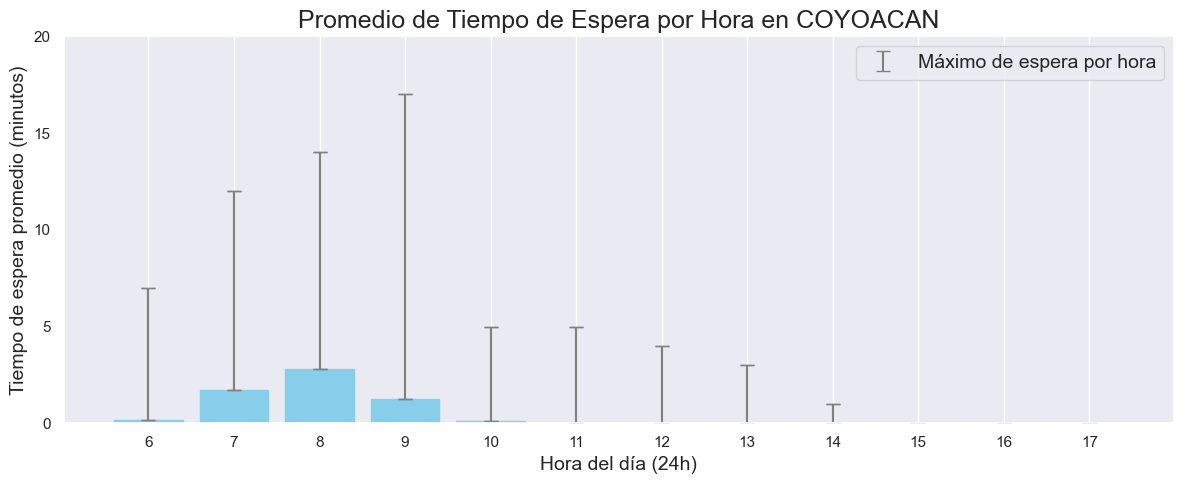

In [10]:
df_simulacion_atencion["hora"] = df_simulacion_atencion["hora_inicio"].dt.hour
agrupado = df_simulacion_atencion.groupby("hora")["espera_min"].agg(["mean", "max","std", "count"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)

plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en COYOACAN", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_simulacion_atencion["hora"].min(), df_simulacion_atencion["hora"].max() + 1))            
plt.yticks(range(0, 21, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCOY.png', dpi=300)

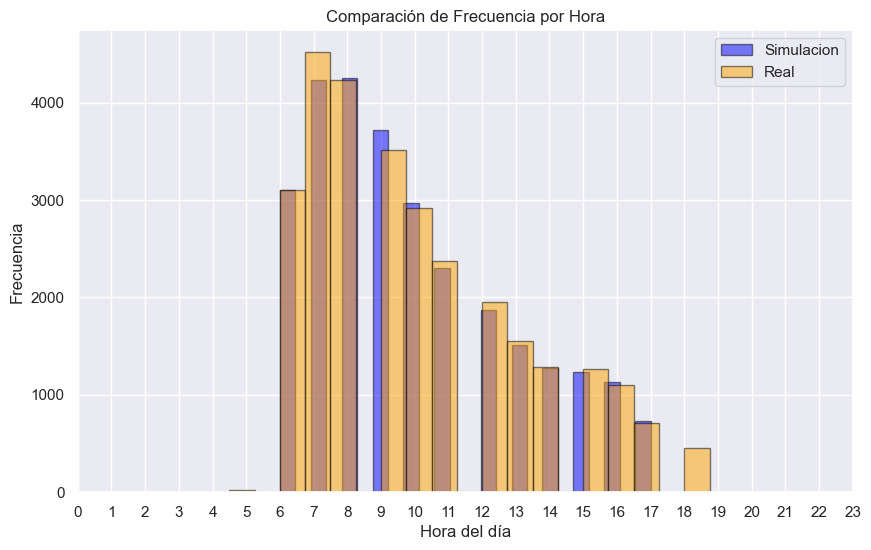

<Figure size 640x480 with 0 Axes>

In [11]:
df2 = df[df["Sucursal"]=="COYOACAN"]
plt.figure(figsize=(10, 6))
plt.hist(df_simulacion_atencion['hora'], bins=24, alpha=0.5, label='Simulacion', color='blue', edgecolor='black')
plt.hist(df2['HoraLLegada'], bins=24, alpha=0.5, label='Real', color='orange', edgecolor='black')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencia por Hora')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


plt.tight_layout()

plt.savefig("numpacientes.png", dpi=300)

# Culiacan

In [12]:
df_fechas = df[df["Sucursal"]=="CULIACAN"]
df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)
fechas = df_fechas["FechaID"].apply(lambda x : x[:4]+"-"+x[4:6]+"-"+x[6:])
fechas=list(fechas.unique())

simulacion_llegadas = []
simulacion_atencion = []
for i in fechas:
    df_sim = simulacion_pacientes("CULIACAN", df,i)
    df_te = simular_atencion(df_sim, cajas=7) 
    simulacion_llegadas.append(df_sim)
    simulacion_atencion.append(df_te)

df_simulacion_llegada_cu = pd.concat(simulacion_llegadas, ignore_index=True)
df_simulacion_atencion_cu = pd.concat(simulacion_atencion, ignore_index=True)
df_simulacion_atencion_cu

C:\Users\jajp2\AppData\Local\Temp\ipykernel_18288\133124166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)


06:01:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:03:00 | Caja 2 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:06:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:06:00 | Caja 3 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:06:00 | Caja 4 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:07:00 | Caja 2 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:08:00 | Caja 5 atiende ID 6 (Prioridad 0) - Espera: 0.0 min
06:09:00 | Caja 6 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 7 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:10:00 | Caja 2 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:10:00 | Caja 3 atiende ID 9 (Prioridad 0) - Espera: 1.0 min
06:14:00 | Caja 1 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
06:18:00 | Caja 1 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 2 atiende ID 13 (Prioridad 0) - Espera: 0.0 min
06:20:00 | Caja 3 atiende ID 14 (Prioridad 0) - Espera: 0.0 min
06:24:00 | Caja 1 atiende ID 15 (Prioridad 1) - Es

09:07:00 | Caja 1 atiende ID 176 (Prioridad 1) - Espera: 0.0 min
09:07:00 | Caja 2 atiende ID 172 (Prioridad 0) - Espera: 3.0 min
09:07:00 | Caja 5 atiende ID 173 (Prioridad 0) - Espera: 2.0 min
09:09:00 | Caja 6 atiende ID 175 (Prioridad 0) - Espera: 3.0 min
09:10:00 | Caja 2 atiende ID 177 (Prioridad 0) - Espera: 2.0 min
09:14:00 | Caja 1 atiende ID 178 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 3 atiende ID 179 (Prioridad 0) - Espera: 0.0 min
09:15:00 | Caja 4 atiende ID 180 (Prioridad 0) - Espera: 0.0 min
09:18:00 | Caja 1 atiende ID 181 (Prioridad 1) - Espera: 0.0 min
09:20:00 | Caja 2 atiende ID 182 (Prioridad 0) - Espera: 0.0 min
09:21:00 | Caja 3 atiende ID 183 (Prioridad 1) - Espera: 0.0 min
09:21:00 | Caja 4 atiende ID 184 (Prioridad 1) - Espera: 0.0 min
09:23:00 | Caja 1 atiende ID 185 (Prioridad 0) - Espera: 0.0 min
09:25:00 | Caja 3 atiende ID 186 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 1 atiende ID 187 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 4 atiende

12:11:00 | Caja 1 atiende ID 315 (Prioridad 0) - Espera: 0.0 min
12:16:00 | Caja 1 atiende ID 316 (Prioridad 1) - Espera: 0.0 min
12:20:00 | Caja 2 atiende ID 317 (Prioridad 1) - Espera: 0.0 min
12:22:00 | Caja 3 atiende ID 318 (Prioridad 0) - Espera: 0.0 min
12:22:00 | Caja 4 atiende ID 319 (Prioridad 0) - Espera: 0.0 min
12:25:00 | Caja 1 atiende ID 320 (Prioridad 1) - Espera: 0.0 min
12:26:00 | Caja 3 atiende ID 321 (Prioridad 0) - Espera: 0.0 min
12:28:00 | Caja 2 atiende ID 322 (Prioridad 1) - Espera: 0.0 min
12:29:00 | Caja 4 atiende ID 323 (Prioridad 1) - Espera: 0.0 min
12:30:00 | Caja 5 atiende ID 324 (Prioridad 1) - Espera: 0.0 min
12:32:00 | Caja 1 atiende ID 325 (Prioridad 0) - Espera: 0.0 min
12:34:00 | Caja 2 atiende ID 326 (Prioridad 1) - Espera: 0.0 min
12:34:00 | Caja 6 atiende ID 327 (Prioridad 1) - Espera: 0.0 min
12:37:00 | Caja 1 atiende ID 328 (Prioridad 1) - Espera: 0.0 min
12:38:00 | Caja 2 atiende ID 329 (Prioridad 1) - Espera: 0.0 min
12:39:00 | Caja 3 atiende

17:50:00 | Caja 2 atiende ID 445 (Prioridad 1) - Espera: 0.0 min
17:50:00 | Caja 3 atiende ID 446 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 3 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 1 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
06:12:00 | Caja 1 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:12:00 | Caja 2 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:16:00 | Caja 2 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:17:00 | Caja 1 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:18:00 | Caja 3 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:18:00 | Caja 4 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:18:00 | Caja 5 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
06:20:00 | Caja 4 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:20:00 | Caja 6 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:21:00 | Caja 3 atiende ID 13 (Prioridad 0) - 

09:05:00 | Caja 7 atiende ID 184 (Prioridad 0) - Espera: 0.0 min
09:09:00 | Caja 1 atiende ID 185 (Prioridad 1) - Espera: 0.0 min
09:09:00 | Caja 2 atiende ID 186 (Prioridad 1) - Espera: 0.0 min
09:11:00 | Caja 2 atiende ID 187 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 3 atiende ID 188 (Prioridad 0) - Espera: 0.0 min
09:15:00 | Caja 4 atiende ID 189 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 5 atiende ID 190 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 6 atiende ID 192 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 7 atiende ID 191 (Prioridad 0) - Espera: 0.0 min
09:16:00 | Caja 1 atiende ID 194 (Prioridad 1) - Espera: 0.0 min
09:17:00 | Caja 3 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
09:18:00 | Caja 5 atiende ID 193 (Prioridad 0) - Espera: 3.0 min
09:18:00 | Caja 7 atiende ID 195 (Prioridad 0) - Espera: 1.0 min
09:19:00 | Caja 2 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
09:21:00 | Caja 4 atiende ID 198 (Prioridad 1) - Espera: 0.0 min
09:21:00 | Caja 6 atiende

12:00:00 | Caja 2 atiende ID 317 (Prioridad 0) - Espera: 0.0 min
12:02:00 | Caja 1 atiende ID 318 (Prioridad 1) - Espera: 0.0 min
12:03:00 | Caja 2 atiende ID 319 (Prioridad 0) - Espera: 0.0 min
12:10:00 | Caja 1 atiende ID 320 (Prioridad 1) - Espera: 0.0 min
12:11:00 | Caja 2 atiende ID 321 (Prioridad 1) - Espera: 0.0 min
12:13:00 | Caja 3 atiende ID 322 (Prioridad 1) - Espera: 0.0 min
12:15:00 | Caja 4 atiende ID 323 (Prioridad 0) - Espera: 0.0 min
12:16:00 | Caja 2 atiende ID 324 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 1 atiende ID 325 (Prioridad 0) - Espera: 0.0 min
12:21:00 | Caja 2 atiende ID 326 (Prioridad 0) - Espera: 0.0 min
12:22:00 | Caja 1 atiende ID 327 (Prioridad 1) - Espera: 0.0 min
12:23:00 | Caja 3 atiende ID 328 (Prioridad 1) - Espera: 0.0 min
12:23:00 | Caja 4 atiende ID 329 (Prioridad 1) - Espera: 0.0 min
12:24:00 | Caja 5 atiende ID 330 (Prioridad 1) - Espera: 0.0 min
12:24:00 | Caja 6 atiende ID 331 (Prioridad 0) - Espera: 0.0 min
12:28:00 | Caja 1 atiende

15:35:00 | Caja 3 atiende ID 451 (Prioridad 0) - Espera: 0.0 min
15:35:00 | Caja 4 atiende ID 452 (Prioridad 0) - Espera: 0.0 min
15:36:00 | Caja 2 atiende ID 453 (Prioridad 0) - Espera: 0.0 min
15:38:00 | Caja 1 atiende ID 454 (Prioridad 1) - Espera: 0.0 min
15:39:00 | Caja 3 atiende ID 455 (Prioridad 0) - Espera: 0.0 min
15:40:00 | Caja 2 atiende ID 456 (Prioridad 0) - Espera: 0.0 min
15:41:00 | Caja 4 atiende ID 457 (Prioridad 0) - Espera: 0.0 min
15:43:00 | Caja 1 atiende ID 458 (Prioridad 0) - Espera: 0.0 min
15:44:00 | Caja 3 atiende ID 459 (Prioridad 0) - Espera: 0.0 min
15:49:00 | Caja 1 atiende ID 460 (Prioridad 1) - Espera: 0.0 min
15:50:00 | Caja 2 atiende ID 461 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 4 atiende ID 462 (Prioridad 1) - Espera: 0.0 min
15:52:00 | Caja 1 atiende ID 463 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 3 atiende ID 464 (Prioridad 1) - Espera: 0.0 min
15:54:00 | Caja 5 atiende ID 465 (Prioridad 1) - Espera: 0.0 min
15:59:00 | Caja 1 atiende

07:30:00 | Caja 1 atiende ID 64 (Prioridad 0) - Espera: 0.0 min
07:36:00 | Caja 1 atiende ID 65 (Prioridad 0) - Espera: 0.0 min
07:38:00 | Caja 2 atiende ID 66 (Prioridad 0) - Espera: 0.0 min
07:39:00 | Caja 3 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 1 atiende ID 68 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 4 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 5 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 1 atiende ID 71 (Prioridad 0) - Espera: 0.0 min
07:45:00 | Caja 2 atiende ID 72 (Prioridad 0) - Espera: 0.0 min
07:45:00 | Caja 3 atiende ID 73 (Prioridad 0) - Espera: 0.0 min
07:45:00 | Caja 4 atiende ID 74 (Prioridad 0) - Espera: 0.0 min
07:51:00 | Caja 1 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 2 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 3 atiende ID 76 (Prioridad 0) - Espera: 0.0 min
07:56:00 | Caja 1 atiende ID 78 (Prioridad 1) - Espera: 0.0 min
07:57:00 | Caja 2 atiende ID 79 (Priorid

09:40:00 | Caja 2 atiende ID 201 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 1 atiende ID 202 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 1 atiende ID 203 (Prioridad 0) - Espera: 0.0 min
09:44:00 | Caja 2 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
09:46:00 | Caja 3 atiende ID 205 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 4 atiende ID 207 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 5 atiende ID 206 (Prioridad 0) - Espera: 0.0 min
09:48:00 | Caja 6 atiende ID 208 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 1 atiende ID 209 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 2 atiende ID 210 (Prioridad 0) - Espera: 0.0 min
09:55:00 | Caja 1 atiende ID 211 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 3 atiende ID 212 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 4 atiende ID 213 (Prioridad 0) - Espera: 0.0 min
09:57:00 | Caja 5 atiende ID 214 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 6 atiende ID 215 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 2 atiende

13:02:00 | Caja 1 atiende ID 334 (Prioridad 1) - Espera: 0.0 min
13:02:00 | Caja 2 atiende ID 333 (Prioridad 0) - Espera: 0.0 min
13:05:00 | Caja 2 atiende ID 335 (Prioridad 0) - Espera: 0.0 min
13:07:00 | Caja 1 atiende ID 336 (Prioridad 1) - Espera: 0.0 min
13:08:00 | Caja 3 atiende ID 337 (Prioridad 1) - Espera: 0.0 min
13:08:00 | Caja 4 atiende ID 339 (Prioridad 1) - Espera: 0.0 min
13:08:00 | Caja 5 atiende ID 338 (Prioridad 0) - Espera: 0.0 min
13:09:00 | Caja 2 atiende ID 340 (Prioridad 0) - Espera: 0.0 min
13:10:00 | Caja 3 atiende ID 341 (Prioridad 1) - Espera: 0.0 min
13:10:00 | Caja 6 atiende ID 342 (Prioridad 1) - Espera: 0.0 min
13:11:00 | Caja 1 atiende ID 343 (Prioridad 1) - Espera: 0.0 min
13:15:00 | Caja 2 atiende ID 344 (Prioridad 0) - Espera: 0.0 min
13:15:00 | Caja 5 atiende ID 345 (Prioridad 0) - Espera: 0.0 min
13:15:00 | Caja 6 atiende ID 346 (Prioridad 0) - Espera: 0.0 min
13:19:00 | Caja 1 atiende ID 347 (Prioridad 0) - Espera: 0.0 min
13:20:00 | Caja 2 atiende

06:00:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 1 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 2 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:12:00 | Caja 1 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:15:00 | Caja 2 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 3 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 4 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:16:00 | Caja 5 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:21:00 | Caja 2 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:22:00 | Caja 3 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:24:00 | Caja 1 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
06:27:00 | Caja 1 atiende ID 12 (Prioridad 0) - Espera: 0.0 min
06:29:00 | Caja 2 atiende ID 13 (Prioridad 0) - Espera: 0.0 min
06:30:00 | Caja 3 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
06:32:00 | Caja 1 atiende ID 15 (Prioridad 0) - Es

08:39:00 | Caja 1 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 2 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 3 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 4 atiende ID 136 (Prioridad 0) - Espera: 0.0 min
08:41:00 | Caja 5 atiende ID 139 (Prioridad 0) - Espera: 0.0 min
08:42:00 | Caja 6 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 7 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 1 atiende ID 142 (Prioridad 1) - Espera: 1.0 min
08:44:00 | Caja 2 atiende ID 143 (Prioridad 1) - Espera: 2.0 min
08:44:00 | Caja 4 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 6 atiende ID 145 (Prioridad 1) - Espera: 1.0 min
08:48:00 | Caja 1 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
08:49:00 | Caja 2 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 3 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 1 atiende ID 149 (Prioridad 0) - Espera: 0.0 min
08:53:00 | Caja 3 atiende

11:19:00 | Caja 1 atiende ID 273 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 2 atiende ID 274 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 3 atiende ID 275 (Prioridad 0) - Espera: 0.0 min
11:24:00 | Caja 1 atiende ID 276 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 2 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 3 atiende ID 277 (Prioridad 0) - Espera: 0.0 min
11:27:00 | Caja 4 atiende ID 279 (Prioridad 0) - Espera: 0.0 min
11:29:00 | Caja 1 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
11:30:00 | Caja 2 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
11:33:00 | Caja 1 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
11:34:00 | Caja 3 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
11:36:00 | Caja 1 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
11:37:00 | Caja 3 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
11:37:00 | Caja 4 atiende ID 286 (Prioridad 0) - Espera: 0.0 min
11:40:00 | Caja 1 atiende ID 287 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 5 atiende

15:43:00 | Caja 2 atiende ID 408 (Prioridad 0) - Espera: 0.0 min
15:44:00 | Caja 1 atiende ID 409 (Prioridad 1) - Espera: 0.0 min
15:49:00 | Caja 2 atiende ID 410 (Prioridad 0) - Espera: 0.0 min
15:52:00 | Caja 1 atiende ID 411 (Prioridad 1) - Espera: 0.0 min
15:52:00 | Caja 3 atiende ID 412 (Prioridad 0) - Espera: 0.0 min
15:56:00 | Caja 2 atiende ID 413 (Prioridad 0) - Espera: 0.0 min
15:57:00 | Caja 3 atiende ID 414 (Prioridad 1) - Espera: 0.0 min
15:59:00 | Caja 4 atiende ID 415 (Prioridad 1) - Espera: 0.0 min
16:03:00 | Caja 1 atiende ID 416 (Prioridad 0) - Espera: 0.0 min
16:04:00 | Caja 2 atiende ID 418 (Prioridad 1) - Espera: 0.0 min
16:04:00 | Caja 3 atiende ID 417 (Prioridad 0) - Espera: 0.0 min
16:05:00 | Caja 1 atiende ID 419 (Prioridad 1) - Espera: 0.0 min
16:05:00 | Caja 4 atiende ID 420 (Prioridad 1) - Espera: 0.0 min
16:08:00 | Caja 3 atiende ID 422 (Prioridad 1) - Espera: 0.0 min
16:08:00 | Caja 4 atiende ID 421 (Prioridad 0) - Espera: 0.0 min
16:12:00 | Caja 2 atiende

08:36:00 | Caja 2 atiende ID 148 (Prioridad 0) - Espera: 0.0 min
08:36:00 | Caja 3 atiende ID 149 (Prioridad 0) - Espera: 0.0 min
08:40:00 | Caja 1 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 2 atiende ID 151 (Prioridad 0) - Espera: 0.0 min
08:43:00 | Caja 1 atiende ID 152 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 3 atiende ID 153 (Prioridad 0) - Espera: 0.0 min
08:44:00 | Caja 4 atiende ID 154 (Prioridad 0) - Espera: 0.0 min
08:45:00 | Caja 5 atiende ID 155 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 6 atiende ID 156 (Prioridad 0) - Espera: 0.0 min
08:46:00 | Caja 1 atiende ID 158 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 7 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 3 atiende ID 157 (Prioridad 0) - Espera: 1.0 min
08:48:00 | Caja 2 atiende ID 160 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 1 atiende ID 161 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 4 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 5 atiende

11:01:00 | Caja 3 atiende ID 276 (Prioridad 0) - Espera: 0.0 min
11:02:00 | Caja 1 atiende ID 277 (Prioridad 0) - Espera: 0.0 min
11:04:00 | Caja 4 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
11:06:00 | Caja 1 atiende ID 279 (Prioridad 0) - Espera: 0.0 min
11:07:00 | Caja 3 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 4 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 5 atiende ID 282 (Prioridad 0) - Espera: 0.0 min
11:08:00 | Caja 6 atiende ID 283 (Prioridad 0) - Espera: 0.0 min
11:12:00 | Caja 1 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 2 atiende ID 285 (Prioridad 0) - Espera: 0.0 min
11:15:00 | Caja 3 atiende ID 286 (Prioridad 0) - Espera: 0.0 min
11:21:00 | Caja 1 atiende ID 287 (Prioridad 1) - Espera: 0.0 min
11:23:00 | Caja 2 atiende ID 288 (Prioridad 0) - Espera: 0.0 min
11:26:00 | Caja 1 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
11:31:00 | Caja 2 atiende ID 290 (Prioridad 1) - Espera: 0.0 min
11:31:00 | Caja 3 atiende

16:03:00 | Caja 2 atiende ID 403 (Prioridad 1) - Espera: 0.0 min
16:04:00 | Caja 3 atiende ID 404 (Prioridad 1) - Espera: 0.0 min
16:07:00 | Caja 1 atiende ID 405 (Prioridad 0) - Espera: 0.0 min
16:10:00 | Caja 2 atiende ID 406 (Prioridad 1) - Espera: 0.0 min
16:19:00 | Caja 1 atiende ID 407 (Prioridad 1) - Espera: 0.0 min
16:27:00 | Caja 1 atiende ID 408 (Prioridad 1) - Espera: 0.0 min
16:27:00 | Caja 2 atiende ID 409 (Prioridad 0) - Espera: 0.0 min
16:27:00 | Caja 3 atiende ID 410 (Prioridad 0) - Espera: 0.0 min
16:32:00 | Caja 1 atiende ID 411 (Prioridad 0) - Espera: 0.0 min
16:34:00 | Caja 2 atiende ID 413 (Prioridad 1) - Espera: 0.0 min
16:34:00 | Caja 3 atiende ID 412 (Prioridad 0) - Espera: 0.0 min
16:41:00 | Caja 1 atiende ID 414 (Prioridad 1) - Espera: 0.0 min
16:44:00 | Caja 1 atiende ID 415 (Prioridad 1) - Espera: 0.0 min
16:57:00 | Caja 1 atiende ID 416 (Prioridad 1) - Espera: 0.0 min
17:00:00 | Caja 1 atiende ID 417 (Prioridad 0) - Espera: 0.0 min
17:01:00 | Caja 2 atiende

08:29:00 | Caja 1 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 3 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 2 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 1 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 4 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 5 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 6 atiende ID 140 (Prioridad 0) - Espera: 0.0 min
08:33:00 | Caja 7 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
08:36:00 | Caja 1 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
08:36:00 | Caja 2 atiende ID 146 (Prioridad 0) - Espera: 0.0 min
08:37:00 | Caja 3 atiende ID 147 (Prioridad 0) - Espera: 0.0 min
08:37:00 | Caja 4 atiende ID 148 (Prioridad 0) - Espera: 0.0 min
08:39:00 | Caja 5 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 6 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 7 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 1 atiende

11:04:00 | Caja 1 atiende ID 281 (Prioridad 0) - Espera: 0.0 min
11:08:00 | Caja 2 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
11:09:00 | Caja 1 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 3 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 4 atiende ID 285 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 5 atiende ID 286 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 1 atiende ID 287 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 2 atiende ID 288 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 4 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
11:16:00 | Caja 2 atiende ID 290 (Prioridad 0) - Espera: 0.0 min
11:17:00 | Caja 3 atiende ID 291 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 4 atiende ID 292 (Prioridad 0) - Espera: 0.0 min
11:20:00 | Caja 1 atiende ID 294 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 2 atiende ID 293 (Prioridad 0) - Espera: 0.0 min
11:21:00 | Caja 3 atiende ID 295 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 5 atiende

15:18:00 | Caja 1 atiende ID 410 (Prioridad 1) - Espera: 0.0 min
15:18:00 | Caja 2 atiende ID 409 (Prioridad 0) - Espera: 0.0 min
15:24:00 | Caja 1 atiende ID 411 (Prioridad 0) - Espera: 0.0 min
15:26:00 | Caja 2 atiende ID 412 (Prioridad 1) - Espera: 0.0 min
15:29:00 | Caja 1 atiende ID 413 (Prioridad 0) - Espera: 0.0 min
15:34:00 | Caja 1 atiende ID 414 (Prioridad 1) - Espera: 0.0 min
15:34:00 | Caja 2 atiende ID 415 (Prioridad 1) - Espera: 0.0 min
15:43:00 | Caja 1 atiende ID 416 (Prioridad 1) - Espera: 0.0 min
15:45:00 | Caja 2 atiende ID 417 (Prioridad 0) - Espera: 0.0 min
15:46:00 | Caja 3 atiende ID 418 (Prioridad 1) - Espera: 0.0 min
15:48:00 | Caja 1 atiende ID 419 (Prioridad 1) - Espera: 0.0 min
15:50:00 | Caja 4 atiende ID 420 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 3 atiende ID 421 (Prioridad 1) - Espera: 0.0 min
15:56:00 | Caja 1 atiende ID 422 (Prioridad 1) - Espera: 0.0 min
16:04:00 | Caja 1 atiende ID 423 (Prioridad 0) - Espera: 0.0 min
16:10:00 | Caja 1 atiende

08:52:00 | Caja 1 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 3 atiende ID 144 (Prioridad 0) - Espera: 0.0 min
08:53:00 | Caja 2 atiende ID 145 (Prioridad 1) - Espera: 0.0 min
08:53:00 | Caja 4 atiende ID 146 (Prioridad 0) - Espera: 0.0 min
08:54:00 | Caja 5 atiende ID 147 (Prioridad 0) - Espera: 0.0 min
08:56:00 | Caja 1 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
08:56:00 | Caja 5 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
08:56:00 | Caja 6 atiende ID 149 (Prioridad 0) - Espera: 0.0 min
08:57:00 | Caja 3 atiende ID 151 (Prioridad 0) - Espera: 0.0 min
08:58:00 | Caja 4 atiende ID 152 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 7 atiende ID 153 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 1 atiende ID 155 (Prioridad 1) - Espera: 0.0 min
09:00:00 | Caja 5 atiende ID 154 (Prioridad 0) - Espera: 2.0 min
09:01:00 | Caja 6 atiende ID 156 (Prioridad 1) - Espera: 0.0 min
09:04:00 | Caja 1 atiende ID 158 (Prioridad 1) - Espera: 0.0 min
09:04:00 | Caja 2 atiende

10:57:00 | Caja 3 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 1 atiende ID 281 (Prioridad 0) - Espera: 0.0 min
10:59:00 | Caja 2 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 4 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 5 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 6 atiende ID 285 (Prioridad 0) - Espera: 0.0 min
11:01:00 | Caja 1 atiende ID 286 (Prioridad 0) - Espera: 0.0 min
11:03:00 | Caja 3 atiende ID 287 (Prioridad 0) - Espera: 0.0 min
11:05:00 | Caja 1 atiende ID 288 (Prioridad 1) - Espera: 0.0 min
11:05:00 | Caja 2 atiende ID 289 (Prioridad 1) - Espera: 0.0 min
11:06:00 | Caja 3 atiende ID 290 (Prioridad 0) - Espera: 0.0 min
11:07:00 | Caja 4 atiende ID 291 (Prioridad 0) - Espera: 0.0 min
11:08:00 | Caja 2 atiende ID 293 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 5 atiende ID 294 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 6 atiende ID 292 (Prioridad 0) - Espera: 0.0 min
11:09:00 | Caja 1 atiende

15:04:00 | Caja 1 atiende ID 410 (Prioridad 0) - Espera: 0.0 min
15:05:00 | Caja 2 atiende ID 411 (Prioridad 1) - Espera: 0.0 min
15:10:00 | Caja 1 atiende ID 412 (Prioridad 0) - Espera: 0.0 min
15:17:00 | Caja 2 atiende ID 413 (Prioridad 1) - Espera: 0.0 min
15:20:00 | Caja 1 atiende ID 414 (Prioridad 1) - Espera: 0.0 min
15:23:00 | Caja 1 atiende ID 415 (Prioridad 0) - Espera: 0.0 min
15:25:00 | Caja 2 atiende ID 416 (Prioridad 1) - Espera: 0.0 min
15:27:00 | Caja 3 atiende ID 417 (Prioridad 1) - Espera: 0.0 min
15:27:00 | Caja 4 atiende ID 419 (Prioridad 1) - Espera: 0.0 min
15:27:00 | Caja 5 atiende ID 418 (Prioridad 0) - Espera: 0.0 min
15:29:00 | Caja 1 atiende ID 420 (Prioridad 0) - Espera: 0.0 min
15:36:00 | Caja 1 atiende ID 421 (Prioridad 1) - Espera: 0.0 min
15:36:00 | Caja 2 atiende ID 422 (Prioridad 0) - Espera: 0.0 min
15:42:00 | Caja 1 atiende ID 423 (Prioridad 1) - Espera: 0.0 min
15:44:00 | Caja 2 atiende ID 424 (Prioridad 0) - Espera: 0.0 min
15:45:00 | Caja 1 atiende

08:23:00 | Caja 4 atiende ID 112 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 5 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 6 atiende ID 113 (Prioridad 0) - Espera: 0.0 min
08:24:00 | Caja 2 atiende ID 116 (Prioridad 1) - Espera: 0.0 min
08:24:00 | Caja 7 atiende ID 115 (Prioridad 0) - Espera: 0.0 min
08:26:00 | Caja 4 atiende ID 117 (Prioridad 1) - Espera: 1.0 min
08:26:00 | Caja 6 atiende ID 118 (Prioridad 0) - Espera: 0.0 min
08:28:00 | Caja 1 atiende ID 119 (Prioridad 1) - Espera: 0.0 min
08:28:00 | Caja 2 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 3 atiende ID 121 (Prioridad 1) - Espera: 1.0 min
08:30:00 | Caja 7 atiende ID 122 (Prioridad 1) - Espera: 2.0 min
08:31:00 | Caja 2 atiende ID 124 (Prioridad 1) - Espera: 1.0 min
08:31:00 | Caja 4 atiende ID 125 (Prioridad 1) - Espera: 1.0 min
08:31:00 | Caja 5 atiende ID 126 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 6 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 2 atiende

10:38:00 | Caja 4 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 5 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 1 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 2 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 3 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
10:46:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
10:46:00 | Caja 4 atiende ID 254 (Prioridad 0) - Espera: 0.0 min
10:48:00 | Caja 2 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
10:48:00 | Caja 3 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
10:49:00 | Caja 1 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 3 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
10:53:00 | Caja 1 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 2 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
10:57:00 | Caja 1 atiende ID 262 (Prioridad 0) - Espera: 0.0 min
10:58:00 | Caja 3 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 4 atiende

14:28:00 | Caja 1 atiende ID 382 (Prioridad 1) - Espera: 0.0 min
14:30:00 | Caja 1 atiende ID 383 (Prioridad 0) - Espera: 0.0 min
14:34:00 | Caja 1 atiende ID 384 (Prioridad 0) - Espera: 0.0 min
14:36:00 | Caja 2 atiende ID 385 (Prioridad 1) - Espera: 0.0 min
14:38:00 | Caja 1 atiende ID 386 (Prioridad 1) - Espera: 0.0 min
14:39:00 | Caja 2 atiende ID 387 (Prioridad 1) - Espera: 0.0 min
14:40:00 | Caja 3 atiende ID 388 (Prioridad 0) - Espera: 0.0 min
14:41:00 | Caja 4 atiende ID 389 (Prioridad 1) - Espera: 0.0 min
14:41:00 | Caja 5 atiende ID 390 (Prioridad 1) - Espera: 0.0 min
14:44:00 | Caja 1 atiende ID 391 (Prioridad 0) - Espera: 0.0 min
14:45:00 | Caja 2 atiende ID 392 (Prioridad 0) - Espera: 0.0 min
14:54:00 | Caja 1 atiende ID 393 (Prioridad 1) - Espera: 0.0 min
14:58:00 | Caja 1 atiende ID 394 (Prioridad 1) - Espera: 0.0 min
15:04:00 | Caja 1 atiende ID 395 (Prioridad 1) - Espera: 0.0 min
15:05:00 | Caja 2 atiende ID 396 (Prioridad 0) - Espera: 0.0 min
15:06:00 | Caja 3 atiende

07:49:00 | Caja 6 atiende ID 89 (Prioridad 1) - Espera: 2.0 min
07:51:00 | Caja 5 atiende ID 90 (Prioridad 1) - Espera: 3.0 min
07:51:00 | Caja 7 atiende ID 92 (Prioridad 1) - Espera: 1.0 min
07:52:00 | Caja 1 atiende ID 93 (Prioridad 1) - Espera: 1.0 min
07:52:00 | Caja 2 atiende ID 87 (Prioridad 0) - Espera: 5.0 min
07:52:00 | Caja 3 atiende ID 94 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 4 atiende ID 91 (Prioridad 0) - Espera: 4.0 min
07:53:00 | Caja 7 atiende ID 96 (Prioridad 1) - Espera: 0.0 min
07:55:00 | Caja 1 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 3 atiende ID 99 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 4 atiende ID 100 (Prioridad 1) - Espera: 0.0 min
07:57:00 | Caja 2 atiende ID 101 (Prioridad 1) - Espera: 1.0 min
07:57:00 | Caja 6 atiende ID 95 (Prioridad 0) - Espera: 5.0 min
07:57:00 | Caja 7 atiende ID 98 (Prioridad 0) - Espera: 1.0 min
07:59:00 | Caja 3 atiende ID 102 (Prioridad 1) - Espera: 0.0 min
08:01:00 | Caja 1 atiende ID 105 (Pri

10:09:00 | Caja 2 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
10:10:00 | Caja 3 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
10:10:00 | Caja 4 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 5 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
10:11:00 | Caja 6 atiende ID 260 (Prioridad 0) - Espera: 0.0 min
10:12:00 | Caja 7 atiende ID 262 (Prioridad 0) - Espera: 0.0 min
10:14:00 | Caja 2 atiende ID 263 (Prioridad 0) - Espera: 0.0 min
10:15:00 | Caja 3 atiende ID 264 (Prioridad 0) - Espera: 0.0 min
10:17:00 | Caja 1 atiende ID 265 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 2 atiende ID 266 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 1 atiende ID 267 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 3 atiende ID 268 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 4 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 2 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 3 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 5 atiende

13:07:00 | Caja 2 atiende ID 386 (Prioridad 1) - Espera: 1.0 min
13:10:00 | Caja 3 atiende ID 387 (Prioridad 1) - Espera: 0.0 min
13:10:00 | Caja 4 atiende ID 388 (Prioridad 1) - Espera: 0.0 min
13:16:00 | Caja 1 atiende ID 389 (Prioridad 1) - Espera: 0.0 min
13:17:00 | Caja 2 atiende ID 391 (Prioridad 1) - Espera: 0.0 min
13:17:00 | Caja 3 atiende ID 390 (Prioridad 0) - Espera: 0.0 min
13:18:00 | Caja 4 atiende ID 392 (Prioridad 0) - Espera: 0.0 min
13:21:00 | Caja 1 atiende ID 393 (Prioridad 1) - Espera: 0.0 min
13:22:00 | Caja 2 atiende ID 394 (Prioridad 0) - Espera: 0.0 min
13:23:00 | Caja 3 atiende ID 395 (Prioridad 0) - Espera: 0.0 min
13:24:00 | Caja 4 atiende ID 396 (Prioridad 1) - Espera: 0.0 min
13:24:00 | Caja 5 atiende ID 397 (Prioridad 0) - Espera: 0.0 min
13:26:00 | Caja 1 atiende ID 398 (Prioridad 1) - Espera: 0.0 min
13:26:00 | Caja 2 atiende ID 399 (Prioridad 0) - Espera: 0.0 min
13:27:00 | Caja 3 atiende ID 401 (Prioridad 1) - Espera: 0.0 min
13:27:00 | Caja 6 atiende

06:44:00 | Caja 2 atiende ID 19 (Prioridad 0) - Espera: 0.0 min
06:46:00 | Caja 1 atiende ID 20 (Prioridad 1) - Espera: 0.0 min
06:46:00 | Caja 3 atiende ID 21 (Prioridad 1) - Espera: 0.0 min
06:48:00 | Caja 2 atiende ID 22 (Prioridad 1) - Espera: 0.0 min
06:49:00 | Caja 4 atiende ID 23 (Prioridad 1) - Espera: 0.0 min
06:49:00 | Caja 5 atiende ID 24 (Prioridad 0) - Espera: 0.0 min
06:51:00 | Caja 1 atiende ID 25 (Prioridad 0) - Espera: 0.0 min
06:54:00 | Caja 1 atiende ID 26 (Prioridad 0) - Espera: 0.0 min
06:56:00 | Caja 2 atiende ID 27 (Prioridad 1) - Espera: 0.0 min
06:59:00 | Caja 1 atiende ID 28 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 2 atiende ID 29 (Prioridad 0) - Espera: 0.0 min
07:02:00 | Caja 3 atiende ID 30 (Prioridad 1) - Espera: 0.0 min
07:03:00 | Caja 4 atiende ID 31 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 2 atiende ID 32 (Prioridad 1) - Espera: 0.0 min
07:04:00 | Caja 5 atiende ID 33 (Prioridad 1) - Espera: 0.0 min
07:06:00 | Caja 1 atiende ID 34 (Priorid

09:42:00 | Caja 1 atiende ID 181 (Prioridad 0) - Espera: 0.0 min
09:42:00 | Caja 3 atiende ID 182 (Prioridad 0) - Espera: 0.0 min
09:48:00 | Caja 2 atiende ID 183 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 1 atiende ID 185 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 3 atiende ID 184 (Prioridad 0) - Espera: 0.0 min
09:51:00 | Caja 4 atiende ID 186 (Prioridad 1) - Espera: 0.0 min
09:51:00 | Caja 5 atiende ID 187 (Prioridad 1) - Espera: 0.0 min
09:51:00 | Caja 6 atiende ID 188 (Prioridad 0) - Espera: 0.0 min
09:51:00 | Caja 7 atiende ID 189 (Prioridad 0) - Espera: 0.0 min
09:53:00 | Caja 5 atiende ID 190 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 2 atiende ID 191 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 6 atiende ID 192 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 3 atiende ID 195 (Prioridad 1) - Espera: 1.0 min
09:57:00 | Caja 4 atiende ID 193 (Prioridad 0) - Espera: 1.0 min
09:57:00 | Caja 7 atiende ID 194 (Prioridad 0) - Espera: 1.0 min
09:58:00 | Caja 1 atiende

13:04:00 | Caja 3 atiende ID 317 (Prioridad 1) - Espera: 0.0 min
13:05:00 | Caja 4 atiende ID 318 (Prioridad 1) - Espera: 0.0 min
13:05:00 | Caja 5 atiende ID 319 (Prioridad 0) - Espera: 0.0 min
13:06:00 | Caja 2 atiende ID 320 (Prioridad 1) - Espera: 0.0 min
13:11:00 | Caja 1 atiende ID 322 (Prioridad 1) - Espera: 0.0 min
13:11:00 | Caja 2 atiende ID 321 (Prioridad 0) - Espera: 0.0 min
13:13:00 | Caja 3 atiende ID 323 (Prioridad 1) - Espera: 0.0 min
13:14:00 | Caja 4 atiende ID 324 (Prioridad 0) - Espera: 0.0 min
13:15:00 | Caja 1 atiende ID 325 (Prioridad 1) - Espera: 0.0 min
13:16:00 | Caja 5 atiende ID 326 (Prioridad 0) - Espera: 0.0 min
13:25:00 | Caja 1 atiende ID 327 (Prioridad 1) - Espera: 0.0 min
13:33:00 | Caja 1 atiende ID 328 (Prioridad 0) - Espera: 0.0 min
13:37:00 | Caja 1 atiende ID 329 (Prioridad 1) - Espera: 0.0 min
13:42:00 | Caja 2 atiende ID 330 (Prioridad 1) - Espera: 0.0 min
13:42:00 | Caja 3 atiende ID 331 (Prioridad 0) - Espera: 0.0 min
13:43:00 | Caja 4 atiende

08:05:00 | Caja 4 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
08:05:00 | Caja 5 atiende ID 104 (Prioridad 0) - Espera: 0.0 min
08:07:00 | Caja 1 atiende ID 105 (Prioridad 0) - Espera: 0.0 min
08:08:00 | Caja 2 atiende ID 106 (Prioridad 0) - Espera: 0.0 min
08:09:00 | Caja 4 atiende ID 107 (Prioridad 1) - Espera: 0.0 min
08:10:00 | Caja 5 atiende ID 108 (Prioridad 0) - Espera: 0.0 min
08:11:00 | Caja 6 atiende ID 109 (Prioridad 0) - Espera: 0.0 min
08:12:00 | Caja 2 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
08:12:00 | Caja 7 atiende ID 110 (Prioridad 0) - Espera: 0.0 min
08:13:00 | Caja 3 atiende ID 112 (Prioridad 0) - Espera: 1.0 min
08:14:00 | Caja 4 atiende ID 113 (Prioridad 0) - Espera: 1.0 min
08:14:00 | Caja 5 atiende ID 114 (Prioridad 0) - Espera: 0.0 min
08:15:00 | Caja 1 atiende ID 115 (Prioridad 0) - Espera: 0.0 min
08:16:00 | Caja 5 atiende ID 117 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 6 atiende ID 116 (Prioridad 0) - Espera: 0.0 min
08:18:00 | Caja 3 atiende

10:37:00 | Caja 2 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 6 atiende ID 271 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 7 atiende ID 270 (Prioridad 0) - Espera: 0.0 min
10:39:00 | Caja 1 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 3 atiende ID 273 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 1 atiende ID 275 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 2 atiende ID 274 (Prioridad 0) - Espera: 0.0 min
10:43:00 | Caja 5 atiende ID 276 (Prioridad 0) - Espera: 0.0 min
10:44:00 | Caja 3 atiende ID 277 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 6 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
10:47:00 | Caja 1 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
10:49:00 | Caja 2 atiende ID 280 (Prioridad 0) - Espera: 0.0 min
10:50:00 | Caja 3 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 1 atiende ID 282 (Prioridad 0) - Espera: 0.0 min
10:53:00 | Caja 2 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 1 atiende

14:19:00 | Caja 1 atiende ID 396 (Prioridad 0) - Espera: 0.0 min
14:21:00 | Caja 2 atiende ID 397 (Prioridad 1) - Espera: 0.0 min
14:23:00 | Caja 1 atiende ID 398 (Prioridad 1) - Espera: 0.0 min
14:24:00 | Caja 3 atiende ID 401 (Prioridad 1) - Espera: 0.0 min
14:24:00 | Caja 4 atiende ID 399 (Prioridad 0) - Espera: 0.0 min
14:24:00 | Caja 5 atiende ID 400 (Prioridad 0) - Espera: 0.0 min
14:33:00 | Caja 1 atiende ID 402 (Prioridad 1) - Espera: 0.0 min
14:35:00 | Caja 2 atiende ID 403 (Prioridad 0) - Espera: 0.0 min
14:38:00 | Caja 3 atiende ID 404 (Prioridad 1) - Espera: 0.0 min
14:40:00 | Caja 3 atiende ID 405 (Prioridad 0) - Espera: 0.0 min
14:41:00 | Caja 4 atiende ID 406 (Prioridad 1) - Espera: 0.0 min
14:43:00 | Caja 1 atiende ID 407 (Prioridad 0) - Espera: 0.0 min
14:46:00 | Caja 1 atiende ID 408 (Prioridad 0) - Espera: 0.0 min
14:53:00 | Caja 1 atiende ID 409 (Prioridad 1) - Espera: 0.0 min
14:58:00 | Caja 2 atiende ID 410 (Prioridad 1) - Espera: 0.0 min
15:03:00 | Caja 1 atiende

08:27:00 | Caja 1 atiende ID 122 (Prioridad 0) - Espera: 0.0 min
08:28:00 | Caja 3 atiende ID 123 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 4 atiende ID 125 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 5 atiende ID 124 (Prioridad 0) - Espera: 0.0 min
08:31:00 | Caja 1 atiende ID 126 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 2 atiende ID 127 (Prioridad 0) - Espera: 0.0 min
08:34:00 | Caja 3 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 1 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 5 atiende ID 130 (Prioridad 1) - Espera: 0.0 min
08:36:00 | Caja 6 atiende ID 131 (Prioridad 0) - Espera: 0.0 min
08:37:00 | Caja 2 atiende ID 132 (Prioridad 0) - Espera: 0.0 min
08:37:00 | Caja 4 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
08:38:00 | Caja 1 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 7 atiende ID 134 (Prioridad 0) - Espera: 0.0 min
08:39:00 | Caja 3 atiende ID 136 (Prioridad 0) - Espera: 0.0 min
08:40:00 | Caja 2 atiende

10:41:00 | Caja 1 atiende ID 253 (Prioridad 1) - Espera: 2.0 min
10:41:00 | Caja 3 atiende ID 254 (Prioridad 1) - Espera: 2.0 min
10:42:00 | Caja 2 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 6 atiende ID 256 (Prioridad 0) - Espera: 0.0 min
10:44:00 | Caja 3 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
10:47:00 | Caja 1 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
10:47:00 | Caja 2 atiende ID 258 (Prioridad 0) - Espera: 0.0 min
10:49:00 | Caja 3 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 1 atiende ID 261 (Prioridad 0) - Espera: 0.0 min
10:53:00 | Caja 2 atiende ID 262 (Prioridad 0) - Espera: 0.0 min
10:54:00 | Caja 3 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 4 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
10:57:00 | Caja 5 atiende ID 266 (Prioridad 1) - Espera: 0.0 min
10:57:00 | Caja 6 atiende ID 265 (Prioridad 0) - Espera: 0.0 min
11:04:00 | Caja 1 atiende ID 267 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 2 atiende

14:36:00 | Caja 4 atiende ID 390 (Prioridad 1) - Espera: 0.0 min
14:36:00 | Caja 5 atiende ID 391 (Prioridad 1) - Espera: 0.0 min
14:39:00 | Caja 2 atiende ID 392 (Prioridad 1) - Espera: 0.0 min
14:44:00 | Caja 1 atiende ID 393 (Prioridad 1) - Espera: 0.0 min
14:45:00 | Caja 2 atiende ID 394 (Prioridad 0) - Espera: 0.0 min
14:56:00 | Caja 1 atiende ID 395 (Prioridad 0) - Espera: 0.0 min
14:56:00 | Caja 2 atiende ID 396 (Prioridad 0) - Espera: 0.0 min
15:00:00 | Caja 1 atiende ID 397 (Prioridad 0) - Espera: 0.0 min
15:01:00 | Caja 2 atiende ID 398 (Prioridad 1) - Espera: 0.0 min
15:06:00 | Caja 1 atiende ID 399 (Prioridad 1) - Espera: 0.0 min
15:09:00 | Caja 2 atiende ID 400 (Prioridad 0) - Espera: 0.0 min
15:14:00 | Caja 1 atiende ID 401 (Prioridad 1) - Espera: 0.0 min
15:15:00 | Caja 2 atiende ID 402 (Prioridad 0) - Espera: 0.0 min
15:16:00 | Caja 3 atiende ID 403 (Prioridad 1) - Espera: 0.0 min
15:17:00 | Caja 4 atiende ID 404 (Prioridad 0) - Espera: 0.0 min
15:17:00 | Caja 5 atiende

07:55:00 | Caja 4 atiende ID 84 (Prioridad 1) - Espera: 0.0 min
07:55:00 | Caja 5 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 2 atiende ID 87 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 6 atiende ID 86 (Prioridad 0) - Espera: 0.0 min
07:57:00 | Caja 1 atiende ID 88 (Prioridad 0) - Espera: 0.0 min
07:58:00 | Caja 3 atiende ID 89 (Prioridad 1) - Espera: 0.0 min
07:58:00 | Caja 7 atiende ID 90 (Prioridad 0) - Espera: 0.0 min
07:59:00 | Caja 1 atiende ID 91 (Prioridad 0) - Espera: 1.0 min
08:00:00 | Caja 2 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
08:00:00 | Caja 4 atiende ID 93 (Prioridad 0) - Espera: 0.0 min
08:00:00 | Caja 6 atiende ID 94 (Prioridad 0) - Espera: 0.0 min
08:01:00 | Caja 1 atiende ID 95 (Prioridad 1) - Espera: 0.0 min
08:01:00 | Caja 5 atiende ID 96 (Prioridad 1) - Espera: 0.0 min
08:02:00 | Caja 3 atiende ID 97 (Prioridad 0) - Espera: 0.0 min
08:02:00 | Caja 7 atiende ID 98 (Prioridad 0) - Espera: 0.0 min
08:04:00 | Caja 2 atiende ID 99 (Priorid

10:17:00 | Caja 2 atiende ID 232 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 1 atiende ID 233 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 3 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 5 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 6 atiende ID 236 (Prioridad 0) - Espera: 0.0 min
10:20:00 | Caja 7 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
10:21:00 | Caja 3 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
10:21:00 | Caja 4 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
10:22:00 | Caja 2 atiende ID 240 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 5 atiende ID 241 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 6 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 7 atiende ID 243 (Prioridad 0) - Espera: 0.0 min
10:26:00 | Caja 4 atiende ID 244 (Prioridad 1) - Espera: 1.0 min
10:26:00 | Caja 5 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
10:27:00 | Caja 1 atiende ID 245 (Prioridad 0) - Espera: 2.0 min
10:28:00 | Caja 6 atiende

14:16:00 | Caja 6 atiende ID 374 (Prioridad 0) - Espera: 0.0 min
14:20:00 | Caja 1 atiende ID 375 (Prioridad 1) - Espera: 0.0 min
14:22:00 | Caja 2 atiende ID 376 (Prioridad 1) - Espera: 0.0 min
14:22:00 | Caja 3 atiende ID 377 (Prioridad 1) - Espera: 0.0 min
14:26:00 | Caja 2 atiende ID 378 (Prioridad 1) - Espera: 0.0 min
14:30:00 | Caja 1 atiende ID 379 (Prioridad 1) - Espera: 0.0 min
14:33:00 | Caja 2 atiende ID 380 (Prioridad 0) - Espera: 0.0 min
14:36:00 | Caja 1 atiende ID 381 (Prioridad 0) - Espera: 0.0 min
14:39:00 | Caja 2 atiende ID 382 (Prioridad 1) - Espera: 0.0 min
14:40:00 | Caja 3 atiende ID 383 (Prioridad 0) - Espera: 0.0 min
14:48:00 | Caja 1 atiende ID 384 (Prioridad 1) - Espera: 0.0 min
14:49:00 | Caja 2 atiende ID 385 (Prioridad 1) - Espera: 0.0 min
14:53:00 | Caja 1 atiende ID 386 (Prioridad 1) - Espera: 0.0 min
14:55:00 | Caja 2 atiende ID 387 (Prioridad 0) - Espera: 0.0 min
14:55:00 | Caja 3 atiende ID 388 (Prioridad 0) - Espera: 0.0 min
14:56:00 | Caja 4 atiende

07:30:00 | Caja 4 atiende ID 66 (Prioridad 1) - Espera: 0.0 min
07:31:00 | Caja 3 atiende ID 63 (Prioridad 0) - Espera: 3.0 min
07:32:00 | Caja 6 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:34:00 | Caja 1 atiende ID 68 (Prioridad 1) - Espera: 0.0 min
07:36:00 | Caja 2 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
07:38:00 | Caja 3 atiende ID 70 (Prioridad 0) - Espera: 0.0 min
07:38:00 | Caja 4 atiende ID 71 (Prioridad 0) - Espera: 0.0 min
07:39:00 | Caja 5 atiende ID 72 (Prioridad 0) - Espera: 0.0 min
07:40:00 | Caja 1 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 2 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 5 atiende ID 74 (Prioridad 0) - Espera: 0.0 min
07:41:00 | Caja 6 atiende ID 76 (Prioridad 0) - Espera: 0.0 min
07:42:00 | Caja 7 atiende ID 77 (Prioridad 0) - Espera: 0.0 min
07:43:00 | Caja 6 atiende ID 78 (Prioridad 0) - Espera: 0.0 min
07:44:00 | Caja 1 atiende ID 79 (Prioridad 0) - Espera: 1.0 min
07:44:00 | Caja 3 atiende ID 80 (Priorid

09:58:00 | Caja 5 atiende ID 221 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 1 atiende ID 222 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 6 atiende ID 223 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 7 atiende ID 224 (Prioridad 0) - Espera: 0.0 min
10:03:00 | Caja 2 atiende ID 225 (Prioridad 0) - Espera: 0.0 min
10:04:00 | Caja 3 atiende ID 226 (Prioridad 1) - Espera: 0.0 min
10:06:00 | Caja 4 atiende ID 227 (Prioridad 1) - Espera: 0.0 min
10:07:00 | Caja 2 atiende ID 228 (Prioridad 1) - Espera: 0.0 min
10:08:00 | Caja 1 atiende ID 229 (Prioridad 1) - Espera: 0.0 min
10:08:00 | Caja 3 atiende ID 230 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 1 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
10:14:00 | Caja 2 atiende ID 232 (Prioridad 0) - Espera: 0.0 min
10:15:00 | Caja 3 atiende ID 233 (Prioridad 0) - Espera: 0.0 min
10:17:00 | Caja 3 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 2 atiende ID 235 (Prioridad 0) - Espera: 0.0 min
10:19:00 | Caja 1 atiende

12:50:00 | Caja 1 atiende ID 353 (Prioridad 1) - Espera: 0.0 min
12:52:00 | Caja 2 atiende ID 354 (Prioridad 0) - Espera: 0.0 min
12:54:00 | Caja 3 atiende ID 355 (Prioridad 0) - Espera: 0.0 min
12:57:00 | Caja 1 atiende ID 356 (Prioridad 1) - Espera: 0.0 min
12:58:00 | Caja 2 atiende ID 357 (Prioridad 0) - Espera: 0.0 min
13:00:00 | Caja 3 atiende ID 358 (Prioridad 0) - Espera: 0.0 min
13:01:00 | Caja 1 atiende ID 359 (Prioridad 0) - Espera: 0.0 min
13:03:00 | Caja 1 atiende ID 360 (Prioridad 0) - Espera: 0.0 min
13:04:00 | Caja 2 atiende ID 361 (Prioridad 0) - Espera: 0.0 min
13:04:00 | Caja 3 atiende ID 362 (Prioridad 0) - Espera: 0.0 min
13:06:00 | Caja 1 atiende ID 363 (Prioridad 1) - Espera: 0.0 min
13:07:00 | Caja 2 atiende ID 364 (Prioridad 0) - Espera: 0.0 min
13:11:00 | Caja 1 atiende ID 365 (Prioridad 0) - Espera: 0.0 min
13:13:00 | Caja 3 atiende ID 366 (Prioridad 1) - Espera: 0.0 min
13:14:00 | Caja 4 atiende ID 367 (Prioridad 1) - Espera: 0.0 min
13:15:00 | Caja 5 atiende

17:45:00 | Caja 2 atiende ID 484 (Prioridad 0) - Espera: 0.0 min
17:50:00 | Caja 1 atiende ID 485 (Prioridad 1) - Espera: 0.0 min
17:50:00 | Caja 2 atiende ID 486 (Prioridad 1) - Espera: 0.0 min
17:50:00 | Caja 3 atiende ID 487 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 2 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 3 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 2 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:06:00 | Caja 1 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:09:00 | Caja 1 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:13:00 | Caja 2 atiende ID 6 (Prioridad 0) - Espera: 0.0 min
06:14:00 | Caja 1 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:14:00 | Caja 3 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:16:00 | Caja 4 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:17:00 | Caja 2 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
06:19:00 | Caja 1 atiende ID 11 (Prioridad 1) 

08:48:00 | Caja 3 atiende ID 153 (Prioridad 1) - Espera: 2.0 min
08:48:00 | Caja 7 atiende ID 154 (Prioridad 0) - Espera: 2.0 min
08:50:00 | Caja 1 atiende ID 155 (Prioridad 1) - Espera: 1.0 min
08:51:00 | Caja 2 atiende ID 156 (Prioridad 1) - Espera: 2.0 min
08:51:00 | Caja 5 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 4 atiende ID 158 (Prioridad 1) - Espera: 1.0 min
08:55:00 | Caja 1 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
08:57:00 | Caja 2 atiende ID 160 (Prioridad 0) - Espera: 0.0 min
08:58:00 | Caja 1 atiende ID 161 (Prioridad 0) - Espera: 0.0 min
09:03:00 | Caja 1 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
09:03:00 | Caja 2 atiende ID 163 (Prioridad 1) - Espera: 0.0 min
09:03:00 | Caja 3 atiende ID 164 (Prioridad 1) - Espera: 0.0 min
09:03:00 | Caja 4 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
09:04:00 | Caja 5 atiende ID 166 (Prioridad 0) - Espera: 0.0 min
09:07:00 | Caja 6 atiende ID 168 (Prioridad 1) - Espera: 0.0 min
09:07:00 | Caja 7 atiende

11:31:00 | Caja 3 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
11:31:00 | Caja 5 atiende ID 286 (Prioridad 0) - Espera: 0.0 min
11:34:00 | Caja 1 atiende ID 287 (Prioridad 0) - Espera: 0.0 min
11:35:00 | Caja 2 atiende ID 288 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 1 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
11:46:00 | Caja 1 atiende ID 290 (Prioridad 1) - Espera: 0.0 min
11:46:00 | Caja 2 atiende ID 291 (Prioridad 0) - Espera: 0.0 min
11:47:00 | Caja 3 atiende ID 292 (Prioridad 1) - Espera: 0.0 min
11:48:00 | Caja 2 atiende ID 293 (Prioridad 1) - Espera: 0.0 min
11:49:00 | Caja 4 atiende ID 294 (Prioridad 1) - Espera: 0.0 min
11:50:00 | Caja 1 atiende ID 295 (Prioridad 0) - Espera: 0.0 min
11:51:00 | Caja 3 atiende ID 296 (Prioridad 1) - Espera: 0.0 min
11:54:00 | Caja 1 atiende ID 297 (Prioridad 1) - Espera: 0.0 min
11:54:00 | Caja 2 atiende ID 298 (Prioridad 0) - Espera: 0.0 min
11:56:00 | Caja 3 atiende ID 300 (Prioridad 1) - Espera: 0.0 min
11:56:00 | Caja 4 atiende

16:27:00 | Caja 1 atiende ID 414 (Prioridad 1) - Espera: 0.0 min
16:28:00 | Caja 2 atiende ID 415 (Prioridad 1) - Espera: 0.0 min
16:31:00 | Caja 1 atiende ID 416 (Prioridad 1) - Espera: 0.0 min
16:32:00 | Caja 3 atiende ID 417 (Prioridad 0) - Espera: 0.0 min
16:36:00 | Caja 1 atiende ID 418 (Prioridad 1) - Espera: 0.0 min
16:37:00 | Caja 2 atiende ID 419 (Prioridad 1) - Espera: 0.0 min
16:40:00 | Caja 1 atiende ID 420 (Prioridad 1) - Espera: 0.0 min
16:43:00 | Caja 2 atiende ID 421 (Prioridad 1) - Espera: 0.0 min
16:43:00 | Caja 3 atiende ID 422 (Prioridad 1) - Espera: 0.0 min
16:45:00 | Caja 4 atiende ID 423 (Prioridad 1) - Espera: 0.0 min
16:46:00 | Caja 1 atiende ID 424 (Prioridad 1) - Espera: 0.0 min
16:47:00 | Caja 5 atiende ID 425 (Prioridad 1) - Espera: 0.0 min
16:58:00 | Caja 1 atiende ID 426 (Prioridad 0) - Espera: 0.0 min
17:02:00 | Caja 2 atiende ID 427 (Prioridad 0) - Espera: 0.0 min
17:06:00 | Caja 3 atiende ID 428 (Prioridad 0) - Espera: 0.0 min
17:09:00 | Caja 1 atiende

08:32:00 | Caja 1 atiende ID 130 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 3 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 4 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 5 atiende ID 131 (Prioridad 0) - Espera: 0.0 min
08:33:00 | Caja 6 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
08:34:00 | Caja 7 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 1 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
08:36:00 | Caja 2 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
08:37:00 | Caja 4 atiende ID 138 (Prioridad 0) - Espera: 0.0 min
08:39:00 | Caja 1 atiende ID 139 (Prioridad 0) - Espera: 0.0 min
08:40:00 | Caja 5 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 6 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 3 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 2 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 6 atiende ID 145 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 7 atiende

10:47:00 | Caja 1 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
10:47:00 | Caja 2 atiende ID 277 (Prioridad 0) - Espera: 0.0 min
10:49:00 | Caja 4 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 1 atiende ID 280 (Prioridad 0) - Espera: 0.0 min
10:52:00 | Caja 2 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 3 atiende ID 282 (Prioridad 0) - Espera: 0.0 min
10:54:00 | Caja 4 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 1 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
10:57:00 | Caja 2 atiende ID 286 (Prioridad 1) - Espera: 0.0 min
10:57:00 | Caja 5 atiende ID 287 (Prioridad 1) - Espera: 0.0 min
10:57:00 | Caja 6 atiende ID 285 (Prioridad 0) - Espera: 0.0 min
10:59:00 | Caja 4 atiende ID 288 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 7 atiende ID 289 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 1 atiende ID 291 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 2 atiende ID 292 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 3 atiende

14:41:00 | Caja 1 atiende ID 407 (Prioridad 1) - Espera: 0.0 min
14:41:00 | Caja 2 atiende ID 408 (Prioridad 0) - Espera: 0.0 min
14:43:00 | Caja 3 atiende ID 409 (Prioridad 0) - Espera: 0.0 min
14:49:00 | Caja 1 atiende ID 410 (Prioridad 0) - Espera: 0.0 min
14:55:00 | Caja 1 atiende ID 411 (Prioridad 1) - Espera: 0.0 min
14:56:00 | Caja 2 atiende ID 412 (Prioridad 1) - Espera: 0.0 min
14:58:00 | Caja 1 atiende ID 413 (Prioridad 0) - Espera: 0.0 min
15:01:00 | Caja 2 atiende ID 414 (Prioridad 0) - Espera: 0.0 min
15:04:00 | Caja 1 atiende ID 415 (Prioridad 0) - Espera: 0.0 min
15:06:00 | Caja 3 atiende ID 416 (Prioridad 1) - Espera: 0.0 min
15:17:00 | Caja 1 atiende ID 417 (Prioridad 1) - Espera: 0.0 min
15:17:00 | Caja 2 atiende ID 418 (Prioridad 0) - Espera: 0.0 min
15:18:00 | Caja 3 atiende ID 419 (Prioridad 1) - Espera: 0.0 min
15:23:00 | Caja 2 atiende ID 420 (Prioridad 1) - Espera: 0.0 min
15:26:00 | Caja 1 atiende ID 421 (Prioridad 1) - Espera: 0.0 min
15:29:00 | Caja 2 atiende

07:29:00 | Caja 2 atiende ID 62 (Prioridad 1) - Espera: 0.0 min
07:31:00 | Caja 1 atiende ID 63 (Prioridad 1) - Espera: 1.0 min
07:32:00 | Caja 3 atiende ID 64 (Prioridad 0) - Espera: 0.0 min
07:33:00 | Caja 2 atiende ID 66 (Prioridad 1) - Espera: 0.0 min
07:33:00 | Caja 4 atiende ID 65 (Prioridad 0) - Espera: 0.0 min
07:34:00 | Caja 5 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:35:00 | Caja 6 atiende ID 68 (Prioridad 1) - Espera: 0.0 min
07:36:00 | Caja 7 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
07:37:00 | Caja 2 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
07:38:00 | Caja 1 atiende ID 71 (Prioridad 1) - Espera: 1.0 min
07:38:00 | Caja 4 atiende ID 72 (Prioridad 1) - Espera: 0.0 min
07:39:00 | Caja 5 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 1 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 6 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 7 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 3 atiende ID 76 (Priorid

10:13:00 | Caja 1 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
10:13:00 | Caja 2 atiende ID 248 (Prioridad 0) - Espera: 0.0 min
10:14:00 | Caja 3 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
10:16:00 | Caja 1 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 3 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 4 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 5 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
10:20:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
10:20:00 | Caja 2 atiende ID 254 (Prioridad 0) - Espera: 0.0 min
10:22:00 | Caja 1 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 1 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 2 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
10:26:00 | Caja 3 atiende ID 258 (Prioridad 0) - Espera: 0.0 min
10:29:00 | Caja 1 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 3 atiende ID 261 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 2 atiende

13:42:00 | Caja 1 atiende ID 382 (Prioridad 1) - Espera: 0.0 min
13:46:00 | Caja 1 atiende ID 383 (Prioridad 0) - Espera: 0.0 min
13:47:00 | Caja 2 atiende ID 384 (Prioridad 1) - Espera: 0.0 min
13:49:00 | Caja 2 atiende ID 385 (Prioridad 1) - Espera: 0.0 min
13:52:00 | Caja 1 atiende ID 386 (Prioridad 1) - Espera: 0.0 min
13:56:00 | Caja 2 atiende ID 387 (Prioridad 1) - Espera: 0.0 min
13:59:00 | Caja 3 atiende ID 388 (Prioridad 1) - Espera: 0.0 min
13:59:00 | Caja 4 atiende ID 389 (Prioridad 0) - Espera: 0.0 min
13:59:00 | Caja 5 atiende ID 390 (Prioridad 0) - Espera: 0.0 min
14:05:00 | Caja 1 atiende ID 391 (Prioridad 0) - Espera: 0.0 min
14:07:00 | Caja 2 atiende ID 392 (Prioridad 1) - Espera: 0.0 min
14:08:00 | Caja 3 atiende ID 393 (Prioridad 1) - Espera: 0.0 min
14:17:00 | Caja 1 atiende ID 394 (Prioridad 1) - Espera: 0.0 min
14:19:00 | Caja 2 atiende ID 395 (Prioridad 0) - Espera: 0.0 min
14:21:00 | Caja 1 atiende ID 396 (Prioridad 1) - Espera: 0.0 min
14:25:00 | Caja 1 atiende

08:49:00 | Caja 4 atiende ID 166 (Prioridad 1) - Espera: 0.0 min
08:49:00 | Caja 5 atiende ID 165 (Prioridad 0) - Espera: 0.0 min
08:52:00 | Caja 1 atiende ID 167 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 2 atiende ID 168 (Prioridad 0) - Espera: 0.0 min
08:52:00 | Caja 3 atiende ID 169 (Prioridad 0) - Espera: 0.0 min
08:53:00 | Caja 4 atiende ID 170 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 5 atiende ID 171 (Prioridad 0) - Espera: 0.0 min
08:54:00 | Caja 6 atiende ID 172 (Prioridad 0) - Espera: 0.0 min
08:55:00 | Caja 1 atiende ID 173 (Prioridad 1) - Espera: 0.0 min
08:57:00 | Caja 2 atiende ID 174 (Prioridad 0) - Espera: 0.0 min
08:58:00 | Caja 1 atiende ID 176 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 3 atiende ID 175 (Prioridad 0) - Espera: 0.0 min
08:59:00 | Caja 5 atiende ID 177 (Prioridad 0) - Espera: 0.0 min
08:59:00 | Caja 6 atiende ID 178 (Prioridad 0) - Espera: 0.0 min
09:01:00 | Caja 2 atiende ID 179 (Prioridad 1) - Espera: 0.0 min
09:01:00 | Caja 4 atiende

11:27:00 | Caja 2 atiende ID 312 (Prioridad 0) - Espera: 0.0 min
11:29:00 | Caja 1 atiende ID 313 (Prioridad 1) - Espera: 0.0 min
11:30:00 | Caja 3 atiende ID 314 (Prioridad 0) - Espera: 0.0 min
11:30:00 | Caja 4 atiende ID 315 (Prioridad 0) - Espera: 0.0 min
11:31:00 | Caja 5 atiende ID 316 (Prioridad 1) - Espera: 0.0 min
11:32:00 | Caja 4 atiende ID 317 (Prioridad 1) - Espera: 0.0 min
11:33:00 | Caja 2 atiende ID 318 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 6 atiende ID 319 (Prioridad 0) - Espera: 0.0 min
11:43:00 | Caja 1 atiende ID 320 (Prioridad 0) - Espera: 0.0 min
11:44:00 | Caja 2 atiende ID 321 (Prioridad 0) - Espera: 0.0 min
11:45:00 | Caja 3 atiende ID 322 (Prioridad 0) - Espera: 0.0 min
11:45:00 | Caja 4 atiende ID 323 (Prioridad 0) - Espera: 0.0 min
11:46:00 | Caja 5 atiende ID 326 (Prioridad 1) - Espera: 0.0 min
11:46:00 | Caja 6 atiende ID 324 (Prioridad 0) - Espera: 0.0 min
11:46:00 | Caja 7 atiende ID 325 (Prioridad 0) - Espera: 0.0 min
11:48:00 | Caja 1 atiende

15:37:00 | Caja 1 atiende ID 440 (Prioridad 0) - Espera: 0.0 min
15:43:00 | Caja 1 atiende ID 441 (Prioridad 1) - Espera: 0.0 min
15:46:00 | Caja 2 atiende ID 442 (Prioridad 1) - Espera: 0.0 min
15:49:00 | Caja 1 atiende ID 443 (Prioridad 0) - Espera: 0.0 min
15:52:00 | Caja 2 atiende ID 444 (Prioridad 0) - Espera: 0.0 min
15:55:00 | Caja 1 atiende ID 445 (Prioridad 1) - Espera: 0.0 min
15:58:00 | Caja 2 atiende ID 446 (Prioridad 1) - Espera: 0.0 min
16:00:00 | Caja 3 atiende ID 447 (Prioridad 1) - Espera: 0.0 min
16:07:00 | Caja 1 atiende ID 448 (Prioridad 0) - Espera: 0.0 min
16:09:00 | Caja 2 atiende ID 449 (Prioridad 1) - Espera: 0.0 min
16:10:00 | Caja 1 atiende ID 450 (Prioridad 1) - Espera: 0.0 min
16:13:00 | Caja 2 atiende ID 451 (Prioridad 1) - Espera: 0.0 min
16:13:00 | Caja 3 atiende ID 452 (Prioridad 1) - Espera: 0.0 min
16:14:00 | Caja 1 atiende ID 453 (Prioridad 1) - Espera: 0.0 min
16:15:00 | Caja 4 atiende ID 454 (Prioridad 1) - Espera: 0.0 min
16:15:00 | Caja 5 atiende

08:26:00 | Caja 4 atiende ID 129 (Prioridad 0) - Espera: 0.0 min
08:27:00 | Caja 2 atiende ID 130 (Prioridad 0) - Espera: 0.0 min
08:28:00 | Caja 1 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 2 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 3 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 4 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
08:32:00 | Caja 1 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 5 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 2 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
08:37:00 | Caja 3 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
08:37:00 | Caja 4 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 1 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 2 atiende ID 141 (Prioridad 0) - Espera: 0.0 min
08:42:00 | Caja 3 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 4 atiende ID 142 (Prioridad 0) - Espera: 0.0 min
08:42:00 | Caja 5 atiende

10:45:00 | Caja 1 atiende ID 277 (Prioridad 1) - Espera: 0.0 min
10:46:00 | Caja 2 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
10:46:00 | Caja 3 atiende ID 279 (Prioridad 0) - Espera: 0.0 min
10:46:00 | Caja 5 atiende ID 280 (Prioridad 0) - Espera: 0.0 min
10:47:00 | Caja 6 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
10:48:00 | Caja 1 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
10:48:00 | Caja 7 atiende ID 283 (Prioridad 0) - Espera: 0.0 min
10:49:00 | Caja 4 atiende ID 284 (Prioridad 0) - Espera: 1.0 min
10:50:00 | Caja 5 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 1 atiende ID 286 (Prioridad 0) - Espera: 0.0 min
10:53:00 | Caja 3 atiende ID 287 (Prioridad 0) - Espera: 0.0 min
10:54:00 | Caja 4 atiende ID 288 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 2 atiende ID 290 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 5 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
10:58:00 | Caja 1 atiende ID 291 (Prioridad 0) - Espera: 0.0 min
10:58:00 | Caja 3 atiende

15:14:00 | Caja 1 atiende ID 411 (Prioridad 1) - Espera: 0.0 min
15:20:00 | Caja 1 atiende ID 412 (Prioridad 1) - Espera: 0.0 min
15:22:00 | Caja 2 atiende ID 413 (Prioridad 1) - Espera: 0.0 min
15:26:00 | Caja 1 atiende ID 415 (Prioridad 1) - Espera: 0.0 min
15:26:00 | Caja 2 atiende ID 414 (Prioridad 0) - Espera: 0.0 min
15:28:00 | Caja 2 atiende ID 416 (Prioridad 1) - Espera: 0.0 min
15:29:00 | Caja 3 atiende ID 417 (Prioridad 1) - Espera: 0.0 min
15:30:00 | Caja 1 atiende ID 418 (Prioridad 1) - Espera: 0.0 min
15:33:00 | Caja 1 atiende ID 419 (Prioridad 1) - Espera: 0.0 min
15:33:00 | Caja 2 atiende ID 420 (Prioridad 1) - Espera: 0.0 min
15:34:00 | Caja 3 atiende ID 421 (Prioridad 1) - Espera: 0.0 min
15:41:00 | Caja 1 atiende ID 422 (Prioridad 1) - Espera: 0.0 min
15:43:00 | Caja 1 atiende ID 423 (Prioridad 1) - Espera: 0.0 min
15:43:00 | Caja 2 atiende ID 424 (Prioridad 1) - Espera: 0.0 min
15:46:00 | Caja 3 atiende ID 425 (Prioridad 1) - Espera: 0.0 min
15:48:00 | Caja 1 atiende

08:34:00 | Caja 1 atiende ID 136 (Prioridad 0) - Espera: 0.0 min
08:36:00 | Caja 2 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
08:37:00 | Caja 3 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 3 atiende ID 139 (Prioridad 0) - Espera: 0.0 min
08:39:00 | Caja 4 atiende ID 140 (Prioridad 0) - Espera: 0.0 min
08:40:00 | Caja 5 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 6 atiende ID 142 (Prioridad 0) - Espera: 0.0 min
08:43:00 | Caja 1 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 2 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 3 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
08:48:00 | Caja 1 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 3 atiende ID 147 (Prioridad 0) - Espera: 0.0 min
08:52:00 | Caja 1 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 4 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 5 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
08:53:00 | Caja 6 atiende

11:22:00 | Caja 1 atiende ID 289 (Prioridad 1) - Espera: 0.0 min
11:23:00 | Caja 2 atiende ID 290 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 3 atiende ID 291 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 1 atiende ID 292 (Prioridad 0) - Espera: 0.0 min
11:26:00 | Caja 4 atiende ID 293 (Prioridad 0) - Espera: 0.0 min
11:27:00 | Caja 5 atiende ID 294 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 6 atiende ID 295 (Prioridad 0) - Espera: 0.0 min
11:31:00 | Caja 2 atiende ID 296 (Prioridad 0) - Espera: 0.0 min
11:31:00 | Caja 3 atiende ID 297 (Prioridad 0) - Espera: 0.0 min
11:31:00 | Caja 4 atiende ID 298 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 1 atiende ID 299 (Prioridad 1) - Espera: 0.0 min
11:33:00 | Caja 5 atiende ID 300 (Prioridad 0) - Espera: 0.0 min
11:35:00 | Caja 2 atiende ID 301 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 1 atiende ID 302 (Prioridad 1) - Espera: 0.0 min
11:42:00 | Caja 1 atiende ID 303 (Prioridad 1) - Espera: 0.0 min
11:45:00 | Caja 2 atiende

15:56:00 | Caja 2 atiende ID 418 (Prioridad 1) - Espera: 0.0 min
15:57:00 | Caja 5 atiende ID 419 (Prioridad 1) - Espera: 0.0 min
16:01:00 | Caja 1 atiende ID 420 (Prioridad 0) - Espera: 0.0 min
16:05:00 | Caja 2 atiende ID 421 (Prioridad 0) - Espera: 0.0 min
16:07:00 | Caja 3 atiende ID 422 (Prioridad 1) - Espera: 0.0 min
16:10:00 | Caja 1 atiende ID 423 (Prioridad 0) - Espera: 0.0 min
16:11:00 | Caja 2 atiende ID 425 (Prioridad 1) - Espera: 0.0 min
16:11:00 | Caja 3 atiende ID 424 (Prioridad 0) - Espera: 0.0 min
16:14:00 | Caja 3 atiende ID 426 (Prioridad 1) - Espera: 0.0 min
16:23:00 | Caja 1 atiende ID 427 (Prioridad 0) - Espera: 0.0 min
16:25:00 | Caja 2 atiende ID 428 (Prioridad 0) - Espera: 0.0 min
16:27:00 | Caja 3 atiende ID 429 (Prioridad 1) - Espera: 0.0 min
16:28:00 | Caja 4 atiende ID 430 (Prioridad 1) - Espera: 0.0 min
16:33:00 | Caja 1 atiende ID 431 (Prioridad 1) - Espera: 0.0 min
16:34:00 | Caja 2 atiende ID 432 (Prioridad 0) - Espera: 0.0 min
16:35:00 | Caja 3 atiende

08:42:00 | Caja 1 atiende ID 126 (Prioridad 0) - Espera: 0.0 min
08:42:00 | Caja 2 atiende ID 127 (Prioridad 0) - Espera: 0.0 min
08:43:00 | Caja 3 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 4 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 5 atiende ID 130 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 6 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 1 atiende ID 132 (Prioridad 0) - Espera: 0.0 min
08:48:00 | Caja 2 atiende ID 133 (Prioridad 1) - Espera: 0.0 min
08:48:00 | Caja 3 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
08:49:00 | Caja 5 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 1 atiende ID 136 (Prioridad 0) - Espera: 0.0 min
08:51:00 | Caja 2 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 3 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 4 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 5 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 6 atiende

11:19:00 | Caja 3 atiende ID 289 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 2 atiende ID 290 (Prioridad 1) - Espera: 0.0 min
11:23:00 | Caja 1 atiende ID 291 (Prioridad 0) - Espera: 0.0 min
11:25:00 | Caja 3 atiende ID 292 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 4 atiende ID 293 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 5 atiende ID 294 (Prioridad 0) - Espera: 0.0 min
11:28:00 | Caja 1 atiende ID 295 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 1 atiende ID 297 (Prioridad 1) - Espera: 0.0 min
11:33:00 | Caja 2 atiende ID 296 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 3 atiende ID 298 (Prioridad 0) - Espera: 0.0 min
11:36:00 | Caja 1 atiende ID 299 (Prioridad 0) - Espera: 0.0 min
11:37:00 | Caja 3 atiende ID 300 (Prioridad 1) - Espera: 0.0 min
11:37:00 | Caja 4 atiende ID 301 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 1 atiende ID 302 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 2 atiende ID 303 (Prioridad 1) - Espera: 0.0 min
11:41:00 | Caja 3 atiende

15:18:00 | Caja 2 atiende ID 427 (Prioridad 1) - Espera: 0.0 min
15:22:00 | Caja 1 atiende ID 428 (Prioridad 0) - Espera: 0.0 min
15:24:00 | Caja 2 atiende ID 429 (Prioridad 1) - Espera: 0.0 min
15:27:00 | Caja 1 atiende ID 431 (Prioridad 1) - Espera: 0.0 min
15:27:00 | Caja 3 atiende ID 430 (Prioridad 0) - Espera: 0.0 min
15:27:00 | Caja 4 atiende ID 432 (Prioridad 0) - Espera: 0.0 min
15:31:00 | Caja 2 atiende ID 433 (Prioridad 0) - Espera: 0.0 min
15:34:00 | Caja 1 atiende ID 434 (Prioridad 1) - Espera: 0.0 min
15:36:00 | Caja 2 atiende ID 435 (Prioridad 1) - Espera: 0.0 min
15:39:00 | Caja 1 atiende ID 436 (Prioridad 0) - Espera: 0.0 min
15:42:00 | Caja 3 atiende ID 437 (Prioridad 0) - Espera: 0.0 min
15:46:00 | Caja 1 atiende ID 438 (Prioridad 1) - Espera: 0.0 min
15:47:00 | Caja 2 atiende ID 439 (Prioridad 0) - Espera: 0.0 min
15:50:00 | Caja 1 atiende ID 440 (Prioridad 0) - Espera: 0.0 min
15:50:00 | Caja 3 atiende ID 441 (Prioridad 0) - Espera: 0.0 min
15:51:00 | Caja 4 atiende

08:09:00 | Caja 3 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
08:10:00 | Caja 4 atiende ID 104 (Prioridad 1) - Espera: 0.0 min
08:10:00 | Caja 5 atiende ID 106 (Prioridad 1) - Espera: 0.0 min
08:11:00 | Caja 2 atiende ID 107 (Prioridad 1) - Espera: 1.0 min
08:13:00 | Caja 4 atiende ID 108 (Prioridad 1) - Espera: 2.0 min
08:13:00 | Caja 5 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 6 atiende ID 105 (Prioridad 0) - Espera: 3.0 min
08:14:00 | Caja 7 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
08:15:00 | Caja 3 atiende ID 111 (Prioridad 1) - Espera: 1.0 min
08:16:00 | Caja 4 atiende ID 112 (Prioridad 0) - Espera: 2.0 min
08:16:00 | Caja 5 atiende ID 113 (Prioridad 0) - Espera: 0.0 min
08:18:00 | Caja 1 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 6 atiende ID 116 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 5 atiende ID 119 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 3 atiende ID 115 (Prioridad 0) - Espera: 2.0 min
08:20:00 | Caja 4 atiende

10:33:00 | Caja 2 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 3 atiende ID 260 (Prioridad 0) - Espera: 0.0 min
10:34:00 | Caja 4 atiende ID 261 (Prioridad 0) - Espera: 0.0 min
10:34:00 | Caja 5 atiende ID 262 (Prioridad 0) - Espera: 0.0 min
10:36:00 | Caja 1 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 1 atiende ID 264 (Prioridad 0) - Espera: 0.0 min
10:40:00 | Caja 2 atiende ID 266 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 3 atiende ID 265 (Prioridad 0) - Espera: 0.0 min
10:42:00 | Caja 4 atiende ID 267 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 5 atiende ID 268 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 6 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 7 atiende ID 270 (Prioridad 0) - Espera: 0.0 min
10:44:00 | Caja 1 atiende ID 271 (Prioridad 0) - Espera: 0.0 min
10:45:00 | Caja 2 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
10:46:00 | Caja 6 atiende ID 274 (Prioridad 1) - Espera: 0.0 min
10:47:00 | Caja 4 atiende

14:13:00 | Caja 1 atiende ID 388 (Prioridad 1) - Espera: 0.0 min
14:19:00 | Caja 1 atiende ID 389 (Prioridad 0) - Espera: 0.0 min
14:21:00 | Caja 2 atiende ID 390 (Prioridad 1) - Espera: 0.0 min
14:23:00 | Caja 1 atiende ID 391 (Prioridad 0) - Espera: 0.0 min
14:28:00 | Caja 1 atiende ID 392 (Prioridad 1) - Espera: 0.0 min
14:33:00 | Caja 1 atiende ID 393 (Prioridad 1) - Espera: 0.0 min
14:34:00 | Caja 2 atiende ID 394 (Prioridad 1) - Espera: 0.0 min
14:38:00 | Caja 1 atiende ID 395 (Prioridad 0) - Espera: 0.0 min
14:39:00 | Caja 3 atiende ID 396 (Prioridad 1) - Espera: 0.0 min
14:39:00 | Caja 4 atiende ID 397 (Prioridad 1) - Espera: 0.0 min
14:45:00 | Caja 1 atiende ID 398 (Prioridad 1) - Espera: 0.0 min
14:48:00 | Caja 1 atiende ID 399 (Prioridad 1) - Espera: 0.0 min
14:49:00 | Caja 2 atiende ID 400 (Prioridad 1) - Espera: 0.0 min
14:49:00 | Caja 3 atiende ID 401 (Prioridad 1) - Espera: 0.0 min
14:49:00 | Caja 4 atiende ID 402 (Prioridad 1) - Espera: 0.0 min
14:51:00 | Caja 5 atiende

07:38:00 | Caja 5 atiende ID 60 (Prioridad 1) - Espera: 0.0 min
07:38:00 | Caja 6 atiende ID 61 (Prioridad 1) - Espera: 0.0 min
07:38:00 | Caja 7 atiende ID 62 (Prioridad 1) - Espera: 0.0 min
07:39:00 | Caja 4 atiende ID 63 (Prioridad 0) - Espera: 0.0 min
07:42:00 | Caja 3 atiende ID 66 (Prioridad 1) - Espera: 0.0 min
07:42:00 | Caja 5 atiende ID 64 (Prioridad 0) - Espera: 0.0 min
07:42:00 | Caja 6 atiende ID 65 (Prioridad 0) - Espera: 0.0 min
07:43:00 | Caja 4 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:43:00 | Caja 7 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 1 atiende ID 68 (Prioridad 0) - Espera: 1.0 min
07:45:00 | Caja 5 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
07:45:00 | Caja 6 atiende ID 70 (Prioridad 0) - Espera: 0.0 min
07:46:00 | Caja 3 atiende ID 72 (Prioridad 0) - Espera: 0.0 min
07:47:00 | Caja 4 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
07:47:00 | Caja 7 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 1 atiende ID 75 (Priorid

10:38:00 | Caja 2 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 1 atiende ID 232 (Prioridad 0) - Espera: 0.0 min
10:44:00 | Caja 2 atiende ID 233 (Prioridad 0) - Espera: 0.0 min
10:48:00 | Caja 1 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
10:48:00 | Caja 3 atiende ID 236 (Prioridad 1) - Espera: 0.0 min
10:48:00 | Caja 4 atiende ID 234 (Prioridad 0) - Espera: 0.0 min
10:48:00 | Caja 5 atiende ID 237 (Prioridad 0) - Espera: 0.0 min
10:50:00 | Caja 2 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 1 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 2 atiende ID 240 (Prioridad 0) - Espera: 0.0 min
10:53:00 | Caja 3 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
10:53:00 | Caja 4 atiende ID 241 (Prioridad 0) - Espera: 0.0 min
10:55:00 | Caja 5 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 6 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 7 atiende ID 245 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 2 atiende

14:11:00 | Caja 1 atiende ID 362 (Prioridad 1) - Espera: 0.0 min
14:13:00 | Caja 2 atiende ID 363 (Prioridad 0) - Espera: 0.0 min
14:14:00 | Caja 3 atiende ID 364 (Prioridad 1) - Espera: 0.0 min
14:21:00 | Caja 1 atiende ID 365 (Prioridad 1) - Espera: 0.0 min
14:22:00 | Caja 2 atiende ID 366 (Prioridad 1) - Espera: 0.0 min
14:24:00 | Caja 3 atiende ID 367 (Prioridad 0) - Espera: 0.0 min
14:29:00 | Caja 1 atiende ID 368 (Prioridad 1) - Espera: 0.0 min
14:32:00 | Caja 2 atiende ID 369 (Prioridad 1) - Espera: 0.0 min
14:32:00 | Caja 3 atiende ID 370 (Prioridad 0) - Espera: 0.0 min
14:33:00 | Caja 4 atiende ID 371 (Prioridad 0) - Espera: 0.0 min
14:34:00 | Caja 3 atiende ID 372 (Prioridad 1) - Espera: 0.0 min
14:35:00 | Caja 1 atiende ID 373 (Prioridad 0) - Espera: 0.0 min
14:35:00 | Caja 5 atiende ID 374 (Prioridad 0) - Espera: 0.0 min
14:37:00 | Caja 3 atiende ID 375 (Prioridad 0) - Espera: 0.0 min
14:37:00 | Caja 6 atiende ID 376 (Prioridad 0) - Espera: 0.0 min
14:40:00 | Caja 2 atiende

07:33:00 | Caja 6 atiende ID 77 (Prioridad 1) - Espera: 3.0 min
07:34:00 | Caja 2 atiende ID 79 (Prioridad 1) - Espera: 4.0 min
07:34:00 | Caja 5 atiende ID 73 (Prioridad 0) - Espera: 5.0 min
07:35:00 | Caja 1 atiende ID 74 (Prioridad 0) - Espera: 6.0 min
07:35:00 | Caja 4 atiende ID 82 (Prioridad 1) - Espera: 1.0 min
07:36:00 | Caja 3 atiende ID 76 (Prioridad 0) - Espera: 6.0 min
07:36:00 | Caja 7 atiende ID 78 (Prioridad 0) - Espera: 6.0 min
07:37:00 | Caja 4 atiende ID 80 (Prioridad 0) - Espera: 6.0 min
07:37:00 | Caja 6 atiende ID 84 (Prioridad 1) - Espera: 0.0 min
07:38:00 | Caja 2 atiende ID 81 (Prioridad 0) - Espera: 5.0 min
07:38:00 | Caja 5 atiende ID 83 (Prioridad 0) - Espera: 2.0 min
07:39:00 | Caja 1 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 2 atiende ID 86 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 3 atiende ID 87 (Prioridad 0) - Espera: 0.0 min
07:43:00 | Caja 1 atiende ID 89 (Prioridad 1) - Espera: 0.0 min
07:43:00 | Caja 4 atiende ID 88 (Priorid

10:23:00 | Caja 1 atiende ID 226 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 2 atiende ID 227 (Prioridad 0) - Espera: 0.0 min
10:27:00 | Caja 2 atiende ID 228 (Prioridad 1) - Espera: 0.0 min
10:27:00 | Caja 3 atiende ID 229 (Prioridad 0) - Espera: 0.0 min
10:28:00 | Caja 1 atiende ID 230 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 4 atiende ID 231 (Prioridad 0) - Espera: 0.0 min
10:30:00 | Caja 3 atiende ID 232 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 1 atiende ID 233 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 2 atiende ID 234 (Prioridad 0) - Espera: 0.0 min
10:34:00 | Caja 3 atiende ID 235 (Prioridad 0) - Espera: 0.0 min
10:36:00 | Caja 4 atiende ID 236 (Prioridad 0) - Espera: 0.0 min
10:39:00 | Caja 1 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 3 atiende ID 238 (Prioridad 0) - Espera: 0.0 min
10:41:00 | Caja 4 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 2 atiende ID 240 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 3 atiende

14:29:00 | Caja 2 atiende ID 362 (Prioridad 1) - Espera: 0.0 min
14:29:00 | Caja 3 atiende ID 363 (Prioridad 1) - Espera: 0.0 min
14:31:00 | Caja 1 atiende ID 365 (Prioridad 1) - Espera: 0.0 min
14:31:00 | Caja 2 atiende ID 364 (Prioridad 0) - Espera: 0.0 min
14:33:00 | Caja 3 atiende ID 366 (Prioridad 1) - Espera: 0.0 min
14:35:00 | Caja 1 atiende ID 367 (Prioridad 1) - Espera: 0.0 min
14:38:00 | Caja 1 atiende ID 368 (Prioridad 1) - Espera: 0.0 min
14:42:00 | Caja 2 atiende ID 369 (Prioridad 1) - Espera: 0.0 min
14:44:00 | Caja 1 atiende ID 370 (Prioridad 1) - Espera: 0.0 min
14:45:00 | Caja 2 atiende ID 371 (Prioridad 1) - Espera: 0.0 min
14:45:00 | Caja 3 atiende ID 372 (Prioridad 1) - Espera: 0.0 min
14:47:00 | Caja 1 atiende ID 373 (Prioridad 1) - Espera: 0.0 min
14:49:00 | Caja 4 atiende ID 374 (Prioridad 0) - Espera: 0.0 min
14:56:00 | Caja 1 atiende ID 375 (Prioridad 0) - Espera: 0.0 min
14:57:00 | Caja 2 atiende ID 376 (Prioridad 1) - Espera: 0.0 min
14:57:00 | Caja 3 atiende

08:31:00 | Caja 5 atiende ID 115 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 6 atiende ID 116 (Prioridad 1) - Espera: 0.0 min
08:32:00 | Caja 7 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 4 atiende ID 117 (Prioridad 0) - Espera: 1.0 min
08:37:00 | Caja 1 atiende ID 119 (Prioridad 0) - Espera: 0.0 min
08:38:00 | Caja 2 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 3 atiende ID 121 (Prioridad 0) - Espera: 0.0 min
08:41:00 | Caja 1 atiende ID 122 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 4 atiende ID 123 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 2 atiende ID 124 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 3 atiende ID 125 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 1 atiende ID 126 (Prioridad 0) - Espera: 0.0 min
08:46:00 | Caja 2 atiende ID 127 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 3 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 4 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
08:48:00 | Caja 2 atiende

11:01:00 | Caja 1 atiende ID 256 (Prioridad 0) - Espera: 0.0 min
11:02:00 | Caja 2 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
11:02:00 | Caja 3 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
11:02:00 | Caja 4 atiende ID 259 (Prioridad 0) - Espera: 0.0 min
11:03:00 | Caja 5 atiende ID 260 (Prioridad 0) - Espera: 0.0 min
11:04:00 | Caja 2 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
11:06:00 | Caja 1 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 3 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 4 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 2 atiende ID 265 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 5 atiende ID 268 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 6 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 7 atiende ID 266 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 1 atiende ID 270 (Prioridad 1) - Espera: 2.0 min
11:11:00 | Caja 2 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 4 atiende

15:17:00 | Caja 1 atiende ID 391 (Prioridad 1) - Espera: 0.0 min
15:21:00 | Caja 1 atiende ID 392 (Prioridad 1) - Espera: 0.0 min
15:21:00 | Caja 2 atiende ID 393 (Prioridad 1) - Espera: 0.0 min
15:23:00 | Caja 3 atiende ID 394 (Prioridad 1) - Espera: 0.0 min
15:24:00 | Caja 4 atiende ID 395 (Prioridad 1) - Espera: 0.0 min
15:26:00 | Caja 1 atiende ID 396 (Prioridad 0) - Espera: 0.0 min
15:30:00 | Caja 2 atiende ID 397 (Prioridad 0) - Espera: 0.0 min
15:32:00 | Caja 1 atiende ID 398 (Prioridad 1) - Espera: 0.0 min
15:32:00 | Caja 2 atiende ID 399 (Prioridad 0) - Espera: 0.0 min
15:41:00 | Caja 1 atiende ID 400 (Prioridad 0) - Espera: 0.0 min
15:46:00 | Caja 1 atiende ID 401 (Prioridad 0) - Espera: 0.0 min
15:47:00 | Caja 2 atiende ID 402 (Prioridad 1) - Espera: 0.0 min
15:48:00 | Caja 3 atiende ID 403 (Prioridad 0) - Espera: 0.0 min
15:49:00 | Caja 4 atiende ID 404 (Prioridad 0) - Espera: 0.0 min
15:51:00 | Caja 1 atiende ID 405 (Prioridad 1) - Espera: 0.0 min
15:54:00 | Caja 2 atiende

08:40:00 | Caja 1 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 2 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 5 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 6 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 3 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 4 atiende ID 145 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 1 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 2 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 6 atiende ID 148 (Prioridad 0) - Espera: 0.0 min
08:46:00 | Caja 5 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 3 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 7 atiende ID 152 (Prioridad 1) - Espera: 0.0 min
08:48:00 | Caja 3 atiende ID 151 (Prioridad 0) - Espera: 1.0 min
08:48:00 | Caja 4 atiende ID 153 (Prioridad 0) - Espera: 0.0 min
08:49:00 | Caja 1 atiende ID 154 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 2 atiende

11:17:00 | Caja 1 atiende ID 286 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 2 atiende ID 284 (Prioridad 0) - Espera: 0.0 min
11:17:00 | Caja 3 atiende ID 285 (Prioridad 0) - Espera: 0.0 min
11:17:00 | Caja 4 atiende ID 287 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 3 atiende ID 288 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 1 atiende ID 289 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 4 atiende ID 290 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 2 atiende ID 291 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 3 atiende ID 292 (Prioridad 0) - Espera: 0.0 min
11:28:00 | Caja 1 atiende ID 293 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 4 atiende ID 294 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 5 atiende ID 295 (Prioridad 0) - Espera: 0.0 min
11:30:00 | Caja 6 atiende ID 296 (Prioridad 1) - Espera: 0.0 min
11:31:00 | Caja 1 atiende ID 297 (Prioridad 1) - Espera: 0.0 min
11:36:00 | Caja 1 atiende ID 298 (Prioridad 1) - Espera: 0.0 min
11:37:00 | Caja 2 atiende

15:53:00 | Caja 1 atiende ID 420 (Prioridad 1) - Espera: 0.0 min
15:53:00 | Caja 3 atiende ID 421 (Prioridad 1) - Espera: 0.0 min
15:54:00 | Caja 2 atiende ID 422 (Prioridad 1) - Espera: 0.0 min
15:58:00 | Caja 1 atiende ID 423 (Prioridad 1) - Espera: 0.0 min
15:59:00 | Caja 2 atiende ID 424 (Prioridad 1) - Espera: 0.0 min
16:01:00 | Caja 3 atiende ID 426 (Prioridad 1) - Espera: 0.0 min
16:01:00 | Caja 4 atiende ID 425 (Prioridad 0) - Espera: 0.0 min
16:12:00 | Caja 1 atiende ID 427 (Prioridad 0) - Espera: 0.0 min
16:13:00 | Caja 2 atiende ID 428 (Prioridad 1) - Espera: 0.0 min
16:21:00 | Caja 1 atiende ID 429 (Prioridad 0) - Espera: 0.0 min
16:27:00 | Caja 1 atiende ID 430 (Prioridad 0) - Espera: 0.0 min
16:32:00 | Caja 1 atiende ID 431 (Prioridad 0) - Espera: 0.0 min
16:33:00 | Caja 2 atiende ID 432 (Prioridad 0) - Espera: 0.0 min
16:43:00 | Caja 1 atiende ID 433 (Prioridad 1) - Espera: 0.0 min
16:43:00 | Caja 2 atiende ID 434 (Prioridad 1) - Espera: 0.0 min
16:46:00 | Caja 3 atiende

08:21:00 | Caja 4 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
08:24:00 | Caja 1 atiende ID 119 (Prioridad 1) - Espera: 0.0 min
08:24:00 | Caja 2 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
08:25:00 | Caja 3 atiende ID 121 (Prioridad 0) - Espera: 0.0 min
08:26:00 | Caja 2 atiende ID 122 (Prioridad 1) - Espera: 0.0 min
08:27:00 | Caja 4 atiende ID 123 (Prioridad 0) - Espera: 0.0 min
08:28:00 | Caja 5 atiende ID 124 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 3 atiende ID 125 (Prioridad 0) - Espera: 0.0 min
08:34:00 | Caja 1 atiende ID 126 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 2 atiende ID 127 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 3 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 4 atiende ID 129 (Prioridad 0) - Espera: 0.0 min
08:35:00 | Caja 5 atiende ID 130 (Prioridad 0) - Espera: 0.0 min
08:38:00 | Caja 1 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 4 atiende ID 133 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 6 atiende

10:37:00 | Caja 1 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 3 atiende ID 256 (Prioridad 0) - Espera: 0.0 min
10:41:00 | Caja 1 atiende ID 258 (Prioridad 0) - Espera: 0.0 min
10:45:00 | Caja 1 atiende ID 259 (Prioridad 0) - Espera: 0.0 min
10:48:00 | Caja 2 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
10:49:00 | Caja 3 atiende ID 261 (Prioridad 0) - Espera: 0.0 min
10:51:00 | Caja 1 atiende ID 262 (Prioridad 0) - Espera: 0.0 min
10:52:00 | Caja 3 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 4 atiende ID 263 (Prioridad 0) - Espera: 0.0 min
10:53:00 | Caja 5 atiende ID 265 (Prioridad 1) - Espera: 0.0 min
10:53:00 | Caja 6 atiende ID 266 (Prioridad 1) - Espera: 0.0 min
10:54:00 | Caja 7 atiende ID 267 (Prioridad 0) - Espera: 0.0 min
10:55:00 | Caja 1 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 2 atiende ID 268 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 4 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 6 atiende

15:01:00 | Caja 2 atiende ID 384 (Prioridad 1) - Espera: 0.0 min
15:02:00 | Caja 3 atiende ID 385 (Prioridad 1) - Espera: 0.0 min
15:06:00 | Caja 1 atiende ID 386 (Prioridad 0) - Espera: 0.0 min
15:07:00 | Caja 2 atiende ID 387 (Prioridad 1) - Espera: 0.0 min
15:08:00 | Caja 3 atiende ID 388 (Prioridad 1) - Espera: 0.0 min
15:12:00 | Caja 1 atiende ID 389 (Prioridad 1) - Espera: 0.0 min
15:12:00 | Caja 3 atiende ID 390 (Prioridad 1) - Espera: 0.0 min
15:12:00 | Caja 4 atiende ID 391 (Prioridad 1) - Espera: 0.0 min
15:15:00 | Caja 1 atiende ID 392 (Prioridad 1) - Espera: 0.0 min
15:18:00 | Caja 1 atiende ID 393 (Prioridad 1) - Espera: 0.0 min
15:18:00 | Caja 2 atiende ID 394 (Prioridad 1) - Espera: 0.0 min
15:20:00 | Caja 3 atiende ID 395 (Prioridad 0) - Espera: 0.0 min
15:21:00 | Caja 2 atiende ID 396 (Prioridad 0) - Espera: 0.0 min
15:24:00 | Caja 1 atiende ID 397 (Prioridad 1) - Espera: 0.0 min
15:25:00 | Caja 3 atiende ID 398 (Prioridad 1) - Espera: 0.0 min
15:26:00 | Caja 4 atiende

id  prioridad        hora_llegada         hora_inicio  espera_min  \
0        0          0 2024-03-01 06:01:00 2024-03-01 06:01:00         0.0   
1        1          0 2024-03-01 06:03:00 2024-03-01 06:03:00         0.0   
2        3          1 2024-03-01 06:06:00 2024-03-01 06:06:00         0.0   
3        4          1 2024-03-01 06:06:00 2024-03-01 06:06:00         0.0   
4        2          0 2024-03-01 06:06:00 2024-03-01 06:06:00         0.0   
...    ...        ...                 ...                 ...         ...   
12489  444          0 2024-03-27 17:46:00 2024-03-27 17:46:00         0.0   
12490  445          1 2024-03-27 17:48:00 2024-03-27 17:48:00         0.0   
12491  446          1 2024-03-27 17:53:00 2024-03-27 17:53:00         0.0   
12492  447          1 2024-03-27 17:55:00 2024-03-27 17:55:00         0.0   
12493  448          0 2024-03-27 17:55:00 2024-03-27 17:55:00         0.0   

       caja  
0         1  
1         2  
2         1  
3         3  
4         4  
...     ...  
12489     1  
12490     2  
12491     1  
12492     3  
12493     4  

[12494 rows x 6 columns]

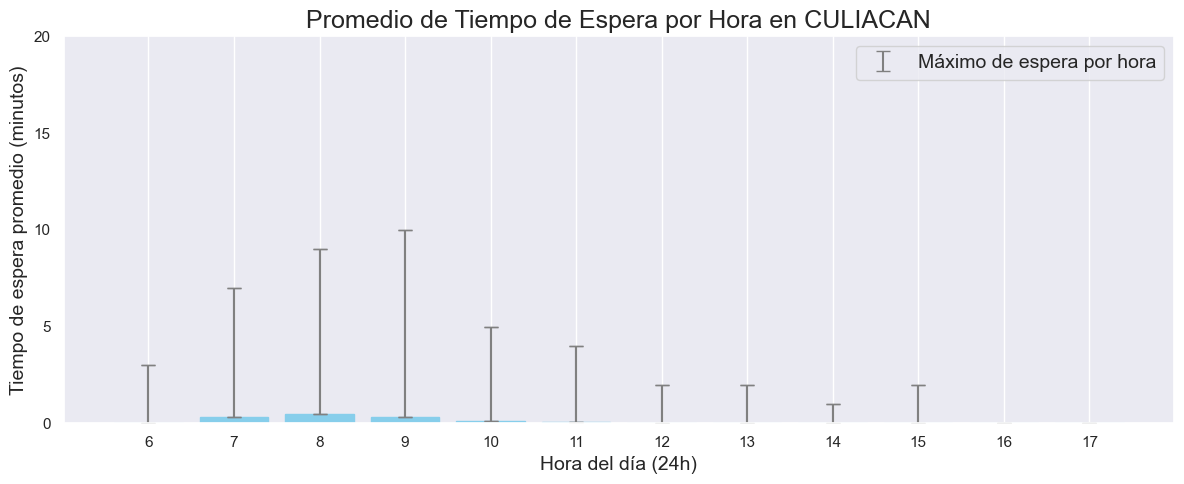

In [13]:
df_simulacion_atencion_cu["hora"] = df_simulacion_atencion_cu["hora_inicio"].dt.hour
agrupado = df_simulacion_atencion_cu.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en CULIACAN", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_simulacion_atencion_cu["hora"].min(), df_simulacion_atencion_cu["hora"].max() + 1))            
plt.yticks(range(0, 21, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCUL.png', dpi=300)

# CULIACAN CAÑADAS

In [14]:
df_fechas = df[df["Sucursal"]=="CULIACAN CAÑADAS"]
df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)
fechas = df_fechas["FechaID"].apply(lambda x : x[:4]+"-"+x[4:6]+"-"+x[6:])
fechas=list(fechas.unique())

simulacion_llegadas = []
simulacion_atencion = []
for i in fechas:
    df_sim = simulacion_pacientes("CULIACAN CAÑADAS", df,i)
    df_te = simular_atencion(df_sim, cajas=4) 
    simulacion_llegadas.append(df_sim)
    simulacion_atencion.append(df_te)

df_simulacion_llegada_ca = pd.concat(simulacion_llegadas, ignore_index=True)
df_simulacion_atencion_ca = pd.concat(simulacion_atencion, ignore_index=True)
df_simulacion_atencion_ca

C:\Users\jajp2\AppData\Local\Temp\ipykernel_18288\1241155536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)


06:06:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:06:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 3 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:10:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:12:00 | Caja 2 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:12:00 | Caja 3 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:12:00 | Caja 4 atiende ID 6 (Prioridad 0) - Espera: 0.0 min
06:15:00 | Caja 3 atiende ID 7 (Prioridad 0) - Espera: 1.0 min
06:16:00 | Caja 1 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:20:00 | Caja 1 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:21:00 | Caja 2 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
06:21:00 | Caja 3 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:23:00 | Caja 4 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:24:00 | Caja 1 atiende ID 13 (Prioridad 0) - Espera: 0.0 min
06:26:00 | Caja 2 atiende ID 15 (Prioridad 1) - Espera: 0.0 min
06:26:00 | Caja 3 atiende ID 16 (Prioridad 1) - Es

09:44:00 | Caja 1 atiende ID 155 (Prioridad 0) - Espera: 0.0 min
09:44:00 | Caja 3 atiende ID 156 (Prioridad 0) - Espera: 0.0 min
09:45:00 | Caja 4 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 2 atiende ID 158 (Prioridad 0) - Espera: 0.0 min
09:51:00 | Caja 1 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 2 atiende ID 160 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 3 atiende ID 161 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 4 atiende ID 162 (Prioridad 0) - Espera: 0.0 min
09:55:00 | Caja 1 atiende ID 163 (Prioridad 0) - Espera: 1.0 min
09:56:00 | Caja 2 atiende ID 164 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 3 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
10:00:00 | Caja 1 atiende ID 166 (Prioridad 1) - Espera: 0.0 min
10:04:00 | Caja 1 atiende ID 167 (Prioridad 1) - Espera: 0.0 min
10:05:00 | Caja 2 atiende ID 168 (Prioridad 1) - Espera: 0.0 min
10:07:00 | Caja 1 atiende ID 169 (Prioridad 0) - Espera: 0.0 min
10:08:00 | Caja 1 atiende

16:12:00 | Caja 1 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
16:16:00 | Caja 1 atiende ID 283 (Prioridad 0) - Espera: 0.0 min
16:16:00 | Caja 2 atiende ID 284 (Prioridad 0) - Espera: 0.0 min
16:17:00 | Caja 3 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
16:19:00 | Caja 2 atiende ID 286 (Prioridad 1) - Espera: 0.0 min
16:25:00 | Caja 1 atiende ID 287 (Prioridad 0) - Espera: 0.0 min
16:28:00 | Caja 3 atiende ID 288 (Prioridad 1) - Espera: 0.0 min
16:33:00 | Caja 2 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
16:52:00 | Caja 1 atiende ID 290 (Prioridad 1) - Espera: 0.0 min
16:54:00 | Caja 2 atiende ID 291 (Prioridad 1) - Espera: 0.0 min
16:59:00 | Caja 1 atiende ID 292 (Prioridad 1) - Espera: 0.0 min
17:00:00 | Caja 2 atiende ID 293 (Prioridad 1) - Espera: 0.0 min
17:10:00 | Caja 1 atiende ID 294 (Prioridad 0) - Espera: 0.0 min
17:16:00 | Caja 1 atiende ID 295 (Prioridad 0) - Espera: 0.0 min
17:38:00 | Caja 1 atiende ID 296 (Prioridad 0) - Espera: 0.0 min
17:43:00 | Caja 1 atiende

08:52:00 | Caja 1 atiende ID 129 (Prioridad 0) - Espera: 0.0 min
08:54:00 | Caja 1 atiende ID 130 (Prioridad 0) - Espera: 0.0 min
08:55:00 | Caja 2 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
08:55:00 | Caja 3 atiende ID 131 (Prioridad 0) - Espera: 0.0 min
08:55:00 | Caja 4 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
08:58:00 | Caja 1 atiende ID 135 (Prioridad 1) - Espera: 1.0 min
08:59:00 | Caja 2 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 3 atiende ID 134 (Prioridad 0) - Espera: 2.0 min
08:59:00 | Caja 4 atiende ID 137 (Prioridad 0) - Espera: 0.0 min
09:02:00 | Caja 1 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
09:03:00 | Caja 2 atiende ID 139 (Prioridad 0) - Espera: 0.0 min
09:04:00 | Caja 3 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
09:06:00 | Caja 1 atiende ID 141 (Prioridad 0) - Espera: 0.0 min
09:15:00 | Caja 1 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 2 atiende ID 143 (Prioridad 0) - Espera: 0.0 min
09:21:00 | Caja 1 atiende

13:40:00 | Caja 1 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
13:46:00 | Caja 1 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
13:52:00 | Caja 1 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
13:53:00 | Caja 2 atiende ID 259 (Prioridad 0) - Espera: 0.0 min
13:57:00 | Caja 1 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
14:03:00 | Caja 1 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
14:04:00 | Caja 2 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
14:08:00 | Caja 1 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
14:21:00 | Caja 1 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
14:22:00 | Caja 2 atiende ID 265 (Prioridad 1) - Espera: 0.0 min
14:37:00 | Caja 1 atiende ID 266 (Prioridad 0) - Espera: 0.0 min
14:41:00 | Caja 1 atiende ID 267 (Prioridad 1) - Espera: 0.0 min
14:45:00 | Caja 1 atiende ID 268 (Prioridad 1) - Espera: 0.0 min
14:54:00 | Caja 1 atiende ID 269 (Prioridad 0) - Espera: 0.0 min
14:57:00 | Caja 1 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
14:57:00 | Caja 2 atiende

08:22:00 | Caja 2 atiende ID 115 (Prioridad 1) - Espera: 10.0 min
08:22:00 | Caja 3 atiende ID 109 (Prioridad 0) - Espera: 14.0 min
08:22:00 | Caja 4 atiende ID 110 (Prioridad 0) - Espera: 13.0 min
08:24:00 | Caja 1 atiende ID 111 (Prioridad 0) - Espera: 15.0 min
08:25:00 | Caja 3 atiende ID 116 (Prioridad 1) - Espera: 11.0 min
08:26:00 | Caja 2 atiende ID 117 (Prioridad 1) - Espera: 12.0 min
08:26:00 | Caja 4 atiende ID 118 (Prioridad 1) - Espera: 11.0 min
08:27:00 | Caja 4 atiende ID 113 (Prioridad 0) - Espera: 16.0 min
08:28:00 | Caja 1 atiende ID 120 (Prioridad 1) - Espera: 12.0 min
08:29:00 | Caja 2 atiende ID 123 (Prioridad 1) - Espera: 10.0 min
08:29:00 | Caja 3 atiende ID 124 (Prioridad 1) - Espera: 10.0 min
08:31:00 | Caja 1 atiende ID 119 (Prioridad 0) - Espera: 15.0 min
08:31:00 | Caja 4 atiende ID 121 (Prioridad 0) - Espera: 14.0 min
08:33:00 | Caja 1 atiende ID 122 (Prioridad 0) - Espera: 14.0 min
08:33:00 | Caja 2 atiende ID 125 (Prioridad 0) - Espera: 13.0 min
08:33:00 |

12:19:00 | Caja 1 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
12:24:00 | Caja 1 atiende ID 240 (Prioridad 0) - Espera: 0.0 min
12:25:00 | Caja 2 atiende ID 241 (Prioridad 1) - Espera: 0.0 min
12:30:00 | Caja 1 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
12:31:00 | Caja 2 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
12:39:00 | Caja 1 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
12:43:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
12:44:00 | Caja 2 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
12:46:00 | Caja 1 atiende ID 247 (Prioridad 0) - Espera: 0.0 min
12:51:00 | Caja 1 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
12:51:00 | Caja 2 atiende ID 249 (Prioridad 0) - Espera: 0.0 min
12:53:00 | Caja 2 atiende ID 250 (Prioridad 0) - Espera: 0.0 min
12:56:00 | Caja 1 atiende ID 251 (Prioridad 0) - Espera: 0.0 min
12:57:00 | Caja 2 atiende ID 252 (Prioridad 0) - Espera: 0.0 min
13:02:00 | Caja 1 atiende ID 253 (Prioridad 1) - Espera: 0.0 min
13:12:00 | Caja 1 atiende

07:24:00 | Caja 1 atiende ID 57 (Prioridad 1) - Espera: 0.0 min
07:24:00 | Caja 4 atiende ID 56 (Prioridad 0) - Espera: 3.0 min
07:25:00 | Caja 2 atiende ID 58 (Prioridad 0) - Espera: 0.0 min
07:27:00 | Caja 3 atiende ID 59 (Prioridad 0) - Espera: 0.0 min
07:29:00 | Caja 1 atiende ID 60 (Prioridad 0) - Espera: 0.0 min
07:29:00 | Caja 2 atiende ID 61 (Prioridad 0) - Espera: 0.0 min
07:32:00 | Caja 2 atiende ID 62 (Prioridad 0) - Espera: 0.0 min
07:36:00 | Caja 1 atiende ID 63 (Prioridad 1) - Espera: 0.0 min
07:36:00 | Caja 2 atiende ID 64 (Prioridad 0) - Espera: 0.0 min
07:37:00 | Caja 3 atiende ID 66 (Prioridad 1) - Espera: 0.0 min
07:37:00 | Caja 4 atiende ID 65 (Prioridad 0) - Espera: 0.0 min
07:41:00 | Caja 1 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 2 atiende ID 68 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 3 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 4 atiende ID 69 (Prioridad 0) - Espera: 0.0 min
07:43:00 | Caja 4 atiende ID 71 (Priorid

11:19:00 | Caja 1 atiende ID 194 (Prioridad 0) - Espera: 0.0 min
11:21:00 | Caja 1 atiende ID 195 (Prioridad 1) - Espera: 0.0 min
11:22:00 | Caja 2 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
11:23:00 | Caja 3 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 1 atiende ID 198 (Prioridad 1) - Espera: 0.0 min
11:27:00 | Caja 2 atiende ID 199 (Prioridad 0) - Espera: 0.0 min
11:32:00 | Caja 1 atiende ID 200 (Prioridad 0) - Espera: 0.0 min
11:34:00 | Caja 2 atiende ID 201 (Prioridad 1) - Espera: 0.0 min
11:38:00 | Caja 1 atiende ID 202 (Prioridad 0) - Espera: 0.0 min
11:39:00 | Caja 2 atiende ID 203 (Prioridad 0) - Espera: 0.0 min
11:50:00 | Caja 1 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
11:53:00 | Caja 1 atiende ID 205 (Prioridad 0) - Espera: 0.0 min
11:54:00 | Caja 2 atiende ID 206 (Prioridad 1) - Espera: 0.0 min
11:55:00 | Caja 3 atiende ID 207 (Prioridad 0) - Espera: 0.0 min
11:57:00 | Caja 1 atiende ID 208 (Prioridad 1) - Espera: 0.0 min
11:58:00 | Caja 2 atiende

08:07:00 | Caja 1 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
08:07:00 | Caja 2 atiende ID 75 (Prioridad 0) - Espera: 0.0 min
08:08:00 | Caja 3 atiende ID 76 (Prioridad 1) - Espera: 0.0 min
08:09:00 | Caja 4 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
08:10:00 | Caja 1 atiende ID 78 (Prioridad 1) - Espera: 1.0 min
08:11:00 | Caja 2 atiende ID 80 (Prioridad 1) - Espera: 1.0 min
08:11:00 | Caja 3 atiende ID 81 (Prioridad 1) - Espera: 1.0 min
08:11:00 | Caja 4 atiende ID 79 (Prioridad 0) - Espera: 1.0 min
08:13:00 | Caja 1 atiende ID 82 (Prioridad 1) - Espera: 1.0 min
08:16:00 | Caja 2 atiende ID 83 (Prioridad 1) - Espera: 4.0 min
08:17:00 | Caja 1 atiende ID 86 (Prioridad 1) - Espera: 3.0 min
08:19:00 | Caja 1 atiende ID 87 (Prioridad 1) - Espera: 4.0 min
08:19:00 | Caja 4 atiende ID 88 (Prioridad 1) - Espera: 4.0 min
08:20:00 | Caja 2 atiende ID 89 (Prioridad 1) - Espera: 4.0 min
08:21:00 | Caja 1 atiende ID 90 (Prioridad 1) - Espera: 5.0 min
08:22:00 | Caja 4 atiende ID 91 (Priorid

11:38:00 | Caja 1 atiende ID 215 (Prioridad 1) - Espera: 0.0 min
11:39:00 | Caja 2 atiende ID 216 (Prioridad 1) - Espera: 0.0 min
11:41:00 | Caja 2 atiende ID 217 (Prioridad 1) - Espera: 0.0 min
11:41:00 | Caja 3 atiende ID 218 (Prioridad 0) - Espera: 0.0 min
11:42:00 | Caja 4 atiende ID 219 (Prioridad 1) - Espera: 0.0 min
11:50:00 | Caja 1 atiende ID 220 (Prioridad 0) - Espera: 0.0 min
11:51:00 | Caja 2 atiende ID 221 (Prioridad 1) - Espera: 0.0 min
11:53:00 | Caja 1 atiende ID 222 (Prioridad 1) - Espera: 0.0 min
12:10:00 | Caja 1 atiende ID 223 (Prioridad 1) - Espera: 0.0 min
12:11:00 | Caja 1 atiende ID 224 (Prioridad 0) - Espera: 0.0 min
12:11:00 | Caja 2 atiende ID 225 (Prioridad 0) - Espera: 0.0 min
12:12:00 | Caja 3 atiende ID 226 (Prioridad 0) - Espera: 0.0 min
12:14:00 | Caja 1 atiende ID 227 (Prioridad 0) - Espera: 0.0 min
12:15:00 | Caja 3 atiende ID 228 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 2 atiende ID 229 (Prioridad 0) - Espera: 0.0 min
12:18:00 | Caja 4 atiende

08:32:00 | Caja 1 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 2 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 3 atiende ID 112 (Prioridad 1) - Espera: 0.0 min
08:36:00 | Caja 4 atiende ID 113 (Prioridad 0) - Espera: 0.0 min
08:37:00 | Caja 1 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 3 atiende ID 116 (Prioridad 1) - Espera: 1.0 min
08:38:00 | Caja 4 atiende ID 115 (Prioridad 0) - Espera: 1.0 min
08:40:00 | Caja 2 atiende ID 117 (Prioridad 0) - Espera: 0.0 min
08:41:00 | Caja 3 atiende ID 118 (Prioridad 0) - Espera: 0.0 min
08:42:00 | Caja 1 atiende ID 119 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 4 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 3 atiende ID 121 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 1 atiende ID 122 (Prioridad 1) - Espera: 1.0 min
08:46:00 | Caja 2 atiende ID 123 (Prioridad 1) - Espera: 1.0 min
08:48:00 | Caja 3 atiende ID 125 (Prioridad 1) - Espera: 2.0 min
08:49:00 | Caja 2 atiende

13:17:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
13:17:00 | Caja 2 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
13:29:00 | Caja 1 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
13:37:00 | Caja 1 atiende ID 248 (Prioridad 0) - Espera: 0.0 min
13:38:00 | Caja 2 atiende ID 249 (Prioridad 0) - Espera: 0.0 min
13:49:00 | Caja 1 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 2 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 3 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
13:54:00 | Caja 1 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
13:54:00 | Caja 3 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
13:59:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
14:06:00 | Caja 1 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
14:13:00 | Caja 1 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
14:16:00 | Caja 2 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
14:22:00 | Caja 1 atiende ID 259 (Prioridad 0) - Espera: 0.0 min
14:37:00 | Caja 1 atiende

08:30:00 | Caja 2 atiende ID 112 (Prioridad 0) - Espera: 0.0 min
08:32:00 | Caja 3 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
08:32:00 | Caja 4 atiende ID 113 (Prioridad 0) - Espera: 0.0 min
08:34:00 | Caja 2 atiende ID 116 (Prioridad 1) - Espera: 1.0 min
08:35:00 | Caja 1 atiende ID 117 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 4 atiende ID 115 (Prioridad 0) - Espera: 2.0 min
08:37:00 | Caja 2 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
08:37:00 | Caja 3 atiende ID 119 (Prioridad 0) - Espera: 0.0 min
08:39:00 | Caja 1 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 1 atiende ID 121 (Prioridad 0) - Espera: 0.0 min
08:43:00 | Caja 2 atiende ID 122 (Prioridad 0) - Espera: 0.0 min
08:43:00 | Caja 3 atiende ID 123 (Prioridad 0) - Espera: 0.0 min
08:44:00 | Caja 4 atiende ID 124 (Prioridad 0) - Espera: 0.0 min
08:47:00 | Caja 2 atiende ID 125 (Prioridad 1) - Espera: 2.0 min
08:47:00 | Caja 3 atiende ID 126 (Prioridad 0) - Espera: 0.0 min
08:48:00 | Caja 1 atiende

12:09:00 | Caja 1 atiende ID 240 (Prioridad 0) - Espera: 0.0 min
12:17:00 | Caja 1 atiende ID 241 (Prioridad 1) - Espera: 0.0 min
12:18:00 | Caja 2 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
12:41:00 | Caja 1 atiende ID 243 (Prioridad 0) - Espera: 0.0 min
12:45:00 | Caja 1 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 2 atiende ID 245 (Prioridad 0) - Espera: 0.0 min
12:50:00 | Caja 1 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
12:51:00 | Caja 2 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
12:54:00 | Caja 1 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
13:07:00 | Caja 1 atiende ID 249 (Prioridad 0) - Espera: 0.0 min
13:09:00 | Caja 1 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
13:12:00 | Caja 1 atiende ID 251 (Prioridad 0) - Espera: 0.0 min
13:21:00 | Caja 1 atiende ID 252 (Prioridad 0) - Espera: 0.0 min
13:22:00 | Caja 2 atiende ID 253 (Prioridad 1) - Espera: 0.0 min
13:35:00 | Caja 1 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
13:37:00 | Caja 2 atiende

08:46:00 | Caja 1 atiende ID 121 (Prioridad 0) - Espera: 2.0 min
08:47:00 | Caja 4 atiende ID 122 (Prioridad 0) - Espera: 1.0 min
08:49:00 | Caja 2 atiende ID 123 (Prioridad 1) - Espera: 0.0 min
08:49:00 | Caja 3 atiende ID 125 (Prioridad 1) - Espera: 0.0 min
08:51:00 | Caja 4 atiende ID 126 (Prioridad 1) - Espera: 2.0 min
08:52:00 | Caja 1 atiende ID 127 (Prioridad 1) - Espera: 1.0 min
08:52:00 | Caja 2 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 4 atiende ID 124 (Prioridad 0) - Espera: 5.0 min
08:56:00 | Caja 1 atiende ID 129 (Prioridad 0) - Espera: 3.0 min
08:56:00 | Caja 2 atiende ID 130 (Prioridad 0) - Espera: 0.0 min
08:56:00 | Caja 3 atiende ID 131 (Prioridad 0) - Espera: 0.0 min
08:58:00 | Caja 3 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 2 atiende ID 133 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 4 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
09:02:00 | Caja 1 atiende ID 135 (Prioridad 1) - Espera: 3.0 min
09:03:00 | Caja 2 atiende

12:57:00 | Caja 1 atiende ID 253 (Prioridad 1) - Espera: 0.0 min
13:01:00 | Caja 1 atiende ID 254 (Prioridad 0) - Espera: 0.0 min
13:07:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
13:16:00 | Caja 1 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
13:16:00 | Caja 2 atiende ID 256 (Prioridad 0) - Espera: 0.0 min
13:24:00 | Caja 1 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
13:25:00 | Caja 2 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
13:27:00 | Caja 3 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
13:29:00 | Caja 2 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
13:33:00 | Caja 1 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
13:40:00 | Caja 1 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
14:14:00 | Caja 1 atiende ID 264 (Prioridad 0) - Espera: 0.0 min
14:45:00 | Caja 1 atiende ID 265 (Prioridad 0) - Espera: 0.0 min
14:47:00 | Caja 2 atiende ID 266 (Prioridad 1) - Espera: 0.0 min
14:47:00 | Caja 3 atiende ID 267 (Prioridad 0) - Espera: 0.0 min
14:50:00 | Caja 1 atiende

07:58:00 | Caja 1 atiende ID 76 (Prioridad 0) - Espera: 0.0 min
08:00:00 | Caja 2 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
08:04:00 | Caja 1 atiende ID 78 (Prioridad 1) - Espera: 0.0 min
08:07:00 | Caja 2 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
08:07:00 | Caja 3 atiende ID 80 (Prioridad 1) - Espera: 0.0 min
08:10:00 | Caja 1 atiende ID 81 (Prioridad 1) - Espera: 0.0 min
08:10:00 | Caja 2 atiende ID 82 (Prioridad 1) - Espera: 0.0 min
08:10:00 | Caja 4 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 1 atiende ID 84 (Prioridad 0) - Espera: 0.0 min
08:14:00 | Caja 2 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 1 atiende ID 86 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 3 atiende ID 88 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 4 atiende ID 89 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 2 atiende ID 90 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 4 atiende ID 87 (Prioridad 0) - Espera: 2.0 min
08:20:00 | Caja 1 atiende ID 92 (Priorid

11:51:00 | Caja 1 atiende ID 207 (Prioridad 0) - Espera: 0.0 min
11:52:00 | Caja 2 atiende ID 208 (Prioridad 0) - Espera: 0.0 min
11:59:00 | Caja 1 atiende ID 209 (Prioridad 0) - Espera: 0.0 min
12:01:00 | Caja 1 atiende ID 210 (Prioridad 1) - Espera: 0.0 min
12:04:00 | Caja 2 atiende ID 211 (Prioridad 1) - Espera: 0.0 min
12:10:00 | Caja 1 atiende ID 212 (Prioridad 1) - Espera: 0.0 min
12:12:00 | Caja 2 atiende ID 213 (Prioridad 1) - Espera: 0.0 min
12:15:00 | Caja 1 atiende ID 214 (Prioridad 1) - Espera: 0.0 min
12:15:00 | Caja 3 atiende ID 215 (Prioridad 1) - Espera: 0.0 min
12:22:00 | Caja 1 atiende ID 216 (Prioridad 0) - Espera: 0.0 min
12:22:00 | Caja 2 atiende ID 217 (Prioridad 0) - Espera: 0.0 min
12:34:00 | Caja 1 atiende ID 218 (Prioridad 0) - Espera: 0.0 min
12:36:00 | Caja 2 atiende ID 219 (Prioridad 1) - Espera: 0.0 min
12:36:00 | Caja 3 atiende ID 220 (Prioridad 0) - Espera: 0.0 min
12:38:00 | Caja 1 atiende ID 221 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 1 atiende

08:16:00 | Caja 1 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 4 atiende ID 93 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 1 atiende ID 94 (Prioridad 0) - Espera: 1.0 min
08:19:00 | Caja 2 atiende ID 96 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 3 atiende ID 95 (Prioridad 0) - Espera: 0.0 min
08:23:00 | Caja 1 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
08:24:00 | Caja 2 atiende ID 98 (Prioridad 0) - Espera: 0.0 min
08:25:00 | Caja 3 atiende ID 99 (Prioridad 0) - Espera: 0.0 min
08:29:00 | Caja 1 atiende ID 100 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 2 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 3 atiende ID 102 (Prioridad 0) - Espera: 0.0 min
08:33:00 | Caja 1 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 3 atiende ID 104 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 4 atiende ID 105 (Prioridad 1) - Espera: 0.0 min
08:37:00 | Caja 1 atiende ID 107 (Prioridad 1) - Espera: 1.0 min
08:37:00 | Caja 3 atiende ID 108 

12:52:00 | Caja 1 atiende ID 227 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 2 atiende ID 228 (Prioridad 1) - Espera: 0.0 min
12:58:00 | Caja 1 atiende ID 229 (Prioridad 0) - Espera: 0.0 min
12:58:00 | Caja 2 atiende ID 230 (Prioridad 0) - Espera: 0.0 min
13:01:00 | Caja 3 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
13:07:00 | Caja 1 atiende ID 232 (Prioridad 1) - Espera: 0.0 min
13:16:00 | Caja 1 atiende ID 233 (Prioridad 1) - Espera: 0.0 min
13:26:00 | Caja 1 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
13:35:00 | Caja 1 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
13:40:00 | Caja 1 atiende ID 236 (Prioridad 1) - Espera: 0.0 min
13:43:00 | Caja 2 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
13:43:00 | Caja 3 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 1 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 2 atiende ID 240 (Prioridad 0) - Espera: 0.0 min
13:48:00 | Caja 3 atiende ID 241 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 1 atiende

08:29:00 | Caja 2 atiende ID 89 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 3 atiende ID 90 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 1 atiende ID 91 (Prioridad 0) - Espera: 0.0 min
08:33:00 | Caja 2 atiende ID 93 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 4 atiende ID 92 (Prioridad 0) - Espera: 0.0 min
08:34:00 | Caja 3 atiende ID 94 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 1 atiende ID 96 (Prioridad 1) - Espera: 0.0 min
08:35:00 | Caja 4 atiende ID 95 (Prioridad 0) - Espera: 1.0 min
08:36:00 | Caja 3 atiende ID 97 (Prioridad 0) - Espera: 0.0 min
08:39:00 | Caja 1 atiende ID 98 (Prioridad 0) - Espera: 0.0 min
08:40:00 | Caja 1 atiende ID 99 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 2 atiende ID 100 (Prioridad 0) - Espera: 0.0 min
08:40:00 | Caja 3 atiende ID 101 (Prioridad 0) - Espera: 0.0 min
08:41:00 | Caja 4 atiende ID 102 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 1 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 2 atiende ID 104 (Pr

12:57:00 | Caja 1 atiende ID 221 (Prioridad 0) - Espera: 0.0 min
12:57:00 | Caja 2 atiende ID 222 (Prioridad 0) - Espera: 0.0 min
12:57:00 | Caja 3 atiende ID 223 (Prioridad 0) - Espera: 0.0 min
12:59:00 | Caja 4 atiende ID 224 (Prioridad 1) - Espera: 0.0 min
13:00:00 | Caja 1 atiende ID 225 (Prioridad 1) - Espera: 1.0 min
13:00:00 | Caja 3 atiende ID 226 (Prioridad 1) - Espera: 0.0 min
13:12:00 | Caja 1 atiende ID 227 (Prioridad 1) - Espera: 0.0 min
13:14:00 | Caja 2 atiende ID 228 (Prioridad 1) - Espera: 0.0 min
13:15:00 | Caja 3 atiende ID 229 (Prioridad 0) - Espera: 0.0 min
13:15:00 | Caja 4 atiende ID 230 (Prioridad 0) - Espera: 0.0 min
13:17:00 | Caja 1 atiende ID 231 (Prioridad 1) - Espera: 1.0 min
13:18:00 | Caja 3 atiende ID 232 (Prioridad 1) - Espera: 0.0 min
13:22:00 | Caja 1 atiende ID 233 (Prioridad 1) - Espera: 0.0 min
13:28:00 | Caja 1 atiende ID 234 (Prioridad 0) - Espera: 0.0 min
13:36:00 | Caja 1 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
13:42:00 | Caja 1 atiende

07:43:00 | Caja 1 atiende ID 66 (Prioridad 1) - Espera: 2.0 min
07:43:00 | Caja 2 atiende ID 60 (Prioridad 0) - Espera: 6.0 min
07:43:00 | Caja 3 atiende ID 63 (Prioridad 0) - Espera: 2.0 min
07:43:00 | Caja 4 atiende ID 65 (Prioridad 0) - Espera: 2.0 min
07:47:00 | Caja 3 atiende ID 67 (Prioridad 0) - Espera: 5.0 min
07:48:00 | Caja 1 atiende ID 68 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 2 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 4 atiende ID 70 (Prioridad 0) - Espera: 0.0 min
07:51:00 | Caja 3 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 2 atiende ID 72 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 3 atiende ID 73 (Prioridad 0) - Espera: 0.0 min
07:53:00 | Caja 2 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
07:54:00 | Caja 1 atiende ID 75 (Prioridad 1) - Espera: 1.0 min
07:54:00 | Caja 4 atiende ID 76 (Prioridad 1) - Espera: 1.0 min
07:55:00 | Caja 2 atiende ID 77 (Prioridad 0) - Espera: 1.0 min
07:57:00 | Caja 2 atiende ID 78 (Priorid

11:00:00 | Caja 1 atiende ID 193 (Prioridad 1) - Espera: 0.0 min
11:04:00 | Caja 2 atiende ID 194 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 1 atiende ID 195 (Prioridad 0) - Espera: 0.0 min
11:14:00 | Caja 1 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
11:16:00 | Caja 2 atiende ID 197 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 1 atiende ID 198 (Prioridad 1) - Espera: 0.0 min
11:24:00 | Caja 1 atiende ID 199 (Prioridad 1) - Espera: 0.0 min
11:27:00 | Caja 2 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 1 atiende ID 201 (Prioridad 1) - Espera: 0.0 min
11:29:00 | Caja 3 atiende ID 202 (Prioridad 1) - Espera: 0.0 min
11:36:00 | Caja 1 atiende ID 203 (Prioridad 0) - Espera: 0.0 min
11:39:00 | Caja 1 atiende ID 204 (Prioridad 1) - Espera: 0.0 min
11:40:00 | Caja 2 atiende ID 205 (Prioridad 1) - Espera: 0.0 min
11:46:00 | Caja 1 atiende ID 206 (Prioridad 0) - Espera: 0.0 min
11:47:00 | Caja 2 atiende ID 207 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 1 atiende

07:39:00 | Caja 1 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
07:45:00 | Caja 1 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
07:45:00 | Caja 2 atiende ID 70 (Prioridad 0) - Espera: 0.0 min
07:46:00 | Caja 3 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
07:46:00 | Caja 4 atiende ID 72 (Prioridad 0) - Espera: 0.0 min
07:47:00 | Caja 1 atiende ID 74 (Prioridad 0) - Espera: 0.0 min
07:49:00 | Caja 3 atiende ID 75 (Prioridad 0) - Espera: 0.0 min
07:50:00 | Caja 4 atiende ID 76 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 1 atiende ID 77 (Prioridad 1) - Espera: 1.0 min
07:53:00 | Caja 2 atiende ID 78 (Prioridad 0) - Espera: 0.0 min
07:55:00 | Caja 3 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 4 atiende ID 80 (Prioridad 1) - Espera: 0.0 min
07:58:00 | Caja 1 atiende ID 81 (Prioridad 1) - Espera: 0.0 min
08:00:00 | Caja 1 atiende ID 82 (Prioridad 0) - Espera: 0.0 min
08:02:00 | Caja 2 atiende ID 83 (Prioridad 0) - Espera: 0.0 min
08:02:00 | Caja 3 atiende ID 84 (Priorid

11:46:00 | Caja 2 atiende ID 205 (Prioridad 0) - Espera: 0.0 min
11:48:00 | Caja 3 atiende ID 206 (Prioridad 1) - Espera: 0.0 min
11:59:00 | Caja 1 atiende ID 207 (Prioridad 1) - Espera: 0.0 min
12:08:00 | Caja 1 atiende ID 208 (Prioridad 1) - Espera: 0.0 min
12:08:00 | Caja 2 atiende ID 209 (Prioridad 0) - Espera: 0.0 min
12:08:00 | Caja 3 atiende ID 210 (Prioridad 0) - Espera: 0.0 min
12:14:00 | Caja 1 atiende ID 211 (Prioridad 0) - Espera: 0.0 min
12:19:00 | Caja 1 atiende ID 212 (Prioridad 1) - Espera: 0.0 min
12:33:00 | Caja 1 atiende ID 213 (Prioridad 1) - Espera: 0.0 min
12:40:00 | Caja 1 atiende ID 214 (Prioridad 1) - Espera: 0.0 min
12:41:00 | Caja 2 atiende ID 215 (Prioridad 1) - Espera: 0.0 min
12:45:00 | Caja 1 atiende ID 216 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 1 atiende ID 217 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 2 atiende ID 218 (Prioridad 0) - Espera: 0.0 min
12:58:00 | Caja 1 atiende ID 219 (Prioridad 0) - Espera: 0.0 min
13:00:00 | Caja 2 atiende

07:43:00 | Caja 2 atiende ID 78 (Prioridad 1) - Espera: 4.0 min
07:43:00 | Caja 3 atiende ID 79 (Prioridad 1) - Espera: 4.0 min
07:44:00 | Caja 1 atiende ID 76 (Prioridad 0) - Espera: 6.0 min
07:44:00 | Caja 4 atiende ID 80 (Prioridad 1) - Espera: 1.0 min
07:46:00 | Caja 2 atiende ID 81 (Prioridad 0) - Espera: 0.0 min
07:50:00 | Caja 1 atiende ID 82 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 2 atiende ID 84 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 3 atiende ID 83 (Prioridad 0) - Espera: 0.0 min
07:53:00 | Caja 1 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 4 atiende ID 86 (Prioridad 0) - Espera: 0.0 min
07:54:00 | Caja 2 atiende ID 88 (Prioridad 1) - Espera: 0.0 min
07:54:00 | Caja 3 atiende ID 87 (Prioridad 0) - Espera: 1.0 min
07:56:00 | Caja 4 atiende ID 89 (Prioridad 1) - Espera: 1.0 min
07:57:00 | Caja 3 atiende ID 90 (Prioridad 1) - Espera: 2.0 min
07:58:00 | Caja 2 atiende ID 91 (Prioridad 1) - Espera: 3.0 min
07:58:00 | Caja 4 atiende ID 92 (Priorid

11:52:00 | Caja 1 atiende ID 226 (Prioridad 1) - Espera: 0.0 min
12:00:00 | Caja 1 atiende ID 227 (Prioridad 1) - Espera: 0.0 min
12:07:00 | Caja 1 atiende ID 228 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 1 atiende ID 229 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 2 atiende ID 230 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 3 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
12:17:00 | Caja 4 atiende ID 232 (Prioridad 0) - Espera: 0.0 min
12:18:00 | Caja 1 atiende ID 233 (Prioridad 1) - Espera: 0.0 min
12:18:00 | Caja 2 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
12:22:00 | Caja 1 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
12:25:00 | Caja 2 atiende ID 236 (Prioridad 0) - Espera: 0.0 min
12:31:00 | Caja 1 atiende ID 237 (Prioridad 0) - Espera: 0.0 min
12:44:00 | Caja 1 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
12:45:00 | Caja 2 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
12:47:00 | Caja 1 atiende ID 240 (Prioridad 1) - Espera: 0.0 min
12:47:00 | Caja 3 atiende

08:11:00 | Caja 1 atiende ID 84 (Prioridad 0) - Espera: 0.0 min
08:14:00 | Caja 2 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 3 atiende ID 86 (Prioridad 0) - Espera: 0.0 min
08:15:00 | Caja 1 atiende ID 88 (Prioridad 1) - Espera: 0.0 min
08:15:00 | Caja 4 atiende ID 89 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 3 atiende ID 87 (Prioridad 0) - Espera: 2.0 min
08:18:00 | Caja 2 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 4 atiende ID 90 (Prioridad 0) - Espera: 2.0 min
08:20:00 | Caja 1 atiende ID 93 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 1 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 3 atiende ID 91 (Prioridad 0) - Espera: 4.0 min
08:22:00 | Caja 2 atiende ID 98 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 4 atiende ID 94 (Prioridad 0) - Espera: 2.0 min
08:25:00 | Caja 1 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
08:25:00 | Caja 3 atiende ID 102 (Prioridad 1) - Espera: 0.0 min
08:26:00 | Caja 2 atiende ID 95 (Prior

13:06:00 | Caja 1 atiende ID 222 (Prioridad 1) - Espera: 0.0 min
13:13:00 | Caja 1 atiende ID 223 (Prioridad 1) - Espera: 0.0 min
13:18:00 | Caja 1 atiende ID 224 (Prioridad 1) - Espera: 0.0 min
13:21:00 | Caja 1 atiende ID 225 (Prioridad 1) - Espera: 0.0 min
13:25:00 | Caja 2 atiende ID 227 (Prioridad 1) - Espera: 0.0 min
13:25:00 | Caja 3 atiende ID 226 (Prioridad 0) - Espera: 0.0 min
13:28:00 | Caja 4 atiende ID 228 (Prioridad 1) - Espera: 0.0 min
13:43:00 | Caja 1 atiende ID 229 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 1 atiende ID 230 (Prioridad 0) - Espera: 0.0 min
13:52:00 | Caja 1 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
13:56:00 | Caja 1 atiende ID 232 (Prioridad 0) - Espera: 0.0 min
13:57:00 | Caja 2 atiende ID 233 (Prioridad 1) - Espera: 0.0 min
13:58:00 | Caja 1 atiende ID 234 (Prioridad 0) - Espera: 0.0 min
14:00:00 | Caja 2 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
14:21:00 | Caja 1 atiende ID 236 (Prioridad 1) - Espera: 0.0 min
14:26:00 | Caja 1 atiende

07:52:00 | Caja 4 atiende ID 89 (Prioridad 1) - Espera: 5.0 min
07:53:00 | Caja 3 atiende ID 90 (Prioridad 1) - Espera: 6.0 min
07:54:00 | Caja 4 atiende ID 91 (Prioridad 1) - Espera: 5.0 min
07:55:00 | Caja 1 atiende ID 85 (Prioridad 0) - Espera: 10.0 min
07:55:00 | Caja 3 atiende ID 92 (Prioridad 1) - Espera: 5.0 min
07:56:00 | Caja 2 atiende ID 95 (Prioridad 1) - Espera: 3.0 min
07:58:00 | Caja 3 atiende ID 96 (Prioridad 1) - Espera: 4.0 min
07:58:00 | Caja 4 atiende ID 98 (Prioridad 1) - Espera: 1.0 min
07:59:00 | Caja 1 atiende ID 93 (Prioridad 0) - Espera: 6.0 min
08:00:00 | Caja 2 atiende ID 94 (Prioridad 0) - Espera: 7.0 min
08:00:00 | Caja 3 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
08:01:00 | Caja 1 atiende ID 102 (Prioridad 1) - Espera: 1.0 min
08:03:00 | Caja 4 atiende ID 97 (Prioridad 0) - Espera: 7.0 min
08:04:00 | Caja 1 atiende ID 103 (Prioridad 1) - Espera: 3.0 min
08:04:00 | Caja 2 atiende ID 104 (Prioridad 1) - Espera: 3.0 min
08:04:00 | Caja 3 atiende ID 99 (Pr

11:19:00 | Caja 1 atiende ID 215 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 2 atiende ID 216 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 1 atiende ID 217 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 2 atiende ID 218 (Prioridad 1) - Espera: 0.0 min
11:31:00 | Caja 1 atiende ID 219 (Prioridad 1) - Espera: 0.0 min
11:32:00 | Caja 2 atiende ID 220 (Prioridad 1) - Espera: 0.0 min
11:36:00 | Caja 1 atiende ID 221 (Prioridad 0) - Espera: 0.0 min
11:38:00 | Caja 2 atiende ID 222 (Prioridad 1) - Espera: 0.0 min
11:41:00 | Caja 2 atiende ID 223 (Prioridad 0) - Espera: 0.0 min
11:44:00 | Caja 1 atiende ID 224 (Prioridad 1) - Espera: 0.0 min
11:48:00 | Caja 1 atiende ID 225 (Prioridad 0) - Espera: 0.0 min
11:51:00 | Caja 2 atiende ID 226 (Prioridad 1) - Espera: 0.0 min
11:51:00 | Caja 3 atiende ID 227 (Prioridad 1) - Espera: 0.0 min
11:58:00 | Caja 1 atiende ID 228 (Prioridad 0) - Espera: 0.0 min
12:03:00 | Caja 1 atiende ID 229 (Prioridad 1) - Espera: 0.0 min
12:05:00 | Caja 2 atiende

07:22:00 | Caja 1 atiende ID 53 (Prioridad 0) - Espera: 0.0 min
07:23:00 | Caja 3 atiende ID 54 (Prioridad 0) - Espera: 0.0 min
07:24:00 | Caja 1 atiende ID 55 (Prioridad 0) - Espera: 0.0 min
07:24:00 | Caja 2 atiende ID 56 (Prioridad 0) - Espera: 0.0 min
07:25:00 | Caja 3 atiende ID 57 (Prioridad 1) - Espera: 0.0 min
07:25:00 | Caja 4 atiende ID 58 (Prioridad 1) - Espera: 0.0 min
07:27:00 | Caja 2 atiende ID 59 (Prioridad 1) - Espera: 0.0 min
07:28:00 | Caja 1 atiende ID 60 (Prioridad 0) - Espera: 0.0 min
07:30:00 | Caja 1 atiende ID 62 (Prioridad 1) - Espera: 0.0 min
07:30:00 | Caja 3 atiende ID 63 (Prioridad 1) - Espera: 0.0 min
07:30:00 | Caja 4 atiende ID 61 (Prioridad 0) - Espera: 0.0 min
07:32:00 | Caja 2 atiende ID 64 (Prioridad 0) - Espera: 0.0 min
07:34:00 | Caja 1 atiende ID 65 (Prioridad 1) - Espera: 0.0 min
07:34:00 | Caja 3 atiende ID 66 (Prioridad 1) - Espera: 0.0 min
07:34:00 | Caja 4 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:36:00 | Caja 2 atiende ID 68 (Priorid

10:52:00 | Caja 1 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
10:54:00 | Caja 2 atiende ID 198 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 3 atiende ID 199 (Prioridad 0) - Espera: 0.0 min
10:58:00 | Caja 1 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 2 atiende ID 201 (Prioridad 0) - Espera: 0.0 min
11:03:00 | Caja 1 atiende ID 202 (Prioridad 0) - Espera: 0.0 min
11:06:00 | Caja 1 atiende ID 203 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 2 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
11:15:00 | Caja 1 atiende ID 205 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 2 atiende ID 206 (Prioridad 0) - Espera: 0.0 min
11:16:00 | Caja 3 atiende ID 207 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 4 atiende ID 208 (Prioridad 0) - Espera: 0.0 min
11:19:00 | Caja 1 atiende ID 209 (Prioridad 1) - Espera: 0.0 min
11:24:00 | Caja 1 atiende ID 210 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 2 atiende ID 211 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 3 atiende

06:21:00 | Caja 1 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:22:00 | Caja 2 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:22:00 | Caja 3 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
06:23:00 | Caja 4 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:26:00 | Caja 1 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:31:00 | Caja 1 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
06:31:00 | Caja 2 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
06:34:00 | Caja 2 atiende ID 15 (Prioridad 0) - Espera: 0.0 min
06:36:00 | Caja 1 atiende ID 16 (Prioridad 1) - Espera: 0.0 min
06:44:00 | Caja 1 atiende ID 17 (Prioridad 0) - Espera: 0.0 min
06:46:00 | Caja 2 atiende ID 19 (Prioridad 1) - Espera: 0.0 min
06:46:00 | Caja 3 atiende ID 18 (Prioridad 0) - Espera: 0.0 min
06:48:00 | Caja 1 atiende ID 20 (Prioridad 0) - Espera: 0.0 min
06:49:00 | Caja 2 atiende ID 21 (Prioridad 0) - Espera: 0.0 min
06:50:00 | Caja 3 atiende ID 22 (Prioridad 1) - Espera: 0.0 min
06:51:00 | Caja 1 atiende ID 23 (Prioridad

09:41:00 | Caja 3 atiende ID 172 (Prioridad 1) - Espera: 2.0 min
09:41:00 | Caja 4 atiende ID 174 (Prioridad 1) - Espera: 1.0 min
09:43:00 | Caja 1 atiende ID 175 (Prioridad 1) - Espera: 3.0 min
09:43:00 | Caja 2 atiende ID 176 (Prioridad 1) - Espera: 1.0 min
09:44:00 | Caja 3 atiende ID 171 (Prioridad 0) - Espera: 6.0 min
09:45:00 | Caja 1 atiende ID 173 (Prioridad 0) - Espera: 5.0 min
09:45:00 | Caja 4 atiende ID 177 (Prioridad 0) - Espera: 2.0 min
09:48:00 | Caja 2 atiende ID 178 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 1 atiende ID 179 (Prioridad 0) - Espera: 0.0 min
09:52:00 | Caja 1 atiende ID 180 (Prioridad 0) - Espera: 0.0 min
09:53:00 | Caja 2 atiende ID 181 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 1 atiende ID 182 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 1 atiende ID 183 (Prioridad 1) - Espera: 0.0 min
10:03:00 | Caja 1 atiende ID 184 (Prioridad 0) - Espera: 0.0 min
10:09:00 | Caja 1 atiende ID 185 (Prioridad 1) - Espera: 0.0 min
10:14:00 | Caja 1 atiende

16:22:00 | Caja 1 atiende ID 307 (Prioridad 1) - Espera: 0.0 min
16:32:00 | Caja 1 atiende ID 308 (Prioridad 1) - Espera: 0.0 min
16:36:00 | Caja 1 atiende ID 309 (Prioridad 1) - Espera: 0.0 min
16:37:00 | Caja 2 atiende ID 310 (Prioridad 1) - Espera: 0.0 min
16:41:00 | Caja 1 atiende ID 311 (Prioridad 1) - Espera: 0.0 min
16:46:00 | Caja 1 atiende ID 312 (Prioridad 1) - Espera: 0.0 min
16:47:00 | Caja 2 atiende ID 313 (Prioridad 0) - Espera: 0.0 min
16:51:00 | Caja 2 atiende ID 314 (Prioridad 1) - Espera: 0.0 min
17:07:00 | Caja 1 atiende ID 315 (Prioridad 1) - Espera: 0.0 min
17:19:00 | Caja 1 atiende ID 316 (Prioridad 1) - Espera: 0.0 min
17:21:00 | Caja 2 atiende ID 317 (Prioridad 1) - Espera: 0.0 min
17:36:00 | Caja 1 atiende ID 318 (Prioridad 1) - Espera: 0.0 min
17:43:00 | Caja 1 atiende ID 319 (Prioridad 1) - Espera: 0.0 min
17:43:00 | Caja 2 atiende ID 320 (Prioridad 0) - Espera: 0.0 min
17:44:00 | Caja 3 atiende ID 321 (Prioridad 1) - Espera: 0.0 min
17:53:00 | Caja 1 atiende

08:35:00 | Caja 1 atiende ID 127 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 1 atiende ID 128 (Prioridad 0) - Espera: 0.0 min
08:42:00 | Caja 1 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 2 atiende ID 130 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 3 atiende ID 131 (Prioridad 0) - Espera: 0.0 min
08:44:00 | Caja 1 atiende ID 132 (Prioridad 0) - Espera: 0.0 min
08:44:00 | Caja 4 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
08:46:00 | Caja 1 atiende ID 134 (Prioridad 0) - Espera: 0.0 min
08:47:00 | Caja 2 atiende ID 135 (Prioridad 0) - Espera: 0.0 min
08:50:00 | Caja 2 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
08:51:00 | Caja 1 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
08:51:00 | Caja 3 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
08:53:00 | Caja 2 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
08:55:00 | Caja 1 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
08:56:00 | Caja 3 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 2 atiende

12:58:00 | Caja 1 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
13:08:00 | Caja 1 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
13:09:00 | Caja 2 atiende ID 258 (Prioridad 0) - Espera: 0.0 min
13:09:00 | Caja 3 atiende ID 259 (Prioridad 0) - Espera: 0.0 min
13:13:00 | Caja 1 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
13:18:00 | Caja 1 atiende ID 261 (Prioridad 0) - Espera: 0.0 min
13:26:00 | Caja 1 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
13:28:00 | Caja 2 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
13:28:00 | Caja 3 atiende ID 264 (Prioridad 0) - Espera: 0.0 min
13:29:00 | Caja 4 atiende ID 265 (Prioridad 0) - Espera: 0.0 min
13:40:00 | Caja 1 atiende ID 266 (Prioridad 1) - Espera: 0.0 min
13:40:00 | Caja 2 atiende ID 267 (Prioridad 1) - Espera: 0.0 min
13:45:00 | Caja 1 atiende ID 268 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 1 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
13:55:00 | Caja 1 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
13:56:00 | Caja 2 atiende

07:33:00 | Caja 2 atiende ID 63 (Prioridad 1) - Espera: 3.0 min
07:33:00 | Caja 3 atiende ID 64 (Prioridad 1) - Espera: 2.0 min
07:34:00 | Caja 1 atiende ID 67 (Prioridad 1) - Espera: 1.0 min
07:34:00 | Caja 4 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
07:35:00 | Caja 3 atiende ID 65 (Prioridad 0) - Espera: 4.0 min
07:37:00 | Caja 1 atiende ID 72 (Prioridad 1) - Espera: 1.0 min
07:37:00 | Caja 4 atiende ID 66 (Prioridad 0) - Espera: 5.0 min
07:39:00 | Caja 2 atiende ID 74 (Prioridad 1) - Espera: 2.0 min
07:39:00 | Caja 3 atiende ID 68 (Prioridad 0) - Espera: 5.0 min
07:40:00 | Caja 1 atiende ID 69 (Prioridad 0) - Espera: 6.0 min
07:41:00 | Caja 3 atiende ID 71 (Prioridad 0) - Espera: 6.0 min
07:41:00 | Caja 4 atiende ID 76 (Prioridad 1) - Espera: 1.0 min
07:43:00 | Caja 2 atiende ID 77 (Prioridad 1) - Espera: 3.0 min
07:44:00 | Caja 3 atiende ID 73 (Prioridad 0) - Espera: 8.0 min
07:44:00 | Caja 4 atiende ID 75 (Prioridad 0) - Espera: 5.0 min
07:46:00 | Caja 1 atiende ID 78 (Priorid

11:17:00 | Caja 2 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 3 atiende ID 199 (Prioridad 0) - Espera: 0.0 min
11:18:00 | Caja 4 atiende ID 201 (Prioridad 0) - Espera: 0.0 min
11:26:00 | Caja 1 atiende ID 202 (Prioridad 1) - Espera: 0.0 min
11:30:00 | Caja 2 atiende ID 203 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 1 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 3 atiende ID 205 (Prioridad 0) - Espera: 0.0 min
11:35:00 | Caja 4 atiende ID 206 (Prioridad 0) - Espera: 0.0 min
11:37:00 | Caja 1 atiende ID 207 (Prioridad 0) - Espera: 0.0 min
11:46:00 | Caja 1 atiende ID 208 (Prioridad 1) - Espera: 0.0 min
11:51:00 | Caja 1 atiende ID 209 (Prioridad 0) - Espera: 0.0 min
11:54:00 | Caja 2 atiende ID 210 (Prioridad 0) - Espera: 0.0 min
11:56:00 | Caja 1 atiende ID 211 (Prioridad 0) - Espera: 0.0 min
12:07:00 | Caja 1 atiende ID 212 (Prioridad 1) - Espera: 0.0 min
12:12:00 | Caja 1 atiende ID 213 (Prioridad 0) - Espera: 0.0 min
12:18:00 | Caja 1 atiende

07:45:00 | Caja 3 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:46:00 | Caja 4 atiende ID 68 (Prioridad 0) - Espera: 0.0 min
07:48:00 | Caja 1 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 2 atiende ID 70 (Prioridad 0) - Espera: 0.0 min
07:49:00 | Caja 4 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 3 atiende ID 72 (Prioridad 0) - Espera: 0.0 min
07:51:00 | Caja 1 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 2 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 2 atiende ID 75 (Prioridad 1) - Espera: 1.0 min
07:53:00 | Caja 3 atiende ID 76 (Prioridad 0) - Espera: 0.0 min
07:54:00 | Caja 4 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 3 atiende ID 78 (Prioridad 1) - Espera: 0.0 min
07:57:00 | Caja 1 atiende ID 79 (Prioridad 1) - Espera: 1.0 min
07:58:00 | Caja 4 atiende ID 80 (Prioridad 1) - Espera: 2.0 min
08:00:00 | Caja 1 atiende ID 81 (Prioridad 1) - Espera: 2.0 min
08:00:00 | Caja 2 atiende ID 82 (Priorid

10:38:00 | Caja 1 atiende ID 194 (Prioridad 0) - Espera: 3.0 min
10:43:00 | Caja 1 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
10:43:00 | Caja 2 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 3 atiende ID 198 (Prioridad 1) - Espera: 0.0 min
10:45:00 | Caja 4 atiende ID 199 (Prioridad 0) - Espera: 0.0 min
10:47:00 | Caja 2 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
10:49:00 | Caja 1 atiende ID 201 (Prioridad 0) - Espera: 0.0 min
10:51:00 | Caja 2 atiende ID 202 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 3 atiende ID 203 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 4 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 1 atiende ID 205 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 2 atiende ID 206 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 3 atiende ID 207 (Prioridad 1) - Espera: 0.0 min
10:59:00 | Caja 1 atiende ID 208 (Prioridad 0) - Espera: 0.0 min
11:07:00 | Caja 1 atiende ID 209 (Prioridad 0) - Espera: 0.0 min
11:09:00 | Caja 1 atiende

06:19:00 | Caja 1 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 2 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
06:21:00 | Caja 3 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:22:00 | Caja 2 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
06:22:00 | Caja 4 atiende ID 14 (Prioridad 0) - Espera: 0.0 min
06:24:00 | Caja 1 atiende ID 15 (Prioridad 1) - Espera: 0.0 min
06:26:00 | Caja 3 atiende ID 17 (Prioridad 1) - Espera: 0.0 min
06:26:00 | Caja 4 atiende ID 18 (Prioridad 1) - Espera: 0.0 min
06:28:00 | Caja 1 atiende ID 19 (Prioridad 1) - Espera: 2.0 min
06:28:00 | Caja 3 atiende ID 20 (Prioridad 1) - Espera: 2.0 min
06:28:00 | Caja 4 atiende ID 21 (Prioridad 1) - Espera: 1.0 min
06:29:00 | Caja 2 atiende ID 22 (Prioridad 1) - Espera: 2.0 min
06:32:00 | Caja 1 atiende ID 16 (Prioridad 0) - Espera: 6.0 min
06:32:00 | Caja 3 atiende ID 25 (Prioridad 1) - Espera: 1.0 min
06:32:00 | Caja 4 atiende ID 23 (Prioridad 0) - Espera: 4.0 min
06:33:00 | Caja 2 atiende ID 24 (Priorid

09:23:00 | Caja 1 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
09:25:00 | Caja 2 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
09:31:00 | Caja 1 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
09:32:00 | Caja 2 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 3 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
09:36:00 | Caja 2 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
09:37:00 | Caja 1 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 3 atiende ID 147 (Prioridad 0) - Espera: 0.0 min
09:38:00 | Caja 4 atiende ID 148 (Prioridad 0) - Espera: 0.0 min
09:41:00 | Caja 1 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 2 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
09:43:00 | Caja 1 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 4 atiende ID 152 (Prioridad 1) - Espera: 0.0 min
09:45:00 | Caja 1 atiende ID 153 (Prioridad 1) - Espera: 0.0 min
09:46:00 | Caja 2 atiende ID 154 (Prioridad 0) - Espera: 1.0 min
09:48:00 | Caja 3 atiende

15:43:00 | Caja 2 atiende ID 271 (Prioridad 1) - Espera: 0.0 min
15:52:00 | Caja 1 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
16:00:00 | Caja 1 atiende ID 273 (Prioridad 1) - Espera: 0.0 min
16:16:00 | Caja 1 atiende ID 274 (Prioridad 0) - Espera: 0.0 min
16:35:00 | Caja 1 atiende ID 275 (Prioridad 1) - Espera: 0.0 min
16:41:00 | Caja 2 atiende ID 276 (Prioridad 0) - Espera: 0.0 min
16:43:00 | Caja 3 atiende ID 277 (Prioridad 0) - Espera: 0.0 min
16:47:00 | Caja 1 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
16:48:00 | Caja 2 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
16:53:00 | Caja 1 atiende ID 280 (Prioridad 0) - Espera: 0.0 min
17:11:00 | Caja 1 atiende ID 281 (Prioridad 0) - Espera: 0.0 min
17:15:00 | Caja 1 atiende ID 282 (Prioridad 1) - Espera: 0.0 min
17:18:00 | Caja 1 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
17:20:00 | Caja 2 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
17:34:00 | Caja 1 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
17:42:00 | Caja 1 atiende

08:57:00 | Caja 1 atiende ID 119 (Prioridad 1) - Espera: 2.0 min
08:57:00 | Caja 2 atiende ID 120 (Prioridad 1) - Espera: 2.0 min
08:57:00 | Caja 4 atiende ID 121 (Prioridad 1) - Espera: 2.0 min
08:59:00 | Caja 1 atiende ID 122 (Prioridad 1) - Espera: 3.0 min
09:00:00 | Caja 3 atiende ID 118 (Prioridad 0) - Espera: 6.0 min
09:00:00 | Caja 4 atiende ID 124 (Prioridad 1) - Espera: 1.0 min
09:01:00 | Caja 2 atiende ID 125 (Prioridad 1) - Espera: 1.0 min
09:02:00 | Caja 1 atiende ID 123 (Prioridad 0) - Espera: 3.0 min
09:03:00 | Caja 2 atiende ID 126 (Prioridad 0) - Espera: 0.0 min
09:07:00 | Caja 1 atiende ID 127 (Prioridad 0) - Espera: 0.0 min
09:08:00 | Caja 2 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
09:08:00 | Caja 3 atiende ID 128 (Prioridad 0) - Espera: 0.0 min
09:09:00 | Caja 4 atiende ID 130 (Prioridad 0) - Espera: 0.0 min
09:10:00 | Caja 1 atiende ID 131 (Prioridad 0) - Espera: 0.0 min
09:12:00 | Caja 2 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 1 atiende

15:53:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
15:57:00 | Caja 2 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
15:59:00 | Caja 1 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
16:01:00 | Caja 2 atiende ID 248 (Prioridad 0) - Espera: 0.0 min
16:14:00 | Caja 1 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
16:20:00 | Caja 1 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
16:24:00 | Caja 1 atiende ID 251 (Prioridad 0) - Espera: 0.0 min
16:29:00 | Caja 1 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
16:29:00 | Caja 2 atiende ID 253 (Prioridad 1) - Espera: 0.0 min
16:30:00 | Caja 3 atiende ID 254 (Prioridad 0) - Espera: 0.0 min
16:32:00 | Caja 2 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
16:33:00 | Caja 1 atiende ID 256 (Prioridad 0) - Espera: 0.0 min
16:44:00 | Caja 1 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
16:52:00 | Caja 1 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
16:53:00 | Caja 2 atiende ID 259 (Prioridad 0) - Espera: 0.0 min
17:09:00 | Caja 1 atiende

08:55:00 | Caja 1 atiende ID 126 (Prioridad 1) - Espera: 0.0 min
08:57:00 | Caja 1 atiende ID 127 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 2 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 1 atiende ID 129 (Prioridad 0) - Espera: 0.0 min
09:03:00 | Caja 1 atiende ID 130 (Prioridad 1) - Espera: 0.0 min
09:08:00 | Caja 1 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
09:09:00 | Caja 2 atiende ID 132 (Prioridad 0) - Espera: 0.0 min
09:10:00 | Caja 3 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
09:11:00 | Caja 4 atiende ID 134 (Prioridad 0) - Espera: 0.0 min
09:12:00 | Caja 1 atiende ID 135 (Prioridad 0) - Espera: 0.0 min
09:13:00 | Caja 2 atiende ID 136 (Prioridad 0) - Espera: 1.0 min
09:16:00 | Caja 1 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
09:16:00 | Caja 2 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
09:17:00 | Caja 3 atiende ID 139 (Prioridad 0) - Espera: 0.0 min
09:18:00 | Caja 4 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
09:19:00 | Caja 1 atiende

14:13:00 | Caja 1 atiende ID 255 (Prioridad 1) - Espera: 0.0 min
14:23:00 | Caja 1 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
14:23:00 | Caja 2 atiende ID 257 (Prioridad 0) - Espera: 0.0 min
14:25:00 | Caja 3 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
14:41:00 | Caja 1 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
14:43:00 | Caja 2 atiende ID 260 (Prioridad 0) - Espera: 0.0 min
14:45:00 | Caja 1 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
14:51:00 | Caja 1 atiende ID 262 (Prioridad 0) - Espera: 0.0 min
14:52:00 | Caja 2 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
14:53:00 | Caja 3 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
14:55:00 | Caja 1 atiende ID 265 (Prioridad 1) - Espera: 0.0 min
14:55:00 | Caja 4 atiende ID 266 (Prioridad 0) - Espera: 0.0 min
14:58:00 | Caja 2 atiende ID 267 (Prioridad 0) - Espera: 0.0 min
15:04:00 | Caja 1 atiende ID 268 (Prioridad 1) - Espera: 0.0 min
15:14:00 | Caja 1 atiende ID 269 (Prioridad 0) - Espera: 0.0 min
15:22:00 | Caja 1 atiende

08:11:00 | Caja 1 atiende ID 86 (Prioridad 1) - Espera: 0.0 min
08:12:00 | Caja 2 atiende ID 87 (Prioridad 1) - Espera: 1.0 min
08:13:00 | Caja 4 atiende ID 88 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 1 atiende ID 89 (Prioridad 1) - Espera: 1.0 min
08:15:00 | Caja 3 atiende ID 85 (Prioridad 0) - Espera: 5.0 min
08:16:00 | Caja 4 atiende ID 90 (Prioridad 1) - Espera: 1.0 min
08:19:00 | Caja 1 atiende ID 91 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 2 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 4 atiende ID 93 (Prioridad 1) - Espera: 0.0 min
08:23:00 | Caja 2 atiende ID 95 (Prioridad 1) - Espera: 3.0 min
08:23:00 | Caja 3 atiende ID 94 (Prioridad 0) - Espera: 3.0 min
08:30:00 | Caja 1 atiende ID 96 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 2 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 1 atiende ID 98 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 2 atiende ID 99 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 3 atiende ID 100 (Priori

12:49:00 | Caja 1 atiende ID 227 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 2 atiende ID 228 (Prioridad 0) - Espera: 0.0 min
12:56:00 | Caja 1 atiende ID 229 (Prioridad 0) - Espera: 0.0 min
13:07:00 | Caja 1 atiende ID 230 (Prioridad 1) - Espera: 0.0 min
13:09:00 | Caja 2 atiende ID 231 (Prioridad 0) - Espera: 0.0 min
13:15:00 | Caja 1 atiende ID 232 (Prioridad 1) - Espera: 0.0 min
13:21:00 | Caja 1 atiende ID 233 (Prioridad 0) - Espera: 0.0 min
13:27:00 | Caja 1 atiende ID 234 (Prioridad 0) - Espera: 0.0 min
13:28:00 | Caja 2 atiende ID 235 (Prioridad 0) - Espera: 0.0 min
13:32:00 | Caja 1 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
13:32:00 | Caja 2 atiende ID 236 (Prioridad 0) - Espera: 0.0 min
13:33:00 | Caja 3 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
13:38:00 | Caja 1 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
13:41:00 | Caja 1 atiende ID 240 (Prioridad 0) - Espera: 0.0 min
13:42:00 | Caja 2 atiende ID 241 (Prioridad 0) - Espera: 0.0 min
13:43:00 | Caja 3 atiende

08:28:00 | Caja 1 atiende ID 106 (Prioridad 1) - Espera: 0.0 min
08:28:00 | Caja 3 atiende ID 107 (Prioridad 1) - Espera: 0.0 min
08:28:00 | Caja 4 atiende ID 108 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 2 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
08:32:00 | Caja 1 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 2 atiende ID 109 (Prioridad 0) - Espera: 5.0 min
08:34:00 | Caja 3 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 4 atiende ID 112 (Prioridad 0) - Espera: 0.0 min
08:37:00 | Caja 1 atiende ID 114 (Prioridad 1) - Espera: 2.0 min
08:37:00 | Caja 2 atiende ID 115 (Prioridad 0) - Espera: 1.0 min
08:38:00 | Caja 3 atiende ID 116 (Prioridad 0) - Espera: 0.0 min
08:39:00 | Caja 4 atiende ID 119 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 1 atiende ID 121 (Prioridad 1) - Espera: 1.0 min
08:40:00 | Caja 2 atiende ID 123 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 3 atiende ID 124 (Prioridad 1) - Espera: 1.0 min
08:43:00 | Caja 4 atiende

13:51:00 | Caja 1 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
13:53:00 | Caja 2 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
13:55:00 | Caja 1 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
14:16:00 | Caja 1 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
14:17:00 | Caja 2 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
14:21:00 | Caja 1 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
14:28:00 | Caja 1 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
14:29:00 | Caja 2 atiende ID 253 (Prioridad 0) - Espera: 0.0 min
14:34:00 | Caja 1 atiende ID 254 (Prioridad 1) - Espera: 0.0 min
14:37:00 | Caja 1 atiende ID 255 (Prioridad 0) - Espera: 0.0 min
14:38:00 | Caja 2 atiende ID 256 (Prioridad 1) - Espera: 0.0 min
14:40:00 | Caja 1 atiende ID 257 (Prioridad 1) - Espera: 0.0 min
14:49:00 | Caja 1 atiende ID 258 (Prioridad 1) - Espera: 0.0 min
14:50:00 | Caja 2 atiende ID 259 (Prioridad 1) - Espera: 0.0 min
14:54:00 | Caja 1 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
14:56:00 | Caja 2 atiende

08:51:00 | Caja 3 atiende ID 133 (Prioridad 0) - Espera: 3.0 min
08:52:00 | Caja 4 atiende ID 134 (Prioridad 0) - Espera: 3.0 min
08:53:00 | Caja 1 atiende ID 135 (Prioridad 0) - Espera: 4.0 min
08:54:00 | Caja 3 atiende ID 136 (Prioridad 0) - Espera: 0.0 min
08:55:00 | Caja 1 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
08:56:00 | Caja 2 atiende ID 138 (Prioridad 0) - Espera: 0.0 min
09:00:00 | Caja 1 atiende ID 139 (Prioridad 0) - Espera: 0.0 min
09:01:00 | Caja 2 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
09:02:00 | Caja 3 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
09:02:00 | Caja 4 atiende ID 141 (Prioridad 0) - Espera: 0.0 min
09:04:00 | Caja 1 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
09:04:00 | Caja 3 atiende ID 142 (Prioridad 0) - Espera: 2.0 min
09:05:00 | Caja 2 atiende ID 145 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 1 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 2 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
09:24:00 | Caja 3 atiende

14:50:00 | Caja 1 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
14:59:00 | Caja 1 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
15:00:00 | Caja 1 atiende ID 265 (Prioridad 0) - Espera: 0.0 min
15:04:00 | Caja 1 atiende ID 266 (Prioridad 1) - Espera: 0.0 min
15:05:00 | Caja 2 atiende ID 267 (Prioridad 0) - Espera: 0.0 min
15:07:00 | Caja 2 atiende ID 268 (Prioridad 0) - Espera: 0.0 min
15:14:00 | Caja 1 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
15:14:00 | Caja 2 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
15:16:00 | Caja 3 atiende ID 271 (Prioridad 1) - Espera: 0.0 min
15:21:00 | Caja 1 atiende ID 272 (Prioridad 0) - Espera: 0.0 min
15:22:00 | Caja 2 atiende ID 273 (Prioridad 0) - Espera: 0.0 min
15:31:00 | Caja 1 atiende ID 274 (Prioridad 1) - Espera: 0.0 min
15:33:00 | Caja 1 atiende ID 275 (Prioridad 0) - Espera: 0.0 min
15:39:00 | Caja 1 atiende ID 276 (Prioridad 1) - Espera: 0.0 min
15:40:00 | Caja 2 atiende ID 277 (Prioridad 0) - Espera: 0.0 min
15:43:00 | Caja 1 atiende

id  prioridad        hora_llegada         hora_inicio  espera_min  caja
0       0          1 2024-03-01 06:06:00 2024-03-01 06:06:00         0.0     1
1       1          1 2024-03-01 06:06:00 2024-03-01 06:06:00         0.0     2
2       2          0 2024-03-01 06:08:00 2024-03-01 06:08:00         0.0     3
3       3          1 2024-03-01 06:10:00 2024-03-01 06:10:00         0.0     1
4       4          0 2024-03-01 06:12:00 2024-03-01 06:12:00         0.0     2
...   ...        ...                 ...                 ...         ...   ...
8102  299          0 2024-03-27 17:03:00 2024-03-27 17:03:00         0.0     1
8103  300          1 2024-03-27 17:16:00 2024-03-27 17:16:00         0.0     1
8104  301          0 2024-03-27 17:21:00 2024-03-27 17:21:00         0.0     1
8105  302          1 2024-03-27 17:32:00 2024-03-27 17:32:00         0.0     1
8106  303          1 2024-03-27 17:39:00 2024-03-27 17:39:00         0.0     1

[8107 rows x 6 columns]

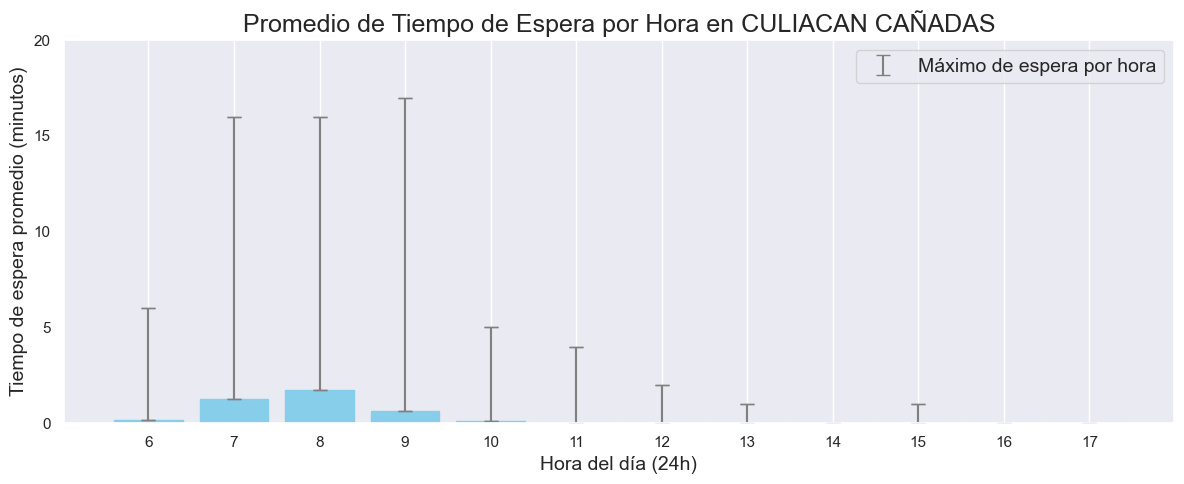

In [15]:
df_simulacion_atencion_ca["hora"] = df_simulacion_atencion_ca["hora_inicio"].dt.hour
agrupado = df_simulacion_atencion_ca.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en CULIACAN CAÑADAS", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_simulacion_atencion_ca["hora"].min(), df_simulacion_atencion_ca["hora"].max() + 1))            
plt.yticks(range(0, 21, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCULCAN.png', dpi=300)

In [16]:
len(df_simulacion_atencion_ca[df_simulacion_atencion_ca["espera_min"] > 30])

0

In [17]:
len(df_simulacion_atencion_ca[df_simulacion_atencion_ca["espera_min"] >= 20])

0

In [18]:
max(df_simulacion_atencion_ca['espera_min'])

17.0

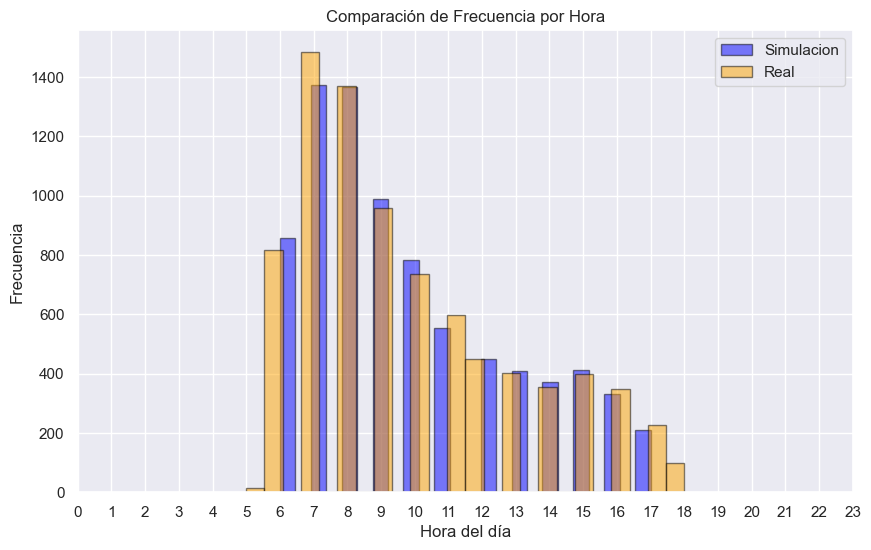

<Figure size 640x480 with 0 Axes>

In [19]:
df2 = df[df["Sucursal"]=="CULIACAN CAÑADAS"]
plt.figure(figsize=(10, 6))
plt.hist(df_simulacion_atencion_ca['hora'], bins=24, alpha=0.5, label='Simulacion', color='blue', edgecolor='black')
plt.hist(df2['HoraLLegada'], bins=24, alpha=0.5, label='Real', color='orange', edgecolor='black')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencia por Hora')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


plt.tight_layout()

plt.savefig("numpacientes.png", dpi=300)

### CULIACAN COLEGIO MILITAR

In [20]:
df_fechas = df[df["Sucursal"]=="CULIACAN COLEGIO MILITAR"]
df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)
fechas = df_fechas["FechaID"].apply(lambda x : x[:4]+"-"+x[4:6]+"-"+x[6:])
fechas=list(fechas.unique())

simulacion_llegadas = []
simulacion_atencion = []
for i in fechas:
    df_sim = simulacion_pacientes("CULIACAN COLEGIO MILITAR", df,i)
    df_te = simular_atencion(df_sim, cajas=4) 
    simulacion_llegadas.append(df_sim)
    simulacion_atencion.append(df_te)

df_simulacion_llegada_co = pd.concat(simulacion_llegadas, ignore_index=True)
df_simulacion_atencion_co = pd.concat(simulacion_atencion, ignore_index=True)
df_simulacion_atencion_co

C:\Users\jajp2\AppData\Local\Temp\ipykernel_18288\2101148650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)


06:03:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:10:00 | Caja 1 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:12:00 | Caja 2 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:14:00 | Caja 3 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:15:00 | Caja 1 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:26:00 | Caja 1 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:27:00 | Caja 2 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:29:00 | Caja 3 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:30:00 | Caja 4 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:32:00 | Caja 1 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:38:00 | Caja 1 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
06:39:00 | Caja 2 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:40:00 | Caja 3 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:45:00 | Caja 1 atiende ID 13 (Prioridad 0) - Espera: 0.0 min
06:46:00 | Caja 2 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
06:53:00 | Caja 1 atiende ID 15 (Prioridad 1) - Es

10:09:00 | Caja 3 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
10:15:00 | Caja 1 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
10:16:00 | Caja 2 atiende ID 152 (Prioridad 0) - Espera: 0.0 min
10:19:00 | Caja 1 atiende ID 153 (Prioridad 1) - Espera: 0.0 min
10:20:00 | Caja 2 atiende ID 154 (Prioridad 1) - Espera: 0.0 min
10:21:00 | Caja 3 atiende ID 155 (Prioridad 0) - Espera: 0.0 min
10:24:00 | Caja 3 atiende ID 156 (Prioridad 0) - Espera: 0.0 min
10:30:00 | Caja 1 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 1 atiende ID 158 (Prioridad 0) - Espera: 0.0 min
10:43:00 | Caja 1 atiende ID 159 (Prioridad 0) - Espera: 0.0 min
10:48:00 | Caja 1 atiende ID 160 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 1 atiende ID 161 (Prioridad 0) - Espera: 0.0 min
10:59:00 | Caja 2 atiende ID 162 (Prioridad 0) - Espera: 0.0 min
11:01:00 | Caja 3 atiende ID 163 (Prioridad 1) - Espera: 0.0 min
11:03:00 | Caja 1 atiende ID 164 (Prioridad 0) - Espera: 0.0 min
11:08:00 | Caja 1 atiende

17:52:00 | Caja 1 atiende ID 279 (Prioridad 0) - Espera: 0.0 min
17:55:00 | Caja 2 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
17:57:00 | Caja 1 atiende ID 281 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:01:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:01:00 | Caja 3 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:03:00 | Caja 3 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
06:06:00 | Caja 1 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 2 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:10:00 | Caja 1 atiende ID 6 (Prioridad 0) - Espera: 0.0 min
06:10:00 | Caja 3 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:14:00 | Caja 1 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:20:00 | Caja 1 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:28:00 | Caja 1 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:30:00 | Caja 2 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:39:00 | Caja 1 atiende ID 12 (Prioridad 0) -

09:42:00 | Caja 3 atiende ID 161 (Prioridad 0) - Espera: 1.0 min
09:43:00 | Caja 1 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
09:44:00 | Caja 4 atiende ID 163 (Prioridad 1) - Espera: 1.0 min
09:46:00 | Caja 1 atiende ID 164 (Prioridad 1) - Espera: 0.0 min
09:48:00 | Caja 2 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 3 atiende ID 166 (Prioridad 1) - Espera: 0.0 min
09:49:00 | Caja 4 atiende ID 167 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 1 atiende ID 168 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 2 atiende ID 169 (Prioridad 1) - Espera: 0.0 min
09:53:00 | Caja 1 atiende ID 170 (Prioridad 0) - Espera: 0.0 min
09:55:00 | Caja 1 atiende ID 171 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 1 atiende ID 172 (Prioridad 1) - Espera: 0.0 min
10:00:00 | Caja 2 atiende ID 173 (Prioridad 0) - Espera: 0.0 min
10:03:00 | Caja 1 atiende ID 174 (Prioridad 1) - Espera: 0.0 min
10:03:00 | Caja 2 atiende ID 175 (Prioridad 1) - Espera: 0.0 min
10:03:00 | Caja 3 atiende

16:29:00 | Caja 1 atiende ID 289 (Prioridad 0) - Espera: 0.0 min
16:29:00 | Caja 2 atiende ID 290 (Prioridad 0) - Espera: 0.0 min
16:30:00 | Caja 1 atiende ID 291 (Prioridad 1) - Espera: 0.0 min
16:42:00 | Caja 1 atiende ID 292 (Prioridad 1) - Espera: 0.0 min
16:47:00 | Caja 1 atiende ID 293 (Prioridad 1) - Espera: 0.0 min
16:56:00 | Caja 1 atiende ID 294 (Prioridad 1) - Espera: 0.0 min
16:58:00 | Caja 2 atiende ID 295 (Prioridad 0) - Espera: 0.0 min
17:03:00 | Caja 1 atiende ID 296 (Prioridad 1) - Espera: 0.0 min
17:13:00 | Caja 1 atiende ID 297 (Prioridad 1) - Espera: 0.0 min
17:18:00 | Caja 1 atiende ID 298 (Prioridad 0) - Espera: 0.0 min
17:47:00 | Caja 1 atiende ID 299 (Prioridad 1) - Espera: 0.0 min
17:52:00 | Caja 1 atiende ID 300 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:03:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 3 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 4 atiende ID 3 

09:10:00 | Caja 1 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
09:10:00 | Caja 2 atiende ID 137 (Prioridad 0) - Espera: 0.0 min
09:11:00 | Caja 2 atiende ID 139 (Prioridad 0) - Espera: 1.0 min
09:12:00 | Caja 1 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
09:14:00 | Caja 2 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
09:16:00 | Caja 1 atiende ID 142 (Prioridad 0) - Espera: 0.0 min
09:17:00 | Caja 3 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
09:18:00 | Caja 2 atiende ID 145 (Prioridad 1) - Espera: 0.0 min
09:18:00 | Caja 4 atiende ID 144 (Prioridad 0) - Espera: 0.0 min
09:22:00 | Caja 1 atiende ID 146 (Prioridad 0) - Espera: 0.0 min
09:24:00 | Caja 2 atiende ID 148 (Prioridad 1) - Espera: 0.0 min
09:24:00 | Caja 3 atiende ID 147 (Prioridad 0) - Espera: 0.0 min
09:25:00 | Caja 4 atiende ID 149 (Prioridad 0) - Espera: 0.0 min
09:28:00 | Caja 1 atiende ID 150 (Prioridad 0) - Espera: 0.0 min
09:30:00 | Caja 2 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 2 atiende

16:22:00 | Caja 1 atiende ID 272 (Prioridad 0) - Espera: 0.0 min
16:25:00 | Caja 2 atiende ID 273 (Prioridad 1) - Espera: 0.0 min
16:26:00 | Caja 1 atiende ID 274 (Prioridad 1) - Espera: 0.0 min
16:37:00 | Caja 1 atiende ID 275 (Prioridad 1) - Espera: 0.0 min
16:55:00 | Caja 1 atiende ID 276 (Prioridad 1) - Espera: 0.0 min
17:00:00 | Caja 1 atiende ID 277 (Prioridad 1) - Espera: 0.0 min
17:02:00 | Caja 1 atiende ID 278 (Prioridad 1) - Espera: 0.0 min
17:03:00 | Caja 2 atiende ID 279 (Prioridad 1) - Espera: 0.0 min
17:08:00 | Caja 1 atiende ID 280 (Prioridad 0) - Espera: 0.0 min
17:13:00 | Caja 1 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
17:16:00 | Caja 2 atiende ID 282 (Prioridad 0) - Espera: 0.0 min
17:31:00 | Caja 1 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
17:38:00 | Caja 1 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
17:58:00 | Caja 1 atiende ID 286 (Prioridad 1) - Espera: 0.0 min
17:58:00 | Caja 2 atiende ID 285 (Prioridad 0) - Espera: 0.0 min
06:00:00 | Caja 1 atiende

09:55:00 | Caja 1 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 1 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
09:57:00 | Caja 2 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
10:02:00 | Caja 1 atiende ID 152 (Prioridad 1) - Espera: 0.0 min
10:05:00 | Caja 1 atiende ID 153 (Prioridad 0) - Espera: 0.0 min
10:07:00 | Caja 2 atiende ID 154 (Prioridad 1) - Espera: 0.0 min
10:08:00 | Caja 3 atiende ID 155 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 1 atiende ID 156 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 2 atiende ID 157 (Prioridad 1) - Espera: 0.0 min
10:14:00 | Caja 1 atiende ID 158 (Prioridad 0) - Espera: 0.0 min
10:15:00 | Caja 1 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 2 atiende ID 160 (Prioridad 0) - Espera: 0.0 min
10:22:00 | Caja 1 atiende ID 161 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 2 atiende ID 162 (Prioridad 0) - Espera: 0.0 min
10:24:00 | Caja 3 atiende ID 163 (Prioridad 0) - Espera: 0.0 min
10:24:00 | Caja 4 atiende

07:36:00 | Caja 1 atiende ID 55 (Prioridad 0) - Espera: 0.0 min
07:37:00 | Caja 2 atiende ID 56 (Prioridad 1) - Espera: 0.0 min
07:38:00 | Caja 1 atiende ID 57 (Prioridad 0) - Espera: 0.0 min
07:39:00 | Caja 3 atiende ID 59 (Prioridad 1) - Espera: 0.0 min
07:39:00 | Caja 4 atiende ID 58 (Prioridad 0) - Espera: 0.0 min
07:40:00 | Caja 3 atiende ID 60 (Prioridad 0) - Espera: 0.0 min
07:42:00 | Caja 1 atiende ID 61 (Prioridad 1) - Espera: 0.0 min
07:43:00 | Caja 2 atiende ID 62 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 3 atiende ID 63 (Prioridad 1) - Espera: 0.0 min
07:45:00 | Caja 1 atiende ID 64 (Prioridad 1) - Espera: 0.0 min
07:47:00 | Caja 2 atiende ID 65 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 1 atiende ID 66 (Prioridad 0) - Espera: 0.0 min
07:50:00 | Caja 2 atiende ID 67 (Prioridad 0) - Espera: 0.0 min
07:53:00 | Caja 1 atiende ID 68 (Prioridad 1) - Espera: 0.0 min
07:54:00 | Caja 2 atiende ID 69 (Prioridad 0) - Espera: 0.0 min
07:54:00 | Caja 3 atiende ID 70 (Priorid

11:29:00 | Caja 1 atiende ID 194 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 1 atiende ID 195 (Prioridad 0) - Espera: 0.0 min
11:39:00 | Caja 1 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
11:41:00 | Caja 1 atiende ID 197 (Prioridad 0) - Espera: 0.0 min
11:42:00 | Caja 2 atiende ID 198 (Prioridad 1) - Espera: 0.0 min
11:42:00 | Caja 3 atiende ID 199 (Prioridad 0) - Espera: 0.0 min
11:43:00 | Caja 4 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
11:44:00 | Caja 3 atiende ID 201 (Prioridad 1) - Espera: 1.0 min
11:45:00 | Caja 1 atiende ID 202 (Prioridad 1) - Espera: 0.0 min
11:46:00 | Caja 2 atiende ID 203 (Prioridad 1) - Espera: 0.0 min
11:47:00 | Caja 2 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
11:50:00 | Caja 1 atiende ID 205 (Prioridad 1) - Espera: 0.0 min
11:51:00 | Caja 2 atiende ID 207 (Prioridad 1) - Espera: 0.0 min
11:51:00 | Caja 3 atiende ID 206 (Prioridad 0) - Espera: 0.0 min
11:59:00 | Caja 1 atiende ID 208 (Prioridad 1) - Espera: 0.0 min
12:10:00 | Caja 1 atiende

08:08:00 | Caja 1 atiende ID 82 (Prioridad 1) - Espera: 3.0 min
08:08:00 | Caja 4 atiende ID 80 (Prioridad 0) - Espera: 3.0 min
08:09:00 | Caja 4 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
08:11:00 | Caja 2 atiende ID 84 (Prioridad 0) - Espera: 2.0 min
08:13:00 | Caja 4 atiende ID 85 (Prioridad 1) - Espera: 1.0 min
08:14:00 | Caja 1 atiende ID 86 (Prioridad 1) - Espera: 2.0 min
08:16:00 | Caja 2 atiende ID 87 (Prioridad 1) - Espera: 3.0 min
08:16:00 | Caja 3 atiende ID 88 (Prioridad 1) - Espera: 1.0 min
08:17:00 | Caja 4 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 1 atiende ID 89 (Prioridad 0) - Espera: 3.0 min
08:20:00 | Caja 2 atiende ID 90 (Prioridad 0) - Espera: 5.0 min
08:22:00 | Caja 1 atiende ID 91 (Prioridad 0) - Espera: 7.0 min
08:23:00 | Caja 4 atiende ID 96 (Prioridad 1) - Espera: 1.0 min
08:24:00 | Caja 1 atiende ID 93 (Prioridad 0) - Espera: 6.0 min
08:26:00 | Caja 2 atiende ID 97 (Prioridad 1) - Espera: 3.0 min
08:26:00 | Caja 4 atiende ID 94 (Priorid

12:04:00 | Caja 1 atiende ID 211 (Prioridad 1) - Espera: 0.0 min
12:05:00 | Caja 2 atiende ID 212 (Prioridad 1) - Espera: 0.0 min
12:08:00 | Caja 2 atiende ID 213 (Prioridad 1) - Espera: 0.0 min
12:08:00 | Caja 3 atiende ID 214 (Prioridad 0) - Espera: 0.0 min
12:15:00 | Caja 1 atiende ID 216 (Prioridad 1) - Espera: 0.0 min
12:15:00 | Caja 2 atiende ID 215 (Prioridad 0) - Espera: 0.0 min
12:42:00 | Caja 1 atiende ID 217 (Prioridad 0) - Espera: 0.0 min
12:43:00 | Caja 2 atiende ID 218 (Prioridad 1) - Espera: 0.0 min
12:47:00 | Caja 1 atiende ID 219 (Prioridad 1) - Espera: 0.0 min
12:54:00 | Caja 1 atiende ID 220 (Prioridad 1) - Espera: 0.0 min
12:55:00 | Caja 2 atiende ID 221 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 3 atiende ID 222 (Prioridad 1) - Espera: 0.0 min
12:57:00 | Caja 4 atiende ID 223 (Prioridad 1) - Espera: 0.0 min
13:03:00 | Caja 1 atiende ID 224 (Prioridad 1) - Espera: 0.0 min
13:06:00 | Caja 2 atiende ID 225 (Prioridad 0) - Espera: 0.0 min
13:12:00 | Caja 1 atiende

07:41:00 | Caja 1 atiende ID 58 (Prioridad 1) - Espera: 0.0 min
07:43:00 | Caja 2 atiende ID 55 (Prioridad 0) - Espera: 5.0 min
07:43:00 | Caja 3 atiende ID 59 (Prioridad 1) - Espera: 0.0 min
07:44:00 | Caja 4 atiende ID 60 (Prioridad 1) - Espera: 0.0 min
07:45:00 | Caja 1 atiende ID 62 (Prioridad 1) - Espera: 0.0 min
07:45:00 | Caja 2 atiende ID 61 (Prioridad 0) - Espera: 1.0 min
07:47:00 | Caja 3 atiende ID 63 (Prioridad 1) - Espera: 1.0 min
07:48:00 | Caja 2 atiende ID 64 (Prioridad 1) - Espera: 1.0 min
07:49:00 | Caja 4 atiende ID 65 (Prioridad 0) - Espera: 1.0 min
07:51:00 | Caja 1 atiende ID 66 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 2 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 1 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
07:53:00 | Caja 3 atiende ID 68 (Prioridad 0) - Espera: 0.0 min
07:54:00 | Caja 4 atiende ID 70 (Prioridad 0) - Espera: 0.0 min
07:57:00 | Caja 1 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
07:57:00 | Caja 2 atiende ID 72 (Priorid

11:06:00 | Caja 3 atiende ID 198 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 1 atiende ID 199 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 2 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
11:14:00 | Caja 2 atiende ID 201 (Prioridad 0) - Espera: 0.0 min
11:20:00 | Caja 1 atiende ID 202 (Prioridad 0) - Espera: 0.0 min
11:21:00 | Caja 2 atiende ID 203 (Prioridad 0) - Espera: 0.0 min
11:23:00 | Caja 1 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
11:26:00 | Caja 2 atiende ID 205 (Prioridad 0) - Espera: 0.0 min
11:27:00 | Caja 1 atiende ID 206 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 3 atiende ID 207 (Prioridad 1) - Espera: 0.0 min
11:34:00 | Caja 1 atiende ID 208 (Prioridad 1) - Espera: 0.0 min
11:37:00 | Caja 2 atiende ID 209 (Prioridad 0) - Espera: 0.0 min
11:40:00 | Caja 1 atiende ID 210 (Prioridad 0) - Espera: 0.0 min
11:40:00 | Caja 2 atiende ID 211 (Prioridad 0) - Espera: 0.0 min
11:43:00 | Caja 3 atiende ID 212 (Prioridad 1) - Espera: 0.0 min
11:50:00 | Caja 1 atiende

08:11:00 | Caja 2 atiende ID 84 (Prioridad 0) - Espera: 4.0 min
08:11:00 | Caja 4 atiende ID 86 (Prioridad 0) - Espera: 2.0 min
08:12:00 | Caja 1 atiende ID 90 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 2 atiende ID 91 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 3 atiende ID 87 (Prioridad 0) - Espera: 3.0 min
08:16:00 | Caja 3 atiende ID 92 (Prioridad 1) - Espera: 2.0 min
08:17:00 | Caja 1 atiende ID 93 (Prioridad 1) - Espera: 3.0 min
08:17:00 | Caja 2 atiende ID 94 (Prioridad 1) - Espera: 2.0 min
08:18:00 | Caja 4 atiende ID 95 (Prioridad 1) - Espera: 3.0 min
08:20:00 | Caja 1 atiende ID 88 (Prioridad 0) - Espera: 9.0 min
08:20:00 | Caja 2 atiende ID 89 (Prioridad 0) - Espera: 8.0 min
08:20:00 | Caja 3 atiende ID 96 (Prioridad 0) - Espera: 4.0 min
08:21:00 | Caja 1 atiende ID 97 (Prioridad 0) - Espera: 5.0 min
08:21:00 | Caja 4 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
08:22:00 | Caja 2 atiende ID 98 (Prioridad 0) - Espera: 5.0 min
08:24:00 | Caja 4 atiende ID 99 (Priori

11:53:00 | Caja 1 atiende ID 229 (Prioridad 0) - Espera: 0.0 min
11:57:00 | Caja 1 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
11:57:00 | Caja 2 atiende ID 230 (Prioridad 0) - Espera: 0.0 min
12:01:00 | Caja 1 atiende ID 232 (Prioridad 0) - Espera: 0.0 min
12:02:00 | Caja 3 atiende ID 233 (Prioridad 0) - Espera: 0.0 min
12:06:00 | Caja 1 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
12:11:00 | Caja 1 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
12:15:00 | Caja 1 atiende ID 236 (Prioridad 0) - Espera: 0.0 min
12:30:00 | Caja 1 atiende ID 237 (Prioridad 0) - Espera: 0.0 min
12:50:00 | Caja 1 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
12:51:00 | Caja 2 atiende ID 239 (Prioridad 0) - Espera: 0.0 min
12:57:00 | Caja 1 atiende ID 240 (Prioridad 0) - Espera: 0.0 min
13:07:00 | Caja 1 atiende ID 241 (Prioridad 1) - Espera: 0.0 min
13:08:00 | Caja 2 atiende ID 242 (Prioridad 0) - Espera: 0.0 min
13:18:00 | Caja 1 atiende ID 243 (Prioridad 0) - Espera: 0.0 min
13:23:00 | Caja 1 atiende

08:08:00 | Caja 1 atiende ID 87 (Prioridad 1) - Espera: 0.0 min
08:08:00 | Caja 3 atiende ID 88 (Prioridad 1) - Espera: 0.0 min
08:08:00 | Caja 4 atiende ID 89 (Prioridad 0) - Espera: 0.0 min
08:10:00 | Caja 1 atiende ID 90 (Prioridad 1) - Espera: 0.0 min
08:12:00 | Caja 2 atiende ID 91 (Prioridad 0) - Espera: 0.0 min
08:13:00 | Caja 3 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 1 atiende ID 93 (Prioridad 0) - Espera: 0.0 min
08:21:00 | Caja 1 atiende ID 94 (Prioridad 0) - Espera: 0.0 min
08:22:00 | Caja 2 atiende ID 95 (Prioridad 1) - Espera: 0.0 min
08:25:00 | Caja 1 atiende ID 96 (Prioridad 0) - Espera: 0.0 min
08:26:00 | Caja 3 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
08:26:00 | Caja 4 atiende ID 98 (Prioridad 1) - Espera: 0.0 min
08:28:00 | Caja 1 atiende ID 99 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 2 atiende ID 100 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 3 atiende ID 101 (Prioridad 0) - Espera: 0.0 min
08:32:00 | Caja 4 atiende ID 102 (Prio

12:13:00 | Caja 1 atiende ID 224 (Prioridad 0) - Espera: 0.0 min
12:16:00 | Caja 2 atiende ID 225 (Prioridad 0) - Espera: 0.0 min
12:24:00 | Caja 1 atiende ID 226 (Prioridad 1) - Espera: 0.0 min
12:24:00 | Caja 2 atiende ID 227 (Prioridad 1) - Espera: 0.0 min
12:30:00 | Caja 1 atiende ID 228 (Prioridad 0) - Espera: 0.0 min
12:35:00 | Caja 2 atiende ID 229 (Prioridad 0) - Espera: 0.0 min
12:38:00 | Caja 1 atiende ID 230 (Prioridad 1) - Espera: 0.0 min
12:42:00 | Caja 1 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
12:42:00 | Caja 2 atiende ID 232 (Prioridad 1) - Espera: 0.0 min
12:45:00 | Caja 2 atiende ID 233 (Prioridad 0) - Espera: 0.0 min
12:50:00 | Caja 1 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
13:00:00 | Caja 1 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
13:02:00 | Caja 2 atiende ID 236 (Prioridad 0) - Espera: 0.0 min
13:05:00 | Caja 1 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
13:07:00 | Caja 2 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
13:11:00 | Caja 1 atiende

07:49:00 | Caja 2 atiende ID 65 (Prioridad 0) - Espera: 6.0 min
07:51:00 | Caja 4 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
07:52:00 | Caja 1 atiende ID 68 (Prioridad 0) - Espera: 5.0 min
07:52:00 | Caja 3 atiende ID 69 (Prioridad 0) - Espera: 4.0 min
07:53:00 | Caja 4 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
07:55:00 | Caja 2 atiende ID 72 (Prioridad 1) - Espera: 2.0 min
07:55:00 | Caja 4 atiende ID 73 (Prioridad 1) - Espera: 1.0 min
07:58:00 | Caja 1 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
07:59:00 | Caja 1 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
08:00:00 | Caja 1 atiende ID 76 (Prioridad 1) - Espera: 0.0 min
08:01:00 | Caja 2 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
08:03:00 | Caja 3 atiende ID 78 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 1 atiende ID 80 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 2 atiende ID 79 (Prioridad 0) - Espera: 0.0 min
08:07:00 | Caja 2 atiende ID 81 (Prioridad 0) - Espera: 0.0 min
08:07:00 | Caja 3 atiende ID 82 (Priorid

11:41:00 | Caja 1 atiende ID 205 (Prioridad 0) - Espera: 0.0 min
11:49:00 | Caja 1 atiende ID 206 (Prioridad 0) - Espera: 0.0 min
11:51:00 | Caja 2 atiende ID 207 (Prioridad 1) - Espera: 0.0 min
11:51:00 | Caja 3 atiende ID 208 (Prioridad 1) - Espera: 0.0 min
11:52:00 | Caja 4 atiende ID 209 (Prioridad 1) - Espera: 0.0 min
11:54:00 | Caja 1 atiende ID 210 (Prioridad 0) - Espera: 0.0 min
11:59:00 | Caja 1 atiende ID 211 (Prioridad 1) - Espera: 0.0 min
12:00:00 | Caja 2 atiende ID 212 (Prioridad 1) - Espera: 0.0 min
12:01:00 | Caja 3 atiende ID 213 (Prioridad 1) - Espera: 0.0 min
12:02:00 | Caja 4 atiende ID 214 (Prioridad 1) - Espera: 0.0 min
12:11:00 | Caja 1 atiende ID 215 (Prioridad 1) - Espera: 0.0 min
12:20:00 | Caja 1 atiende ID 216 (Prioridad 1) - Espera: 0.0 min
12:22:00 | Caja 2 atiende ID 217 (Prioridad 0) - Espera: 0.0 min
12:28:00 | Caja 1 atiende ID 218 (Prioridad 1) - Espera: 0.0 min
12:31:00 | Caja 2 atiende ID 219 (Prioridad 1) - Espera: 0.0 min
12:34:00 | Caja 1 atiende

08:27:00 | Caja 4 atiende ID 88 (Prioridad 1) - Espera: 0.0 min
08:28:00 | Caja 2 atiende ID 89 (Prioridad 0) - Espera: 1.0 min
08:30:00 | Caja 1 atiende ID 90 (Prioridad 0) - Espera: 0.0 min
08:31:00 | Caja 2 atiende ID 91 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 1 atiende ID 92 (Prioridad 0) - Espera: 0.0 min
08:36:00 | Caja 2 atiende ID 93 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 1 atiende ID 94 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 3 atiende ID 95 (Prioridad 0) - Espera: 0.0 min
08:40:00 | Caja 1 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 4 atiende ID 96 (Prioridad 0) - Espera: 0.0 min
08:45:00 | Caja 1 atiende ID 98 (Prioridad 0) - Espera: 0.0 min
08:49:00 | Caja 1 atiende ID 99 (Prioridad 1) - Espera: 0.0 min
08:49:00 | Caja 2 atiende ID 100 (Prioridad 0) - Espera: 0.0 min
08:50:00 | Caja 3 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 4 atiende ID 102 (Prioridad 1) - Espera: 0.0 min
08:53:00 | Caja 2 atiende ID 103 (Pri

15:08:00 | Caja 1 atiende ID 217 (Prioridad 0) - Espera: 0.0 min
15:10:00 | Caja 2 atiende ID 218 (Prioridad 0) - Espera: 0.0 min
15:11:00 | Caja 2 atiende ID 219 (Prioridad 1) - Espera: 0.0 min
15:13:00 | Caja 1 atiende ID 220 (Prioridad 1) - Espera: 0.0 min
15:14:00 | Caja 3 atiende ID 221 (Prioridad 0) - Espera: 0.0 min
15:25:00 | Caja 1 atiende ID 222 (Prioridad 1) - Espera: 0.0 min
15:26:00 | Caja 2 atiende ID 223 (Prioridad 0) - Espera: 0.0 min
15:30:00 | Caja 3 atiende ID 224 (Prioridad 1) - Espera: 0.0 min
15:38:00 | Caja 1 atiende ID 225 (Prioridad 0) - Espera: 0.0 min
15:49:00 | Caja 1 atiende ID 226 (Prioridad 0) - Espera: 0.0 min
15:50:00 | Caja 2 atiende ID 227 (Prioridad 1) - Espera: 0.0 min
15:54:00 | Caja 1 atiende ID 228 (Prioridad 0) - Espera: 0.0 min
15:54:00 | Caja 3 atiende ID 229 (Prioridad 0) - Espera: 0.0 min
15:56:00 | Caja 2 atiende ID 230 (Prioridad 1) - Espera: 0.0 min
16:04:00 | Caja 1 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
16:23:00 | Caja 1 atiende

09:55:00 | Caja 1 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 1 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
09:56:00 | Caja 2 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
09:58:00 | Caja 1 atiende ID 141 (Prioridad 0) - Espera: 0.0 min
10:00:00 | Caja 1 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
10:02:00 | Caja 2 atiende ID 143 (Prioridad 0) - Espera: 0.0 min
10:03:00 | Caja 1 atiende ID 144 (Prioridad 0) - Espera: 0.0 min
10:04:00 | Caja 3 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
10:04:00 | Caja 4 atiende ID 146 (Prioridad 0) - Espera: 0.0 min
10:05:00 | Caja 1 atiende ID 147 (Prioridad 0) - Espera: 1.0 min
10:07:00 | Caja 2 atiende ID 148 (Prioridad 1) - Espera: 1.0 min
10:08:00 | Caja 4 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
10:09:00 | Caja 3 atiende ID 150 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 1 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
10:16:00 | Caja 1 atiende ID 152 (Prioridad 1) - Espera: 0.0 min
10:16:00 | Caja 2 atiende

17:38:00 | Caja 1 atiende ID 271 (Prioridad 1) - Espera: 0.0 min
17:50:00 | Caja 1 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
17:53:00 | Caja 1 atiende ID 273 (Prioridad 0) - Espera: 0.0 min
06:02:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:10:00 | Caja 1 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:11:00 | Caja 2 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 1 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:20:00 | Caja 2 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:23:00 | Caja 1 atiende ID 6 (Prioridad 0) - Espera: 0.0 min
06:28:00 | Caja 1 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:35:00 | Caja 1 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:35:00 | Caja 2 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:37:00 | Caja 3 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:37:00 | Caja 4 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
06:39:00 | Caja 1 atiende ID 12 (Prioridad 1) -

09:44:00 | Caja 1 atiende ID 165 (Prioridad 0) - Espera: 0.0 min
09:45:00 | Caja 2 atiende ID 166 (Prioridad 0) - Espera: 0.0 min
09:46:00 | Caja 3 atiende ID 168 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 1 atiende ID 167 (Prioridad 0) - Espera: 2.0 min
09:48:00 | Caja 4 atiende ID 169 (Prioridad 1) - Espera: 0.0 min
09:50:00 | Caja 3 atiende ID 170 (Prioridad 1) - Espera: 1.0 min
09:51:00 | Caja 1 atiende ID 171 (Prioridad 1) - Espera: 2.0 min
09:52:00 | Caja 4 atiende ID 172 (Prioridad 1) - Espera: 1.0 min
09:53:00 | Caja 1 atiende ID 173 (Prioridad 1) - Espera: 1.0 min
09:54:00 | Caja 2 atiende ID 174 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 1 atiende ID 175 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 4 atiende ID 176 (Prioridad 1) - Espera: 0.0 min
10:02:00 | Caja 1 atiende ID 177 (Prioridad 1) - Espera: 0.0 min
10:03:00 | Caja 2 atiende ID 178 (Prioridad 1) - Espera: 0.0 min
10:04:00 | Caja 3 atiende ID 180 (Prioridad 1) - Espera: 0.0 min
10:04:00 | Caja 4 atiende

08:12:00 | Caja 1 atiende ID 60 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 1 atiende ID 61 (Prioridad 0) - Espera: 0.0 min
08:14:00 | Caja 2 atiende ID 62 (Prioridad 0) - Espera: 0.0 min
08:16:00 | Caja 3 atiende ID 63 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 1 atiende ID 64 (Prioridad 1) - Espera: 0.0 min
08:25:00 | Caja 1 atiende ID 65 (Prioridad 1) - Espera: 0.0 min
08:26:00 | Caja 2 atiende ID 66 (Prioridad 0) - Espera: 0.0 min
08:27:00 | Caja 3 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
08:28:00 | Caja 1 atiende ID 68 (Prioridad 1) - Espera: 0.0 min
08:28:00 | Caja 2 atiende ID 69 (Prioridad 0) - Espera: 0.0 min
08:30:00 | Caja 1 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 2 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 3 atiende ID 72 (Prioridad 0) - Espera: 0.0 min
08:38:00 | Caja 1 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 2 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 2 atiende ID 75 (Priorid

14:49:00 | Caja 1 atiende ID 198 (Prioridad 0) - Espera: 0.0 min
14:53:00 | Caja 2 atiende ID 199 (Prioridad 1) - Espera: 0.0 min
15:01:00 | Caja 1 atiende ID 200 (Prioridad 0) - Espera: 0.0 min
15:02:00 | Caja 2 atiende ID 201 (Prioridad 0) - Espera: 0.0 min
15:14:00 | Caja 1 atiende ID 202 (Prioridad 0) - Espera: 0.0 min
15:23:00 | Caja 1 atiende ID 203 (Prioridad 1) - Espera: 0.0 min
15:29:00 | Caja 1 atiende ID 204 (Prioridad 0) - Espera: 0.0 min
15:29:00 | Caja 2 atiende ID 205 (Prioridad 0) - Espera: 0.0 min
15:30:00 | Caja 2 atiende ID 206 (Prioridad 1) - Espera: 0.0 min
15:31:00 | Caja 3 atiende ID 207 (Prioridad 1) - Espera: 0.0 min
15:31:00 | Caja 4 atiende ID 208 (Prioridad 1) - Espera: 0.0 min
15:36:00 | Caja 1 atiende ID 209 (Prioridad 0) - Espera: 0.0 min
15:38:00 | Caja 2 atiende ID 210 (Prioridad 0) - Espera: 0.0 min
15:48:00 | Caja 1 atiende ID 211 (Prioridad 1) - Espera: 0.0 min
16:03:00 | Caja 1 atiende ID 212 (Prioridad 1) - Espera: 0.0 min
16:22:00 | Caja 1 atiende

09:02:00 | Caja 1 atiende ID 141 (Prioridad 1) - Espera: 10.0 min
09:03:00 | Caja 1 atiende ID 135 (Prioridad 0) - Espera: 15.0 min
09:03:00 | Caja 2 atiende ID 137 (Prioridad 0) - Espera: 13.0 min
09:04:00 | Caja 3 atiende ID 139 (Prioridad 0) - Espera: 12.0 min
09:05:00 | Caja 2 atiende ID 143 (Prioridad 1) - Espera: 8.0 min
09:06:00 | Caja 4 atiende ID 142 (Prioridad 0) - Espera: 13.0 min
09:07:00 | Caja 1 atiende ID 144 (Prioridad 1) - Espera: 7.0 min
09:07:00 | Caja 3 atiende ID 145 (Prioridad 1) - Espera: 6.0 min
09:08:00 | Caja 2 atiende ID 146 (Prioridad 0) - Espera: 2.0 min
09:09:00 | Caja 3 atiende ID 147 (Prioridad 0) - Espera: 3.0 min
09:09:00 | Caja 4 atiende ID 148 (Prioridad 0) - Espera: 1.0 min
09:11:00 | Caja 4 atiende ID 152 (Prioridad 1) - Espera: 0.0 min
09:12:00 | Caja 1 atiende ID 153 (Prioridad 1) - Espera: 1.0 min
09:12:00 | Caja 2 atiende ID 154 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 2 atiende ID 149 (Prioridad 0) - Espera: 4.0 min
09:13:00 | Caja 3 at

14:36:00 | Caja 1 atiende ID 271 (Prioridad 1) - Espera: 0.0 min
14:44:00 | Caja 1 atiende ID 272 (Prioridad 1) - Espera: 0.0 min
14:51:00 | Caja 1 atiende ID 273 (Prioridad 1) - Espera: 0.0 min
14:55:00 | Caja 1 atiende ID 274 (Prioridad 1) - Espera: 0.0 min
14:57:00 | Caja 1 atiende ID 275 (Prioridad 1) - Espera: 0.0 min
15:00:00 | Caja 1 atiende ID 276 (Prioridad 0) - Espera: 0.0 min
15:06:00 | Caja 1 atiende ID 277 (Prioridad 1) - Espera: 0.0 min
15:13:00 | Caja 1 atiende ID 278 (Prioridad 0) - Espera: 0.0 min
15:17:00 | Caja 1 atiende ID 279 (Prioridad 0) - Espera: 0.0 min
15:25:00 | Caja 1 atiende ID 280 (Prioridad 1) - Espera: 0.0 min
15:27:00 | Caja 2 atiende ID 281 (Prioridad 1) - Espera: 0.0 min
15:35:00 | Caja 1 atiende ID 282 (Prioridad 0) - Espera: 0.0 min
15:44:00 | Caja 1 atiende ID 283 (Prioridad 1) - Espera: 0.0 min
15:46:00 | Caja 2 atiende ID 284 (Prioridad 1) - Espera: 0.0 min
15:51:00 | Caja 1 atiende ID 285 (Prioridad 1) - Espera: 0.0 min
15:54:00 | Caja 1 atiende

08:33:00 | Caja 4 atiende ID 94 (Prioridad 1) - Espera: 3.0 min
08:34:00 | Caja 2 atiende ID 95 (Prioridad 1) - Espera: 3.0 min
08:35:00 | Caja 3 atiende ID 90 (Prioridad 0) - Espera: 8.0 min
08:37:00 | Caja 2 atiende ID 97 (Prioridad 1) - Espera: 2.0 min
08:37:00 | Caja 4 atiende ID 99 (Prioridad 1) - Espera: 2.0 min
08:38:00 | Caja 4 atiende ID 101 (Prioridad 1) - Espera: 2.0 min
08:39:00 | Caja 4 atiende ID 102 (Prioridad 1) - Espera: 1.0 min
08:40:00 | Caja 1 atiende ID 96 (Prioridad 0) - Espera: 6.0 min
08:40:00 | Caja 3 atiende ID 104 (Prioridad 1) - Espera: 1.0 min
08:40:00 | Caja 4 atiende ID 98 (Prioridad 0) - Espera: 5.0 min
08:43:00 | Caja 2 atiende ID 100 (Prioridad 0) - Espera: 8.0 min
08:44:00 | Caja 1 atiende ID 105 (Prioridad 1) - Espera: 4.0 min
08:45:00 | Caja 3 atiende ID 107 (Prioridad 1) - Espera: 3.0 min
08:46:00 | Caja 3 atiende ID 103 (Prioridad 0) - Espera: 8.0 min
08:46:00 | Caja 4 atiende ID 108 (Prioridad 1) - Espera: 3.0 min
08:47:00 | Caja 2 atiende ID 109

12:56:00 | Caja 1 atiende ID 223 (Prioridad 1) - Espera: 0.0 min
13:01:00 | Caja 1 atiende ID 224 (Prioridad 1) - Espera: 0.0 min
13:02:00 | Caja 2 atiende ID 225 (Prioridad 1) - Espera: 0.0 min
13:06:00 | Caja 1 atiende ID 226 (Prioridad 1) - Espera: 0.0 min
13:06:00 | Caja 2 atiende ID 227 (Prioridad 0) - Espera: 0.0 min
13:11:00 | Caja 2 atiende ID 228 (Prioridad 0) - Espera: 0.0 min
13:15:00 | Caja 1 atiende ID 229 (Prioridad 1) - Espera: 0.0 min
13:24:00 | Caja 1 atiende ID 230 (Prioridad 1) - Espera: 0.0 min
13:34:00 | Caja 1 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
13:35:00 | Caja 2 atiende ID 232 (Prioridad 1) - Espera: 0.0 min
13:37:00 | Caja 3 atiende ID 233 (Prioridad 0) - Espera: 0.0 min
13:39:00 | Caja 1 atiende ID 234 (Prioridad 1) - Espera: 0.0 min
13:46:00 | Caja 1 atiende ID 235 (Prioridad 1) - Espera: 0.0 min
13:53:00 | Caja 1 atiende ID 236 (Prioridad 0) - Espera: 0.0 min
14:00:00 | Caja 1 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
14:06:00 | Caja 1 atiende

08:07:00 | Caja 2 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
08:09:00 | Caja 3 atiende ID 81 (Prioridad 1) - Espera: 0.0 min
08:09:00 | Caja 4 atiende ID 80 (Prioridad 0) - Espera: 0.0 min
08:10:00 | Caja 1 atiende ID 82 (Prioridad 0) - Espera: 0.0 min
08:11:00 | Caja 2 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
08:11:00 | Caja 3 atiende ID 84 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 4 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 1 atiende ID 86 (Prioridad 0) - Espera: 1.0 min
08:14:00 | Caja 2 atiende ID 87 (Prioridad 0) - Espera: 0.0 min
08:17:00 | Caja 1 atiende ID 88 (Prioridad 0) - Espera: 2.0 min
08:17:00 | Caja 3 atiende ID 89 (Prioridad 0) - Espera: 1.0 min
08:18:00 | Caja 2 atiende ID 93 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 3 atiende ID 94 (Prioridad 1) - Espera: 1.0 min
08:20:00 | Caja 4 atiende ID 95 (Prioridad 1) - Espera: 1.0 min
08:21:00 | Caja 1 atiende ID 90 (Prioridad 0) - Espera: 5.0 min
08:21:00 | Caja 2 atiende ID 91 (Priorid

11:32:00 | Caja 1 atiende ID 212 (Prioridad 0) - Espera: 0.0 min
11:34:00 | Caja 2 atiende ID 213 (Prioridad 0) - Espera: 0.0 min
11:35:00 | Caja 1 atiende ID 214 (Prioridad 0) - Espera: 0.0 min
11:35:00 | Caja 3 atiende ID 215 (Prioridad 0) - Espera: 0.0 min
11:37:00 | Caja 2 atiende ID 216 (Prioridad 1) - Espera: 0.0 min
11:45:00 | Caja 1 atiende ID 217 (Prioridad 0) - Espera: 0.0 min
11:52:00 | Caja 1 atiende ID 218 (Prioridad 1) - Espera: 0.0 min
11:52:00 | Caja 2 atiende ID 219 (Prioridad 1) - Espera: 0.0 min
11:53:00 | Caja 2 atiende ID 220 (Prioridad 1) - Espera: 0.0 min
12:00:00 | Caja 1 atiende ID 221 (Prioridad 1) - Espera: 0.0 min
12:00:00 | Caja 2 atiende ID 222 (Prioridad 0) - Espera: 0.0 min
12:09:00 | Caja 1 atiende ID 223 (Prioridad 0) - Espera: 0.0 min
12:13:00 | Caja 1 atiende ID 224 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 1 atiende ID 225 (Prioridad 1) - Espera: 0.0 min
12:14:00 | Caja 2 atiende ID 226 (Prioridad 0) - Espera: 0.0 min
12:15:00 | Caja 3 atiende

07:33:00 | Caja 1 atiende ID 50 (Prioridad 1) - Espera: 0.0 min
07:33:00 | Caja 3 atiende ID 51 (Prioridad 0) - Espera: 0.0 min
07:34:00 | Caja 4 atiende ID 52 (Prioridad 0) - Espera: 0.0 min
07:36:00 | Caja 2 atiende ID 53 (Prioridad 1) - Espera: 0.0 min
07:39:00 | Caja 1 atiende ID 54 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 2 atiende ID 55 (Prioridad 1) - Espera: 0.0 min
07:40:00 | Caja 4 atiende ID 56 (Prioridad 1) - Espera: 0.0 min
07:41:00 | Caja 2 atiende ID 57 (Prioridad 1) - Espera: 1.0 min
07:42:00 | Caja 1 atiende ID 59 (Prioridad 1) - Espera: 0.0 min
07:42:00 | Caja 3 atiende ID 58 (Prioridad 0) - Espera: 0.0 min
07:45:00 | Caja 1 atiende ID 60 (Prioridad 0) - Espera: 0.0 min
07:47:00 | Caja 1 atiende ID 61 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 2 atiende ID 62 (Prioridad 0) - Espera: 0.0 min
07:53:00 | Caja 1 atiende ID 63 (Prioridad 1) - Espera: 0.0 min
07:54:00 | Caja 2 atiende ID 64 (Prioridad 0) - Espera: 0.0 min
07:57:00 | Caja 2 atiende ID 65 (Priorid

10:44:00 | Caja 2 atiende ID 187 (Prioridad 1) - Espera: 0.0 min
10:47:00 | Caja 1 atiende ID 188 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 1 atiende ID 189 (Prioridad 0) - Espera: 0.0 min
10:52:00 | Caja 2 atiende ID 190 (Prioridad 0) - Espera: 0.0 min
10:56:00 | Caja 1 atiende ID 192 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 3 atiende ID 191 (Prioridad 0) - Espera: 0.0 min
10:58:00 | Caja 2 atiende ID 193 (Prioridad 0) - Espera: 0.0 min
10:58:00 | Caja 4 atiende ID 194 (Prioridad 0) - Espera: 0.0 min
11:00:00 | Caja 3 atiende ID 195 (Prioridad 1) - Espera: 1.0 min
11:01:00 | Caja 1 atiende ID 196 (Prioridad 0) - Espera: 1.0 min
11:11:00 | Caja 1 atiende ID 197 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 2 atiende ID 198 (Prioridad 0) - Espera: 0.0 min
11:16:00 | Caja 1 atiende ID 199 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 2 atiende ID 200 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 3 atiende ID 201 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 1 atiende

08:28:00 | Caja 1 atiende ID 98 (Prioridad 0) - Espera: 3.0 min
08:28:00 | Caja 4 atiende ID 102 (Prioridad 0) - Espera: 0.0 min
08:29:00 | Caja 3 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
08:32:00 | Caja 1 atiende ID 105 (Prioridad 1) - Espera: 0.0 min
08:32:00 | Caja 2 atiende ID 104 (Prioridad 0) - Espera: 0.0 min
08:33:00 | Caja 4 atiende ID 107 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 3 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 4 atiende ID 106 (Prioridad 0) - Espera: 1.0 min
08:35:00 | Caja 2 atiende ID 108 (Prioridad 0) - Espera: 1.0 min
08:35:00 | Caja 4 atiende ID 110 (Prioridad 0) - Espera: 1.0 min
08:38:00 | Caja 1 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 2 atiende ID 112 (Prioridad 0) - Espera: 0.0 min
08:43:00 | Caja 1 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 3 atiende ID 113 (Prioridad 0) - Espera: 0.0 min
08:44:00 | Caja 4 atiende ID 115 (Prioridad 0) - Espera: 0.0 min
08:46:00 | Caja 1 atiende 

13:28:00 | Caja 1 atiende ID 236 (Prioridad 1) - Espera: 0.0 min
13:28:00 | Caja 2 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
13:31:00 | Caja 3 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
13:31:00 | Caja 4 atiende ID 238 (Prioridad 0) - Espera: 0.0 min
13:40:00 | Caja 1 atiende ID 240 (Prioridad 0) - Espera: 0.0 min
13:42:00 | Caja 2 atiende ID 241 (Prioridad 0) - Espera: 0.0 min
13:45:00 | Caja 1 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
13:49:00 | Caja 1 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
13:55:00 | Caja 2 atiende ID 244 (Prioridad 0) - Espera: 0.0 min
13:56:00 | Caja 1 atiende ID 245 (Prioridad 0) - Espera: 0.0 min
14:03:00 | Caja 1 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
14:06:00 | Caja 1 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
14:08:00 | Caja 2 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
14:12:00 | Caja 1 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
14:13:00 | Caja 2 atiende ID 250 (Prioridad 0) - Espera: 0.0 min
14:23:00 | Caja 1 atiende

08:42:00 | Caja 1 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 2 atiende ID 104 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 4 atiende ID 105 (Prioridad 0) - Espera: 0.0 min
08:46:00 | Caja 2 atiende ID 106 (Prioridad 1) - Espera: 3.0 min
08:46:00 | Caja 3 atiende ID 107 (Prioridad 1) - Espera: 2.0 min
08:46:00 | Caja 4 atiende ID 108 (Prioridad 1) - Espera: 2.0 min
08:47:00 | Caja 1 atiende ID 109 (Prioridad 1) - Espera: 2.0 min
08:48:00 | Caja 2 atiende ID 111 (Prioridad 1) - Espera: 1.0 min
08:48:00 | Caja 4 atiende ID 110 (Prioridad 0) - Espera: 1.0 min
08:49:00 | Caja 2 atiende ID 112 (Prioridad 0) - Espera: 1.0 min
08:50:00 | Caja 3 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 4 atiende ID 113 (Prioridad 0) - Espera: 2.0 min
08:52:00 | Caja 1 atiende ID 115 (Prioridad 0) - Espera: 0.0 min
08:55:00 | Caja 1 atiende ID 116 (Prioridad 0) - Espera: 0.0 min
08:57:00 | Caja 2 atiende ID 117 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 1 atiende

13:21:00 | Caja 1 atiende ID 232 (Prioridad 0) - Espera: 0.0 min
13:23:00 | Caja 3 atiende ID 233 (Prioridad 1) - Espera: 0.0 min
13:27:00 | Caja 1 atiende ID 234 (Prioridad 0) - Espera: 0.0 min
13:45:00 | Caja 1 atiende ID 235 (Prioridad 0) - Espera: 0.0 min
13:48:00 | Caja 2 atiende ID 236 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 1 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
13:56:00 | Caja 1 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
14:02:00 | Caja 1 atiende ID 239 (Prioridad 0) - Espera: 0.0 min
14:08:00 | Caja 1 atiende ID 240 (Prioridad 0) - Espera: 0.0 min
14:15:00 | Caja 1 atiende ID 241 (Prioridad 1) - Espera: 0.0 min
14:19:00 | Caja 1 atiende ID 242 (Prioridad 0) - Espera: 0.0 min
14:20:00 | Caja 2 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
14:21:00 | Caja 3 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
14:43:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
14:57:00 | Caja 1 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
15:01:00 | Caja 1 atiende

08:58:00 | Caja 3 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 4 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
09:00:00 | Caja 2 atiende ID 104 (Prioridad 1) - Espera: 1.0 min
09:01:00 | Caja 1 atiende ID 105 (Prioridad 1) - Espera: 1.0 min
09:03:00 | Caja 3 atiende ID 106 (Prioridad 1) - Espera: 0.0 min
09:03:00 | Caja 4 atiende ID 102 (Prioridad 0) - Espera: 4.0 min
09:06:00 | Caja 3 atiende ID 107 (Prioridad 1) - Espera: 1.0 min
09:06:00 | Caja 4 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
09:07:00 | Caja 1 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
09:07:00 | Caja 2 atiende ID 108 (Prioridad 0) - Espera: 2.0 min
09:08:00 | Caja 3 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
09:09:00 | Caja 1 atiende ID 112 (Prioridad 0) - Espera: 1.0 min
09:11:00 | Caja 2 atiende ID 115 (Prioridad 1) - Espera: 0.0 min
09:11:00 | Caja 4 atiende ID 113 (Prioridad 0) - Espera: 0.0 min
09:12:00 | Caja 2 atiende ID 114 (Prioridad 0) - Espera: 1.0 min
09:16:00 | Caja 1 atiende

14:45:00 | Caja 2 atiende ID 231 (Prioridad 1) - Espera: 0.0 min
14:53:00 | Caja 1 atiende ID 232 (Prioridad 1) - Espera: 0.0 min
15:04:00 | Caja 1 atiende ID 233 (Prioridad 1) - Espera: 0.0 min
15:08:00 | Caja 1 atiende ID 234 (Prioridad 0) - Espera: 0.0 min
15:08:00 | Caja 2 atiende ID 235 (Prioridad 0) - Espera: 0.0 min
15:18:00 | Caja 1 atiende ID 236 (Prioridad 0) - Espera: 0.0 min
15:32:00 | Caja 1 atiende ID 237 (Prioridad 0) - Espera: 0.0 min
15:42:00 | Caja 1 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
15:45:00 | Caja 2 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
15:45:00 | Caja 3 atiende ID 240 (Prioridad 0) - Espera: 0.0 min
15:57:00 | Caja 1 atiende ID 241 (Prioridad 1) - Espera: 0.0 min
16:09:00 | Caja 1 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
16:18:00 | Caja 1 atiende ID 243 (Prioridad 0) - Espera: 0.0 min
16:29:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
16:29:00 | Caja 2 atiende ID 244 (Prioridad 0) - Espera: 0.0 min
16:30:00 | Caja 3 atiende

08:51:00 | Caja 1 atiende ID 104 (Prioridad 0) - Espera: 8.0 min
08:52:00 | Caja 2 atiende ID 112 (Prioridad 1) - Espera: 3.0 min
08:52:00 | Caja 3 atiende ID 113 (Prioridad 1) - Espera: 3.0 min
08:53:00 | Caja 3 atiende ID 106 (Prioridad 0) - Espera: 7.0 min
08:55:00 | Caja 3 atiende ID 107 (Prioridad 0) - Espera: 8.0 min
08:57:00 | Caja 3 atiende ID 111 (Prioridad 0) - Espera: 9.0 min
08:58:00 | Caja 1 atiende ID 114 (Prioridad 1) - Espera: 5.0 min
08:58:00 | Caja 2 atiende ID 116 (Prioridad 1) - Espera: 5.0 min
08:59:00 | Caja 4 atiende ID 119 (Prioridad 1) - Espera: 5.0 min
09:01:00 | Caja 2 atiende ID 120 (Prioridad 1) - Espera: 6.0 min
09:02:00 | Caja 1 atiende ID 115 (Prioridad 0) - Espera: 9.0 min
09:03:00 | Caja 4 atiende ID 117 (Prioridad 0) - Espera: 9.0 min
09:04:00 | Caja 2 atiende ID 118 (Prioridad 0) - Espera: 10.0 min
09:05:00 | Caja 2 atiende ID 122 (Prioridad 1) - Espera: 6.0 min
09:06:00 | Caja 1 atiende ID 123 (Prioridad 1) - Espera: 5.0 min
09:06:00 | Caja 3 atiend

14:03:00 | Caja 1 atiende ID 237 (Prioridad 0) - Espera: 0.0 min
14:14:00 | Caja 1 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
14:17:00 | Caja 2 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
14:30:00 | Caja 1 atiende ID 240 (Prioridad 0) - Espera: 0.0 min
14:35:00 | Caja 1 atiende ID 241 (Prioridad 0) - Espera: 0.0 min
14:38:00 | Caja 1 atiende ID 242 (Prioridad 0) - Espera: 0.0 min
14:48:00 | Caja 1 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
14:51:00 | Caja 2 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
14:53:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
14:57:00 | Caja 1 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
15:13:00 | Caja 1 atiende ID 247 (Prioridad 0) - Espera: 0.0 min
15:45:00 | Caja 1 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
15:56:00 | Caja 1 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
15:59:00 | Caja 1 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
15:59:00 | Caja 2 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
16:14:00 | Caja 1 atiende

09:17:00 | Caja 1 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
09:17:00 | Caja 3 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
09:17:00 | Caja 4 atiende ID 134 (Prioridad 0) - Espera: 0.0 min
09:19:00 | Caja 2 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
09:20:00 | Caja 2 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
09:21:00 | Caja 4 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 1 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 3 atiende ID 137 (Prioridad 0) - Espera: 1.0 min
09:23:00 | Caja 1 atiende ID 140 (Prioridad 0) - Espera: 1.0 min
09:23:00 | Caja 4 atiende ID 141 (Prioridad 0) - Espera: 0.0 min
09:27:00 | Caja 2 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 3 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
09:31:00 | Caja 1 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 1 atiende ID 145 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 2 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 3 atiende

16:04:00 | Caja 2 atiende ID 260 (Prioridad 1) - Espera: 0.0 min
16:06:00 | Caja 1 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
16:06:00 | Caja 2 atiende ID 262 (Prioridad 0) - Espera: 0.0 min
16:15:00 | Caja 1 atiende ID 263 (Prioridad 0) - Espera: 0.0 min
16:16:00 | Caja 2 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
16:25:00 | Caja 1 atiende ID 265 (Prioridad 0) - Espera: 0.0 min
16:26:00 | Caja 2 atiende ID 266 (Prioridad 0) - Espera: 0.0 min
16:30:00 | Caja 1 atiende ID 267 (Prioridad 0) - Espera: 0.0 min
16:37:00 | Caja 1 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
16:37:00 | Caja 2 atiende ID 268 (Prioridad 0) - Espera: 0.0 min
16:45:00 | Caja 1 atiende ID 270 (Prioridad 0) - Espera: 0.0 min
16:47:00 | Caja 2 atiende ID 271 (Prioridad 1) - Espera: 0.0 min
17:06:00 | Caja 1 atiende ID 272 (Prioridad 0) - Espera: 0.0 min
17:11:00 | Caja 1 atiende ID 273 (Prioridad 1) - Espera: 0.0 min
17:17:00 | Caja 1 atiende ID 275 (Prioridad 1) - Espera: 0.0 min
17:17:00 | Caja 2 atiende

08:46:00 | Caja 1 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 2 atiende ID 112 (Prioridad 0) - Espera: 0.0 min
08:48:00 | Caja 2 atiende ID 113 (Prioridad 0) - Espera: 0.0 min
08:49:00 | Caja 3 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
08:49:00 | Caja 4 atiende ID 115 (Prioridad 0) - Espera: 0.0 min
08:51:00 | Caja 2 atiende ID 116 (Prioridad 1) - Espera: 1.0 min
08:52:00 | Caja 1 atiende ID 117 (Prioridad 1) - Espera: 1.0 min
08:57:00 | Caja 1 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 2 atiende ID 119 (Prioridad 1) - Espera: 0.0 min
09:00:00 | Caja 1 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
09:01:00 | Caja 3 atiende ID 121 (Prioridad 1) - Espera: 0.0 min
09:02:00 | Caja 4 atiende ID 122 (Prioridad 0) - Espera: 0.0 min
09:03:00 | Caja 1 atiende ID 123 (Prioridad 0) - Espera: 0.0 min
09:05:00 | Caja 2 atiende ID 124 (Prioridad 0) - Espera: 0.0 min
09:08:00 | Caja 2 atiende ID 125 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 1 atiende

13:49:00 | Caja 1 atiende ID 238 (Prioridad 1) - Espera: 0.0 min
14:06:00 | Caja 1 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
14:06:00 | Caja 2 atiende ID 240 (Prioridad 0) - Espera: 0.0 min
14:06:00 | Caja 3 atiende ID 241 (Prioridad 0) - Espera: 0.0 min
14:08:00 | Caja 4 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
14:11:00 | Caja 1 atiende ID 243 (Prioridad 0) - Espera: 0.0 min
14:18:00 | Caja 1 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
14:24:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
14:39:00 | Caja 1 atiende ID 246 (Prioridad 0) - Espera: 0.0 min
14:44:00 | Caja 1 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
14:47:00 | Caja 2 atiende ID 248 (Prioridad 0) - Espera: 0.0 min
15:02:00 | Caja 1 atiende ID 249 (Prioridad 0) - Espera: 0.0 min
15:05:00 | Caja 2 atiende ID 250 (Prioridad 1) - Espera: 0.0 min
15:06:00 | Caja 1 atiende ID 251 (Prioridad 1) - Espera: 0.0 min
15:07:00 | Caja 3 atiende ID 252 (Prioridad 1) - Espera: 0.0 min
15:11:00 | Caja 1 atiende

08:41:00 | Caja 1 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 2 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 3 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
08:42:00 | Caja 4 atiende ID 112 (Prioridad 0) - Espera: 0.0 min
08:43:00 | Caja 2 atiende ID 113 (Prioridad 0) - Espera: 0.0 min
08:46:00 | Caja 1 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 4 atiende ID 115 (Prioridad 1) - Espera: 0.0 min
08:48:00 | Caja 1 atiende ID 116 (Prioridad 1) - Espera: 0.0 min
08:49:00 | Caja 2 atiende ID 117 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 4 atiende ID 118 (Prioridad 1) - Espera: 1.0 min
08:53:00 | Caja 1 atiende ID 119 (Prioridad 1) - Espera: 4.0 min
08:53:00 | Caja 2 atiende ID 120 (Prioridad 1) - Espera: 4.0 min
08:53:00 | Caja 3 atiende ID 121 (Prioridad 1) - Espera: 3.0 min
08:54:00 | Caja 4 atiende ID 123 (Prioridad 1) - Espera: 3.0 min
08:55:00 | Caja 2 atiende ID 124 (Prioridad 1) - Espera: 2.0 min
08:56:00 | Caja 4 atiende

14:47:00 | Caja 2 atiende ID 237 (Prioridad 1) - Espera: 0.0 min
14:48:00 | Caja 2 atiende ID 238 (Prioridad 0) - Espera: 0.0 min
15:04:00 | Caja 1 atiende ID 239 (Prioridad 1) - Espera: 0.0 min
15:15:00 | Caja 1 atiende ID 240 (Prioridad 1) - Espera: 0.0 min
15:17:00 | Caja 1 atiende ID 242 (Prioridad 1) - Espera: 0.0 min
15:17:00 | Caja 2 atiende ID 241 (Prioridad 0) - Espera: 0.0 min
15:21:00 | Caja 1 atiende ID 243 (Prioridad 1) - Espera: 0.0 min
15:22:00 | Caja 2 atiende ID 244 (Prioridad 1) - Espera: 0.0 min
15:26:00 | Caja 1 atiende ID 245 (Prioridad 1) - Espera: 0.0 min
15:33:00 | Caja 1 atiende ID 246 (Prioridad 1) - Espera: 0.0 min
16:04:00 | Caja 1 atiende ID 247 (Prioridad 1) - Espera: 0.0 min
16:05:00 | Caja 2 atiende ID 248 (Prioridad 1) - Espera: 0.0 min
16:07:00 | Caja 3 atiende ID 249 (Prioridad 1) - Espera: 0.0 min
16:09:00 | Caja 1 atiende ID 250 (Prioridad 0) - Espera: 0.0 min
16:13:00 | Caja 2 atiende ID 251 (Prioridad 0) - Espera: 0.0 min
16:15:00 | Caja 1 atiende

09:21:00 | Caja 2 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 1 atiende ID 132 (Prioridad 0) - Espera: 0.0 min
09:24:00 | Caja 4 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
09:25:00 | Caja 2 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 1 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
09:28:00 | Caja 1 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
09:30:00 | Caja 1 atiende ID 137 (Prioridad 0) - Espera: 0.0 min
09:30:00 | Caja 2 atiende ID 138 (Prioridad 0) - Espera: 0.0 min
09:32:00 | Caja 2 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
09:36:00 | Caja 1 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
09:37:00 | Caja 2 atiende ID 141 (Prioridad 0) - Espera: 0.0 min
09:41:00 | Caja 1 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 2 atiende ID 143 (Prioridad 0) - Espera: 0.0 min
09:43:00 | Caja 3 atiende ID 144 (Prioridad 0) - Espera: 0.0 min
09:44:00 | Caja 4 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
09:46:00 | Caja 1 atiende

16:46:00 | Caja 1 atiende ID 261 (Prioridad 1) - Espera: 0.0 min
16:50:00 | Caja 2 atiende ID 262 (Prioridad 1) - Espera: 0.0 min
16:52:00 | Caja 1 atiende ID 263 (Prioridad 1) - Espera: 0.0 min
16:55:00 | Caja 2 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
17:03:00 | Caja 1 atiende ID 265 (Prioridad 1) - Espera: 0.0 min
17:09:00 | Caja 1 atiende ID 266 (Prioridad 0) - Espera: 0.0 min
17:11:00 | Caja 1 atiende ID 267 (Prioridad 1) - Espera: 0.0 min
17:23:00 | Caja 1 atiende ID 268 (Prioridad 0) - Espera: 0.0 min
17:36:00 | Caja 1 atiende ID 269 (Prioridad 1) - Espera: 0.0 min
17:50:00 | Caja 1 atiende ID 270 (Prioridad 1) - Espera: 0.0 min
17:53:00 | Caja 1 atiende ID 271 (Prioridad 1) - Espera: 0.0 min
17:55:00 | Caja 2 atiende ID 272 (Prioridad 0) - Espera: 0.0 min
06:02:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:14:00 | Caja 1 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:25:00 | Caja 1 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:29:00 | Caja 1 atiende ID 3 

09:51:00 | Caja 2 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 2 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 1 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 2 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
09:55:00 | Caja 2 atiende ID 141 (Prioridad 0) - Espera: 0.0 min
09:57:00 | Caja 3 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 1 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
10:04:00 | Caja 1 atiende ID 144 (Prioridad 1) - Espera: 0.0 min
10:08:00 | Caja 1 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
10:10:00 | Caja 2 atiende ID 146 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 1 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
10:13:00 | Caja 3 atiende ID 148 (Prioridad 0) - Espera: 0.0 min
10:14:00 | Caja 2 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
10:15:00 | Caja 1 atiende ID 150 (Prioridad 0) - Espera: 0.0 min
10:18:00 | Caja 1 atiende ID 151 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 2 atiende

17:41:00 | Caja 3 atiende ID 264 (Prioridad 1) - Espera: 0.0 min
17:50:00 | Caja 1 atiende ID 265 (Prioridad 0) - Espera: 0.0 min


id  prioridad        hora_llegada         hora_inicio  espera_min  caja
0       0          0 2024-03-01 06:03:00 2024-03-01 06:03:00         0.0     1
1       1          0 2024-03-01 06:10:00 2024-03-01 06:10:00         0.0     1
2       2          0 2024-03-01 06:12:00 2024-03-01 06:12:00         0.0     2
3       3          1 2024-03-01 06:14:00 2024-03-01 06:14:00         0.0     3
4       4          0 2024-03-01 06:15:00 2024-03-01 06:15:00         0.0     1
...   ...        ...                 ...                 ...         ...   ...
7559  261          0 2024-03-27 17:30:00 2024-03-27 17:30:00         0.0     1
7560  262          1 2024-03-27 17:39:00 2024-03-27 17:39:00         0.0     1
7561  263          1 2024-03-27 17:39:00 2024-03-27 17:39:00         0.0     2
7562  264          1 2024-03-27 17:41:00 2024-03-27 17:41:00         0.0     3
7563  265          0 2024-03-27 17:50:00 2024-03-27 17:50:00         0.0     1

[7564 rows x 6 columns]

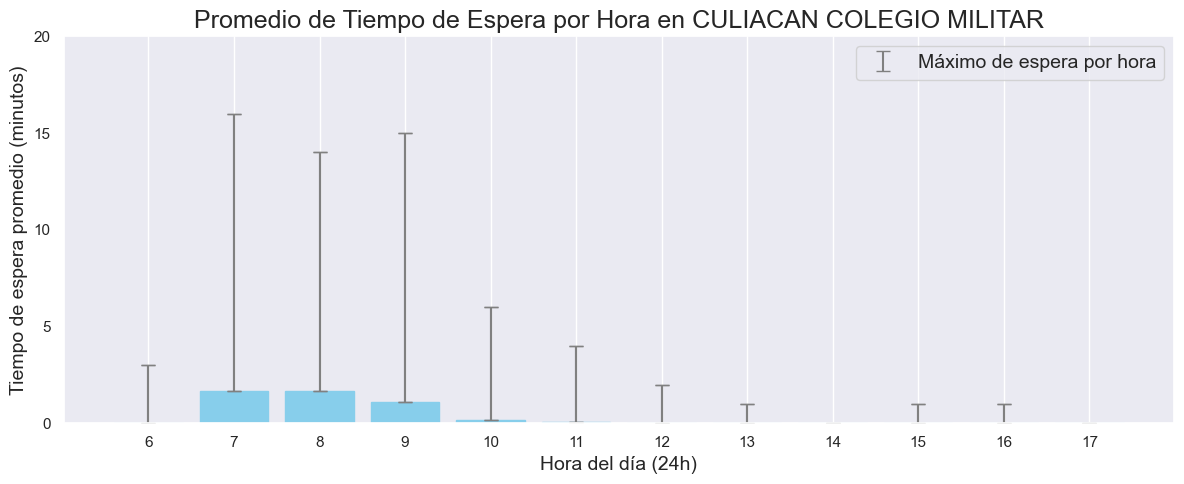

In [21]:
df_simulacion_atencion_co["hora"] = df_simulacion_atencion_co["hora_inicio"].dt.hour
agrupado = df_simulacion_atencion_co.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en CULIACAN COLEGIO MILITAR", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_simulacion_atencion_co["hora"].min(), df_simulacion_atencion_co["hora"].max() + 1))            
plt.yticks(range(0, 21, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('CULCOL.png', dpi=300)

In [22]:
len(df_simulacion_atencion_co[df_simulacion_atencion_co["espera_min"] > 20])

0

In [23]:
len(df_simulacion_atencion_co[df_simulacion_atencion_co["espera_min"] >= 25])

0

In [24]:
max(df_simulacion_atencion_co['espera_min'])

16.0

In [25]:
df_simulacion_atencion_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7564 entries, 0 to 7563
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            7564 non-null   int64         
 1   prioridad     7564 non-null   int64         
 2   hora_llegada  7564 non-null   datetime64[ns]
 3   hora_inicio   7564 non-null   datetime64[ns]
 4   espera_min    7564 non-null   float64       
 5   caja          7564 non-null   int64         
 6   hora          7564 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3)
memory usage: 384.2 KB


In [26]:
sim_colegio = df_simulacion_atencion_co[df_simulacion_atencion_co['espera_min'] !=0.00]
sim_colegio

id  prioridad        hora_llegada         hora_inicio  espera_min  \
38     39          1 2024-03-01 07:23:00 2024-03-01 07:24:00         1.0   
39     38          0 2024-03-01 07:22:00 2024-03-01 07:24:00         2.0   
48     48          1 2024-03-01 07:38:00 2024-03-01 07:41:00         3.0   
49     50          1 2024-03-01 07:41:00 2024-03-01 07:42:00         1.0   
50     49          0 2024-03-01 07:40:00 2024-03-01 07:43:00         3.0   
...   ...        ...                 ...                 ...         ...   
7411  110          0 2024-03-27 08:51:00 2024-03-27 08:58:00         7.0   
7412  114          1 2024-03-27 08:56:00 2024-03-27 08:59:00         3.0   
7413  115          1 2024-03-27 08:58:00 2024-03-27 09:00:00         2.0   
7469  170          0 2024-03-27 10:52:00 2024-03-27 10:54:00         2.0   
7485  187          0 2024-03-27 11:35:00 2024-03-27 11:36:00         1.0   

      caja  hora  
38       1     7  
39       2     7  
48       1     7  
49       2     7  
50       2     7  
...    ...   ...  
7411     4     8  
7412     3     8  
7413     2     9  
7469     1    10  
7485     2    11  

[1708 rows x 7 columns]

In [27]:
sum(sim_colegio['espera_min'])/len(sim_colegio['espera_min'])

3.5427400468384076

In [28]:
max(sim_colegio['espera_min'])

16.0

In [31]:
sum(df_simulacion_atencion_co['espera_min'])/len(df_simulacion_atencion_co['espera_min'])

0.7999735589635114

In [32]:
COLEGIO = df[df['Sucursal'] == 'CULIACAN COLEGIO MILITAR']
sum(COLEGIO['TurnoMinutosEspera'])/len(COLEGIO['TurnoMinutosEspera'])

14.152468976215191

In [33]:
COLEGIO = df[(df['Sucursal'] == 'CULIACAN COLEGIO MILITAR')&(df['TurnoMinutosEspera'] != 0.00)]
sum(COLEGIO['TurnoMinutosEspera'])/len(COLEGIO['TurnoMinutosEspera'])

14.250097618118016

In [34]:
max(COLEGIO['TurnoMinutosEspera'])

88.65

### CULIACAN LA CONQUISTA

In [35]:
df_fechas = df[df["Sucursal"]=="CULIACAN LA CONQUISTA"]
df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)
fechas = df_fechas["FechaID"].apply(lambda x : x[:4]+"-"+x[4:6]+"-"+x[6:])
fechas=list(fechas.unique())

simulacion_llegadas = []
simulacion_atencion = []
for i in fechas:
    df_sim = simulacion_pacientes("CULIACAN LA CONQUISTA", df,i)
    df_te = simular_atencion(df_sim, cajas=5) 
    simulacion_llegadas.append(df_sim)
    simulacion_atencion.append(df_te)

df_simulacion_llegada_la = pd.concat(simulacion_llegadas, ignore_index=True)
df_simulacion_atencion_la = pd.concat(simulacion_atencion, ignore_index=True)
df_simulacion_atencion_la

C:\Users\jajp2\AppData\Local\Temp\ipykernel_18288\4184064770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)


06:00:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 1 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 1 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:14:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:15:00 | Caja 2 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:24:00 | Caja 1 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:46:00 | Caja 1 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:47:00 | Caja 2 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:51:00 | Caja 1 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:52:00 | Caja 2 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:54:00 | Caja 1 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:56:00 | Caja 3 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
07:00:00 | Caja 1 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 1 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
07:07:00 | Caja 2 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 3 atiende ID 15 (Prioridad 1) - Es

08:28:00 | Caja 2 atiende ID 43 (Prioridad 1) - Espera: 0.0 min
08:28:00 | Caja 4 atiende ID 42 (Prioridad 0) - Espera: 0.0 min
08:29:00 | Caja 3 atiende ID 44 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 1 atiende ID 46 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 3 atiende ID 45 (Prioridad 0) - Espera: 0.0 min
08:32:00 | Caja 2 atiende ID 47 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 4 atiende ID 48 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 1 atiende ID 49 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 2 atiende ID 50 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 3 atiende ID 51 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 1 atiende ID 52 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 2 atiende ID 53 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 1 atiende ID 54 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 2 atiende ID 55 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 1 atiende ID 56 (Prioridad 1) - Espera: 0.0 min
09:04:00 | Caja 1 atiende ID 57 (Priorid

11:45:00 | Caja 1 atiende ID 81 (Prioridad 0) - Espera: 0.0 min
11:48:00 | Caja 1 atiende ID 82 (Prioridad 0) - Espera: 0.0 min
11:52:00 | Caja 2 atiende ID 83 (Prioridad 0) - Espera: 0.0 min
12:18:00 | Caja 1 atiende ID 84 (Prioridad 0) - Espera: 0.0 min
12:23:00 | Caja 1 atiende ID 85 (Prioridad 0) - Espera: 0.0 min
12:26:00 | Caja 1 atiende ID 86 (Prioridad 0) - Espera: 0.0 min
12:59:00 | Caja 1 atiende ID 87 (Prioridad 1) - Espera: 0.0 min
13:19:00 | Caja 1 atiende ID 88 (Prioridad 0) - Espera: 0.0 min
13:47:00 | Caja 1 atiende ID 89 (Prioridad 1) - Espera: 0.0 min
13:53:00 | Caja 1 atiende ID 90 (Prioridad 0) - Espera: 0.0 min
14:16:00 | Caja 1 atiende ID 91 (Prioridad 1) - Espera: 0.0 min
14:24:00 | Caja 1 atiende ID 92 (Prioridad 0) - Espera: 0.0 min
14:52:00 | Caja 1 atiende ID 93 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 1 atiende ID 2 (Prioridad 

09:20:00 | Caja 1 atiende ID 47 (Prioridad 0) - Espera: 0.0 min
09:22:00 | Caja 2 atiende ID 48 (Prioridad 0) - Espera: 0.0 min
09:30:00 | Caja 1 atiende ID 49 (Prioridad 1) - Espera: 0.0 min
09:33:00 | Caja 2 atiende ID 50 (Prioridad 1) - Espera: 0.0 min
09:34:00 | Caja 1 atiende ID 51 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 1 atiende ID 52 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 2 atiende ID 53 (Prioridad 1) - Espera: 0.0 min
09:43:00 | Caja 1 atiende ID 54 (Prioridad 0) - Espera: 0.0 min
09:54:00 | Caja 1 atiende ID 55 (Prioridad 1) - Espera: 0.0 min
09:59:00 | Caja 1 atiende ID 56 (Prioridad 0) - Espera: 0.0 min
10:01:00 | Caja 2 atiende ID 57 (Prioridad 0) - Espera: 0.0 min
10:13:00 | Caja 1 atiende ID 58 (Prioridad 1) - Espera: 0.0 min
10:19:00 | Caja 1 atiende ID 59 (Prioridad 1) - Espera: 0.0 min
10:35:00 | Caja 1 atiende ID 60 (Prioridad 0) - Espera: 0.0 min
10:50:00 | Caja 1 atiende ID 61 (Prioridad 1) - Espera: 0.0 min
10:58:00 | Caja 1 atiende ID 62 (Priorid

08:32:00 | Caja 1 atiende ID 50 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 2 atiende ID 51 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 3 atiende ID 52 (Prioridad 1) - Espera: 0.0 min
08:38:00 | Caja 1 atiende ID 53 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 1 atiende ID 54 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 2 atiende ID 55 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 3 atiende ID 56 (Prioridad 1) - Espera: 0.0 min
08:46:00 | Caja 4 atiende ID 57 (Prioridad 1) - Espera: 0.0 min
08:49:00 | Caja 1 atiende ID 58 (Prioridad 0) - Espera: 0.0 min
08:54:00 | Caja 2 atiende ID 59 (Prioridad 0) - Espera: 0.0 min
08:57:00 | Caja 1 atiende ID 60 (Prioridad 0) - Espera: 0.0 min
08:59:00 | Caja 2 atiende ID 61 (Prioridad 1) - Espera: 0.0 min
09:14:00 | Caja 1 atiende ID 62 (Prioridad 0) - Espera: 0.0 min
09:26:00 | Caja 1 atiende ID 63 (Prioridad 1) - Espera: 0.0 min
09:31:00 | Caja 1 atiende ID 64 (Prioridad 1) - Espera: 0.0 min
09:32:00 | Caja 2 atiende ID 65 (Priorid

09:22:00 | Caja 1 atiende ID 76 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 2 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 1 atiende ID 78 (Prioridad 1) - Espera: 0.0 min
09:30:00 | Caja 2 atiende ID 79 (Prioridad 0) - Espera: 0.0 min
09:34:00 | Caja 1 atiende ID 80 (Prioridad 0) - Espera: 0.0 min
09:45:00 | Caja 1 atiende ID 81 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 2 atiende ID 82 (Prioridad 0) - Espera: 0.0 min
10:17:00 | Caja 1 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
12:09:00 | Caja 1 atiende ID 84 (Prioridad 1) - Espera: 0.0 min
13:29:00 | Caja 1 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
13:41:00 | Caja 1 atiende ID 86 (Prioridad 1) - Espera: 0.0 min
13:48:00 | Caja 1 atiende ID 87 (Prioridad 0) - Espera: 0.0 min
14:12:00 | Caja 1 atiende ID 88 (Prioridad 0) - Espera: 0.0 min
14:27:00 | Caja 1 atiende ID 89 (Prioridad 0) - Espera: 0.0 min
14:29:00 | Caja 2 atiende ID 90 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 1 atiende ID 0 (Priorida

07:51:00 | Caja 1 atiende ID 26 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 2 atiende ID 27 (Prioridad 1) - Espera: 0.0 min
07:55:00 | Caja 1 atiende ID 28 (Prioridad 0) - Espera: 0.0 min
07:56:00 | Caja 3 atiende ID 30 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 4 atiende ID 29 (Prioridad 0) - Espera: 0.0 min
07:57:00 | Caja 5 atiende ID 31 (Prioridad 0) - Espera: 0.0 min
07:58:00 | Caja 4 atiende ID 32 (Prioridad 0) - Espera: 0.0 min
08:06:00 | Caja 1 atiende ID 33 (Prioridad 1) - Espera: 0.0 min
08:07:00 | Caja 2 atiende ID 34 (Prioridad 1) - Espera: 0.0 min
08:12:00 | Caja 1 atiende ID 35 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 2 atiende ID 36 (Prioridad 0) - Espera: 0.0 min
08:16:00 | Caja 1 atiende ID 37 (Prioridad 0) - Espera: 0.0 min
08:17:00 | Caja 2 atiende ID 38 (Prioridad 0) - Espera: 0.0 min
08:18:00 | Caja 3 atiende ID 39 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 1 atiende ID 40 (Prioridad 1) - Espera: 0.0 min
08:19:00 | Caja 4 atiende ID 41 (Priorid

06:02:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:17:00 | Caja 1 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 1 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:33:00 | Caja 1 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
06:56:00 | Caja 1 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
07:04:00 | Caja 1 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
07:08:00 | Caja 1 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 2 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
07:10:00 | Caja 3 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
07:11:00 | Caja 1 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
07:13:00 | Caja 2 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
07:15:00 | Caja 1 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
07:22:00 | Caja 1 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 2 atiende ID 12 (Prioridad 0) - Espera: 0.0 min
07:25:00 | Caja 1 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
07:26:00 | Caja 2 atiende ID 15 (Prioridad 0) - Es

10:34:00 | Caja 1 atiende ID 56 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 1 atiende ID 57 (Prioridad 1) - Espera: 0.0 min
10:52:00 | Caja 1 atiende ID 58 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 1 atiende ID 59 (Prioridad 1) - Espera: 0.0 min
11:28:00 | Caja 1 atiende ID 60 (Prioridad 1) - Espera: 0.0 min
13:05:00 | Caja 1 atiende ID 61 (Prioridad 1) - Espera: 0.0 min
13:16:00 | Caja 1 atiende ID 62 (Prioridad 1) - Espera: 0.0 min
13:29:00 | Caja 1 atiende ID 63 (Prioridad 1) - Espera: 0.0 min
13:38:00 | Caja 1 atiende ID 64 (Prioridad 1) - Espera: 0.0 min
13:41:00 | Caja 1 atiende ID 65 (Prioridad 0) - Espera: 0.0 min
13:44:00 | Caja 1 atiende ID 66 (Prioridad 0) - Espera: 0.0 min
14:08:00 | Caja 1 atiende ID 67 (Prioridad 0) - Espera: 0.0 min
14:40:00 | Caja 1 atiende ID 68 (Prioridad 1) - Espera: 0.0 min
14:48:00 | Caja 1 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:13:00 | Caja 1 atiende ID 1 (Prioridad

08:12:00 | Caja 1 atiende ID 37 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 2 atiende ID 38 (Prioridad 0) - Espera: 0.0 min
08:23:00 | Caja 1 atiende ID 39 (Prioridad 1) - Espera: 0.0 min
08:24:00 | Caja 2 atiende ID 40 (Prioridad 1) - Espera: 0.0 min
08:24:00 | Caja 3 atiende ID 41 (Prioridad 0) - Espera: 0.0 min
08:27:00 | Caja 1 atiende ID 42 (Prioridad 1) - Espera: 0.0 min
08:28:00 | Caja 2 atiende ID 43 (Prioridad 1) - Espera: 0.0 min
08:32:00 | Caja 1 atiende ID 44 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 2 atiende ID 45 (Prioridad 0) - Espera: 0.0 min
08:34:00 | Caja 3 atiende ID 46 (Prioridad 0) - Espera: 0.0 min
08:36:00 | Caja 2 atiende ID 47 (Prioridad 0) - Espera: 0.0 min
08:40:00 | Caja 1 atiende ID 48 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 2 atiende ID 49 (Prioridad 0) - Espera: 0.0 min
08:46:00 | Caja 1 atiende ID 50 (Prioridad 0) - Espera: 0.0 min
08:47:00 | Caja 1 atiende ID 51 (Prioridad 0) - Espera: 0.0 min
08:53:00 | Caja 1 atiende ID 52 (Priorid

14:11:00 | Caja 1 atiende ID 81 (Prioridad 0) - Espera: 0.0 min
06:23:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:25:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:34:00 | Caja 1 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:44:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:47:00 | Caja 2 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:52:00 | Caja 1 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:57:00 | Caja 1 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
07:02:00 | Caja 1 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
07:09:00 | Caja 1 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
07:09:00 | Caja 2 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
07:10:00 | Caja 3 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
07:14:00 | Caja 2 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
07:16:00 | Caja 1 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 1 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
07:22:00 | Caja 2 atiende ID 13 (Prioridad 0) - Es

07:57:00 | Caja 2 atiende ID 42 (Prioridad 0) - Espera: 0.0 min
07:58:00 | Caja 1 atiende ID 43 (Prioridad 0) - Espera: 0.0 min
07:59:00 | Caja 2 atiende ID 44 (Prioridad 0) - Espera: 0.0 min
08:00:00 | Caja 3 atiende ID 45 (Prioridad 0) - Espera: 0.0 min
08:02:00 | Caja 1 atiende ID 46 (Prioridad 0) - Espera: 0.0 min
08:03:00 | Caja 2 atiende ID 47 (Prioridad 1) - Espera: 0.0 min
08:05:00 | Caja 2 atiende ID 48 (Prioridad 0) - Espera: 0.0 min
08:08:00 | Caja 1 atiende ID 49 (Prioridad 1) - Espera: 0.0 min
08:08:00 | Caja 3 atiende ID 50 (Prioridad 1) - Espera: 0.0 min
08:12:00 | Caja 1 atiende ID 51 (Prioridad 1) - Espera: 0.0 min
08:12:00 | Caja 2 atiende ID 52 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 3 atiende ID 53 (Prioridad 0) - Espera: 0.0 min
08:15:00 | Caja 1 atiende ID 54 (Prioridad 1) - Espera: 0.0 min
08:20:00 | Caja 1 atiende ID 55 (Prioridad 0) - Espera: 0.0 min
08:23:00 | Caja 2 atiende ID 56 (Prioridad 1) - Espera: 0.0 min
08:26:00 | Caja 1 atiende ID 57 (Priorid

06:26:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:42:00 | Caja 1 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:44:00 | Caja 2 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:46:00 | Caja 1 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:50:00 | Caja 1 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:54:00 | Caja 1 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
07:00:00 | Caja 2 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
07:11:00 | Caja 1 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
07:19:00 | Caja 1 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
07:21:00 | Caja 2 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
07:23:00 | Caja 1 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
07:24:00 | Caja 2 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
07:25:00 | Caja 3 atiende ID 16 (Prioridad 1) - Espera: 0.0 min
07:25:00 | Caja 4 atiende ID 15 (Prioridad 0) - Espera: 0.0 min
07:28:00 | Caja 1 atiende ID 17 (Prioridad 0) - Espera: 0.0 min
07:37:00 | Caja 1 atiende ID 18 (Prioridad 1) -

10:53:00 | Caja 1 atiende ID 68 (Prioridad 0) - Espera: 0.0 min
10:57:00 | Caja 1 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 1 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 1 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
11:26:00 | Caja 2 atiende ID 72 (Prioridad 1) - Espera: 0.0 min
11:30:00 | Caja 1 atiende ID 73 (Prioridad 0) - Espera: 0.0 min
12:03:00 | Caja 1 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
12:20:00 | Caja 1 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
12:21:00 | Caja 2 atiende ID 76 (Prioridad 1) - Espera: 0.0 min
12:48:00 | Caja 1 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
13:07:00 | Caja 1 atiende ID 78 (Prioridad 0) - Espera: 0.0 min
06:41:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:45:00 | Caja 1 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 1 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
07:00:00 | Caja 2 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 3 atiende ID 4 (Prioridad 0)

id  prioridad        hora_llegada         hora_inicio  espera_min  caja
0      0          1 2024-03-01 06:00:00 2024-03-01 06:00:00         0.0     1
1      1          1 2024-03-01 06:04:00 2024-03-01 06:04:00         0.0     1
2      2          1 2024-03-01 06:07:00 2024-03-01 06:07:00         0.0     1
3      3          1 2024-03-01 06:14:00 2024-03-01 06:14:00         0.0     1
4      4          0 2024-03-01 06:15:00 2024-03-01 06:15:00         0.0     2
...   ..        ...                 ...                 ...         ...   ...
1902  75          1 2024-03-27 12:01:00 2024-03-27 12:01:00         0.0     1
1903  76          1 2024-03-27 12:34:00 2024-03-27 12:34:00         0.0     1
1904  77          0 2024-03-27 12:57:00 2024-03-27 12:57:00         0.0     1
1905  78          1 2024-03-27 13:35:00 2024-03-27 13:35:00         0.0     1
1906  79          0 2024-03-27 14:22:00 2024-03-27 14:22:00         0.0     1

[1907 rows x 6 columns]

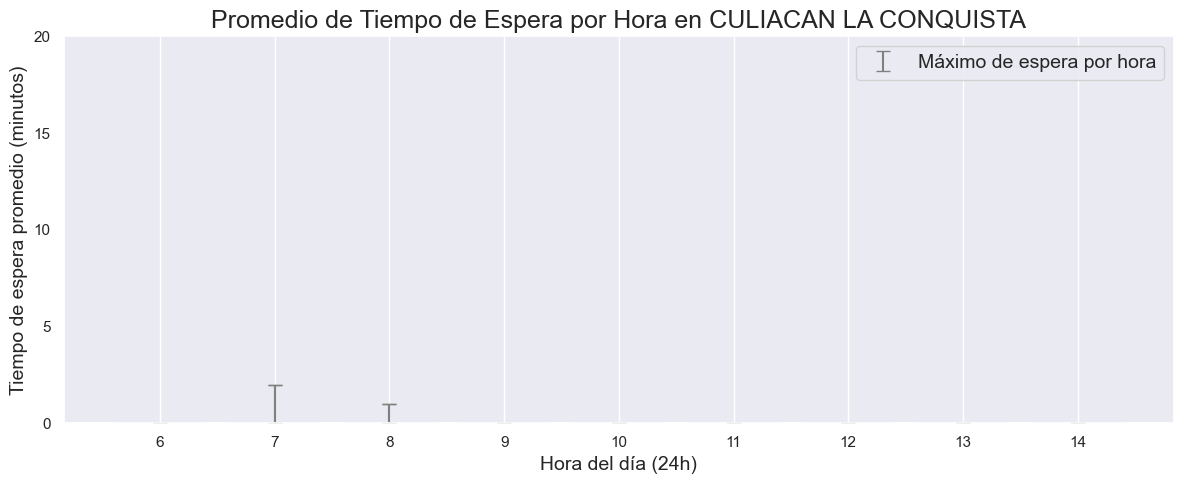

In [36]:
df_simulacion_atencion_la["hora"] = df_simulacion_atencion_la["hora_inicio"].dt.hour
agrupado = df_simulacion_atencion_la.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en CULIACAN LA CONQUISTA", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_simulacion_atencion_la["hora"].min(), df_simulacion_atencion_la["hora"].max() + 1))            
plt.yticks(range(0, 21, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('CULCONQUISTA.png', dpi=300)

In [37]:
max(df_simulacion_atencion_la['espera_min'])

2.0

### SAN MARTIN TEXMELUCAN

In [38]:
df_fechas = df[df["Sucursal"]=="SAN MARTIN TEXMELUCAN"]
df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)
fechas = df_fechas["FechaID"].apply(lambda x : x[:4]+"-"+x[4:6]+"-"+x[6:])
fechas=list(fechas.unique())

simulacion_llegadas = []
simulacion_atencion = []
for i in fechas:
    df_sim = simulacion_pacientes("SAN MARTIN TEXMELUCAN", df,i)
    df_te = simular_atencion(df_sim, cajas=4) 
    simulacion_llegadas.append(df_sim)
    simulacion_atencion.append(df_te)

df_simulacion_llegada_sm = pd.concat(simulacion_llegadas, ignore_index=True)
df_simulacion_atencion_sm = pd.concat(simulacion_atencion, ignore_index=True)
df_simulacion_atencion_sm

C:\Users\jajp2\AppData\Local\Temp\ipykernel_18288\2061586153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas["FechaID"] = df_fechas["FechaID"].astype(str)


06:03:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:04:00 | Caja 1 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:22:00 | Caja 2 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:30:00 | Caja 1 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:30:00 | Caja 2 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:38:00 | Caja 1 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:39:00 | Caja 2 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:42:00 | Caja 2 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:45:00 | Caja 1 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:57:00 | Caja 1 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 2 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
07:05:00 | Caja 1 atiende ID 13 (Prioridad 0) - Espera: 0.0 min
07:08:00 | Caja 2 atiende ID 15 (Prioridad 1) - Espera: 0.0 min
07:08:00 | Caja 3 atiende ID 14 (Prioridad 0) - Es

13:15:00 | Caja 1 atiende ID 132 (Prioridad 0) - Espera: 0.0 min
13:23:00 | Caja 1 atiende ID 133 (Prioridad 1) - Espera: 0.0 min
13:28:00 | Caja 1 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
13:28:00 | Caja 2 atiende ID 134 (Prioridad 0) - Espera: 0.0 min
13:33:00 | Caja 1 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
13:47:00 | Caja 1 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
13:52:00 | Caja 1 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
14:11:00 | Caja 1 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
14:25:00 | Caja 1 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
14:26:00 | Caja 2 atiende ID 141 (Prioridad 0) - Espera: 0.0 min
14:37:00 | Caja 1 atiende ID 142 (Prioridad 0) - Espera: 0.0 min
14:49:00 | Caja 1 atiende ID 143 (Prioridad 1) - Espera: 0.0 min
06:00:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:02:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:16:00 | Caja 1 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:30:00 | Caja 1 atiende ID 3 

12:27:00 | Caja 1 atiende ID 131 (Prioridad 1) - Espera: 0.0 min
12:34:00 | Caja 1 atiende ID 132 (Prioridad 0) - Espera: 0.0 min
12:39:00 | Caja 1 atiende ID 133 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 1 atiende ID 134 (Prioridad 0) - Espera: 0.0 min
12:54:00 | Caja 1 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
13:19:00 | Caja 1 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
13:21:00 | Caja 2 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
13:22:00 | Caja 3 atiende ID 138 (Prioridad 0) - Espera: 0.0 min
13:31:00 | Caja 1 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
13:38:00 | Caja 1 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
13:39:00 | Caja 2 atiende ID 141 (Prioridad 0) - Espera: 0.0 min
13:44:00 | Caja 1 atiende ID 142 (Prioridad 1) - Espera: 0.0 min
14:02:00 | Caja 1 atiende ID 143 (Prioridad 0) - Espera: 0.0 min
14:16:00 | Caja 1 atiende ID 144 (Prioridad 0) - Espera: 0.0 min
14:22:00 | Caja 1 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
14:27:00 | Caja 1 atiende

12:13:00 | Caja 3 atiende ID 123 (Prioridad 1) - Espera: 0.0 min
12:22:00 | Caja 1 atiende ID 124 (Prioridad 1) - Espera: 0.0 min
12:24:00 | Caja 2 atiende ID 125 (Prioridad 1) - Espera: 0.0 min
12:26:00 | Caja 1 atiende ID 126 (Prioridad 0) - Espera: 0.0 min
12:32:00 | Caja 1 atiende ID 127 (Prioridad 1) - Espera: 0.0 min
12:36:00 | Caja 1 atiende ID 128 (Prioridad 0) - Espera: 0.0 min
12:40:00 | Caja 1 atiende ID 129 (Prioridad 0) - Espera: 0.0 min
12:42:00 | Caja 1 atiende ID 130 (Prioridad 1) - Espera: 0.0 min
12:43:00 | Caja 2 atiende ID 131 (Prioridad 0) - Espera: 0.0 min
12:47:00 | Caja 1 atiende ID 132 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 2 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 3 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
12:50:00 | Caja 4 atiende ID 135 (Prioridad 0) - Espera: 0.0 min
12:53:00 | Caja 3 atiende ID 136 (Prioridad 1) - Espera: 2.0 min
12:54:00 | Caja 4 atiende ID 137 (Prioridad 1) - Espera: 2.0 min
12:55:00 | Caja 1 atiende

10:57:00 | Caja 1 atiende ID 108 (Prioridad 0) - Espera: 0.0 min
11:01:00 | Caja 2 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 1 atiende ID 110 (Prioridad 0) - Espera: 0.0 min
11:14:00 | Caja 1 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
11:20:00 | Caja 1 atiende ID 112 (Prioridad 0) - Espera: 0.0 min
11:30:00 | Caja 1 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
11:31:00 | Caja 2 atiende ID 114 (Prioridad 0) - Espera: 0.0 min
11:35:00 | Caja 1 atiende ID 115 (Prioridad 1) - Espera: 0.0 min
11:39:00 | Caja 2 atiende ID 116 (Prioridad 0) - Espera: 0.0 min
11:44:00 | Caja 1 atiende ID 117 (Prioridad 0) - Espera: 0.0 min
11:50:00 | Caja 1 atiende ID 118 (Prioridad 0) - Espera: 0.0 min
11:56:00 | Caja 1 atiende ID 119 (Prioridad 1) - Espera: 0.0 min
11:58:00 | Caja 2 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
12:03:00 | Caja 1 atiende ID 121 (Prioridad 0) - Espera: 0.0 min
12:10:00 | Caja 1 atiende ID 122 (Prioridad 1) - Espera: 0.0 min
12:11:00 | Caja 2 atiende

10:31:00 | Caja 1 atiende ID 104 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 2 atiende ID 105 (Prioridad 0) - Espera: 0.0 min
10:34:00 | Caja 1 atiende ID 106 (Prioridad 1) - Espera: 0.0 min
10:36:00 | Caja 3 atiende ID 107 (Prioridad 0) - Espera: 0.0 min
10:41:00 | Caja 1 atiende ID 108 (Prioridad 1) - Espera: 0.0 min
10:46:00 | Caja 1 atiende ID 109 (Prioridad 0) - Espera: 0.0 min
10:50:00 | Caja 1 atiende ID 110 (Prioridad 0) - Espera: 0.0 min
10:53:00 | Caja 2 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
10:53:00 | Caja 3 atiende ID 112 (Prioridad 0) - Espera: 0.0 min
10:57:00 | Caja 1 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 1 atiende ID 114 (Prioridad 0) - Espera: 0.0 min
11:14:00 | Caja 1 atiende ID 115 (Prioridad 1) - Espera: 0.0 min
11:18:00 | Caja 1 atiende ID 116 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 2 atiende ID 117 (Prioridad 1) - Espera: 0.0 min
11:25:00 | Caja 1 atiende ID 118 (Prioridad 0) - Espera: 0.0 min
11:28:00 | Caja 1 atiende

10:22:00 | Caja 1 atiende ID 102 (Prioridad 0) - Espera: 1.0 min
10:22:00 | Caja 2 atiende ID 103 (Prioridad 0) - Espera: 0.0 min
10:27:00 | Caja 2 atiende ID 104 (Prioridad 1) - Espera: 0.0 min
10:28:00 | Caja 1 atiende ID 105 (Prioridad 1) - Espera: 0.0 min
10:30:00 | Caja 3 atiende ID 106 (Prioridad 1) - Espera: 0.0 min
10:32:00 | Caja 3 atiende ID 107 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 4 atiende ID 108 (Prioridad 0) - Espera: 0.0 min
10:36:00 | Caja 1 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
10:38:00 | Caja 2 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
10:41:00 | Caja 3 atiende ID 111 (Prioridad 0) - Espera: 0.0 min
10:47:00 | Caja 2 atiende ID 112 (Prioridad 1) - Espera: 0.0 min
10:51:00 | Caja 1 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
10:53:00 | Caja 2 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
10:56:00 | Caja 1 atiende ID 115 (Prioridad 0) - Espera: 0.0 min
10:58:00 | Caja 2 atiende ID 116 (Prioridad 0) - Espera: 0.0 min
10:59:00 | Caja 1 atiende

09:35:00 | Caja 2 atiende ID 89 (Prioridad 1) - Espera: 1.0 min
09:37:00 | Caja 1 atiende ID 90 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 3 atiende ID 91 (Prioridad 1) - Espera: 0.0 min
09:39:00 | Caja 4 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
09:41:00 | Caja 1 atiende ID 93 (Prioridad 1) - Espera: 1.0 min
09:41:00 | Caja 2 atiende ID 94 (Prioridad 1) - Espera: 0.0 min
09:45:00 | Caja 2 atiende ID 95 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 1 atiende ID 96 (Prioridad 1) - Espera: 0.0 min
10:01:00 | Caja 1 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
10:06:00 | Caja 1 atiende ID 98 (Prioridad 1) - Espera: 0.0 min
10:15:00 | Caja 1 atiende ID 99 (Prioridad 1) - Espera: 0.0 min
10:22:00 | Caja 2 atiende ID 100 (Prioridad 0) - Espera: 0.0 min
10:28:00 | Caja 1 atiende ID 101 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 1 atiende ID 102 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 2 atiende ID 103 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 1 atiende ID 104 (Pr

08:29:00 | Caja 3 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 1 atiende ID 74 (Prioridad 0) - Espera: 2.0 min
08:32:00 | Caja 2 atiende ID 75 (Prioridad 0) - Espera: 0.0 min
08:35:00 | Caja 1 atiende ID 76 (Prioridad 0) - Espera: 0.0 min
08:37:00 | Caja 2 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 1 atiende ID 78 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 1 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 1 atiende ID 80 (Prioridad 1) - Espera: 0.0 min
08:45:00 | Caja 2 atiende ID 81 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 1 atiende ID 82 (Prioridad 0) - Espera: 0.0 min
08:55:00 | Caja 1 atiende ID 83 (Prioridad 0) - Espera: 0.0 min
08:57:00 | Caja 2 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
08:57:00 | Caja 3 atiende ID 86 (Prioridad 1) - Espera: 0.0 min
08:57:00 | Caja 4 atiende ID 84 (Prioridad 0) - Espera: 0.0 min
08:59:00 | Caja 1 atiende ID 87 (Prioridad 1) - Espera: 1.0 min
08:59:00 | Caja 4 atiende ID 88 (Priorid

08:57:00 | Caja 2 atiende ID 71 (Prioridad 0) - Espera: 0.0 min
08:57:00 | Caja 3 atiende ID 72 (Prioridad 0) - Espera: 0.0 min
09:00:00 | Caja 1 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
09:02:00 | Caja 3 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
09:03:00 | Caja 4 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
09:06:00 | Caja 2 atiende ID 77 (Prioridad 1) - Espera: 2.0 min
09:07:00 | Caja 3 atiende ID 76 (Prioridad 0) - Espera: 4.0 min
09:08:00 | Caja 2 atiende ID 78 (Prioridad 0) - Espera: 4.0 min
09:10:00 | Caja 1 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
09:13:00 | Caja 2 atiende ID 80 (Prioridad 0) - Espera: 0.0 min
09:14:00 | Caja 1 atiende ID 81 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 3 atiende ID 82 (Prioridad 1) - Espera: 0.0 min
09:20:00 | Caja 1 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 2 atiende ID 84 (Prioridad 0) - Espera: 0.0 min
09:26:00 | Caja 2 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 1 atiende ID 86 (Priorid

08:43:00 | Caja 2 atiende ID 66 (Prioridad 1) - Espera: 0.0 min
08:43:00 | Caja 3 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 1 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
08:47:00 | Caja 3 atiende ID 68 (Prioridad 0) - Espera: 0.0 min
08:49:00 | Caja 2 atiende ID 70 (Prioridad 0) - Espera: 0.0 min
08:52:00 | Caja 1 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
08:53:00 | Caja 3 atiende ID 72 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 1 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
09:09:00 | Caja 1 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
09:10:00 | Caja 2 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 1 atiende ID 76 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 2 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
09:15:00 | Caja 3 atiende ID 78 (Prioridad 0) - Espera: 0.0 min
09:18:00 | Caja 1 atiende ID 79 (Prioridad 0) - Espera: 0.0 min
09:23:00 | Caja 2 atiende ID 80 (Prioridad 0) - Espera: 0.0 min
09:24:00 | Caja 1 atiende ID 81 (Priorid

08:16:00 | Caja 2 atiende ID 56 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 1 atiende ID 57 (Prioridad 1) - Espera: 1.0 min
08:17:00 | Caja 4 atiende ID 58 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 2 atiende ID 52 (Prioridad 0) - Espera: 5.0 min
08:19:00 | Caja 3 atiende ID 53 (Prioridad 0) - Espera: 6.0 min
08:21:00 | Caja 1 atiende ID 60 (Prioridad 1) - Espera: 2.0 min
08:22:00 | Caja 3 atiende ID 55 (Prioridad 0) - Espera: 7.0 min
08:23:00 | Caja 1 atiende ID 59 (Prioridad 0) - Espera: 5.0 min
08:23:00 | Caja 2 atiende ID 61 (Prioridad 0) - Espera: 3.0 min
08:26:00 | Caja 1 atiende ID 62 (Prioridad 1) - Espera: 0.0 min
08:26:00 | Caja 3 atiende ID 63 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 2 atiende ID 64 (Prioridad 1) - Espera: 1.0 min
08:29:00 | Caja 4 atiende ID 65 (Prioridad 1) - Espera: 0.0 min
08:30:00 | Caja 3 atiende ID 66 (Prioridad 1) - Espera: 1.0 min
08:31:00 | Caja 1 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
08:33:00 | Caja 2 atiende ID 68 (Priorid

07:48:00 | Caja 1 atiende ID 34 (Prioridad 1) - Espera: 0.0 min
07:48:00 | Caja 2 atiende ID 36 (Prioridad 1) - Espera: 0.0 min
07:49:00 | Caja 3 atiende ID 35 (Prioridad 0) - Espera: 1.0 min
07:50:00 | Caja 2 atiende ID 37 (Prioridad 0) - Espera: 1.0 min
07:58:00 | Caja 1 atiende ID 38 (Prioridad 0) - Espera: 0.0 min
07:58:00 | Caja 2 atiende ID 39 (Prioridad 0) - Espera: 0.0 min
07:59:00 | Caja 4 atiende ID 40 (Prioridad 1) - Espera: 0.0 min
08:01:00 | Caja 1 atiende ID 41 (Prioridad 0) - Espera: 1.0 min
08:03:00 | Caja 2 atiende ID 42 (Prioridad 0) - Espera: 0.0 min
08:04:00 | Caja 3 atiende ID 43 (Prioridad 1) - Espera: 0.0 min
08:04:00 | Caja 4 atiende ID 44 (Prioridad 0) - Espera: 0.0 min
08:07:00 | Caja 1 atiende ID 45 (Prioridad 1) - Espera: 0.0 min
08:11:00 | Caja 1 atiende ID 46 (Prioridad 1) - Espera: 0.0 min
08:15:00 | Caja 1 atiende ID 47 (Prioridad 0) - Espera: 0.0 min
08:17:00 | Caja 2 atiende ID 48 (Prioridad 0) - Espera: 0.0 min
08:18:00 | Caja 3 atiende ID 49 (Priorid

08:53:00 | Caja 2 atiende ID 64 (Prioridad 0) - Espera: 0.0 min
08:55:00 | Caja 1 atiende ID 65 (Prioridad 0) - Espera: 0.0 min
08:58:00 | Caja 1 atiende ID 66 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 2 atiende ID 67 (Prioridad 1) - Espera: 0.0 min
09:02:00 | Caja 1 atiende ID 68 (Prioridad 1) - Espera: 0.0 min
09:04:00 | Caja 2 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
09:09:00 | Caja 1 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
09:12:00 | Caja 1 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
09:12:00 | Caja 2 atiende ID 72 (Prioridad 0) - Espera: 0.0 min
09:14:00 | Caja 1 atiende ID 73 (Prioridad 1) - Espera: 0.0 min
09:16:00 | Caja 2 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
09:22:00 | Caja 1 atiende ID 75 (Prioridad 0) - Espera: 0.0 min
09:27:00 | Caja 1 atiende ID 76 (Prioridad 0) - Espera: 0.0 min
09:38:00 | Caja 1 atiende ID 77 (Prioridad 0) - Espera: 0.0 min
09:38:00 | Caja 2 atiende ID 78 (Prioridad 0) - Espera: 0.0 min
09:39:00 | Caja 3 atiende ID 79 (Priorid

09:22:00 | Caja 3 atiende ID 85 (Prioridad 1) - Espera: 0.0 min
09:26:00 | Caja 1 atiende ID 86 (Prioridad 0) - Espera: 0.0 min
09:28:00 | Caja 2 atiende ID 87 (Prioridad 1) - Espera: 0.0 min
09:41:00 | Caja 1 atiende ID 88 (Prioridad 1) - Espera: 0.0 min
09:41:00 | Caja 2 atiende ID 89 (Prioridad 1) - Espera: 0.0 min
09:41:00 | Caja 3 atiende ID 90 (Prioridad 0) - Espera: 0.0 min
09:41:00 | Caja 4 atiende ID 91 (Prioridad 0) - Espera: 0.0 min
09:43:00 | Caja 2 atiende ID 92 (Prioridad 0) - Espera: 1.0 min
09:44:00 | Caja 3 atiende ID 93 (Prioridad 0) - Espera: 1.0 min
09:46:00 | Caja 1 atiende ID 94 (Prioridad 0) - Espera: 0.0 min
09:46:00 | Caja 3 atiende ID 95 (Prioridad 0) - Espera: 0.0 min
09:48:00 | Caja 2 atiende ID 96 (Prioridad 0) - Espera: 0.0 min
09:50:00 | Caja 4 atiende ID 97 (Prioridad 0) - Espera: 0.0 min
09:52:00 | Caja 1 atiende ID 98 (Prioridad 0) - Espera: 2.0 min
09:55:00 | Caja 1 atiende ID 99 (Prioridad 0) - Espera: 0.0 min
09:58:00 | Caja 1 atiende ID 100 (Priori

08:38:00 | Caja 1 atiende ID 68 (Prioridad 1) - Espera: 0.0 min
08:39:00 | Caja 2 atiende ID 69 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 1 atiende ID 70 (Prioridad 0) - Espera: 0.0 min
08:42:00 | Caja 3 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
08:44:00 | Caja 4 atiende ID 72 (Prioridad 0) - Espera: 0.0 min
08:45:00 | Caja 2 atiende ID 73 (Prioridad 0) - Espera: 1.0 min
08:49:00 | Caja 1 atiende ID 74 (Prioridad 0) - Espera: 0.0 min
08:50:00 | Caja 2 atiende ID 75 (Prioridad 1) - Espera: 0.0 min
08:50:00 | Caja 3 atiende ID 76 (Prioridad 1) - Espera: 0.0 min
08:52:00 | Caja 4 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 1 atiende ID 78 (Prioridad 1) - Espera: 2.0 min
08:54:00 | Caja 2 atiende ID 79 (Prioridad 1) - Espera: 1.0 min
08:54:00 | Caja 3 atiende ID 80 (Prioridad 0) - Espera: 0.0 min
08:56:00 | Caja 4 atiende ID 81 (Prioridad 0) - Espera: 0.0 min
08:57:00 | Caja 3 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 1 atiende ID 82 (Priorid

08:25:00 | Caja 3 atiende ID 51 (Prioridad 0) - Espera: 0.0 min
08:26:00 | Caja 1 atiende ID 53 (Prioridad 1) - Espera: 0.0 min
08:26:00 | Caja 4 atiende ID 52 (Prioridad 0) - Espera: 0.0 min
08:32:00 | Caja 1 atiende ID 54 (Prioridad 0) - Espera: 0.0 min
08:33:00 | Caja 2 atiende ID 55 (Prioridad 1) - Espera: 0.0 min
08:34:00 | Caja 3 atiende ID 56 (Prioridad 0) - Espera: 0.0 min
08:39:00 | Caja 1 atiende ID 57 (Prioridad 1) - Espera: 0.0 min
08:40:00 | Caja 2 atiende ID 58 (Prioridad 1) - Espera: 0.0 min
08:41:00 | Caja 3 atiende ID 59 (Prioridad 0) - Espera: 0.0 min
08:42:00 | Caja 1 atiende ID 60 (Prioridad 0) - Espera: 0.0 min
08:44:00 | Caja 2 atiende ID 61 (Prioridad 0) - Espera: 0.0 min
08:45:00 | Caja 4 atiende ID 62 (Prioridad 0) - Espera: 0.0 min
08:49:00 | Caja 1 atiende ID 63 (Prioridad 0) - Espera: 0.0 min
08:57:00 | Caja 1 atiende ID 64 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 2 atiende ID 65 (Prioridad 1) - Espera: 0.0 min
08:58:00 | Caja 3 atiende ID 66 (Priorid

08:04:00 | Caja 1 atiende ID 39 (Prioridad 1) - Espera: 0.0 min
08:05:00 | Caja 3 atiende ID 40 (Prioridad 0) - Espera: 0.0 min
08:10:00 | Caja 1 atiende ID 41 (Prioridad 1) - Espera: 0.0 min
08:11:00 | Caja 2 atiende ID 42 (Prioridad 0) - Espera: 0.0 min
08:11:00 | Caja 3 atiende ID 43 (Prioridad 0) - Espera: 0.0 min
08:14:00 | Caja 2 atiende ID 44 (Prioridad 1) - Espera: 0.0 min
08:14:00 | Caja 4 atiende ID 45 (Prioridad 0) - Espera: 0.0 min
08:15:00 | Caja 1 atiende ID 46 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 3 atiende ID 47 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 1 atiende ID 48 (Prioridad 0) - Espera: 0.0 min
08:23:00 | Caja 1 atiende ID 49 (Prioridad 0) - Espera: 0.0 min
08:24:00 | Caja 2 atiende ID 50 (Prioridad 1) - Espera: 0.0 min
08:27:00 | Caja 1 atiende ID 51 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 2 atiende ID 52 (Prioridad 1) - Espera: 0.0 min
08:29:00 | Caja 3 atiende ID 53 (Prioridad 0) - Espera: 0.0 min
08:30:00 | Caja 4 atiende ID 54 (Priorid

07:47:00 | Caja 4 atiende ID 42 (Prioridad 1) - Espera: 1.0 min
07:49:00 | Caja 2 atiende ID 43 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 1 atiende ID 44 (Prioridad 1) - Espera: 0.0 min
07:50:00 | Caja 3 atiende ID 45 (Prioridad 0) - Espera: 0.0 min
07:52:00 | Caja 1 atiende ID 46 (Prioridad 1) - Espera: 0.0 min
07:56:00 | Caja 1 atiende ID 47 (Prioridad 1) - Espera: 0.0 min
07:57:00 | Caja 2 atiende ID 48 (Prioridad 0) - Espera: 0.0 min
07:58:00 | Caja 3 atiende ID 49 (Prioridad 1) - Espera: 0.0 min
08:00:00 | Caja 1 atiende ID 50 (Prioridad 1) - Espera: 0.0 min
08:00:00 | Caja 4 atiende ID 51 (Prioridad 0) - Espera: 0.0 min
08:01:00 | Caja 2 atiende ID 52 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 1 atiende ID 53 (Prioridad 0) - Espera: 0.0 min
08:08:00 | Caja 3 atiende ID 54 (Prioridad 0) - Espera: 0.0 min
08:10:00 | Caja 2 atiende ID 55 (Prioridad 1) - Espera: 0.0 min
08:10:00 | Caja 3 atiende ID 56 (Prioridad 1) - Espera: 0.0 min
08:15:00 | Caja 1 atiende ID 57 (Priorid

07:45:00 | Caja 1 atiende ID 36 (Prioridad 0) - Espera: 0.0 min
07:51:00 | Caja 1 atiende ID 37 (Prioridad 1) - Espera: 0.0 min
07:51:00 | Caja 2 atiende ID 38 (Prioridad 0) - Espera: 0.0 min
07:56:00 | Caja 1 atiende ID 39 (Prioridad 0) - Espera: 0.0 min
08:00:00 | Caja 1 atiende ID 40 (Prioridad 0) - Espera: 0.0 min
08:01:00 | Caja 1 atiende ID 41 (Prioridad 0) - Espera: 0.0 min
08:05:00 | Caja 2 atiende ID 42 (Prioridad 1) - Espera: 0.0 min
08:06:00 | Caja 1 atiende ID 43 (Prioridad 0) - Espera: 0.0 min
08:07:00 | Caja 2 atiende ID 44 (Prioridad 0) - Espera: 0.0 min
08:08:00 | Caja 1 atiende ID 45 (Prioridad 0) - Espera: 0.0 min
08:11:00 | Caja 1 atiende ID 46 (Prioridad 1) - Espera: 0.0 min
08:16:00 | Caja 1 atiende ID 47 (Prioridad 1) - Espera: 0.0 min
08:17:00 | Caja 2 atiende ID 48 (Prioridad 1) - Espera: 0.0 min
08:18:00 | Caja 1 atiende ID 49 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 2 atiende ID 50 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 3 atiende ID 52 (Priorid

07:58:00 | Caja 3 atiende ID 43 (Prioridad 1) - Espera: 0.0 min
07:59:00 | Caja 4 atiende ID 44 (Prioridad 0) - Espera: 0.0 min
08:01:00 | Caja 1 atiende ID 45 (Prioridad 1) - Espera: 1.0 min
08:01:00 | Caja 3 atiende ID 46 (Prioridad 1) - Espera: 1.0 min
08:02:00 | Caja 2 atiende ID 47 (Prioridad 1) - Espera: 0.0 min
08:03:00 | Caja 1 atiende ID 49 (Prioridad 1) - Espera: 0.0 min
08:03:00 | Caja 4 atiende ID 48 (Prioridad 0) - Espera: 1.0 min
08:08:00 | Caja 1 atiende ID 50 (Prioridad 0) - Espera: 0.0 min
08:09:00 | Caja 2 atiende ID 51 (Prioridad 1) - Espera: 0.0 min
08:13:00 | Caja 1 atiende ID 52 (Prioridad 0) - Espera: 0.0 min
08:19:00 | Caja 2 atiende ID 53 (Prioridad 1) - Espera: 0.0 min
08:21:00 | Caja 1 atiende ID 54 (Prioridad 0) - Espera: 0.0 min
08:28:00 | Caja 1 atiende ID 55 (Prioridad 0) - Espera: 0.0 min
08:28:00 | Caja 2 atiende ID 56 (Prioridad 0) - Espera: 0.0 min
08:31:00 | Caja 3 atiende ID 57 (Prioridad 1) - Espera: 0.0 min
08:31:00 | Caja 4 atiende ID 58 (Priorid

14:26:00 | Caja 1 atiende ID 170 (Prioridad 1) - Espera: 0.0 min
14:39:00 | Caja 1 atiende ID 171 (Prioridad 0) - Espera: 0.0 min
14:55:00 | Caja 1 atiende ID 172 (Prioridad 0) - Espera: 0.0 min
14:59:00 | Caja 1 atiende ID 173 (Prioridad 1) - Espera: 0.0 min
06:03:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:06:00 | Caja 2 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:07:00 | Caja 3 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 1 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:10:00 | Caja 2 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:14:00 | Caja 1 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:48:00 | Caja 1 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:48:00 | Caja 2 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:49:00 | Caja 3 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:52:00 | Caja 1 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:58:00 | Caja 1 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
07:01:00 | Caja 2 atiende ID 11 (Prioridad 1) 

12:48:00 | Caja 1 atiende ID 135 (Prioridad 1) - Espera: 0.0 min
12:50:00 | Caja 2 atiende ID 136 (Prioridad 0) - Espera: 0.0 min
12:52:00 | Caja 3 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
12:58:00 | Caja 1 atiende ID 138 (Prioridad 1) - Espera: 0.0 min
13:01:00 | Caja 1 atiende ID 139 (Prioridad 1) - Espera: 0.0 min
13:06:00 | Caja 1 atiende ID 140 (Prioridad 1) - Espera: 0.0 min
13:06:00 | Caja 2 atiende ID 141 (Prioridad 1) - Espera: 0.0 min
13:12:00 | Caja 1 atiende ID 142 (Prioridad 0) - Espera: 0.0 min
13:26:00 | Caja 1 atiende ID 143 (Prioridad 0) - Espera: 0.0 min
13:39:00 | Caja 1 atiende ID 144 (Prioridad 0) - Espera: 0.0 min
13:54:00 | Caja 1 atiende ID 145 (Prioridad 0) - Espera: 0.0 min
14:07:00 | Caja 1 atiende ID 147 (Prioridad 1) - Espera: 0.0 min
14:07:00 | Caja 2 atiende ID 146 (Prioridad 0) - Espera: 0.0 min
14:12:00 | Caja 1 atiende ID 148 (Prioridad 0) - Espera: 0.0 min
14:23:00 | Caja 1 atiende ID 149 (Prioridad 1) - Espera: 0.0 min
14:43:00 | Caja 1 atiende

11:49:00 | Caja 1 atiende ID 123 (Prioridad 1) - Espera: 0.0 min
11:56:00 | Caja 1 atiende ID 124 (Prioridad 1) - Espera: 0.0 min
12:16:00 | Caja 1 atiende ID 125 (Prioridad 0) - Espera: 0.0 min
12:25:00 | Caja 1 atiende ID 126 (Prioridad 1) - Espera: 0.0 min
12:29:00 | Caja 1 atiende ID 127 (Prioridad 1) - Espera: 0.0 min
12:31:00 | Caja 2 atiende ID 128 (Prioridad 1) - Espera: 0.0 min
12:36:00 | Caja 2 atiende ID 129 (Prioridad 1) - Espera: 0.0 min
12:37:00 | Caja 3 atiende ID 130 (Prioridad 0) - Espera: 0.0 min
12:37:00 | Caja 4 atiende ID 131 (Prioridad 0) - Espera: 0.0 min
12:40:00 | Caja 1 atiende ID 132 (Prioridad 0) - Espera: 0.0 min
12:42:00 | Caja 2 atiende ID 134 (Prioridad 1) - Espera: 0.0 min
12:42:00 | Caja 3 atiende ID 133 (Prioridad 0) - Espera: 0.0 min
12:51:00 | Caja 1 atiende ID 135 (Prioridad 0) - Espera: 0.0 min
12:52:00 | Caja 2 atiende ID 136 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 3 atiende ID 137 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 4 atiende

10:19:00 | Caja 1 atiende ID 108 (Prioridad 0) - Espera: 0.0 min
10:20:00 | Caja 2 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
10:23:00 | Caja 1 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
10:25:00 | Caja 2 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 1 atiende ID 112 (Prioridad 1) - Espera: 0.0 min
10:33:00 | Caja 2 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 1 atiende ID 114 (Prioridad 1) - Espera: 0.0 min
10:40:00 | Caja 2 atiende ID 115 (Prioridad 0) - Espera: 0.0 min
10:49:00 | Caja 1 atiende ID 116 (Prioridad 1) - Espera: 0.0 min
11:00:00 | Caja 1 atiende ID 117 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 1 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 2 atiende ID 119 (Prioridad 1) - Espera: 0.0 min
11:12:00 | Caja 1 atiende ID 120 (Prioridad 1) - Espera: 0.0 min
11:21:00 | Caja 1 atiende ID 121 (Prioridad 0) - Espera: 0.0 min
11:30:00 | Caja 1 atiende ID 122 (Prioridad 0) - Espera: 0.0 min
11:36:00 | Caja 1 atiende

09:51:00 | Caja 1 atiende ID 104 (Prioridad 0) - Espera: 0.0 min
09:59:00 | Caja 1 atiende ID 105 (Prioridad 0) - Espera: 0.0 min
10:01:00 | Caja 2 atiende ID 106 (Prioridad 0) - Espera: 0.0 min
10:06:00 | Caja 1 atiende ID 108 (Prioridad 1) - Espera: 0.0 min
10:06:00 | Caja 2 atiende ID 107 (Prioridad 0) - Espera: 0.0 min
10:08:00 | Caja 3 atiende ID 109 (Prioridad 1) - Espera: 0.0 min
10:08:00 | Caja 4 atiende ID 110 (Prioridad 1) - Espera: 0.0 min
10:09:00 | Caja 1 atiende ID 111 (Prioridad 1) - Espera: 0.0 min
10:12:00 | Caja 2 atiende ID 112 (Prioridad 1) - Espera: 0.0 min
10:17:00 | Caja 1 atiende ID 113 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 2 atiende ID 115 (Prioridad 1) - Espera: 0.0 min
10:18:00 | Caja 3 atiende ID 114 (Prioridad 0) - Espera: 0.0 min
10:19:00 | Caja 1 atiende ID 116 (Prioridad 0) - Espera: 0.0 min
10:22:00 | Caja 3 atiende ID 117 (Prioridad 0) - Espera: 0.0 min
10:24:00 | Caja 1 atiende ID 118 (Prioridad 1) - Espera: 0.0 min
10:24:00 | Caja 2 atiende

09:18:00 | Caja 1 atiende ID 89 (Prioridad 0) - Espera: 0.0 min
09:27:00 | Caja 1 atiende ID 90 (Prioridad 1) - Espera: 0.0 min
09:27:00 | Caja 2 atiende ID 91 (Prioridad 1) - Espera: 0.0 min
09:30:00 | Caja 1 atiende ID 92 (Prioridad 1) - Espera: 0.0 min
09:32:00 | Caja 2 atiende ID 93 (Prioridad 0) - Espera: 0.0 min
09:37:00 | Caja 1 atiende ID 94 (Prioridad 1) - Espera: 0.0 min
09:41:00 | Caja 1 atiende ID 95 (Prioridad 1) - Espera: 0.0 min
09:43:00 | Caja 2 atiende ID 96 (Prioridad 1) - Espera: 0.0 min
09:47:00 | Caja 1 atiende ID 97 (Prioridad 1) - Espera: 0.0 min
09:51:00 | Caja 2 atiende ID 98 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 1 atiende ID 100 (Prioridad 1) - Espera: 0.0 min
09:52:00 | Caja 3 atiende ID 99 (Prioridad 0) - Espera: 0.0 min
09:54:00 | Caja 2 atiende ID 102 (Prioridad 1) - Espera: 0.0 min
09:54:00 | Caja 4 atiende ID 101 (Prioridad 0) - Espera: 0.0 min
09:56:00 | Caja 1 atiende ID 103 (Prioridad 0) - Espera: 2.0 min
09:56:00 | Caja 3 atiende ID 104 (Pr

08:53:00 | Caja 2 atiende ID 70 (Prioridad 1) - Espera: 0.0 min
08:53:00 | Caja 3 atiende ID 69 (Prioridad 0) - Espera: 0.0 min
08:54:00 | Caja 1 atiende ID 71 (Prioridad 1) - Espera: 0.0 min
08:54:00 | Caja 4 atiende ID 72 (Prioridad 1) - Espera: 0.0 min
08:56:00 | Caja 2 atiende ID 73 (Prioridad 1) - Espera: 2.0 min
08:58:00 | Caja 1 atiende ID 74 (Prioridad 1) - Espera: 0.0 min
08:59:00 | Caja 3 atiende ID 75 (Prioridad 0) - Espera: 0.0 min
09:00:00 | Caja 4 atiende ID 76 (Prioridad 0) - Espera: 0.0 min
09:04:00 | Caja 1 atiende ID 77 (Prioridad 1) - Espera: 0.0 min
09:08:00 | Caja 1 atiende ID 78 (Prioridad 0) - Espera: 0.0 min
09:09:00 | Caja 2 atiende ID 79 (Prioridad 1) - Espera: 0.0 min
09:17:00 | Caja 1 atiende ID 80 (Prioridad 1) - Espera: 0.0 min
09:19:00 | Caja 2 atiende ID 81 (Prioridad 1) - Espera: 0.0 min
09:23:00 | Caja 1 atiende ID 82 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 1 atiende ID 83 (Prioridad 1) - Espera: 0.0 min
09:29:00 | Caja 2 atiende ID 84 (Priorid

id  prioridad        hora_llegada         hora_inicio  espera_min  caja
0       0          1 2025-03-01 06:03:00 2025-03-01 06:03:00         0.0     1
1       1          1 2025-03-01 06:03:00 2025-03-01 06:03:00         0.0     2
2       2          1 2025-03-01 06:04:00 2025-03-01 06:04:00         0.0     1
3       3          1 2025-03-01 06:19:00 2025-03-01 06:19:00         0.0     1
4       4          1 2025-03-01 06:22:00 2025-03-01 06:22:00         0.0     2
...   ...        ...                 ...                 ...         ...   ...
4051  156          0 2025-03-31 14:11:00 2025-03-31 14:11:00         0.0     1
4052  157          0 2025-03-31 14:23:00 2025-03-31 14:23:00         0.0     1
4053  159          1 2025-03-31 14:24:00 2025-03-31 14:24:00         0.0     2
4054  158          0 2025-03-31 14:24:00 2025-03-31 14:24:00         0.0     3
4055  160          1 2025-03-31 14:33:00 2025-03-31 14:33:00         0.0     1

[4056 rows x 6 columns]

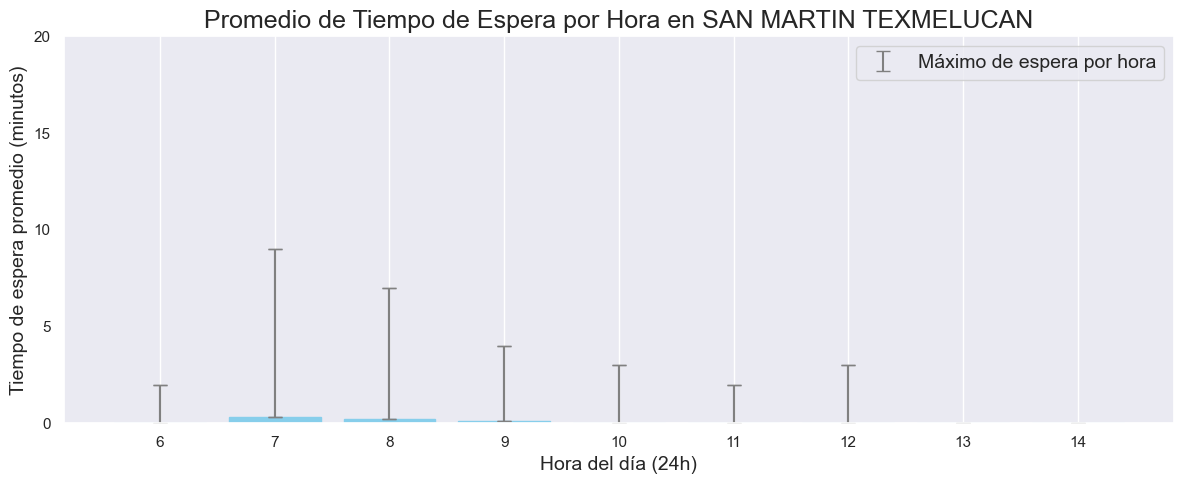

In [39]:
df_simulacion_atencion_sm["hora"] = df_simulacion_atencion_sm["hora_inicio"].dt.hour
agrupado = df_simulacion_atencion_sm.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en SAN MARTIN TEXMELUCAN", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_simulacion_atencion_sm["hora"].min(), df_simulacion_atencion_sm["hora"].max() + 1))            
plt.yticks(range(0, 21, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('SANMAR.png', dpi=300)

In [40]:
max(df_simulacion_atencion_sm['espera_min'])

9.0

# Comparación

In [41]:
#df_simulacion_atencion_sm #San Miguel Texmelucan
#df_simulacion_atencion_la # Cualiacan La Conquista
#df_simulacion_atencion_co #Culiacan colegio militar
#df_simulacion_atencion_ca #Culiacan Cañadas
#df_simulacion_atencion_cu #Culiacan
#df_simulacion_atencion #Coyoacan

#Prioridad Dinamica
sim_sm = df_simulacion_atencion_sm[df_simulacion_atencion_sm['espera_min'] != 0.00]
sim_la = df_simulacion_atencion_la[df_simulacion_atencion_la['espera_min'] != 0.00]
sim_colegio = df_simulacion_atencion_co[df_simulacion_atencion_co['espera_min'] != 0.00]
sim_ca = df_simulacion_atencion_ca[df_simulacion_atencion_ca['espera_min'] != 0.00]
sim_cu = df_simulacion_atencion_cu[df_simulacion_atencion_cu['espera_min'] != 0.00]
sim_co = df_simulacion_atencion[df_simulacion_atencion['espera_min'] != 0.00]
meansm = sum(sim_sm['espera_min'])/len(sim_sm['espera_min'])
meanla = sum(sim_la['espera_min'])/len(sim_la['espera_min'])
meanca = sum(sim_ca['espera_min'])/len(sim_ca['espera_min'])
meancolegio = sum(sim_colegio['espera_min'])/len(sim_colegio['espera_min'])
meancu = sum(sim_cu['espera_min'])/len(sim_cu['espera_min'])
meanco = sum(sim_co['espera_min'])/len(sim_co['espera_min'])

#Prioridad estática
SanMartin = df[(df['Sucursal'] == 'SAN MARTIN TEXMELUCAN')&(df['TurnoMinutosEspera'] != 0.00))&(df['HoraLLegada'] == 7)]
mean_sm = sum(SanMartin['TurnoMinutosEspera'])/len(SanMartin['TurnoMinutosEspera'])
LaConquista = df[(df['Sucursal'] == 'CULIACAN LA CONQUISTA')&(df['TurnoMinutosEspera'] != 0.00)]
mean_la = sum(LaConquista['TurnoMinutosEspera'])/len(LaConquista['TurnoMinutosEspera'])
COLEGIO = df[(df['Sucursal'] == 'CULIACAN COLEGIO MILITAR')&(df['TurnoMinutosEspera'] != 0.00)]
mean_colegio = sum(COLEGIO['TurnoMinutosEspera'])/len(COLEGIO['TurnoMinutosEspera'])
CAÑADAS = df[(df['Sucursal'] == 'CULIACAN CAÑADAS')&(df['TurnoMinutosEspera'] != 0.00)]
mean_ca = sum(CAÑADAS['TurnoMinutosEspera'])/len(CAÑADAS['TurnoMinutosEspera'])
CULIACAN = df[(df['Sucursal'] == 'CULIACAN')&(df['TurnoMinutosEspera'] != 0.00)]
mean_cu = sum(CULIACAN['TurnoMinutosEspera'])/len(CULIACAN['TurnoMinutosEspera'])
COYOACAN = df[(df['Sucursal'] == 'COYOACAN')&(df['TurnoMinutosEspera'] != 0.00)]
mean_co = sum(COYOACAN['TurnoMinutosEspera'])/len(COYOACAN['TurnoMinutosEspera'])

In [42]:
df['Sucursal'].unique()

array(['COYOACAN', 'CULIACAN', 'CULIACAN CAÑADAS',
       'CULIACAN COLEGIO MILITAR', 'CULIACAN LA CONQUISTA',
       'SAN MARTIN TEXMELUCAN'], dtype=object)

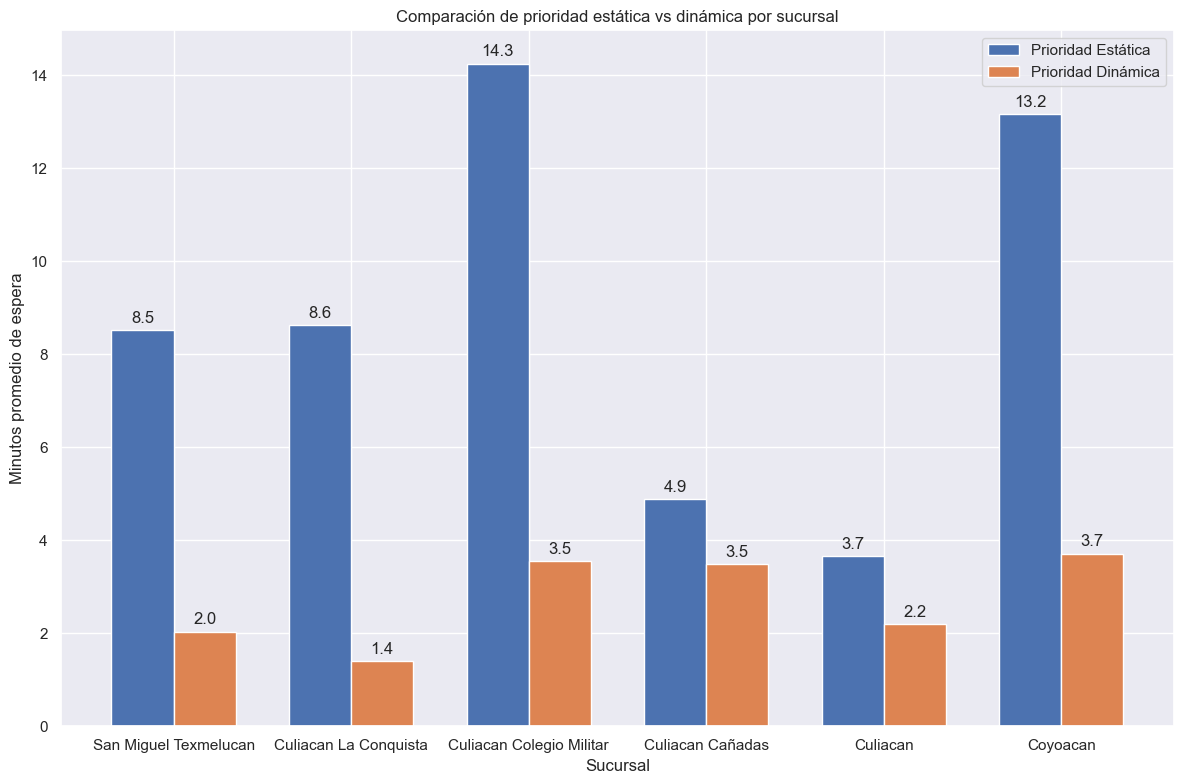

In [43]:



# Nombres de las sucursales
sucursales = ['San Miguel Texmelucan', 'Culiacan La Conquista', 'Culiacan Colegio Militar', 'Culiacan Cañadas', 'Culiacan', 'Coyoacan']

# Valores de prioridad estática
prioridad_dinamica = [meansm, meanla, meancolegio, meanca, meancu, meanco]

# Valores de prioridad dinámica
prioridad_estatica = [mean_sm, mean_la, mean_colegio, mean_ca, mean_cu, mean_co]

# Posiciones para las barras
x = np.arange(len(sucursales))  # posición en eje x
width = 0.35  # ancho de las barras

# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 8))
barras_estaticas = ax.bar(x - width/2, prioridad_estatica, width, label='Prioridad Estática')
barras_dinamicas = ax.bar(x + width/2, prioridad_dinamica, width, label='Prioridad Dinámica')

# Etiquetas y leyenda
ax.set_xlabel('Sucursal')
ax.set_ylabel('Minutos promedio de espera')
ax.set_title('Comparación de prioridad estática vs dinámica por sucursal')
ax.set_xticks(x)
ax.set_xticklabels(sucursales)
ax.set_xticklabels(sucursales, rotation=0)
ax.legend()

# Mostrar los valores encima de las barras (opcional)
for barra in barras_estaticas + barras_dinamicas:
    altura = barra.get_height()
    ax.annotate(f'{altura:.1f}', xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    

# Mostrar gráfico
plt.tight_layout()
#plt.show()
plt.savefig("comparacion_resultados.png", dpi=300)

## 7 AM

In [67]:
#Prioridad Dinamica
sim_sm = df_simulacion_atencion_sm[(df_simulacion_atencion_sm['espera_min'] != 0.00) & (df_simulacion_atencion_sm['hora'] == 7)]
sim_la = df_simulacion_atencion_la[(df_simulacion_atencion_la['espera_min'] != 0.00) & (df_simulacion_atencion_la['hora'] == 7)]
sim_colegio = df_simulacion_atencion_co[(df_simulacion_atencion_co['espera_min'] != 0.00) & (df_simulacion_atencion_co['hora'] == 7)]
sim_ca = df_simulacion_atencion_ca[(df_simulacion_atencion_ca['espera_min'] != 0.00) & (df_simulacion_atencion_ca['hora'] == 7)]
sim_cu = df_simulacion_atencion_cu[(df_simulacion_atencion_cu['espera_min'] != 0.00) & (df_simulacion_atencion_cu['hora'] == 7)]
sim_co = df_simulacion_atencion[(df_simulacion_atencion['espera_min'] != 0.00) & (df_simulacion_atencion['hora'] == 7)]
mean_sm7 = sim_sm['espera_min'].mean()
mean_la7 = sim_la['espera_min'].mean()
mean_colegio7 = sim_colegio['espera_min'].mean()
mean_ca7 = sim_ca['espera_min'].mean()
mean_cu7 = sim_cu['espera_min'].mean()
mean_co7 = sim_co['espera_min'].mean()


# Prioridad estática
SanMartin = df[(df['Sucursal'] == 'SAN MARTIN TEXMELUCAN') & (df['TurnoMinutosEspera'] != 0.00) & (df['HoraLLegada'] == 7)]
mean_sm = SanMartin['TurnoMinutosEspera'].mean()

LaConquista = df[(df['Sucursal'] == 'CULIACAN LA CONQUISTA') & (df['TurnoMinutosEspera'] != 0.00) & (df['HoraLLegada'] == 7)]
mean_la = LaConquista['TurnoMinutosEspera'].mean()

COLEGIO = df[(df['Sucursal'] == 'CULIACAN COLEGIO MILITAR') & (df['TurnoMinutosEspera'] != 0.00) & (df['HoraLLegada'] == 7)]
mean_colegio = COLEGIO['TurnoMinutosEspera'].mean()

CAÑADAS = df[(df['Sucursal'] == 'CULIACAN CAÑADAS') & (df['TurnoMinutosEspera'] != 0.00) & (df['HoraLLegada'] == 7)]
mean_ca = CAÑADAS['TurnoMinutosEspera'].mean()

CULIACAN = df[(df['Sucursal'] == 'CULIACAN') & (df['TurnoMinutosEspera'] != 0.00) & (df['HoraLLegada'] == 7)]
mean_cu = CULIACAN['TurnoMinutosEspera'].mean()

COYOACAN = df[(df['Sucursal'] == 'COYOACAN') & (df['TurnoMinutosEspera'] != 0.00) & (df['HoraLLegada'] == 7)]
mean_co = COYOACAN['TurnoMinutosEspera'].mean()


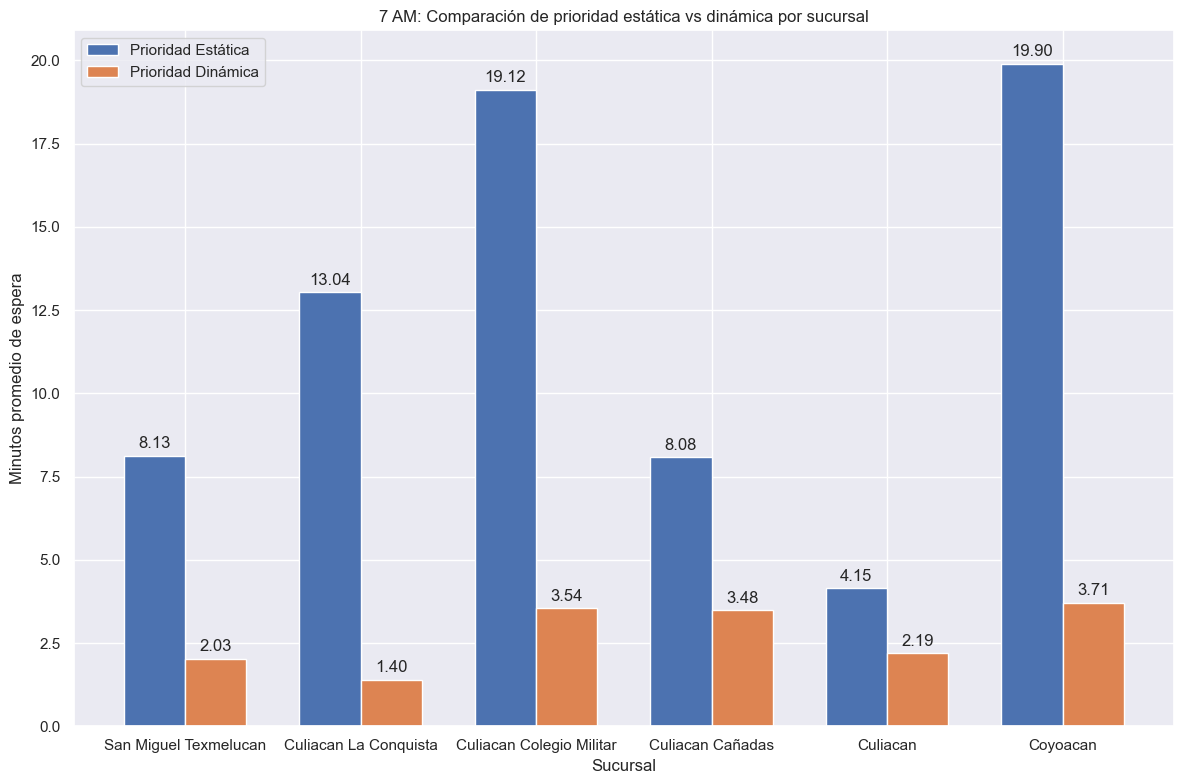

In [70]:
# Nombres de las sucursales
sucursales = ['San Miguel Texmelucan', 'Culiacan La Conquista', 'Culiacan Colegio Militar', 'Culiacan Cañadas', 'Culiacan', 'Coyoacan']

# Valores de prioridad estática
prioridad_dinamica = [meansm, meanla, meancolegio, meanca, meancu, meanco]

# Valores de prioridad dinámica
prioridad_estatica = [mean_sm, mean_la, mean_colegio, mean_ca, mean_cu, mean_co]

# Posiciones para las barras
x = np.arange(len(sucursales))  # posición en eje x
width = 0.35  # ancho de las barras

# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 8))
barras_estaticas = ax.bar(x - width/2, prioridad_estatica, width, label='Prioridad Estática')
barras_dinamicas = ax.bar(x + width/2, prioridad_dinamica, width, label='Prioridad Dinámica')

# Etiquetas y leyenda
ax.set_xlabel('Sucursal')
ax.set_ylabel('Minutos promedio de espera')
ax.set_title('7 AM: Comparación de prioridad estática vs dinámica por sucursal')
ax.set_xticks(x)
ax.set_xticklabels(sucursales)
ax.set_xticklabels(sucursales, rotation=0)
ax.legend()

# Mostrar los valores encima de las barras (opcional)
for x_pos, est, dyn in zip(x, prioridad_estatica, prioridad_dinamica):
    ax.annotate(f'{est:.2f}', xy=(x_pos - width/2, est), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    ax.annotate(f'{dyn:.2f}', xy=(x_pos + width/2, dyn), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    

# Mostrar gráfico
plt.tight_layout()
#plt.show()
plt.savefig("comparacion_resultados7.png", dpi=300)

## 8 AM

In [74]:
describe_sm = df_simulacion_atencion[df_simulacion_atencion['espera_min'] != 0.00]
describe_sm.groupby('hora')['espera_min'].describe()

count      mean       std  min  25%  50%  75%   max
hora                                                      
6      264.0  1.685606  1.118298  1.0  1.0  1.0  2.0   7.0
7     2207.0  3.249660  2.443508  1.0  1.0  2.0  5.0  12.0
8     2668.0  4.485382  3.043518  1.0  2.0  4.0  6.0  14.0
9     1251.0  3.776978  3.124967  1.0  1.0  3.0  5.0  17.0
10     202.0  1.470297  0.754165  1.0  1.0  1.0  2.0   5.0
11      34.0  1.735294  1.377499  1.0  1.0  1.0  1.0   5.0
12      18.0  1.388889  0.916444  1.0  1.0  1.0  1.0   4.0
13       6.0  1.333333  0.816497  1.0  1.0  1.0  1.0   3.0
14       1.0  1.000000       NaN  1.0  1.0  1.0  1.0   1.0

In [72]:
#Prioridad Dinamica
sim_sm = df_simulacion_atencion_sm[(df_simulacion_atencion_sm['espera_min'] != 0.00) & (df_simulacion_atencion_sm['hora'] == 8)]
sim_la = df_simulacion_atencion_la[(df_simulacion_atencion_la['espera_min'] != 0.00) & (df_simulacion_atencion_la['hora'] == 8)]
sim_colegio = df_simulacion_atencion_co[(df_simulacion_atencion_co['espera_min'] != 0.00) & (df_simulacion_atencion_co['hora'] == 8)]
sim_ca = df_simulacion_atencion_ca[(df_simulacion_atencion_ca['espera_min'] != 0.00) & (df_simulacion_atencion_ca['hora'] == 8)]
sim_cu = df_simulacion_atencion_cu[(df_simulacion_atencion_cu['espera_min'] != 0.00) & (df_simulacion_atencion_cu['hora'] == 8)]
sim_co = df_simulacion_atencion[(df_simulacion_atencion['espera_min'] != 0.00) & (df_simulacion_atencion['hora'] == 8)]
mean_sm7 = sim_sm['espera_min'].mean()
mean_la7 = sim_la['espera_min'].mean()
mean_colegio7 = sim_colegio['espera_min'].mean()
mean_ca7 = sim_ca['espera_min'].mean()
mean_cu7 = sim_cu['espera_min'].mean()
mean_co7 = sim_co['espera_min'].mean()


# Prioridad estática
SanMartin = df[(df['Sucursal'] == 'SAN MARTIN TEXMELUCAN') & (df['TurnoMinutosEspera'] != 0.00) & (df['HoraLLegada'] == 8)]
mean_sm = SanMartin['TurnoMinutosEspera'].mean()

LaConquista = df[(df['Sucursal'] == 'CULIACAN LA CONQUISTA') & (df['TurnoMinutosEspera'] != 0.00) & (df['HoraLLegada'] == 8)]
mean_la = LaConquista['TurnoMinutosEspera'].mean()

COLEGIO = df[(df['Sucursal'] == 'CULIACAN COLEGIO MILITAR') & (df['TurnoMinutosEspera'] != 0.00) & (df['HoraLLegada'] == 8)]
mean_colegio = COLEGIO['TurnoMinutosEspera'].mean()

CAÑADAS = df[(df['Sucursal'] == 'CULIACAN CAÑADAS') & (df['TurnoMinutosEspera'] != 0.00) & (df['HoraLLegada'] == 8)]
mean_ca = CAÑADAS['TurnoMinutosEspera'].mean()

CULIACAN = df[(df['Sucursal'] == 'CULIACAN') & (df['TurnoMinutosEspera'] != 0.00) & (df['HoraLLegada'] == 8)]
mean_cu = CULIACAN['TurnoMinutosEspera'].mean()

COYOACAN = df[(df['Sucursal'] == 'COYOACAN') & (df['TurnoMinutosEspera'] != 0.00) & (df['HoraLLegada'] == 8)]
mean_co = COYOACAN['TurnoMinutosEspera'].mean()


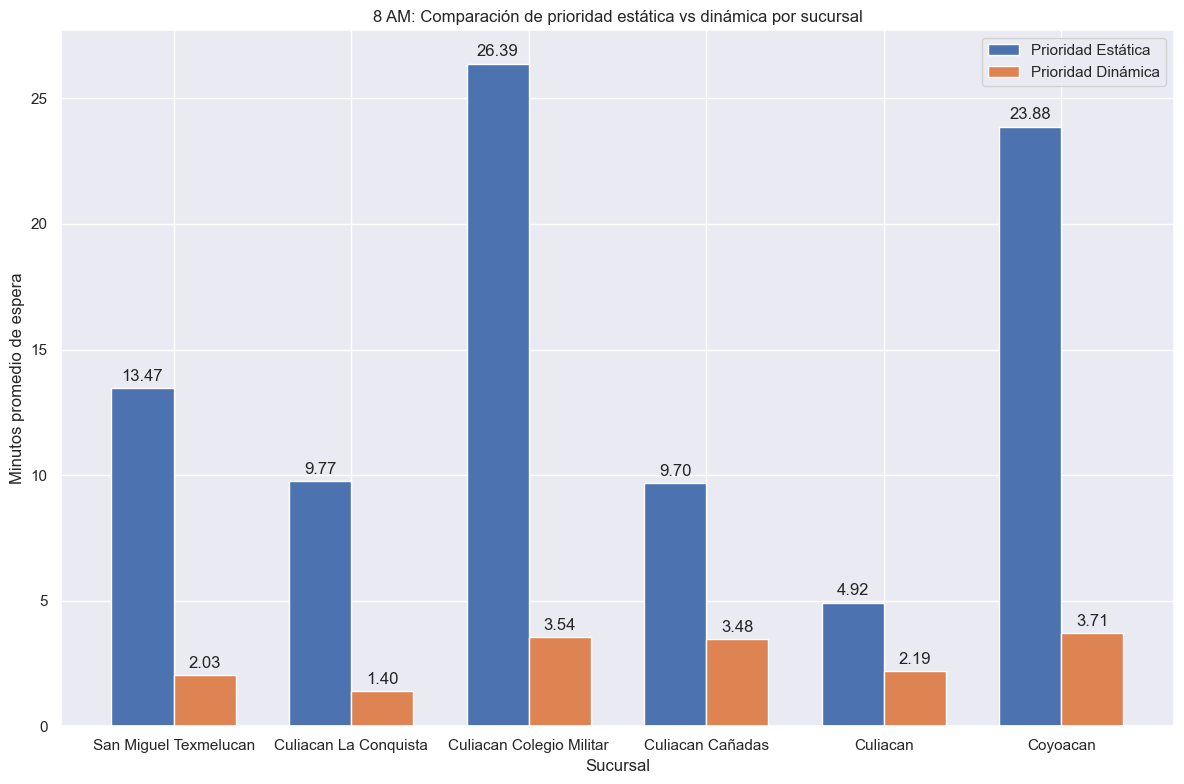

In [73]:
# Nombres de las sucursales
sucursales = ['San Miguel Texmelucan', 'Culiacan La Conquista', 'Culiacan Colegio Militar', 'Culiacan Cañadas', 'Culiacan', 'Coyoacan']

# Valores de prioridad estática
prioridad_dinamica = [meansm, meanla, meancolegio, meanca, meancu, meanco]

# Valores de prioridad dinámica
prioridad_estatica = [mean_sm, mean_la, mean_colegio, mean_ca, mean_cu, mean_co]

# Posiciones para las barras
x = np.arange(len(sucursales))  # posición en eje x
width = 0.35  # ancho de las barras

# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 8))
barras_estaticas = ax.bar(x - width/2, prioridad_estatica, width, label='Prioridad Estática')
barras_dinamicas = ax.bar(x + width/2, prioridad_dinamica, width, label='Prioridad Dinámica')

# Etiquetas y leyenda
ax.set_xlabel('Sucursal')
ax.set_ylabel('Minutos promedio de espera')
ax.set_title('8 AM: Comparación de prioridad estática vs dinámica por sucursal')
ax.set_xticks(x)
ax.set_xticklabels(sucursales)
ax.set_xticklabels(sucursales, rotation=0)
ax.legend()

# Mostrar los valores encima de las barras (opcional)
for x_pos, est, dyn in zip(x, prioridad_estatica, prioridad_dinamica):
    ax.annotate(f'{est:.2f}', xy=(x_pos - width/2, est), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    ax.annotate(f'{dyn:.2f}', xy=(x_pos + width/2, dyn), 
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    

# Mostrar gráfico
plt.tight_layout()
#plt.show()
plt.savefig("comparacion_resultados8.png", dpi=300)